##[Scholastic Data Challenge](http://sc.aisnet.org/student-leadership-conference/student-chapter-comp/analytics-challenge/)

### What will the children’s book market look like in the future?

Scholastic is a major international publishing, educational, and media company with a focus on books and educational materials designed to support children’s literacy and cultivate a passion for reading and knowledge which will continue throughout life. Scholastic’s mission is driven by its credo LINK which articulates this goal for the company.

Scholastic has many different channels through which it distributes the books it publishes. At times these channels work collaboratively to reach new customers in different ways, but at times there can be significant overlap between these channels. Through analyzing the interactions of these channels Scholastic seeks to better understand the children’s book market, vis-a-vis demographics, geography, genre, and price.

In the spirit of Scholastic’s mission of cultivating learning, the provided data is presented in a realistic manner, as a small snapshot of Scholastic’s sales between two separate distribution channels across the nation. In an effort to make this a realistic scenario, the data presented is not fully cleaned and there are many additional interesting variables which it is the job of the analyst to identify and evaluate.

Start your analysis by answering question 1 below, and then answer at least one or more of the remaining questions.

1. What trends do you see in the data, among / demographics, genre/ theme, and price?
2. What does the data suggest about Scholastic’s distribution channels, and how would you recommend structuring a distribution strategy?
3. What other publically available data can you append (Census, state, region, etc.), to provide further insight?
4. Formulate a unified strategy for marketing between the two channels. Where are there areas of significant overlap between the channels, and what strategy do you suggest to prevent unintentional competition between channels?

Below are all features in this dataset

- Title: Title of product sold
- TITLE_CODE: Unique ID for titles
- CHANNEL: Masked channel description of channel through which the product was distributed to the customer
- PROD_TYP: Indicator if the product is a paperback or hardback
- SERIES: Y/N indicator if the product is part of a series
- CH1_GENRE: Genre listing for product from Channel 1 database
- CH1_THEME: Theme listing for product from Channel 1 database
- CH2_CATEGORY: Category listing for product from Channel 2 database
- CH2_SUBCATEGORY: Subcategory listing for product from Channel 2 database
- LEXILE_11_DESC: Lexile measures for product. Note this field is not always complete for every Scholastic product. For more information on Lexile codes, see links below:
 - : https://lexile.com/educators/measuring-growth-with-lexile/lexile-measures-grade-equivalents/
 - : https://lexile.com/educators/find-books-at-the-right-level/about-lexile-codes/
- total_units: Number of products sold 
- UNIT_PRICE: Unit price of product sold
- SCHOOL_TYPE: Indicator if the school where the product was sold was public or not.
- REGION: Region of the United States where product was distributed - NORTHEAST, MIDWEST, SOUTH, WEST, or OTHER
- STATE: US state of sale
- COUNTY: County of sale
- EDU_NO_HS: % of population with no HS degree, by zip code
- EDU_HS_SOME_COLLEGE: % of population with some college, by zip code
- EDU_BACHELOR_DEG: % of population with bachelor degree, by zip code
- EDU_GRADUATE_DEG: % of population with graduate degree, by zip code
- HHI_BAND: Bands of household income for zip code, in $10,000 bands
- ZIP_CODE: Zip code of sale

In this exercise, we will perform an exploratory analysis of the dataset. The following activities will be performed:
- read the dataset into spark (I had to change delimiter from comma to pipe.)
- run various exploratory analysis to understand better
- conduct ETL analysis
- run various queries to address the questions in this challenge

In Class Exercise. Below is the question we will discuss in class to adress question 1.
1. Calculate the total books sold and total sales by each channel
2. Calculate total sales by state
3. Calculate the total_sales by channel and product type.
4. What are the top 20 popular books sold by each channel
5. What are the most popular genre and theme sold in each channel?
6. Form a group to develop additional quereis to find pattern and trends in the data.

For **take home**, please answer question 2 and 3 (What does the data suggest about Scholastic’s distribution channels, and how would you recommend structuring a distribution strategy? What other publically available data can you append (Census, state, region, etc.), to provide further insight?) Please develop proper queries to answer this question and write a few paragraphs to discuss your findings. You need to label each question and submit the completed notebook with all visulizations at the end.

Check the file in the /FileStore/tables directory

In [0]:
%fs ls /FileStore/tables

path name size dbfs:/FileStore/tables/Crimes2019.csv Crimes2019.csv 61566302 dbfs:/FileStore/tables/bank.csv bank.csv 918960 dbfs:/FileStore/tables/bike_counts.csv bike_counts.csv 1978431 dbfs:/FileStore/tables/blockchain_retweet2019.csv blockchain_retweet2019.csv 52323067 dbfs:/FileStore/tables/blockchain_tweets/ blockchain_tweets/ 0 dbfs:/FileStore/tables/boston.csv boston.csv 24128 dbfs:/FileStore/tables/co-est2019-alldata.csv co-est2019-alldata.csv 3644730 dbfs:/FileStore/tables/covid/ covid/ 0 dbfs:/FileStore/tables/covid19_report.csv covid19_report.csv 1495429 dbfs:/FileStore/tables/crimeData/ crimeData/ 0 dbfs:/FileStore/tables/cruise_ship_info.csv cruise_ship_info.csv 8734 dbfs:/FileStore/tables/googleData/ googleData/ 0 dbfs:/FileStore/tables/graphData/ graphData/ 0 dbfs:/FileStore/tables/iplist/ iplist/ 0 dbfs:/FileStore/tables/la_tweets.csv la_tweets.csv 4450847 dbfs:/FileStore/tables/log20170329/ log20170329/ 0 dbfs:/FileStore/tables/meeting_saved_chat_02.txt meeting_saved_chat_02.txt 1683 dbfs:/FileStore/tables/policeStation.csv policeStation.csv 5723 dbfs:/FileStore/tables/pythonExamples/ pythonExamples/ 0 dbfs:/FileStore/tables/scholastic/ scholastic/ 0 dbfs:/FileStore/tables/state_income-9f7c5.csv state_income-9f7c5.csv 2412 dbfs:/FileStore/tables/taproot/ taproot/ 0 dbfs:/FileStore/tables/tweets/ tweets/ 0 dbfs:/FileStore/tables/utilities/ utilities/ 0 dbfs:/FileStore/tables/weblogs/ weblogs/ 0 dbfs:/FileStore/tables/winequality/ winequality/ 0

Make a directory to store data for Scholastic challenge

In [0]:
%fs mkdirs /FileStore/tables/scholastic

res1: Boolean = true

- Add the dataset into /scholastic directory.
- Go to Data icon on the left panel and import sdata.csv into scholastic directory.
- Check to see it is there.
 - Note: I have to change delimiter of the file from comma to pipe. Otherwise, the file will not be able to load properly.

In [0]:
%fs ls /FileStore/tables/scholastic


path name size dbfs:/FileStore/tables/scholastic/sdata-1.csv sdata-1.csv 421879198 dbfs:/FileStore/tables/scholastic/sdata.csv sdata.csv 421879198 dbfs:/FileStore/tables/scholastic/state_abbrev-1.csv state_abbrev-1.csv 1167 dbfs:/FileStore/tables/scholastic/state_abbrev.csv state_abbrev.csv 1167 dbfs:/FileStore/tables/scholastic/us_county_population-1.csv us_county_population-1.csv 3644730 dbfs:/FileStore/tables/scholastic/us_county_population.csv us_county_population.csv 3644730

check the first few rows of data

In [0]:
%fs head /FileStore/tables/scholastic/sdata.csv

[Truncated to first 65536 bytes]
title|TITLE_CODE|CHANNEL|PROD_TYP|SERIES|CH1_GENRE|CH1_THEME|CH2_CATEGORY|CH2_SUBCATEGORY|LEXILE_11_DESC|total_units|UNIT_PRICE|SCHOOL_TYPE|REGION|STATE|COUNTY|EDU_NO_HS|EDU_HS_SOME_COLLEGE|EDU_BACHELOR_DEG|EDU_GRADUATE_DEG|HHI_BAND|ZIP_CODE
Dog Man: Lord of the Fleas|71797|CHANNEL 2|HARDBACK|Y|['Humor & Funny Stories', 'Action & Adventure']|['Reluctant Reader Appeal', 'Superheroes']|GRAPHIC NOVELS|||2|9.99|OTHER|OTHER||||||||.
Grumpy Pants|72780|CHANNEL 2|PAPERBACK|N||['Emotions & Feelings', 'Bedtime & Dreams', 'Penguins']|||AD380L|1|4.95|OTHER|OTHER||||||||.
Walk and See: 123|77338|CHANNEL 2|PAPERBACK|N||['Counting, Numbers & Place Value', 'Fall', 'Seasons']||||2|4.95|OTHER|OTHER||||||||.
Dog Man: Lord of the Fleas|71797|CHANNEL 2|HARDBACK|Y|['Humor & Funny Stories', 'Action & Adventure']|['Reluctant Reader Appeal', 'Superheroes']|GRAPHIC NOVELS|||1|9.99|OTHER|OTHER||||||||.
Pete the Cat and the Missing Cupcakes|75211|CHANNEL 2|PAPERBACK|N||['Kindness', 'Cooking & Food', 'Friendship']|PICTURE|PAPERBACK BOOK|AD440L|1|6.95|OTHER|OTHER||||||||.
When I Grow Up|77501|CHANNEL 2|PAPERBACK|N|['Poetry, Songs & Verse']|['Growing Up']||||1|5.95|OTHER|OTHER||||||||.
Grow Up, David!|72771|CHANNEL 2|HARDBACK|N|['Humor & Funny Stories']|['Brothers & Sisters', 'Family Life', 'Behavior & Manners']|PICTURE|HC/POB BOOK||1|17.99|OTHER|OTHER||||||||.
Amelia Bedelia on the Move|70281|CHANNEL 2|PAPERBACK|N|['Humor & Funny Stories']|['Reluctant Reader Appeal', 'Family Life']||||2|4|OTHER|OTHER||||||||.
I Am Jane Goodall|73201|CHANNEL 2|PAPERBACK|N|['Biography & Autobiography']|['Scientists & Inventors', 'Women', 'Science & Nature', 'Reluctant Reader Appeal']|INSTRUCTION RESOURCE DIVISION|PRIMARY NONFICTION|580L|1|5.5|OTHER|OTHER||||||||.
Escape from Shudder Mansion|72020|CHANNEL 2|PAPERBACK|Y|['Horror & Supernatural']|['Monsters & Ghosts', 'Reluctant Reader Appeal']|MYSTERY|||1|6.99|OTHER|OTHER||||||||.
Mr. Will Needs to Chill!|74570|CHANNEL 2|PAPERBACK|Y|['School Stories', 'Humor & Funny Stories']|['School Life', 'Teachers', 'Cooking & Food', 'Reluctant Reader Appeal']|CHAPTER|||1|4.99|OTHER|OTHER||||||||.
Double Down|71855|CHANNEL 2|PAPERBACK|Y|['Humor & Funny Stories']|['Middle School', 'Halloween', 'Movies', 'Reluctant Reader Appeal']|HUMOR||990L|1|8.99|OTHER|OTHER||||||||.
Big Red Barn|70745|CHANNEL 2|PAPERBACK|N|['Classics']|['Farm Animals', 'Bedtime & Dreams']|PICTURE|PAPERBACK BOOK|AD490L|1|5.95|OTHER|OTHER||||||||.
Napping House, The|74710|CHANNEL 2|PAPERBACK|N|['Humor & Funny Stories']|['Bedtime & Dreams']|PICTURE|PAPERBACK BOOK|NP|1|5.5|OTHER|OTHER||||||||.
Collector, The|71331|CHANNEL 2|PAPERBACK|N|['Horror & Supernatural']|['Paranormal', 'Brothers & Sisters', 'Monsters & Ghosts']|MYSTERY|||2|6.99|OTHER|OTHER||||||||.
Halloween Joke Book, The|72829|CHANNEL 2|PAPERBACK|N|['Humor & Funny Stories']|['Jokes & Riddles', 'Halloween']||||1||OTHER|OTHER||||||||.
Duck on a Bike|71906|CHANNEL 2|PAPERBACK|N|['Humor & Funny Stories']|['Farm Animals', 'Birds', 'Cleverness & Resourcefulness', 'Outdoor Recreation']|PICTURE||AD440L|1||OTHER|OTHER||||||||.
Bonaparte Falls Apart|70855|CHANNEL 2|PAPERBACK|N|['Humor & Funny Stories']|['Monsters & Ghosts', 'Friendship', 'First Day of School']||||1||OTHER|OTHER||||||||.
Mighty, Mighty Construction Site|74401|CHANNEL 2|PAPERBACK|N||['Construction Machines', 'Transportation & Vehicles', 'Building', 'Teamwork', 'Trucks']|||AD710L|1|5.95|OTHER|OTHER||||||||.
Vampoodle|77282|CHANNEL 2|PAPERBACK|N|['Humor & Funny Stories']|['Dogs', 'Halloween', 'Animals']|INSTRUCTION RESOURCE DIVISION|PRIMARY FICTION|300L|1|3.99|OTHER|OTHER||||||||.
How the Crayons Saved the Rainbow|73127|CHANNEL 2|PAPERBACK|N||['Friendship']|||AD530L|1|4.95|OTHER|OTHER||||||||.
Go Go Gorillas|72616|CHANNEL 2|PAPERBACK|N||['Monkeys, Apes & Other Primates', 'Bedtime & Dreams', 'Dance']||||1|5.5|OTHER|OTHER||||||||.
Restart|75709|CHANNEL 2|PAPERBACK|N|['School Stories', 'Humor & Funny Stories']

Download the data directly from web site. 

We will download the file from my AWS s3 storage directly and save it under /FileStore/talbes.

### Below command will not work on Databrick Community Edition

In [0]:
%sh wget https://isa460-fall2021.s3.amazonaws.com/sdata.csv && cp sdata.csv /dbfs/FileStore/tables

--2021-09-28 02:44:30-- https://isa460-fall2021.s3.amazonaws.com/sdata.csv

Resolving isa460-fall2021.s3.amazonaws.com (isa460-fall2021.s3.amazonaws.com)... 52.216.137.84

Connecting to isa460-fall2021.s3.amazonaws.com (isa460-fall2021.s3.amazonaws.com)|52.216.137.84|:443... connected.

HTTP request sent, awaiting response... 200 OK

Length: 421879198 (402M) [text/csv]

Saving to: ‘sdata.csv’

0K .......... .......... .......... .......... .......... 0% 341K 20m9s

50K .......... .......... .......... .......... .......... 0% 677K 15m9s

100K .......... .......... .......... .......... .......... 0% 341K 16m48s

150K .......... .......... .......... .......... .......... 0% 682K 15m7s

200K .......... .......... .......... .......... .......... 0% 94.6M 12m6s

250K .......... .......... .......... .......... .......... 0% 110M 10m6s

300K .......... .......... .......... .......... .......... 0% 18.0M 8m42s

350K .......... .......... .......... .......... .......... 0% 713K 8m49s

400K .......... .......... .......... .......... .......... 0% 88.3M 7m51s

450K .......... .......... .......... .......... .......... 0% 118M 7m4s

500K .......... .......... .......... .......... .......... 0% 96.9M 6m26s

550K .......... .......... .......... .......... .......... 0% 128M 5m54s

600K .......... .......... .......... .......... .......... 0% 33.8M 5m28s

650K .......... .......... .......... .......... .......... 0% 714K 5m45s

700K .......... .......... .......... .......... .......... 0% 72.9M 5m23s

750K .......... .......... .......... .......... .......... 0% 85.5M 5m3s

800K .......... .......... .......... .......... .......... 0% 94.7M 4m45s

850K .......... .......... .......... .......... .......... 0% 67.8M 4m30s

900K .......... .......... .......... .......... .......... 0% 190M 4m15s

950K .......... .......... .......... .......... .......... 0% 156M 4m3s

1000K .......... .......... .......... .......... .......... 0% 29.2M 3m52s

1050K .......... .......... .......... .......... .......... 0% 129M 3m41s

1100K .......... .......... .......... .......... .......... 0% 170M 3m32s

1150K .......... .......... .......... .......... .......... 0% 192M 3m23s

1200K .......... .......... .......... .......... .......... 0% 176M 3m15s

1250K .......... .......... .......... .......... .......... 0% 198M 3m8s

1300K .......... .......... .......... .......... .......... 0% 747K 3m21s

1350K .......... .......... .......... .......... .......... 0% 115M 3m14s

1400K .......... .......... .......... .......... .......... 0% 68.0M 3m7s

1450K .......... .......... .......... .......... .......... 0% 120M 3m1s

1500K .......... .......... .......... .......... .......... 0% 98.8M 2m55s

1550K .......... .......... .......... .......... .......... 0% 103M 2m50s

1600K .......... .......... .......... .......... .......... 0% 101M 2m45s

1650K .......... .......... .......... .......... .......... 0% 136M 2m40s

1700K .......... .......... .......... .......... .......... 0% 231M 2m36s

1750K .......... .......... .......... .......... .......... 0% 106M 2m31s

1800K .......... .......... .......... .......... .......... 0% 163M 2m27s

1850K .......... .......... .......... .......... .......... 0% 248M 2m24s

1900K .......... .......... .......... .......... .......... 0% 258M 2m20s

1950K .......... .......... .......... .......... .......... 0% 241M 2m16s

2000K .......... .......... .......... .......... .......... 0% 166M 2m13s

2050K .......... .......... .......... .......... .......... 0% 222M 2m10s

2100K .......... .......... .......... .......... .......... 0% 246M 2m7s

2150K .......... .......... .......... .......... .......... 0% 258M 2m4s

2200K .......... .......... .......... .......... .......... 0% 207M 2m1s

2250K .......... .......... .......... .......... .......... 0% 170M 1m59s

2300K .......... .......... .......... .......... .......... 0% 225M 1m56s

2350K .......... .......... .......... .......... .......... 0% 250M 1m54s

2400K .......... .......... .......... .......... .......... 0% 227M 1m52s

2450K .......... .......... .......... .......... .......... 0% 261M 1m49s

2500K .......... .......... .......... .......... .......... 0% 201M 1m47s

2550K .......... .......... .......... .......... .......... 0% 231M 1m45s

2600K .......... .......... .......... .......... .......... 0% 760K 1m53s

2650K .......... .......... .......... .......... .......... 0% 120M 1m51s

2700K .......... .......... .......... .......... .......... 0% 144M 1m49s

2750K .......... .......... .......... .......... .......... 0% 126M 1m47s

2800K .......... .......... .......... .......... .......... 0% 114M 1m46s

2850K .......... .......... .......... .......... .......... 0% 143M 1m44s

2900K .......... .......... .......... .......... .......... 0% 145M 1m42s

2950K .......... .......... .......... .......... .......... 0% 111M 1m40s

3000K .......... .......... .......... .......... .......... 0% 119M 99s

3050K .......... .......... .......... .......... .......... 0% 138M 97s

3100K .......... .......... .......... .......... .......... 0% 125M 96s

3150K .......... .......... .......... .......... .......... 0% 146M 94s

3200K .......... .......... .......... .......... .......... 0% 148M 93s

3250K .......... .......... .......... .......... .......... 0% 175M 92s

3300K .......... .......... .......... .......... .......... 0% 199M 90s

3350K .......... .......... .......... .......... .......... 0% 253M 89s

3400K .......... .......... .......... .......... .......... 0% 218M 88s

3450K .......... .......... .......... .......... .......... 0% 241M 86s

3500K .......... .......... .......... .......... .......... 0% 132M 85s

3550K .......... .......... .......... .......... .......... 0% 151M 84s

3600K .......... .......... .......... .......... .......... 0% 136M 83s

3650K .......... .......... .......... .......... .......... 0% 124M 82s

3700K .......... .......... .......... .......... .......... 0% 148M 81s

3750K .......... .......... .......... .......... .......... 0% 154M 80s

3800K .......... .......... .......... .......... .......... 0% 109M 79s

3850K .......... .......... .......... .......... .......... 0% 146M 78s

3900K .......... .......... .......... .......... .......... 0% 155M 77s

3950K .......... .......... .......... .......... .......... 0% 118M 76s

4000K .......... .......... .......... .......... .......... 0% 131M 75s

4050K .......... .......... .......... .......... .......... 0% 156M 74s

4100K .......... .......... .......... .......... .......... 1% 125M 73s

4150K .......... .......... .......... .......... .......... 1% 792K 78s

4200K .......... .......... .......... .......... .......... 1% 116M 78s

4250K .......... .......... .......... .......... .......... 1% 132M 77s

4300K .......... .......... .......... .......... .......... 1% 85.1M 76s

4350K .......... .......... .......... .......... .......... 1% 142M 75s

4400K .......... .......... .......... .......... .......... 1% 116M 74s

4450K .......... .......... .......... .......... .......... 1% 145M 73s

4500K .......... .......... .......... .......... .......... 1% 148M 73s

4550K .......... .......... .......... .......... .......... 1% 124M 72s

4600K .......... .......... .......... .......... .......... 1% 114M 71s

4650K .......... .......... .......... .......... .......... 1% 131M 70s

4700K .......... .......... .......... .......... .......... 1% 122M 70s

4750K .......... .......... .......... .......... .......... 1% 98.5M 69s

4800K .......... .......... .......... .......... .......... 1% 118M 68s

4850K .......... .......... .......... .......... .......... 1% 71.1M 68s

4900K .......... .......... .......... .......... .......... 1% 29.3M 67s

4950K .......... .......... .......... .......... .......... 1% 23.7M 67s

5000K .......... .......... .......... .......... .......... 1% 38.2M 66s

5050K .......... .......... .......... .......... .......... 1% 167M 65s

5100K .......... .......... .......... .......... .......... 1% 134M 65s

5150K .......... .......... .......... .......... .......... 1% 129M 64s

5200K .......... .......... .......... .......... .......... 1% 134M 64s

5250K .......... .......... .......... .......... .......... 1% 12.4M 63s

5300K .......... .......... .......... .......... .......... 1% 155M 63s

5350K .......... .......... .......... .......... .......... 1% 148M 62s

5400K .......... .......... .......... .......... .......... 1% 32.0M 62s

5450K .......... .......... .......... .......... .......... 1% 161M 61s

5500K .......... .......... .......... .......... .......... 1% 165M 61s

5550K .......... .......... .......... .......... .......... 1% 90.5M 60s

5600K .......... .......... .......... .......... .......... 1% 99.1M 60s

5650K .......... .......... .......... .......... .......... 1% 24.1M 59s

5700K .......... .......... .......... .......... .......... 1% 967K 62s

5750K .......... .......... .......... .......... .......... 1% 10.8M 62s

5800K .......... .......... .......... .......... .......... 1% 95.1M 62s

5850K .......... .......... .......... .......... .......... 1% 15.4M 61s

5900K .......... .......... .......... .......... .......... 1% 163M 61s

5950K .......... .......... .......... .......... .......... 1% 167M 60s

6000K .......... .......... .......... .......... .......... 1% 94.2M 60s

6050K .......... .......... .......... .......... .......... 1% 146M 59s

6100K .......... .......... .......... .......... .......... 1% 167M 59s

6150K .......... .......... .......... .......... .......... 1% 112M 58s

6200K .......... .......... .......... .......... .......... 1% 130M 58s

6250K .......... .......... .......... .......... .......... 1% 165M 57s

6300K .......... .......... .......... .......... .......... 1% 49.4M 57s

6350K .......... .......... .......... .......... .......... 1% 90.6M 57s

6400K .......... .......... .......... .......... .......... 1% 137M 56s

6450K .......... .......... .......... .......... .......... 1% 166M 56s

6500K .......... .......... .......... .......... .......... 1% 25.0M 56s

6550K .......... .......... .......... .......... .......... 1% 161M 55s

6600K .......... .......... .......... .......... .......... 1% 24.2M 55s

6650K .......... .......... .......... .......... .......... 1% 52.6M 54s

6700K .......... .......... .......... .......... .......... 1% 149M 54s

6750K .......... .......... .......... .......... .......... 1% 30.7M 54s

6800K .......... .......... .......... .......... .......... 1% 135M 53s

6850K .......... .......... .......... .......... .......... 1% 157M 53s

6900K .......... .......... .......... .......... .......... 1% 27.5M 53s

6950K .......... .......... .......... .......... .......... 1% 168M 52s

7000K .......... .......... .......... .......... .......... 1% 23.6M 52s

7050K .......... .......... .......... .......... .......... 1% 41.8M 52s

7100K .......... .......... .......... .......... .......... 1% 53.5M 51s

7150K .......... .......... .......... .......... .......... 1% 150M 51s

7200K .......... .......... .......... .......... .......... 1% 22.0M 51s

7250K .......... .......... .......... .......... .......... 1% 1.14M 53s

7300K .......... .......... .......... .......... .......... 1% 14.7M 53s

7350K .......... .......... .......... .......... .......... 1% 54.4M 52s

7400K .......... .......... .......... .......... .......... 1% 135M 52s

7450K .......... .......... .......... .......... .......... 1% 150M 52s

7500K .......... .......... .......... .......... .......... 1% 111M 51s

7550K .......... .......... .......... .......... .......... 1% 157M 51s

7600K .......... .......... .......... .......... .......... 1% 150M 51s

7650K .......... .......... .......... .......... .......... 1% 109M 50s

7700K .......... .......... .......... .......... .......... 1% 170M 50s

7750K .......... .......... .......... .......... .......... 1% 165M 50s

7800K .......... .......... .......... .......... .......... 1% 98.2M 50s

7850K .......... .......... .......... .......... .......... 1% 159M 49s

7900K .......... .......... .......... .......... .......... 1% 162M 49s

7950K .......... .......... .......... .......... .......... 1% 111M 49s

8000K .......... .......... .......... .......... .......... 1% 133M 48s

8050K .......... .......... .......... .......... .......... 1% 165M 48s

8100K .......... .......... .......... .......... .......... 1% 51.8M 48s

8150K .......... .......... .......... .......... .......... 1% 49.5M 48s

8200K .......... .......... .......... .......... .......... 2% 42.0M 47s

8250K .......... .......... .......... .......... .......... 2% 4.12M 48s

8300K .......... .......... .......... .......... .......... 2% 125M 47s

8350K .......... .......... .......... .......... .......... 2% 119M 47s

8400K .......... .......... .......... .......... .......... 2% 117M 47s

8450K .......... .......... .......... .......... .......... 2% 134M 47s

8500K .......... .......... .......... .......... .......... 2% 164M 46s

8550K .......... .......... .......... .......... .......... 2% 133M 46s

8600K .......... .......... .......... .......... .......... 2% 118M 46s

8650K .......... .......... .......... .......... .......... 2% 167M 45s

8700K .......... .......... .......... .......... .......... 2% 129M 45s

8750K .......... .......... .......... .......... .......... 2% 130M 45s

8800K .......... .......... .......... .......... .......... 2% 12.6M 45s

8850K .......... .......... .......... .......... .......... 2% 1.12M 47s

8900K .......... .......... .......... .......... .......... 2% 18.0M 46s

8950K .......... .......... .......... .......... .......... 2% 76.1M 46s

9000K .......... .......... .......... .......... .......... 2% 163M 46s

9050K .......... .......... .......... .......... .......... 2% 251M 46s

9100K .......... .......... .......... .......... .......... 2% 253M 46s

9150K .......... .......... .......... .......... .......... 2% 261M 45s

9200K .......... .......... .......... .......... .......... 2% 176M 45s

9250K .......... .......... .......... .......... .......... 2% 192M 45s

9300K .......... .......... .......... .......... .......... 2% 255M 45s

9350K .......... .......... .......... .......... .......... 2% 254M 44s

9400K .......... .......... .......... .......... .......... 2% 169M 44s

9450K .......... .......... .......... .......... .......... 2% 178M 44s

9500K .......... .......... .......... .......... .......... 2% 251M 44s

9550K .......... .......... .......... .......... .......... 2% 206M 43s

9600K .......... .......... .......... .......... .......... 2% 220M 43s

9650K .......... .......... .......... .......... .......... 2% 203M 43s

9700K .......... .......... .......... .......... .......... 2% 214M 43s

9750K .......... .......... .......... .......... .......... 2% 261M 43s

9800K .......... .......... .......... .......... .......... 2% 3.53M 43s

9850K .......... .......... .......... .......... .......... 2% 143M 43s

9900K .......... .......... .......... .......... .......... 2% 135M 42s

9950K .......... .......... .......... .......... .......... 2% 116M 42s

10000K .......... .......... .......... .......... .......... 2% 138M 42s

10050K .......... .......... .......... .......... .......... 2% 148M 42s

10100K .......... .......... .......... .......... .......... 2% 124M 42s

10150K .......... .......... .......... .......... .......... 2% 163M 41s

10200K .......... .......... .......... .......... .......... 2% 61.2M 41s

10250K .......... .......... .......... .......... .......... 2% 158M 41s

10300K .......... .......... .......... .......... .......... 2% 9.21M 41s

10350K .......... .......... .......... .......... .......... 2% 149M 41s

10400K .......... .......... .......... .......... .......... 2% 1.14M 42s

10450K .......... .......... .......... .......... .......... 2% 129M 42s

10500K .......... .......... .......... .......... .......... 2% 117M 42s

10550K .......... .......... .......... .......... .......... 2% 156M 42s

10600K .......... .......... .......... .......... .......... 2% 93.1M 42s

10650K .......... .......... .......... .......... .......... 2% 125M 41s

10700K .......... .......... .......... .......... .......... 2% 155M 41s

10750K .......... .......... .......... .......... .......... 2% 52.3M 41s

10800K .......... .......... .......... .......... .......... 2% 113M 41s

10850K .......... .......... .......... .......... .......... 2% 121M 41s

10900K .......... .......... .......... .......... .......... 2% 126M 41s

10950K .......... .......... .......... .......... .......... 2% 122M 40s

11000K .......... .......... .......... .......... .......... 2% 52.2M 40s

11050K .......... .......... .......... .......... .......... 2% 65.3M 40s

11100K .......... .......... .......... .......... .......... 2% 63.7M 40s

11150K .......... .......... .......... .......... .......... 2% 129M 40s

11200K .......... .......... .......... .......... .......... 2% 140M 40s

11250K .......... .......... .......... .......... .......... 2% 129M 39s

11300K .......... .......... .......... .......... .......... 2% 3.91M 40s

11350K .......... .......... .......... .......... .......... 2% 108M 39s

11400K .......... .......... .......... .......... .......... 2% 114M 39s

11450K .......... .......... .......... .......... .......... 2% 120M 39s

11500K .......... .......... .......... .......... .......... 2% 119M 39s

11550K .......... .......... .......... .......... .......... 2% 120M 39s

11600K .......... .......... .......... .......... .......... 2% 123M 39s

11650K .......... .......... .......... .......... .......... 2% 129M 39s

11700K .......... .......... .......... .......... .......... 2% 141M 38s

11750K .......... .......... .......... .......... .......... 2% 141M 38s

11800K .......... .......... .......... .......... .......... 2% 7.57M 38s

11850K .......... .......... .......... .......... .......... 2% 34.1M 38s

11900K .......... .......... .......... .......... .......... 2% 81.1M 38s

11950K .......... .......... .......... .......... .......... 2% 1.20M 39s

12000K .......... .......... .......... .......... .......... 2% 99.7M 39s

12050K .......... .......... .......... .......... .......... 2% 159M 39s

12100K .......... .......... .......... .......... .......... 2% 257M 39s

12150K .......... .......... .......... .......... .......... 2% 68.9M 39s

12200K .......... .......... .......... .......... .......... 2% 120M 38s

12250K .......... .......... .......... .......... .......... 2% 117M 38s

12300K .......... .......... .......... .......... .......... 2% 115M 38s

12350K .......... .......... .......... .......... .......... 3% 82.6M 38s

12400K .......... .......... .......... .......... .......... 3% 111M 38s

12450K .......... .......... .......... .......... .......... 3% 133M 38s

12500K .......... .......... .......... .......... .......... 3% 128M 38s

12550K .......... .......... .......... .......... .......... 3% 151M 37s

12600K .......... .......... .......... .......... .......... 3% 119M 37s

12650K .......... .......... .......... .......... .......... 3% 116M 37s

12700K .......... .......... .......... .......... .......... 3% 110M 37s

12750K .......... .......... .......... .......... .......... 3% 95.2M 37s

12800K .......... .......... .......... .......... .......... 3% 3.54M 37s

12850K .......... .......... .......... .......... .......... 3% 81.7M 37s

12900K .......... .......... .......... .......... .......... 3% 73.5M 37s

12950K .......... .......... .......... .......... .......... 3% 95.9M 37s

13000K .......... .......... .......... .......... .......... 3% 59.1M 37s

13050K .......... .......... .......... .......... .......... 3% 31.7M 37s

13100K .......... .......... .......... .......... .......... 3% 28.7M 36s

13150K .......... .......... .......... .......... .......... 3% 33.5M 36s

13200K .......... .......... .......... .......... .......... 3% 41.0M 36s

13250K .......... .......... .......... .......... .......... 3% 38.3M 36s

13300K .......... .......... .......... .......... .......... 3% 58.6M 36s

13350K .......... .......... .......... .......... .......... 3% 46.8M 36s

13400K .......... .......... .......... .......... .......... 3% 73.2M 36s

13450K .......... .......... .......... .......... .......... 3% 35.3M 36s

13500K .......... .......... .......... .......... .......... 3% 1.22M 37s

13550K .......... .......... .......... .......... .......... 3% 150M 37s

13600K .......... .......... .......... .......... .......... 3% 110M 37s

13650K .......... .......... .......... .......... .......... 3% 138M 36s

13700K .......... .......... .......... .......... .......... 3% 147M 36s

13750K .......... .......... .......... .......... .......... 3% 137M 36s

13800K .......... .......... .......... .......... .......... 3% 119M 36s

13850K .......... .......... .......... .......... .......... 3% 150M 36s

13900K .......... .......... .......... .......... .......... 3% 131M 36s

13950K .......... .......... .......... .......... .......... 3% 139M 36s

14000K .......... .......... .......... .......... .......... 3% 124M 36s

14050K .......... .......... .......... .......... .......... 3% 136M 35s

14100K .......... .......... .......... .......... .......... 3% 105M 35s

14150K .......... .......... .......... .......... .......... 3% 73.0M 35s

14200K .......... .......... .......... .......... .......... 3% 118M 35s

14250K .......... .......... .......... .......... .......... 3% 61.0M 35s

14300K .......... .......... .......... .......... .......... 3% 3.68M 35s

14350K .......... .......... .......... .......... .......... 3% 103M 35s

14400K .......... .......... .......... .......... .......... 3% 76.3M 35s

14450K .......... .......... .......... .......... .......... 3% 120M 35s

14500K .......... .......... .......... .......... .......... 3% 111M 35s

14550K .......... .......... .......... .......... .......... 3% 95.4M 35s

14600K .......... .......... .......... .......... .......... 3% 53.1M 35s

14650K .......... .......... .......... .......... .......... 3% 37.9M 34s

14700K .......... .......... .......... .......... .......... 3% 20.6M 34s

14750K .......... .......... .......... .......... .......... 3% 26.0M 34s

14800K .......... .......... .......... .......... .......... 3% 26.3M 34s

14850K .......... .......... .......... .......... .......... 3% 39.9M 34s

14900K .......... .......... .......... .......... .......... 3% 127M 34s

14950K .......... .......... .......... .......... .......... 3% 42.1M 34s

15000K .......... .......... .......... .......... .......... 3% 11.8M 34s

15050K .......... .......... .......... .......... .......... 3% 1.34M 35s

15100K .......... .......... .......... .......... .......... 3% 115M 35s

15150K .......... .......... .......... .......... .......... 3% 147M 35s

15200K .......... .......... .......... .......... .......... 3% 104M 34s

15250K .......... .......... .......... .......... .......... 3% 162M 34s

15300K .......... .......... .......... .......... .......... 3% 159M 34s

15350K .......... .......... .......... .......... .......... 3% 124M 34s

15400K .......... .......... .......... .......... .......... 3% 128M 34s

15450K .......... .......... .......... .......... .......... 3% 130M 34s

15500K .......... .......... .......... .......... .......... 3% 128M 34s

15550K .......... .......... .......... .......... .......... 3% 156M 34s

15600K .......... .......... .......... .......... .......... 3% 135M 34s

15650K .......... .......... .......... .......... .......... 3% 38.0M 34s

15700K .......... .......... .......... .......... .......... 3% 60.9M 33s

15750K .......... .......... .......... .......... .......... 3% 42.3M 33s

15800K .......... .......... .......... .......... .......... 3% 57.4M 33s

15850K .......... .......... .......... .......... .......... 3% 4.17M 33s

15900K .......... .......... .......... .......... .......... 3% 91.7M 33s

15950K .......... .......... .......... .......... .......... 3% 36.6M 33s

16000K .......... .......... .......... .......... .......... 3% 112M 33s

16050K .......... .......... .......... .......... .......... 3% 102M 33s

16100K .......... .......... .......... .......... .......... 3% 26.2M 33s

16150K .......... .......... .......... .......... .......... 3% 14.9M 33s

16200K .......... .......... .......... .......... .......... 3% 36.2M 33s

16250K .......... .......... .......... .......... .......... 3% 43.3M 33s

16300K .......... .......... .......... .......... .......... 3% 45.9M 33s

16350K .......... .......... .......... .......... .......... 3% 76.3M 33s

16400K .......... .......... .......... .......... .......... 3% 32.3M 33s

16450K .......... .......... .......... .......... .......... 4% 134M 33s

16500K .......... .......... .......... .......... .......... 4% 41.4M 32s

16550K .......... .......... .......... .......... .......... 4% 27.8M 32s

16600K .......... .......... .......... .......... .......... 4% 1.14M 33s

16650K .......... .......... .......... .......... .......... 4% 104M 33s

16700K .......... .......... .......... .......... .......... 4% 146M 33s

16750K .......... .......... .......... .......... .......... 4% 166M 33s

16800K .......... .......... .......... .......... .......... 4% 17.8M 33s

16850K .......... .......... .......... .......... .......... 4% 151M 33s

16900K .......... .......... .......... .......... .......... 4% 26.6M 33s

16950K .......... .......... .......... .......... .......... 4% 150M 33s

17000K .......... .......... .......... .......... .......... 4% 26.6M 33s

17050K .......... .......... .......... .......... .......... 4% 160M 33s

17100K .......... .......... .......... .......... .......... 4% 18.7M 33s

17150K .......... .......... .......... .......... .......... 4% 91.5M 32s

17200K .......... .......... .......... .......... .......... 4% 20.9M 32s

17250K .......... .......... .......... .......... .......... 4% 65.8M 32s

17300K .......... .......... .......... .......... .......... 4% 153M 32s

17350K .......... .......... .......... .......... .......... 4% 27.0M 32s

17400K .......... .......... .......... .......... .......... 4% 123M 32s

17450K .......... .......... .......... .......... .......... 4% 18.0M 32s

17500K .......... .......... .......... .......... .......... 4% 143M 32s

17550K .......... .......... .......... .......... .......... 4% 156M 32s

17600K .......... .......... .......... .......... .......... 4% 20.0M 32s

17650K .......... .......... .......... .......... .......... 4% 35.6M 32s

17700K .......... .......... .......... .......... .......... 4% 165M 32s

17750K .......... .......... .......... .......... .......... 4% 168M 32s

17800K .......... .......... .......... .......... .......... 4% 16.9M 32s

17850K .......... .......... .......... .......... .......... 4% 151M 32s

17900K .......... .......... .......... .......... .......... 4% 19.6M 31s

17950K .......... .......... .......... .......... .......... 4% 75.5M 31s

18000K .......... .......... .......... .......... .......... 4% 28.6M 31s

18050K .......... .......... .......... .......... .......... 4% 144M 31s

18100K .......... .......... .......... .......... .......... 4% 1.57M 32s

18150K .......... .......... .......... .......... .......... 4% 13.1M 32s

18200K .......... .......... .......... .......... .......... 4% 87.5M 32s

18250K .......... .......... .......... .......... .......... 4% 132M 32s

18300K .......... .......... .......... .......... .......... 4% 185M 32s

18350K .......... .......... .......... .......... .......... 4% 167M 32s

18400K .......... .......... .......... .......... .......... 4% 107M 31s

18450K .......... .......... .......... .......... .......... 4% 146M 31s

18500K .......... .......... .......... .......... .......... 4% 171M 31s

18550K .......... .......... .......... .......... .......... 4% 156M 31s

18600K .......... .......... .......... .......... .......... 4% 120M 31s

18650K .......... .......... .......... .......... .......... 4% 228M 31s

18700K .......... .......... .......... .......... .......... 4% 226M 31s

18750K .......... .......... .......... .......... .......... 4% 167M 31s

18800K .......... .......... .......... .......... .......... 4% 175M 31s

18850K .......... .......... .......... .......... .......... 4% 3.39M 31s

18900K .......... .......... .......... .......... .......... 4% 94.1M 31s

18950K .......... .......... .......... .......... .......... 4% 154M 31s

19000K .......... .......... .......... .......... .......... 4% 146M 31s

19050K .......... .......... .......... .......... .......... 4% 120M 31s

19100K .......... .......... .......... .......... .......... 4% 244M 31s

19150K .......... .......... .......... .......... .......... 4% 179M 31s

19200K .......... .......... .......... .......... .......... 4% 167M 30s

19250K .......... .......... .......... .......... .......... 4% 151M 30s

19300K .......... .......... .......... .......... .......... 4% 208M 30s

19350K .......... .......... .......... .......... .......... 4% 226M 30s

19400K .......... .......... .......... .......... .......... 4% 20.7M 30s

19450K .......... .......... .......... .......... .......... 4% 7.14M 30s

19500K .......... .......... .......... .......... .......... 4% 90.5M 30s

19550K .......... .......... .......... .......... .......... 4% 37.7M 30s

19600K .......... .......... .......... .......... .......... 4% 89.4M 30s

19650K .......... .......... .......... .......... .......... 4% 1.23M 31s

19700K .......... .......... .......... .......... .......... 4% 30.4M 31s

19750K .......... .......... .......... .......... .......... 4% 28.1M 31s

19800K .......... .......... .......... .......... .......... 4% 98.9M 31s

19850K .......... .......... .......... .......... .......... 4% 210M 31s

19900K .......... .......... .......... .......... .......... 4% 190M 30s

19950K .......... .......... .......... .......... .......... 4% 90.4M 30s

20000K .......... .......... .......... .......... .......... 4% 223M 30s

20050K .......... .......... .......... .......... .......... 4% 182M 30s

20100K .......... .......... .......... .......... .......... 4% 188M 30s

20150K .......... .......... .......... .......... .......... 4% 251M 30s

20200K .......... .......... .......... .......... .......... 4% 189M 30s

20250K .......... .......... .......... .......... .......... 4% 222M 30s

20300K .......... .......... .......... .......... .......... 4% 181M 30s

20350K .......... .......... .......... .......... .......... 4% 3.81M 30s

20400K .......... .......... .......... .......... .......... 4% 30.1M 30s

20450K .......... .......... .......... .......... .......... 4% 42.4M 30s

20500K .......... .......... .......... .......... .......... 4% 149M 30s

20550K .......... .......... .......... .......... .......... 5% 137M 30s

20600K .......... .......... .......... .......... .......... 5% 83.5M 30s

20650K .......... .......... .......... .......... .......... 5% 157M 30s

20700K .......... .......... .......... .......... .......... 5% 124M 30s

20750K .......... .......... .......... .......... .......... 5% 50.8M 30s

20800K .......... .......... .......... .......... .......... 5% 122M 29s

20850K .......... .......... .......... .......... .......... 5% 103M 29s

20900K .......... .......... .......... .......... .......... 5% 4.73M 30s

20950K .......... .......... .......... .......... .......... 5% 147M 29s

21000K .......... .......... .......... .......... .......... 5% 129M 29s

21050K .......... .......... .......... .......... .......... 5% 156M 29s

21100K .......... .......... .......... .......... .......... 5% 104M 29s

21150K .......... .......... .......... .......... .......... 5% 1.52M 30s

21200K .......... .......... .......... .......... .......... 5% 13.4M 30s

21250K .......... .......... .......... .......... .......... 5% 9.94M 30s

21300K .......... .......... .......... .......... .......... 5% 145M 30s

21350K .......... .......... .......... .......... .......... 5% 155M 30s

21400K .......... .......... .......... .......... .......... 5% 132M 30s

21450K .......... .......... .......... .......... .......... 5% 24.4M 30s

21500K .......... .......... .......... .......... .......... 5% 5.68M 30s

21550K .......... .......... .......... .......... .......... 5% 141M 30s

21600K .......... .......... .......... .......... .......... 5% 139M 29s

21650K .......... .......... .......... .......... .......... 5% 62.5M 29s

21700K .......... .......... .......... .......... .......... 5% 70.2M 29s

21750K .......... .......... .......... .......... .......... 5% 144M 29s

21800K .......... .......... .......... .......... .......... 5% 9.94M 29s

21850K .......... .......... .......... .......... .......... 5% 153M 29s

21900K .......... .......... .......... .......... .......... 5% 50.2M 29s

21950K .......... .......... .......... .......... .......... 5% 148M 29s

22000K .......... .......... .......... .......... .......... 5% 94.1M 29s

22050K .......... .......... .......... .......... .......... 5% 152M 29s

22100K .......... .......... .......... .......... .......... 5% 156M 29s

22150K .......... .......... .......... .......... .......... 5% 102M 29s

22200K .......... .......... .......... .......... .......... 5% 133M 29s

22250K .......... .......... .......... .......... .......... 5% 105M 29s

22300K .......... .......... .......... .......... .......... 5% 156M 29s

22350K .......... .......... .......... .......... .......... 5% 140M 29s

22400K .......... .......... .......... .......... .......... 5% 93.8M 29s

22450K .......... .......... .......... .......... .......... 5% 153M 29s

22500K .......... .......... .......... .......... .......... 5% 19.4M 29s

22550K .......... .......... .......... .......... .......... 5% 35.5M 28s

22600K .......... .......... .......... .......... .......... 5% 90.9M 28s

22650K .......... .......... .......... .......... .......... 5% 155M 28s

22700K .......... .......... .......... .......... .......... 5% 1.36M 29s

22750K .......... .......... .......... .......... .......... 5% 12.7M 29s

22800K .......... .......... .......... .......... .......... 5% 77.5M 29s

22850K .......... .......... .......... .......... .......... 5% 148M 29s

22900K .......... .......... .......... .......... .......... 5% 157M 29s

22950K .......... .......... .......... .......... .......... 5% 98.5M 29s

23000K .......... .......... .......... .......... .......... 5% 126M 29s

23050K .......... .......... .......... .......... .......... 5% 92.7M 29s

23100K .......... .......... .......... .......... .......... 5% 162M 28s

23150K .......... .......... .......... .......... .......... 5% 155M 28s

23200K .......... .......... .......... .......... .......... 5% 94.6M 28s

23250K .......... .......... .......... .......... .......... 5% 168M 28s

23300K .......... .......... .......... .......... .......... 5% 162M 28s

23350K .......... .......... .......... .......... .......... 5% 109M 28s

23400K .......... .......... .......... .......... .......... 5% 3.43M 28s

23450K .......... .......... .......... .......... .......... 5% 84.1M 28s

23500K .......... .......... .......... .......... .......... 5% 145M 28s

23550K .......... .......... .......... .......... .......... 5% 134M 28s

23600K .......... .......... .......... .......... .......... 5% 120M 28s

23650K .......... .......... .......... .......... .......... 5% 163M 28s

23700K .......... .......... .......... .......... .......... 5% 72.8M 28s

23750K .......... .......... .......... .......... .......... 5% 127M 28s

23800K .......... .......... .......... .......... .......... 5% 85.8M 28s

23850K .......... .......... .......... .......... .......... 5% 162M 28s

23900K .......... .......... .......... .......... .......... 5% 208M 28s

23950K .......... .......... .......... .......... .......... 5% 45.0M 28s

24000K .......... .......... .......... .......... .......... 5% 7.34M 28s

24050K .......... .......... .......... .......... .......... 5% 33.8M 28s

24100K .......... .......... .......... .......... .......... 5% 130M 28s

24150K .......... .......... .......... .......... .......... 5% 199M 28s

24200K .......... .......... .......... .......... .......... 5% 208M 28s

24250K .......... .......... .......... .......... .......... 5% 1.22M 28s

24300K .......... .......... .......... .......... .......... 5% 114M 28s

24350K .......... .......... .......... .......... .......... 5% 226M 28s

24400K .......... .......... .......... .......... .......... 5% 82.5M 28s

24450K .......... .......... .......... .......... .......... 5% 42.6M 28s

24500K .......... .......... .......... .......... .......... 5% 22.0M 28s

24550K .......... .......... .......... .......... .......... 5% 154M 28s

24600K .......... .......... .......... .......... .......... 5% 58.4M 28s

24650K .......... .......... .......... .......... .......... 5% 43.8M 28s

24700K .......... .......... .......... .......... .......... 6% 64.5M 28s

24750K .......... .......... .......... .......... .......... 6% 40.5M 28s

24800K .......... .......... .......... .......... .......... 6% 34.2M 28s

24850K .......... .......... .......... .......... .......... 6% 27.4M 28s

24900K .......... .......... .......... .......... .......... 6% 7.00M 28s

24950K .......... .......... .......... .......... .......... 6% 84.1M 28s

25000K .......... .......... .......... .......... .......... 6% 89.2M 28s

25050K .......... .......... .......... .......... .......... 6% 134M 28s

25100K .......... .......... .......... .......... .......... 6% 131M 27s

25150K .......... .......... .......... .......... .......... 6% 106M 27s

25200K .......... .......... .......... .......... .......... 6% 64.4M 27s

25250K .......... .......... .......... .......... .......... 6% 135M 27s

25300K .......... .......... .......... .......... .......... 6% 85.9M 27s

25350K .......... .......... .......... .......... .......... 6% 128M 27s

25400K .......... .......... .......... .......... .......... 6% 117M 27s

25450K .......... .......... .......... .......... .......... 6% 73.7M 27s

25500K .......... .......... .......... .......... .......... 6% 7.56M 27s

25550K .......... .......... .......... .......... .......... 6% 31.4M 27s

25600K .......... .......... .......... .......... .......... 6% 88.5M 27s

25650K .......... .......... .......... .......... .......... 6% 126M 27s

25700K .......... .......... .......... .......... .......... 6% 122M 27s

25750K .......... .......... .......... .......... .......... 6% 1.37M 27s

25800K .......... .......... .......... .......... .......... 6% 11.8M 27s

25850K .......... .......... .......... .......... .......... 6% 88.0M 27s

25900K .......... .......... .......... .......... .......... 6% 101M 27s

25950K .......... .......... .......... .......... .......... 6% 97.4M 27s

26000K .......... .......... .......... .......... .......... 6% 119M 27s

26050K .......... .......... .......... .......... .......... 6% 154M 27s

26100K .......... .......... .......... .......... .......... 6% 118M 27s

26150K .......... .......... .......... .......... .......... 6% 136M 27s

26200K .......... .......... .......... .......... .......... 6% 122M 27s

26250K .......... .......... .......... .......... .......... 6% 115M 27s

26300K .......... .......... .......... .......... .......... 6% 127M 27s

26350K .......... .......... .......... .......... .......... 6% 176M 27s

26400K .......... .......... .......... .......... .......... 6% 3.47M 27s

26450K .......... .......... .......... .......... .......... 6% 70.3M 27s

26500K .......... .......... .......... .......... .......... 6% 134M 27s

26550K .......... .......... .......... .......... .......... 6% 121M 27s

26600K .......... .......... .......... .......... .......... 6% 121M 27s

26650K .......... .......... .......... .......... .......... 6% 148M 27s

26700K .......... .......... .......... .......... .......... 6% 46.1M 27s

26750K .......... .......... .......... .......... .......... 6% 74.3M 27s

26800K .......... .......... .......... .......... .......... 6% 96.5M 27s

26850K .......... .......... .......... .......... .......... 6% 86.1M 27s

26900K .......... .......... .......... .......... .......... 6% 147M 27s

26950K .......... .......... .......... .......... .......... 6% 102M 27s

27000K .......... .......... .......... .......... .......... 6% 7.46M 27s

27050K .......... .......... .......... .......... .......... 6% 43.0M 27s

27100K .......... .......... .......... .......... .......... 6% 143M 27s

27150K .......... .......... .......... .......... .......... 6% 152M 26s

27200K .......... .......... .......... .......... .......... 6% 108M 26s

27250K .......... .......... .......... .......... .......... 6% 101M 26s

27300K .......... .......... .......... .......... .......... 6% 1.37M 27s

27350K .......... .......... .......... .......... .......... 6% 12.0M 27s

27400K .......... .......... .......... .......... .......... 6% 50.3M 27s

27450K .......... .......... .......... .......... .......... 6% 116M 27s

27500K .......... .......... .......... .......... .......... 6% 151M 27s

27550K .......... .......... .......... .......... .......... 6% 105M 27s

27600K .......... .......... .......... .......... .......... 6% 112M 27s

27650K .......... .......... .......... .......... .......... 6% 151M 27s

27700K .......... .......... .......... .......... .......... 6% 117M 27s

27750K .......... .......... .......... .......... .......... 6% 136M 26s

27800K .......... .......... .......... .......... .......... 6% 111M 26s

27850K .......... .......... .......... .......... .......... 6% 144M 26s

27900K .......... .......... .......... .......... .......... 6% 3.40M 27s

27950K .......... .......... .......... .......... .......... 6% 72.1M 27s

28000K .......... .......... .......... .......... .......... 6% 92.1M 26s

28050K .......... .......... .......... .......... .......... 6% 157M 26s

28100K .......... .......... .......... .......... .......... 6% 26.4M 26s

28150K .......... .......... .......... .......... .......... 6% 28.9M 26s

28200K .......... .......... .......... .......... .......... 6% 73.6M 26s

28250K .......... .......... .......... .......... .......... 6% 43.1M 26s

28300K .......... .......... .......... .......... .......... 6% 33.5M 26s

28350K .......... .......... .......... .......... .......... 6% 113M 26s

28400K .......... .......... .......... .......... .......... 6% 132M 26s

28450K .......... .......... .......... .......... .......... 6% 26.3M 26s

28500K .......... .......... .......... .......... .......... 6% 31.7M 26s

28550K .......... .......... .......... .......... .......... 6% 106M 26s

28600K .......... .......... .......... .......... .......... 6% 132M 26s

28650K .......... .......... .......... .......... .......... 6% 31.7M 26s

28700K .......... .......... .......... .......... .......... 6% 108M 26s

28750K .......... .......... .......... .......... .......... 6% 172M 26s

28800K .......... .......... .......... .......... .......... 7% 41.9M 26s

28850K .......... .......... .......... .......... .......... 7% 1.44M 26s

28900K .......... .......... .......... .......... .......... 7% 10.2M 26s

28950K .......... .......... .......... .......... .......... 7% 140M 26s

29000K .......... .......... .......... .......... .......... 7% 75.4M 26s

29050K .......... .......... .......... .......... .......... 7% 149M 26s

29100K .......... .......... .......... .......... .......... 7% 114M 26s

29150K .......... .......... .......... .......... .......... 7% 103M 26s

29200K .......... .......... .......... .......... .......... 7% 63.6M 26s

29250K .......... .......... .......... .......... .......... 7% 72.2M 26s

29300K .......... .......... .......... .......... .......... 7% 87.5M 26s

29350K .......... .......... .......... .......... .......... 7% 156M 26s

29400K .......... .......... .......... .......... .......... 7% 3.65M 26s

29450K .......... .......... .......... .......... .......... 7% 90.4M 26s

29500K .......... .......... .......... .......... .......... 7% 142M 26s

29550K .......... .......... .......... .......... .......... 7% 128M 26s

29600K .......... .......... .......... .......... .......... 7% 56.5M 26s

29650K .......... .......... .......... .......... .......... 7% 47.9M 26s

29700K .......... .......... .......... .......... .......... 7% 55.3M 26s

29750K .......... .......... .......... .......... .......... 7% 93.3M 26s

29800K .......... .......... .......... .......... .......... 7% 63.7M 26s

29850K .......... .......... .......... .......... .......... 7% 86.5M 26s

29900K .......... .......... .......... .......... .......... 7% 95.8M 26s

29950K .......... .......... .......... .......... .......... 7% 118M 26s

30000K .......... .......... .......... .......... .......... 7% 118M 26s

30050K .......... .......... .......... .......... .......... 7% 10.1M 26s

30100K .......... .......... .......... .......... .......... 7% 36.1M 26s

30150K .......... .......... .......... .......... .......... 7% 34.7M 26s

30200K .......... .......... .......... .......... .......... 7% 34.8M 26s

30250K .......... .......... .......... .......... .......... 7% 116M 25s

30300K .......... .......... .......... .......... .......... 7% 119M 25s

30350K .......... .......... .......... .......... .......... 7% 10.9M 25s

30400K .......... .......... .......... .......... .......... 7% 1.44M 26s

30450K .......... .......... .......... .......... .......... 7% 91.8M 26s

30500K .......... .......... .......... .......... .......... 7% 156M 26s

30550K .......... .......... .......... .......... .......... 7% 130M 26s

30600K .......... .......... .......... .......... .......... 7% 98.5M 26s

30650K .......... .......... .......... .......... .......... 7% 157M 26s

30700K .......... .......... .......... .......... .......... 7% 97.6M 26s

30750K .......... .......... .......... .......... .......... 7% 155M 26s

30800K .......... .......... .......... .......... .......... 7% 41.3M 26s

30850K .......... .......... .......... .......... .......... 7% 107M 25s

30900K .......... .......... .......... .......... .......... 7% 3.67M 26s

30950K .......... .......... .......... .......... .......... 7% 78.8M 26s

31000K .......... .......... .......... .......... .......... 7% 85.1M 26s

31050K .......... .......... .......... .......... .......... 7% 137M 25s

31100K .......... .......... .......... .......... .......... 7% 53.5M 25s

31150K .......... .......... .......... .......... .......... 7% 147M 25s

31200K .......... .......... .......... .......... .......... 7% 68.3M 25s

31250K .......... .......... .......... .......... .......... 7% 149M 25s

31300K .......... .......... .......... .......... .......... 7% 104M 25s

31350K .......... .......... .......... .......... .......... 7% 135M 25s

31400K .......... .......... .......... .......... .......... 7% 64.2M 25s

31450K .......... .......... .......... .......... .......... 7% 158M 25s

31500K .......... .......... .......... .......... .......... 7% 62.1M 25s

31550K .......... .......... .......... .......... .......... 7% 8.49M 25s

31600K .......... .......... .......... .......... .......... 7% 36.4M 25s

31650K .......... .......... .......... .......... .......... 7% 31.8M 25s

31700K .......... .......... .......... .......... .......... 7% 28.6M 25s

31750K .......... .......... .......... .......... .......... 7% 21.6M 25s

31800K .......... .......... .......... .......... .......... 7% 24.1M 25s

31850K .......... .......... .......... .......... .......... 7% 89.3M 25s

31900K .......... .......... .......... .......... .......... 7% 1.71M 25s

31950K .......... .......... .......... .......... .......... 7% 9.59M 25s

32000K .......... .......... .......... .......... .......... 7% 51.6M 25s

32050K .......... .......... .......... .......... .......... 7% 98.8M 25s

32100K .......... .......... .......... .......... .......... 7% 154M 25s

32150K .......... .......... .......... .......... .......... 7% 105M 25s

32200K .......... .......... .......... .......... .......... 7% 133M 25s

32250K .......... .......... .......... .......... .......... 7% 172M 25s

32300K .......... .......... .......... .......... .......... 7% 107M 25s

32350K .......... .......... .......... .......... .......... 7% 151M 25s

32400K .......... .......... .......... .......... .......... 7% 3.45M 25s

32450K .......... .......... .......... .......... .......... 7% 86.1M 25s

32500K .......... .......... .......... .......... .......... 7% 107M 25s

32550K .......... .......... .......... .......... .......... 7% 143M 25s

32600K .......... .......... .......... .......... .......... 7% 85.6M 25s

32650K .......... .......... .......... .......... .......... 7% 113M 25s

32700K .......... .......... .......... .......... .......... 7% 115M 25s

32750K .......... .......... .......... .......... .......... 7% 47.1M 25s

32800K .......... .......... .......... .......... .......... 7% 107M 25s

32850K .......... .......... .......... .......... .......... 7% 148M 25s

32900K .......... .......... .......... .......... .......... 7% 108M 25s

32950K .......... .......... .......... .......... .......... 8% 165M 25s

33000K .......... .......... .......... .......... .......... 8% 47.6M 25s

33050K .......... .......... .......... .......... .......... 8% 7.58M 25s

33100K .......... .......... .......... .......... .......... 8% 59.5M 25s

33150K .......... .......... .......... .......... .......... 8% 122M 25s

33200K .......... .......... .......... .......... .......... 8% 153M 25s

33250K .......... .......... .......... .......... .......... 8% 47.0M 25s

33300K .......... .......... .......... .......... .......... 8% 125M 25s

33350K .......... .......... .......... .......... .......... 8% 8.40M 25s

33400K .......... .......... .......... .......... .......... 8% 1.70M 25s

33450K .......... .......... .......... .......... .......... 8% 27.6M 25s

33500K .......... .......... .......... .......... .......... 8% 11.6M 25s

33550K .......... .......... .......... .......... .......... 8% 125M 25s

33600K .......... .......... .......... .......... .......... 8% 25.6M 25s

33650K .......... .......... .......... .......... .......... 8% 171M 25s

33700K .......... .......... .......... .......... .......... 8% 25.7M 25s

33750K .......... .......... .......... .......... .......... 8% 29.5M 25s

33800K .......... .......... .......... .......... .......... 8% 127M 25s

33850K .......... .......... .......... .......... .......... 8% 168M 25s

33900K .......... .......... .......... .......... .......... 8% 4.83M 25s

33950K .......... .......... .......... .......... .......... 8% 111M 25s

34000K .......... .......... .......... .......... .......... 8% 58.9M 25s

34050K .......... .......... .......... .......... .......... 8% 143M 25s

34100K .......... .......... .......... .......... .......... 8% 127M 25s

34150K .......... .......... .......... .......... .......... 8% 112M 25s

34200K .......... .......... .......... .......... .......... 8% 136M 25s

34250K .......... .......... .......... .......... .......... 8% 39.2M 25s

34300K .......... .......... .......... .......... .......... 8% 54.7M 25s

34350K .......... .......... .......... .......... .......... 8% 153M 24s

34400K .......... .......... .......... .......... .......... 8% 142M 24s

34450K .......... .......... .......... .......... .......... 8% 68.0M 24s

34500K .......... .......... .......... .......... .......... 8% 151M 24s

34550K .......... .......... .......... .......... .......... 8% 8.59M 24s

34600K .......... .......... .......... .......... .......... 8% 29.0M 24s

34650K .......... .......... .......... .......... .......... 8% 127M 24s

34700K .......... .......... .......... .......... .......... 8% 158M 24s

34750K .......... .......... .......... .......... .......... 8% 39.8M 24s

34800K .......... .......... .......... .......... .......... 8% 142M 24s

34850K .......... .......... .......... .......... .......... 8% 8.35M 24s

34900K .......... .......... .......... .......... .......... 8% 160M 24s

34950K .......... .......... .......... .......... .......... 8% 1.68M 25s

35000K .......... .......... .......... .......... .......... 8% 84.5M 24s

35050K .......... .......... .......... .......... .......... 8% 9.53M 25s

35100K .......... .......... .......... .......... .......... 8% 44.4M 24s

35150K .......... .......... .......... .......... .......... 8% 63.7M 24s

35200K .......... .......... .......... .......... .......... 8% 87.7M 24s

35250K .......... .......... .......... .......... .......... 8% 156M 24s

35300K .......... .......... .......... .......... .......... 8% 55.0M 24s

35350K .......... .......... .......... .......... .......... 8% 148M 24s

35400K .......... .......... .......... .......... .......... 8% 72.3M 24s

35450K .......... .......... .......... .......... .......... 8% 4.00M 24s

35500K .......... .......... .......... .......... .......... 8% 44.4M 24s

35550K .......... .......... .......... .......... .......... 8% 27.7M 24s

35600K .......... .......... .......... .......... .......... 8% 27.0M 24s

35650K .......... .......... .......... .......... .......... 8% 33.9M 24s

35700K .......... .......... .......... .......... .......... 8% 98.2M 24s

35750K .......... .......... .......... .......... .......... 8% 45.9M 24s

35800K .......... .......... .......... .......... .......... 8% 41.1M 24s

35850K .......... .......... .......... .......... .......... 8% 42.3M 24s

35900K .......... .......... .......... .......... .......... 8% 46.4M 24s

35950K .......... .......... .......... .......... .......... 8% 33.5M 24s

36000K .......... .......... .......... .......... .......... 8% 39.5M 24s

36050K .......... .......... .......... .......... .......... 8% 140M 24s

36100K .......... .......... .......... .......... .......... 8% 169M 24s

36150K .......... .......... .......... .......... .......... 8% 14.9M 24s

36200K .......... .......... .......... .......... .......... 8% 22.2M 24s

36250K .......... .......... .......... .......... .......... 8% 49.0M 24s

36300K .......... .......... .......... .......... .......... 8% 27.2M 24s

36350K .......... .......... .......... .......... .......... 8% 163M 24s

36400K .......... .......... .......... .......... .......... 8% 147M 24s

36450K .......... .......... .......... .......... .......... 8% 4.59M 24s

36500K .......... .......... .......... .......... .......... 8% 2.85M 24s

36550K .......... .......... .......... .......... .......... 8% 9.37M 24s

36600K .......... .......... .......... .......... .......... 8% 20.8M 24s

36650K .......... .......... .......... .......... .......... 8% 150M 24s

36700K .......... .......... .......... .......... .......... 8% 161M 24s

36750K .......... .......... .......... .......... .......... 8% 49.6M 24s

36800K .......... .......... .......... .......... .......... 8% 50.4M 24s

36850K .......... .......... .......... .......... .......... 8% 151M 24s

36900K .......... .......... .......... .......... .......... 8% 49.9M 24s

36950K .......... .......... .......... .......... .......... 8% 4.55M 24s

37000K .......... .......... .......... .......... .......... 8% 40.4M 24s

37050K .......... .......... .......... .......... .......... 9% 34.0M 24s

37100K .......... .......... .......... .......... .......... 9% 24.2M 24s

37150K .......... .......... .......... .......... .......... 9% 34.3M 24s

37200K .......... .......... .......... .......... .......... 9% 38.6M 24s

37250K .......... .......... .......... .......... .......... 9% 52.2M 24s

37300K .......... .......... .......... .......... .......... 9% 9.05M 24s

37350K .......... .......... .......... .......... .......... 9% 125M 24s

37400K .......... .......... .......... .......... .......... 9% 130M 24s

37450K .......... .......... .......... .......... .......... 9% 24.1M 24s

37500K .......... .......... .......... .......... .......... 9% 151M 24s

37550K .......... .......... .......... .......... .......... 9% 9.45M 24s

37600K .......... .......... .......... .......... .......... 9% 152M 24s

37650K .......... .......... .......... .......... .......... 9% 5.64M 24s

37700K .......... .......... .......... .......... .......... 9% 152M 24s

37750K .......... .......... .......... .......... .......... 9% 47.5M 24s

37800K .......... .......... .......... .......... .......... 9% 122M 24s

37850K .......... .......... .......... .......... .......... 9% 151M 24s

37900K .......... .......... .......... .......... .......... 9% 156M 24s

37950K .......... .......... .......... .......... .......... 9% 16.1M 24s

38000K .......... .......... .......... .......... .......... 9% 3.50M 24s

38050K .......... .......... .......... .......... .......... 9% 7.72M 24s

38100K .......... .......... .......... .......... .......... 9% 74.5M 24s

38150K .......... .......... .......... .......... .......... 9% 34.6M 24s

38200K .......... .......... .......... .......... .......... 9% 128M 24s

38250K .......... .......... .......... .......... .......... 9% 173M 24s

38300K .......... .......... .......... .......... .......... 9% 165M 24s

38350K .......... .......... .......... .......... .......... 9% 166M 24s

38400K .......... .......... .......... .......... .......... 9% 148M 24s

38450K .......... .......... .......... .......... .......... 9% 3.76M 24s

38500K .......... .......... .......... .......... .......... 9% 62.6M 24s

38550K .......... .......... .......... .......... .......... 9% 105M 24s

38600K .......... .......... .......... .......... .......... 9% 93.6M 24s

38650K .......... .......... .......... .......... .......... 9% 86.5M 24s

38700K .......... .......... .......... .......... .......... 9% 161M 24s

38750K .......... .......... .......... .......... .......... 9% 50.3M 24s

38800K .......... .......... .......... .......... .......... 9% 28.7M 24s

38850K .......... .......... .......... .......... .......... 9% 147M 24s

38900K .......... .......... .......... .......... .......... 9% 62.5M 23s

38950K .......... .......... .......... .......... .......... 9% 158M 23s

39000K .......... .......... .......... .......... .......... 9% 134M 23s

39050K .......... .......... .......... .......... .......... 9% 9.29M 23s

39100K .......... .......... .......... .......... .......... 9% 147M 23s

39150K .......... .......... .......... .......... .......... 9% 33.8M 23s

39200K .......... .......... .......... .......... .......... 9% 32.1M 23s

39250K .......... .......... .......... .......... .......... 9% 154M 23s

39300K .......... .......... .......... .......... .......... 9% 172M 23s

39350K .......... .......... .......... .......... .......... 9% 170M 23s

39400K .......... .......... .......... .......... .......... 9% 9.64M 23s

39450K .......... .......... .......... .......... .......... 9% 3.92M 23s

39500K .......... .......... .......... .......... .......... 9% 3.01M 24s

39550K .......... .......... .......... .......... .......... 9% 144M 23s

39600K .......... .......... .......... .......... .......... 9% 8.10M 23s

39650K .......... .......... .......... .......... .......... 9% 65.9M 23s

39700K .......... .......... .......... .......... .......... 9% 46.7M 23s

39750K .......... .......... .......... .......... .......... 9% 152M 23s

39800K .......... .......... .......... .......... .......... 9% 57.5M 23s

39850K .......... .......... .......... .......... .......... 9% 156M 23s

39900K .......... .......... .......... .......... .......... 9% 168M 23s

39950K .......... .......... .......... .......... .......... 9% 3.73M 23s

40000K .......... .......... .......... .......... .......... 9% 47.6M 23s

40050K .......... .......... .......... .......... .......... 9% 152M 23s

40100K .......... .......... .......... .......... .......... 9% 111M 23s

40150K .......... .......... .......... .......... .......... 9% 164M 23s

40200K .......... .......... .......... .......... .......... 9% 78.4M 23s

40250K .......... .......... .......... .......... .......... 9% 52.7M 23s

40300K .......... .......... .......... .......... .......... 9% 90.0M 23s

40350K .......... .......... .......... .......... .......... 9% 38.8M 23s

40400K .......... .......... .......... .......... .......... 9% 30.7M 23s

40450K .......... .......... .......... .......... .......... 9% 74.7M 23s

40500K .......... .......... .......... .......... .......... 9% 140M 23s

40550K .......... .......... .......... .......... .......... 9% 50.9M 23s

40600K .......... .......... .......... .......... .......... 9% 11.6M 23s

40650K .......... .......... .......... .......... .......... 9% 33.7M 23s

40700K .......... .......... .......... .......... .......... 9% 63.4M 23s

40750K .......... .......... .......... .......... .......... 9% 98.3M 23s

40800K .......... .......... .......... .......... .......... 9% 71.0M 23s

40850K .......... .......... .......... .......... .......... 9% 90.6M 23s

40900K .......... .......... .......... .......... .......... 9% 10.9M 23s

40950K .......... .......... .......... .......... .......... 9% 3.91M 23s

41000K .......... .......... .......... .......... .......... 9% 2.98M 23s

41050K .......... .......... .......... .......... .......... 9% 152M 23s

41100K .......... .......... .......... .......... .......... 9% 8.40M 23s

41150K .......... .......... .......... .......... .......... 10% 60.3M 23s

41200K .......... .......... .......... .......... .......... 10% 27.9M 23s

41250K .......... .......... .......... .......... .......... 10% 152M 23s

41300K .......... .......... .......... .......... .......... 10% 156M 23s

41350K .......... .......... .......... .......... .......... 10% 160M 23s

41400K .......... .......... .......... .......... .......... 10% 124M 23s

41450K .......... .......... .......... .......... .......... 10% 3.78M 23s

41500K .......... .......... .......... .......... .......... 10% 71.2M 23s

41550K .......... .......... .......... .......... .......... 10% 102M 23s

41600K .......... .......... .......... .......... .......... 10% 151M 23s

41650K .......... .......... .......... .......... .......... 10% 101M 23s

41700K .......... .......... .......... .......... .......... 10% 91.4M 23s

41750K .......... .......... .......... .......... .......... 10% 153M 23s

41800K .......... .......... .......... .......... .......... 10% 15.2M 23s

41850K .......... .......... .......... .......... .......... 10% 45.3M 23s

41900K .......... .......... .......... .......... .......... 10% 144M 23s

41950K .......... .......... .......... .......... .......... 10% 54.0M 23s

42000K .......... .......... .......... .......... .......... 10% 51.2M 23s

42050K .......... .......... .......... .......... .......... 10% 33.7M 23s

42100K .......... .......... .......... .......... .......... 10% 32.1M 23s

42150K .......... .......... .......... .......... .......... 10% 36.0M 23s

42200K .......... .......... .......... .......... .......... 10% 116M 23s

42250K .......... .......... .......... .......... .......... 10% 30.2M 23s

42300K .......... .......... .......... .......... .......... 10% 112M 23s

42350K .......... .......... .......... .......... .......... 10% 149M 23s

42400K .......... .......... .......... .......... .......... 10% 9.56M 23s

42450K .......... .......... .......... .......... .......... 10% 3.86M 23s

42500K .......... .......... .......... .......... .......... 10% 156M 23s

42550K .......... .......... .......... .......... .......... 10% 2.99M 23s

42600K .......... .......... .......... .......... .......... 10% 8.21M 23s

42650K .......... .......... .......... .......... .......... 10% 43.2M 23s

42700K .......... .......... .......... .......... .......... 10% 41.0M 23s

42750K .......... .......... .......... .......... .......... 10% 148M 23s

42800K .......... .......... .......... .......... .......... 10% 138M 23s

42850K .......... .......... .......... .......... .......... 10% 157M 23s

42900K .......... .......... .......... .......... .......... 10% 159M 23s

42950K .......... .......... .......... .......... .......... 10% 156M 23s

43000K .......... .......... .......... .......... .......... 10% 3.76M 23s

43050K .......... .......... .......... .......... .......... 10% 74.5M 23s

43100K .......... .......... .......... .......... .......... 10% 155M 23s

43150K .......... .......... .......... .......... .......... 10% 91.9M 23s

43200K .......... .......... .......... .......... .......... 10% 44.9M 23s

43250K .......... .......... .......... .......... .......... 10% 150M 23s

43300K .......... .......... .......... .......... .......... 10% 17.6M 23s

43350K .......... .......... .......... .......... .......... 10% 102M 23s

43400K .......... .......... .......... .......... .......... 10% 132M 23s

43450K .......... .......... .......... .......... .......... 10% 76.3M 23s

43500K .......... .......... .......... .......... .......... 10% 76.4M 23s

43550K .......... .......... .......... .......... .......... 10% 74.9M 23s

43600K .......... .......... .......... .......... .......... 10% 13.6M 23s

43650K .......... .......... .......... .......... .......... 10% 30.5M 23s

43700K .......... .......... .......... .......... .......... 10% 155M 23s

43750K .......... .......... .......... .......... .......... 10% 155M 23s

43800K .......... .......... .......... .......... .......... 10% 30.0M 23s

43850K .......... .......... .......... .......... .......... 10% 62.2M 22s

43900K .......... .......... .......... .......... .......... 10% 141M 22s

43950K .......... .......... .......... .......... .......... 10% 2.43M 23s

44000K .......... .......... .......... .......... .......... 10% 131M 23s

44050K .......... .......... .......... .......... .......... 10% 3.84M 23s

44100K .......... .......... .......... .......... .......... 10% 7.88M 23s

44150K .......... .......... .......... .......... .......... 10% 60.6M 23s

44200K .......... .......... .......... .......... .......... 10% 25.6M 23s

44250K .......... .......... .......... .......... .......... 10% 151M 23s

44300K .......... .......... .......... .......... .......... 10% 158M 23s

44350K .......... .......... .......... .......... .......... 10% 158M 23s

44400K .......... .......... .......... .......... .......... 10% 70.9M 23s

44450K .......... .......... .......... .......... .......... 10% 74.4M 23s

44500K .......... .......... .......... .......... .......... 10% 4.12M 23s

44550K .......... .......... .......... .......... .......... 10% 59.8M 23s

44600K .......... .......... .......... .......... .......... 10% 130M 23s

44650K .......... .......... .......... .......... .......... 10% 91.5M 23s

44700K .......... .......... .......... .......... .......... 10% 84.0M 22s

44750K .......... .......... .......... .......... .......... 10% 155M 22s

44800K .......... .......... .......... .......... .......... 10% 17.6M 22s

44850K .......... .......... .......... .......... .......... 10% 151M 22s

44900K .......... .......... .......... .......... .......... 10% 79.5M 22s

44950K .......... .......... .......... .......... .......... 10% 74.3M 22s

45000K .......... .......... .......... .......... .......... 10% 70.1M 22s

45050K .......... .......... .......... .......... .......... 10% 73.2M 22s

45100K .......... .......... .......... .......... .......... 10% 4.53M 22s

45150K .......... .......... .......... .......... .......... 10% 76.0M 22s

45200K .......... .......... .......... .......... .......... 10% 65.9M 22s

45250K .......... .......... .......... .......... .......... 10% 45.7M 22s

45300K .......... .......... .......... .......... .......... 11% 162M 22s

45350K .......... .......... .......... .......... .......... 11% 73.4M 22s

45400K .......... .......... .......... .......... .......... 11% 53.9M 22s

45450K .......... .......... .......... .......... .......... 11% 88.5M 22s

45500K .......... .......... .......... .......... .......... 11% 4.81M 22s

45550K .......... .......... .......... .......... .......... 11% 2.95M 22s

45600K .......... .......... .......... .......... .......... 11% 8.11M 22s

45650K .......... .......... .......... .......... .......... 11% 57.0M 22s

45700K .......... .......... .......... .......... .......... 11% 67.3M 22s

45750K .......... .......... .......... .......... .......... 11% 56.6M 22s

45800K .......... .......... .......... .......... .......... 11% 54.5M 22s

45850K .......... .......... .......... .......... .......... 11% 34.6M 22s

45900K .......... .......... .......... .......... .......... 11% 130M 22s

45950K .......... .......... .......... .......... .......... 11% 34.0M 22s

46000K .......... .......... .......... .......... .......... 11% 4.75M 22s

46050K .......... .......... .......... .......... .......... 11% 41.5M 22s

46100K .......... .......... .......... .......... .......... 11% 148M 22s

46150K .......... .......... .......... .......... .......... 11% 71.9M 22s

46200K .......... .......... .......... .......... .......... 11% 123M 22s

46250K .......... .......... .......... .......... .......... 11% 83.4M 22s

46300K .......... .......... .......... .......... .......... 11% 143M 22s

46350K .......... .......... .......... .......... .......... 11% 66.4M 22s

46400K .......... .......... .......... .......... .......... 11% 60.3M 22s

46450K .......... .......... .......... .......... .......... 11% 108M 22s

46500K .......... .......... .......... .......... .......... 11% 114M 22s

46550K .......... .......... .......... .......... .......... 11% 87.5M 22s

46600K .......... .......... .......... .......... .......... 11% 8.56M 22s

46650K .......... .......... .......... .......... .......... 11% 37.1M 22s

46700K .......... .......... .......... .......... .......... 11% 101M 22s

46750K .......... .......... .......... .......... .......... 11% 146M 22s

46800K .......... .......... .......... .......... .......... 11% 47.8M 22s

46850K .......... .......... .......... .......... .......... 11% 154M 22s

46900K .......... .......... .......... .......... .......... 11% 63.6M 22s

46950K .......... .......... .......... .......... .......... 11% 37.4M 22s

47000K .......... .......... .......... .......... .......... 11% 3.03M 22s

47050K .......... .......... .......... .......... .......... 11% 3.00M 22s

47100K .......... .......... .......... .......... .......... 11% 7.93M 22s

47150K .......... .......... .......... .......... .......... 11% 51.8M 22s

47200K .......... .......... .......... .......... .......... 11% 70.7M 22s

47250K .......... .......... .......... .......... .......... 11% 44.9M 22s

47300K .......... .......... .......... .......... .......... 11% 132M 22s

47350K .......... .......... .......... .......... .......... 11% 77.7M 22s

47400K .......... .......... .......... .......... .......... 11% 9.05M 22s

47450K .......... .......... .......... .......... .......... 11% 147M 22s

47500K .......... .......... .......... .......... .......... 11% 171M 22s

47550K .......... .......... .......... .......... .......... 11% 5.93M 22s

47600K .......... .......... .......... .......... .......... 11% 92.3M 22s

47650K .......... .......... .......... .......... .......... 11% 77.0M 22s

47700K .......... .......... .......... .......... .......... 11% 131M 22s

47750K .......... .......... .......... .......... .......... 11% 170M 22s

47800K .......... .......... .......... .......... .......... 11% 72.7M 22s

47850K .......... .......... .......... .......... .......... 11% 54.0M 22s

47900K .......... .......... .......... .......... .......... 11% 67.4M 22s

47950K .......... .......... .......... .......... .......... 11% 121M 22s

48000K .......... .......... .......... .......... .......... 11% 139M 22s

48050K .......... .......... .......... .......... .......... 11% 95.1M 22s

48100K .......... .......... .......... .......... .......... 11% 126M 22s

48150K .......... .......... .......... .......... .......... 11% 4.97M 22s

48200K .......... .......... .......... .......... .......... 11% 26.8M 22s

48250K .......... .......... .......... .......... .......... 11% 124M 22s

48300K .......... .......... .......... .......... .......... 11% 170M 22s

48350K .......... .......... .......... .......... .......... 11% 167M 22s

48400K .......... .......... .......... .......... .......... 11% 58.1M 22s

48450K .......... .......... .......... .......... .......... 11% 111M 22s

48500K .......... .......... .......... .......... .......... 11% 3.65M 22s

48550K .......... .......... .......... .......... .......... 11% 3.02M 22s

48600K .......... .......... .......... .......... .......... 11% 7.54M 22s

48650K .......... .......... .......... .......... .......... 11% 61.7M 22s

48700K .......... .......... .......... .......... .......... 11% 24.5M 22s

48750K .......... .......... .......... .......... .......... 11% 152M 22s

48800K .......... .......... .......... .......... .......... 11% 50.0M 22s

48850K .......... .......... .......... .......... .......... 11% 141M 22s

48900K .......... .......... .......... .......... .......... 11% 30.6M 22s

48950K .......... .......... .......... .......... .......... 11% 165M 22s

49000K .......... .......... .......... .......... .......... 11% 131M 22s

49050K .......... .......... .......... .......... .......... 11% 5.09M 22s

49100K .......... .......... .......... .......... .......... 11% 39.5M 22s

49150K .......... .......... .......... .......... .......... 11% 70.9M 22s

49200K .......... .......... .......... .......... .......... 11% 144M 22s

49250K .......... .......... .......... .......... .......... 11% 64.2M 22s

49300K .......... .......... .......... .......... .......... 11% 18.1M 22s

49350K .......... .......... .......... .......... .......... 11% 122M 22s

49400K .......... .......... .......... .......... .......... 12% 78.7M 22s

49450K .......... .......... .......... .......... .......... 12% 137M 22s

49500K .......... .......... .......... .......... .......... 12% 146M 22s

49550K .......... .......... .......... .......... .......... 12% 175M 22s

49600K .......... .......... .......... .......... .......... 12% 106M 22s

49650K .......... .......... .......... .......... .......... 12% 10.1M 22s

49700K .......... .......... .......... .......... .......... 12% 45.0M 22s

49750K .......... .......... .......... .......... .......... 12% 140M 22s

49800K .......... .......... .......... .......... .......... 12% 44.2M 22s

49850K .......... .......... .......... .......... .......... 12% 66.6M 22s

49900K .......... .......... .......... .......... .......... 12% 152M 22s

49950K .......... .......... .......... .......... .......... 12% 33.4M 22s

50000K .......... .......... .......... .......... .......... 12% 2.96M 22s

50050K .......... .......... .......... .......... .......... 12% 3.05M 22s

50100K .......... .......... .......... .......... .......... 12% 135M 22s

50150K .......... .......... .......... .......... .......... 12% 6.93M 22s

50200K .......... .......... .......... .......... .......... 12% 80.6M 22s

50250K .......... .......... .......... .......... .......... 12% 17.3M 22s

50300K .......... .......... .......... .......... .......... 12% 126M 22s

50350K .......... .......... .......... .......... .......... 12% 139M 22s

50400K .......... .......... .......... .......... .......... 12% 111M 22s

50450K .......... .......... .......... .......... .......... 12% 121M 22s

50500K .......... .......... .......... .......... .......... 12% 125M 22s

50550K .......... .......... .......... .......... .......... 12% 151M 22s

50600K .......... .......... .......... .......... .......... 12% 4.70M 22s

50650K .......... .......... .......... .......... .......... 12% 88.1M 22s

50700K .......... .......... .......... .......... .......... 12% 69.7M 22s

50750K .......... .......... .......... .......... .......... 12% 57.1M 22s

50800K .......... .......... .......... .......... .......... 12% 15.3M 22s

50850K .......... .......... .......... .......... .......... 12% 87.1M 22s

50900K .......... .......... .......... .......... .......... 12% 132M 22s

50950K .......... .......... .......... .......... .......... 12% 144M 22s

51000K .......... .......... .......... .......... .......... 12% 107M 21s

51050K .......... .......... .......... .......... .......... 12% 149M 21s

51100K .......... .......... .......... .......... .......... 12% 172M 21s

51150K .......... .......... .......... .......... .......... 12% 10.3M 21s

51200K .......... .......... .......... .......... .......... 12% 39.8M 21s

51250K .......... .......... .......... .......... .......... 12% 135M 21s

51300K .......... .......... .......... .......... .......... 12% 145M 21s

51350K .......... .......... .......... .......... .......... 12% 28.5M 21s

51400K .......... .......... .......... .......... .......... 12% 114M 21s

51450K .......... .......... .......... .......... .......... 12% 68.1M 21s

51500K .......... .......... .......... .......... .......... 12% 2.94M 21s

51550K .......... .......... .......... .......... .......... 12% 124M 21s

51600K .......... .......... .......... .......... .......... 12% 3.08M 22s

51650K .......... .......... .......... .......... .......... 12% 6.87M 22s

51700K .......... .......... .......... .......... .......... 12% 150M 22s

51750K .......... .......... .......... .......... .......... 12% 24.6M 22s

51800K .......... .......... .......... .......... .......... 12% 39.5M 21s

51850K .......... .......... .......... .......... .......... 12% 125M 21s

51900K .......... .......... .......... .......... .......... 12% 167M 21s

51950K .......... .......... .......... .......... .......... 12% 134M 21s

52000K .......... .......... .......... .......... .......... 12% 107M 21s

52050K .......... .......... .......... .......... .......... 12% 134M 21s

52100K .......... .......... .......... .......... .......... 12% 4.46M 21s

52150K .......... .......... .......... .......... .......... 12% 161M 21s

52200K .......... .......... .......... .......... .......... 12% 59.9M 21s

52250K .......... .......... .......... .......... .......... 12% 49.7M 21s

52300K .......... .......... .......... .......... .......... 12% 154M 21s

52350K .......... .......... .......... .......... .......... 12% 15.7M 21s

52400K .......... .......... .......... .......... .......... 12% 139M 21s

52450K .......... .......... .......... .......... .......... 12% 171M 21s

52500K .......... .......... .......... .......... .......... 12% 115M 21s

52550K .......... .......... .......... .......... .......... 12% 167M 21s

52600K .......... .......... .......... .......... .......... 12% 142M 21s

52650K .......... .......... .......... .......... .......... 12% 9.98M 21s

52700K .......... .......... .......... .......... .......... 12% 33.9M 21s

52750K .......... .......... .......... .......... .......... 12% 166M 21s

52800K .......... .......... .......... .......... .......... 12% 108M 21s

52850K .......... .......... .......... .......... .......... 12% 64.8M 21s

52900K .......... .......... .......... .......... .......... 12% 71.6M 21s

52950K .......... .......... .......... .......... .......... 12% 39.7M 21s

53000K .......... .......... .......... .......... .......... 12% 2.97M 21s

53050K .......... .......... .......... .......... .......... 12% 114M 21s

53100K .......... .......... .......... .......... .......... 12% 3.03M 21s

53150K .......... .......... .......... .......... .......... 12% 7.77M 21s

53200K .......... .......... .......... .......... .......... 12% 50.4M 21s

53250K .......... .......... .......... .......... .......... 12% 167M 21s

53300K .......... .......... .......... .......... .......... 12% 15.6M 21s

53350K .......... .......... .......... .......... .......... 12% 159M 21s

53400K .......... .......... .......... .......... .......... 12% 94.9M 21s

53450K .......... .......... .......... .......... .......... 12% 168M 21s

53500K .......... .......... .......... .......... .......... 12% 164M 21s

53550K .......... .......... .......... .......... .......... 13% 120M 21s

53600K .......... .......... .......... .......... .......... 13% 4.64M 21s

53650K .......... .......... .......... .......... .......... 13% 115M 21s

53700K .......... .......... .......... .......... .......... 13% 53.3M 21s

53750K .......... .......... .......... .......... .......... 13% 155M 21s

53800K .......... .......... .......... .......... .......... 13% 43.9M 21s

53850K .......... .......... .......... .......... .......... 13% 19.8M 21s

53900K .......... .......... .......... .......... .......... 13% 120M 21s

53950K .......... .......... .......... .......... .......... 13% 155M 21s

54000K .......... .......... .......... .......... .......... 13% 64.8M 21s

54050K .......... .......... .......... .......... .......... 13% 53.0M 21s

54100K .......... .......... .......... .......... .......... 13% 138M 21s

54150K .......... .......... .......... .......... .......... 13% 11.5M 21s

54200K .......... .......... .......... .......... .......... 13% 43.2M 21s

54250K .......... .......... .......... .......... .......... 13% 121M 21s

54300K .......... .......... .......... .......... .......... 13% 166M 21s

54350K .......... .......... .......... .......... .......... 13% 43.8M 21s

54400K .......... .......... .......... .......... .......... 13% 55.5M 21s

54450K .......... .......... .......... .......... .......... 13% 49.5M 21s

54500K .......... .......... .......... .......... .......... 13% 74.2M 21s

54550K .......... .......... .......... .......... .......... 13% 3.00M 21s

54600K .......... .......... .......... .......... .......... 13% 2.98M 21s

54650K .......... .......... .......... .......... .......... 13% 7.67M 21s

54700K .......... .......... .......... .......... .......... 13% 69.1M 21s

54750K .......... .......... .......... .......... .......... 13% 97.4M 21s

54800K .......... .......... .......... .......... .......... 13% 23.0M 21s

54850K .......... .......... .......... .......... .......... 13% 65.3M 21s

54900K .......... .......... .......... .......... .......... 13% 63.0M 21s

54950K .......... .......... .......... .......... .......... 13% 45.1M 21s

55000K .......... .......... .......... .......... .......... 13% 72.1M 21s

55050K .......... .......... .......... .......... .......... 13% 151M 21s

55100K .......... .......... .......... .......... .......... 13% 5.09M 21s

55150K .......... .......... .......... .......... .......... 13% 133M 21s

55200K .......... .......... .......... .......... .......... 13% 32.2M 21s

55250K .......... .......... .......... .......... .......... 13% 144M 21s

55300K .......... .......... .......... .......... .......... 13% 57.8M 21s

55350K .......... .......... .......... .......... .......... 13% 21.6M 21s

55400K .......... .......... .......... .......... .......... 13% 119M 21s

55450K .......... .......... .......... .......... .......... 13% 29.3M 21s

55500K .......... .......... .......... .......... .......... 13% 75.3M 21s

55550K .......... .......... .......... .......... .......... 13% 61.1M 21s

55600K .......... .......... .......... .......... .......... 13% 26.1M 21s

55650K .......... .......... .......... .......... .......... 13% 24.4M 21s

55700K .......... .......... .......... .......... .......... 13% 143M 21s

55750K .......... .......... .......... .......... .......... 13% 37.4M 21s

55800K .......... .......... .......... .......... .......... 13% 108M 21s

55850K .......... .......... .......... .......... .......... 13% 70.9M 21s

55900K .......... .......... .......... .......... .......... 13% 36.0M 21s

55950K .......... .......... .......... .......... .......... 13% 28.7M 21s

56000K .......... .......... .......... .......... .......... 13% 137M 21s

56050K .......... .......... .......... .......... .......... 13% 3.22M 21s

56100K .......... .......... .......... .......... .......... 13% 2.98M 21s

56150K .......... .......... .......... .......... .......... 13% 7.29M 21s

56200K .......... .......... .......... .......... .......... 13% 72.0M 21s

56250K .......... .......... .......... .......... .......... 13% 127M 21s

56300K .......... .......... .......... .......... .......... 13% 20.1M 21s

56350K .......... .......... .......... .......... .......... 13% 59.9M 21s

56400K .......... .......... .......... .......... .......... 13% 117M 21s

56450K .......... .......... .......... .......... .......... 13% 171M 21s

56500K .......... .......... .......... .......... .......... 13% 117M 21s

56550K .......... .......... .......... .......... .......... 13% 140M 21s

56600K .......... .......... .......... .......... .......... 13% 4.62M 21s

56650K .......... .......... .......... .......... .......... 13% 126M 21s

56700K .......... .......... .......... .......... .......... 13% 64.3M 21s

56750K .......... .......... .......... .......... .......... 13% 75.2M 21s

56800K .......... .......... .......... .......... .......... 13% 38.7M 21s

56850K .......... .......... .......... .......... .......... 13% 22.7M 21s

56900K .......... .......... .......... .......... .......... 13% 32.8M 21s

56950K .......... .......... .......... .......... .......... 13% 174M 21s

57000K .......... .......... .......... .......... .......... 13% 146M 21s

57050K .......... .......... .......... .......... .......... 13% 109M 21s

57100K .......... .......... .......... .......... .......... 13% 153M 21s

57150K .......... .......... .......... .......... .......... 13% 168M 21s

57200K .......... .......... .......... .......... .......... 13% 12.4M 21s

57250K .......... .......... .......... .......... .......... 13% 32.9M 21s

57300K .......... .......... .......... .......... .......... 13% 75.0M 21s

57350K .......... .......... .......... .......... .......... 13% 48.5M 21s

57400K .......... .......... .......... .......... .......... 13% 99.4M 21s

57450K .......... .......... .......... .......... .......... 13% 153M 21s

57500K .......... .......... .......... .......... .......... 13% 43.1M 21s

57550K .......... .......... .......... .......... .......... 13% 2.92M 21s

57600K .......... .......... .......... .......... .......... 13% 2.98M 21s

57650K .......... .......... .......... .......... .......... 14% 7.56M 21s

57700K .......... .......... .......... .......... .......... 14% 175M 21s

57750K .......... .......... .......... .......... .......... 14% 93.7M 21s

57800K .......... .......... .......... .......... .......... 14% 9.03M 21s

57850K .......... .......... .......... .......... .......... 14% 173M 21s

57900K .......... .......... .......... .......... .......... 14% 63.1M 21s

57950K .......... .......... .......... .......... .......... 14% 153M 21s

58000K .......... .......... .......... .......... .......... 14% 93.3M 21s

58050K .......... .......... .......... .......... .......... 14% 129M 21s

58100K .......... .......... .......... .......... .......... 14% 6.10M 21s

58150K .......... .......... .......... .......... .......... 14% 154M 21s

58200K .......... .......... .......... .......... .......... 14% 102M 21s

58250K .......... .......... .......... .......... .......... 14% 37.4M 21s

58300K .......... .......... .......... .......... .......... 14% 72.5M 21s

58350K .......... .......... .......... .......... .......... 14% 22.0M 21s

58400K .......... .......... .......... .......... .......... 14% 40.5M 21s

58450K .......... .......... .......... .......... .......... 14% 87.7M 21s

58500K .......... .......... .......... .......... .......... 14% 158M 21s

58550K .......... .......... .......... .......... .......... 14% 76.9M 21s

58600K .......... .......... .......... .......... .......... 14% 133M 21s

58650K .......... .......... .......... .......... .......... 14% 33.8M 21s

58700K .......... .......... .......... .......... .......... 14% 121M 21s

58750K .......... .......... .......... .......... .......... 14% 13.0M 21s

58800K .......... .......... .......... .......... .......... 14% 70.8M 20s

58850K .......... .......... .......... .......... .......... 14% 44.6M 20s

58900K .......... .......... .......... .......... .......... 14% 113M 20s

58950K .......... .......... .......... .......... .......... 14% 128M 20s

59000K .......... .......... .......... .......... .......... 14% 46.4M 20s

59050K .......... .......... .......... .......... .......... 14% 2.90M 21s

59100K .......... .......... .......... .......... .......... 14% 3.02M 21s

59150K .......... .......... .......... .......... .......... 14% 135M 21s

59200K .......... .......... .......... .......... .......... 14% 7.59M 21s

59250K .......... .......... .......... .......... .......... 14% 66.6M 21s

59300K .......... .......... .......... .......... .......... 14% 20.0M 21s

59350K .......... .......... .......... .......... .......... 14% 133M 21s

59400K .......... .......... .......... .......... .......... 14% 48.1M 21s

59450K .......... .......... .......... .......... .......... 14% 137M 21s

59500K .......... .......... .......... .......... .......... 14% 170M 20s

59550K .......... .......... .......... .......... .......... 14% 124M 20s

59600K .......... .......... .......... .......... .......... 14% 4.67M 21s

59650K .......... .......... .......... .......... .......... 14% 110M 20s

59700K .......... .......... .......... .......... .......... 14% 149M 20s

59750K .......... .......... .......... .......... .......... 14% 37.0M 20s

59800K .......... .......... .......... .......... .......... 14% 62.2M 20s

59850K .......... .......... .......... .......... .......... 14% 21.7M 20s

59900K .......... .......... .......... .......... .......... 14% 145M 20s

59950K .......... .......... .......... .......... .......... 14% 34.3M 20s

60000K .......... .......... .......... .......... .......... 14% 138M 20s

60050K .......... .......... .......... .......... .......... 14% 144M 20s

60100K .......... .......... .......... .......... .......... 14% 119M 20s

60150K .......... .......... .......... .......... .......... 14% 165M 20s

60200K .......... .......... .......... .......... .......... 14% 123M 20s

60250K .......... .......... .......... .......... .......... 14% 9.35M 20s

60300K .......... .......... .......... .......... .......... 14% 65.6M 20s

60350K .......... .......... .......... .......... .......... 14% 54.7M 20s

60400K .......... .......... .......... .......... .......... 14% 103M 20s

60450K .......... .......... .......... .......... .......... 14% 158M 20s

60500K .......... .......... .......... .......... .......... 14% 38.4M 20s

60550K .......... .......... .......... .......... .......... 14% 2.95M 20s

60600K .......... .......... .......... .......... .......... 14% 2.99M 20s

60650K .......... .......... .......... .......... .......... 14% 134M 20s

60700K .......... .......... .......... .......... .......... 14% 7.26M 20s

60750K .......... .......... .......... .......... .......... 14% 70.1M 20s

60800K .......... .......... .......... .......... .......... 14% 29.4M 20s

60850K .......... .......... .......... .......... .......... 14% 60.3M 20s

60900K .......... .......... .......... .......... .......... 14% 61.1M 20s

60950K .......... .......... .......... .......... .......... 14% 169M 20s

61000K .......... .......... .......... .......... .......... 14% 145M 20s

61050K .......... .......... .......... .......... .......... 14% 108M 20s

61100K .......... .......... .......... .......... .......... 14% 4.63M 20s

61150K .......... .......... .......... .......... .......... 14% 81.1M 20s

61200K .......... .......... .......... .......... .......... 14% 142M 20s

61250K .......... .......... .......... .......... .......... 14% 36.1M 20s

61300K .......... .......... .......... .......... .......... 14% 70.8M 20s

61350K .......... .......... .......... .......... .......... 14% 165M 20s

61400K .......... .......... .......... .......... .......... 14% 19.6M 20s

61450K .......... .......... .......... .......... .......... 14% 36.7M 20s

61500K .......... .......... .......... .......... .......... 14% 160M 20s

61550K .......... .......... .......... .......... .......... 14% 174M 20s

61600K .......... .......... .......... .......... .......... 14% 128M 20s

61650K .......... .......... .......... .......... .......... 14% 142M 20s

61700K .......... .......... .......... .......... .......... 14% 176M 20s

61750K .......... .......... .......... .......... .......... 15% 9.12M 20s

61800K .......... .......... .......... .......... .......... 15% 77.4M 20s

61850K .......... .......... .......... .......... .......... 15% 39.0M 20s

61900K .......... .......... .......... .......... .......... 15% 111M 20s

61950K .......... .......... .......... .......... .......... 15% 172M 20s

62000K .......... .......... .......... .......... .......... 15% 56.9M 20s

62050K .......... .......... .......... .......... .......... 15% 2.89M 20s

62100K .......... .......... .......... .......... .......... 15% 154M 20s

62150K .......... .......... .......... .......... .......... 15% 3.00M 20s

62200K .......... .......... .......... .......... .......... 15% 7.30M 20s

62250K .......... .......... .......... .......... .......... 15% 44.9M 20s

62300K .......... .......... .......... .......... .......... 15% 38.1M 20s

62350K .......... .......... .......... .......... .......... 15% 50.1M 20s

62400K .......... .......... .......... .......... .......... 15% 73.0M 20s

62450K .......... .......... .......... .......... .......... 15% 124M 20s

62500K .......... .......... .......... .......... .......... 15% 174M 20s

62550K .......... .......... .......... .......... .......... 15% 181M 20s

62600K .......... .......... .......... .......... .......... 15% 112M 20s

62650K .......... .......... .......... .......... .......... 15% 4.44M 20s

62700K .......... .......... .......... .......... .......... 15% 151M 20s

62750K .......... .......... .......... .......... .......... 15% 41.6M 20s

62800K .......... .......... .......... .......... .......... 15% 57.3M 20s

62850K .......... .......... .......... .......... .......... 15% 171M 20s

62900K .......... .......... .......... .......... .......... 15% 11.7M 20s

62950K .......... .......... .......... .......... .......... 15% 100M 20s

63000K .......... .......... .......... .......... .......... 15% 73.7M 20s

63050K .......... .......... .......... .......... .......... 15% 131M 20s

63100K .......... .......... .......... .......... .......... 15% 163M 20s

63150K .......... .......... .......... .......... .......... 15% 72.3M 20s

63200K .......... .......... .......... .......... .......... 15% 63.4M 20s

63250K .......... .......... .......... .......... .......... 15% 14.8M 20s

63300K .......... .......... .......... .......... .......... 15% 90.7M 20s

63350K .......... .......... .......... .......... .......... 15% 80.2M 20s

63400K .......... .......... .......... .......... .......... 15% 38.0M 20s

63450K .......... .......... .......... .......... .......... 15% 40.3M 20s

63500K .......... .......... .......... .......... .......... 15% 151M 20s

63550K .......... .......... .......... .......... .......... 15% 2.98M 20s

63600K .......... .......... .......... .......... .......... 15% 110M 20s

63650K .......... .......... .......... .......... .......... 15% 3.03M 20s

63700K .......... .......... .......... .......... .......... 15% 7.37M 20s

63750K .......... .......... .......... .......... .......... 15% 32.6M 20s

63800K .......... .......... .......... .......... .......... 15% 54.4M 20s

63850K .......... .......... .......... .......... .......... 15% 40.2M 20s

63900K .......... .......... .......... .......... .......... 15% 79.5M 20s

63950K .......... .......... .......... .......... .......... 15% 148M 20s

64000K .......... .......... .......... .......... .......... 15% 154M 20s

64050K .......... .......... .......... .......... .......... 15% 260M 20s

64100K .......... .......... .......... .......... .......... 15% 113M 20s

64150K .......... .......... .......... .......... .......... 15% 4.54M 20s

64200K .......... .......... .......... .......... .......... 15% 132M 20s

64250K .......... .......... .......... .......... .......... 15% 37.6M 20s

64300K .......... .......... .......... .......... .......... 15% 107M 20s

64350K .......... .......... .......... .......... .......... 15% 77.5M 20s

64400K .......... .......... .......... .......... .......... 15% 17.6M 20s

64450K .......... .......... .......... .......... .......... 15% 33.2M 20s

64500K .......... .......... .......... .......... .......... 15% 77.4M 20s

64550K .......... .......... .......... .......... .......... 15% 157M 20s

64600K .......... .......... .......... .......... .......... 15% 16.7M 20s

64650K .......... .......... .......... .......... .......... 15% 156M 20s

64700K .......... .......... .......... .......... .......... 15% 28.8M 20s

64750K .......... .......... .......... .......... .......... 15% 64.4M 20s

64800K .......... .......... .......... .......... .......... 15% 23.1M 20s

64850K .......... .......... .......... .......... .......... 15% 12.9M 20s

64900K .......... .......... .......... .......... .......... 15% 93.8M 20s

64950K .......... .......... .......... .......... .......... 15% 156M 20s

65000K .......... .......... .......... .......... .......... 15% 31.5M 20s

65050K .......... .......... .......... .......... .......... 15% 48.0M 20s

65100K .......... .......... .......... .......... .......... 15% 155M 20s

65150K .......... .......... .......... .......... .......... 15% 1.79M 20s

65200K .......... .......... .......... .......... .......... 15% 7.75M 20s

65250K .......... .......... .......... .......... .......... 15% 33.4M 20s

65300K .......... .......... .......... .......... .......... 15% 152M 20s

65350K .......... .......... .......... .......... .......... 15% 30.8M 20s

65400K .......... .......... .......... .......... .......... 15% 37.5M 20s

65450K .......... .......... .......... .......... .......... 15% 152M 20s

65500K .......... .......... .......... .......... .......... 15% 141M 20s

65550K .......... .......... .......... .......... .......... 15% 162M 20s

65600K .......... .......... .......... .......... .......... 15% 150M 20s

65650K .......... .......... .......... .......... .......... 15% 4.45M 20s

65700K .......... .......... .......... .......... .......... 15% 138M 20s

65750K .......... .......... .......... .......... .......... 15% 19.7M 20s

65800K .......... .......... .......... .......... .......... 15% 147M 20s

65850K .......... .......... .......... .......... .......... 15% 131M 20s

65900K .......... .......... .......... .......... .......... 16% 26.7M 20s

65950K .......... .......... .......... .......... .......... 16% 25.7M 20s

66000K .......... .......... .......... .......... .......... 16% 153M 20s

66050K .......... .......... .......... .......... .......... 16% 51.5M 20s

66100K .......... .......... .......... .......... .......... 16% 70.0M 20s

66150K .......... .......... .......... .......... .......... 16% 102M 20s

66200K .......... .......... .......... .......... .......... 16% 50.4M 20s

66250K .......... .......... .......... .......... .......... 16% 20.3M 20s

66300K .......... .......... .......... .......... .......... 16% 146M 20s

66350K .......... .......... .......... .......... .......... 16% 90.6M 20s

66400K .......... .......... .......... .......... .......... 16% 30.1M 20s

66450K .......... .......... .......... .......... .......... 16% 127M 20s

66500K .......... .......... .......... .......... .......... 16% 93.2M 20s

66550K .......... .......... .......... .......... .......... 16% 93.1M 20s

66600K .......... .......... .......... .......... .......... 16% 16.8M 20s

66650K .......... .......... .......... .......... .......... 16% 3.56M 20s

66700K .......... .......... .......... .......... .......... 16% 2.14M 20s

66750K .......... .......... .......... .......... .......... 16% 68.6M 20s

66800K .......... .......... .......... .......... .......... 16% 43.5M 20s

66850K .......... .......... .......... .......... .......... 16% 44.7M 20s

66900K .......... .......... .......... .......... .......... 16% 43.7M 20s

66950K .......... .......... .......... .......... .......... 16% 57.5M 20s

67000K .......... .......... .......... .......... .......... 16% 123M 20s

67050K .......... .......... .......... .......... .......... 16% 138M 20s

67100K .......... .......... .......... .......... .......... 16% 146M 20s

67150K .......... .......... .......... .......... .......... 16% 4.60M 20s

67200K .......... .......... .......... .......... .......... 16% 117M 20s

67250K .......... .......... .......... .......... .......... 16% 172M 20s

67300K .......... .......... .......... .......... .......... 16% 52.4M 20s

67350K .......... .......... .......... .......... .......... 16% 44.0M 20s

67400K .......... .......... .......... .......... .......... 16% 24.1M 20s

67450K .......... .......... .......... .......... .......... 16% 67.1M 20s

67500K .......... .......... .......... .......... .......... 16% 163M 20s

67550K .......... .......... .......... .......... .......... 16% 47.6M 20s

67600K .......... .......... .......... .......... .......... 16% 140M 20s

67650K .......... .......... .......... .......... .......... 16% 175M 20s

67700K .......... .......... .......... .......... .......... 16% 116M 20s

67750K .......... .......... .......... .......... .......... 16% 165M 20s

67800K .......... .......... .......... .......... .......... 16% 8.87M 20s

67850K .......... .......... .......... .......... .......... 16% 90.5M 20s

67900K .......... .......... .......... .......... .......... 16% 40.4M 20s

67950K .......... .......... .......... .......... .......... 16% 71.6M 20s

68000K .......... .......... .......... .......... .......... 16% 139M 19s

68050K .......... .......... .......... .......... .......... 16% 86.8M 19s

68100K .......... .......... .......... .......... .......... 16% 19.4M 19s

68150K .......... .......... .......... .......... .......... 16% 3.40M 20s

68200K .......... .......... .......... .......... .......... 16% 3.02M 20s

68250K .......... .......... .......... .......... .......... 16% 7.22M 20s

68300K .......... .......... .......... .......... .......... 16% 32.5M 20s

68350K .......... .......... .......... .......... .......... 16% 23.1M 20s

68400K .......... .......... .......... .......... .......... 16% 19.5M 20s

68450K .......... .......... .......... .......... .......... 16% 126M 20s

68500K .......... .......... .......... .......... .......... 16% 161M 20s

68550K .......... .......... .......... .......... .......... 16% 52.2M 20s

68600K .......... .......... .......... .......... .......... 16% 49.9M 20s

68650K .......... .......... .......... .......... .......... 16% 54.4M 20s

68700K .......... .......... .......... .......... .......... 16% 7.05M 20s

68750K .......... .......... .......... .......... .......... 16% 131M 20s

68800K .......... .......... .......... .......... .......... 16% 35.4M 20s

68850K .......... .......... .......... .......... .......... 16% 55.0M 19s

68900K .......... .......... .......... .......... .......... 16% 21.1M 19s

68950K .......... .......... .......... .......... .......... 16% 172M 19s

69000K .......... .......... .......... .......... .......... 16% 22.2M 19s

69050K .......... .......... .......... .......... .......... 16% 172M 19s

69100K .......... .......... .......... .......... .......... 16% 142M 19s

69150K .......... .......... .......... .......... .......... 16% 124M 19s

69200K .......... .......... .......... .......... .......... 16% 158M 19s

69250K .......... .......... .......... .......... .......... 16% 145M 19s

69300K .......... .......... .......... .......... .......... 16% 10.0M 19s

69350K .......... .......... .......... .......... .......... 16% 115M 19s

69400K .......... .......... .......... .......... .......... 16% 42.9M 19s

69450K .......... .......... .......... .......... .......... 16% 8.45M 19s

69500K .......... .......... .......... .......... .......... 16% 245M 19s

69550K .......... .......... .......... .......... .......... 16% 163M 19s

69600K .......... .......... .......... .......... .......... 16% 145M 19s

69650K .......... .......... .......... .......... .......... 16% 4.07M 19s

69700K .......... .......... .......... .......... .......... 16% 131M 19s

69750K .......... .......... .......... .......... .......... 16% 3.09M 19s

69800K .......... .......... .......... .......... .......... 16% 6.15M 19s

69850K .......... .......... .......... .......... .......... 16% 32.1M 19s

69900K .......... .......... .......... .......... .......... 16% 38.9M 19s

69950K .......... .......... .......... .......... .......... 16% 51.3M 19s

70000K .......... .......... .......... .......... .......... 17% 65.3M 19s

70050K .......... .......... .......... .......... .......... 17% 109M 19s

70100K .......... .......... .......... .......... .......... 17% 141M 19s

70150K .......... .......... .......... .......... .......... 17% 107M 19s

70200K .......... .......... .......... .......... .......... 17% 145M 19s

70250K .......... .......... .......... .......... .......... 17% 5.45M 19s

70300K .......... .......... .......... .......... .......... 17% 30.2M 19s

70350K .......... .......... .......... .......... .......... 17% 47.3M 19s

70400K .......... .......... .......... .......... .......... 17% 20.9M 19s

70450K .......... .......... .......... .......... .......... 17% 166M 19s

70500K .......... .......... .......... .......... .......... 17% 58.0M 19s

70550K .......... .......... .......... .......... .......... 17% 104M 19s

70600K .......... .......... .......... .......... .......... 17% 45.0M 19s

70650K .......... .......... .......... .......... .......... 17% 145M 19s

70700K .......... .......... .......... .......... .......... 17% 136M 19s

70750K .......... .......... .......... .......... .......... 17% 152M 19s

70800K .......... .......... .......... .......... .......... 17% 9.73M 19s

70850K .......... .......... .......... .......... .......... 17% 81.8M 19s

70900K .......... .......... .......... .......... .......... 17% 122M 19s

70950K .......... .......... .......... .......... .......... 17% 34.5M 19s

71000K .......... .......... .......... .......... .......... 17% 125M 19s

71050K .......... .......... .......... .......... .......... 17% 88.2M 19s

71100K .......... .......... .......... .......... .......... 17% 20.0M 19s

71150K .......... .......... .......... .......... .......... 17% 135M 19s

71200K .......... .......... .......... .......... .......... 17% 3.33M 19s

71250K .......... .......... .......... .......... .......... 17% 3.09M 19s

71300K .......... .......... .......... .......... .......... 17% 6.02M 19s

71350K .......... .......... .......... .......... .......... 17% 39.0M 19s

71400K .......... .......... .......... .......... .......... 17% 23.9M 19s

71450K .......... .......... .......... .......... .......... 17% 164M 19s

71500K .......... .......... .......... .......... .......... 17% 177M 19s

71550K .......... .......... .......... .......... .......... 17% 25.6M 19s

71600K .......... .......... .......... .......... .......... 17% 145M 19s

71650K .......... .......... .......... .......... .......... 17% 55.6M 19s

71700K .......... .......... .......... .......... .......... 17% 173M 19s

71750K .......... .......... .......... .......... .......... 17% 6.63M 19s

71800K .......... .......... .......... .......... .......... 17% 25.9M 19s

71850K .......... .......... .......... .......... .......... 17% 37.7M 19s

71900K .......... .......... .......... .......... .......... 17% 150M 19s

71950K .......... .......... .......... .......... .......... 17% 25.2M 19s

72000K .......... .......... .......... .......... .......... 17% 58.4M 19s

72050K .......... .......... .......... .......... .......... 17% 177M 19s

72100K .......... .......... .......... .......... .......... 17% 33.5M 19s

72150K .......... .......... .......... .......... .......... 17% 145M 19s

72200K .......... .......... .......... .......... .......... 17% 129M 19s

72250K .......... .......... .......... .......... .......... 17% 182M 19s

72300K .......... .......... .......... .......... .......... 17% 9.64M 19s

72350K .......... .......... .......... .......... .......... 17% 81.8M 19s

72400K .......... .......... .......... .......... .......... 17% 133M 19s

72450K .......... .......... .......... .......... .......... 17% 51.9M 19s

72500K .......... .......... .......... .......... .......... 17% 81.6M 19s

72550K .......... .......... .......... .......... .......... 17% 33.7M 19s

72600K .......... .......... .......... .......... .......... 17% 17.2M 19s

72650K .......... .......... .......... .......... .......... 17% 79.4M 19s

72700K .......... .......... .......... .......... .......... 17% 3.71M 19s

72750K .......... .......... .......... .......... .......... 17% 3.04M 19s

72800K .......... .......... .......... .......... .......... 17% 6.22M 19s

72850K .......... .......... .......... .......... .......... 17% 135M 19s

72900K .......... .......... .......... .......... .......... 17% 13.7M 19s

72950K .......... .......... .......... .......... .......... 17% 78.7M 19s

73000K .......... .......... .......... .......... .......... 17% 52.5M 19s

73050K .......... .......... .......... .......... .......... 17% 48.8M 19s

73100K .......... .......... .......... .......... .......... 17% 167M 19s

73150K .......... .......... .......... .......... .......... 17% 110M 19s

73200K .......... .......... .......... .......... .......... 17% 153M 19s

73250K .......... .......... .......... .......... .......... 17% 6.28M 19s

73300K .......... .......... .......... .......... .......... 17% 23.9M 19s

73350K .......... .......... .......... .......... .......... 17% 41.5M 19s

73400K .......... .......... .......... .......... .......... 17% 146M 19s

73450K .......... .......... .......... .......... .......... 17% 15.3M 19s

73500K .......... .......... .......... .......... .......... 17% 40.4M 19s

73550K .......... .......... .......... .......... .......... 17% 54.5M 19s

73600K .......... .......... .......... .......... .......... 17% 123M 19s

73650K .......... .......... .......... .......... .......... 17% 160M 19s

73700K .......... .......... .......... .......... .......... 17% 142M 19s

73750K .......... .......... .......... .......... .......... 17% 144M 19s

73800K .......... .......... .......... .......... .......... 17% 12.0M 19s

73850K .......... .......... .......... .......... .......... 17% 95.7M 19s

73900K .......... .......... .......... .......... .......... 17% 23.5M 19s

73950K .......... .......... .......... .......... .......... 17% 39.0M 19s

74000K .......... .......... .......... .......... .......... 17% 28.6M 19s

74050K .......... .......... .......... .......... .......... 17% 128M 19s

74100K .......... .......... .......... .......... .......... 17% 174M 19s

74150K .......... .......... .......... .......... .......... 18% 128M 19s

74200K .......... .......... .......... .......... .......... 18% 3.72M 19s

74250K .......... .......... .......... .......... .......... 18% 3.05M 19s

74300K .......... .......... .......... .......... .......... 18% 6.17M 19s

74350K .......... .......... .......... .......... .......... 18% 77.3M 19s

74400K .......... .......... .......... .......... .......... 18% 43.7M 19s

74450K .......... .......... .......... .......... .......... 18% 24.8M 19s

74500K .......... .......... .......... .......... .......... 18% 137M 19s

74550K .......... .......... .......... .......... .......... 18% 104M 19s

74600K .......... .......... .......... .......... .......... 18% 102M 19s

74650K .......... .......... .......... .......... .......... 18% 169M 19s

74700K .......... .......... .......... .......... .......... 18% 167M 19s

74750K .......... .......... .......... .......... .......... 18% 5.29M 19s

74800K .......... .......... .......... .......... .......... 18% 25.3M 19s

74850K .......... .......... .......... .......... .......... 18% 135M 19s

74900K .......... .......... .......... .......... .......... 18% 53.4M 19s

74950K .......... .......... .......... .......... .......... 18% 22.0M 19s

75000K .......... .......... .......... .......... .......... 18% 68.3M 19s

75050K .......... .......... .......... .......... .......... 18% 71.8M 19s

75100K .......... .......... .......... .......... .......... 18% 166M 19s

75150K .......... .......... .......... .......... .......... 18% 44.8M 19s

75200K .......... .......... .......... .......... .......... 18% 113M 19s

75250K .......... .......... .......... .......... .......... 18% 119M 19s

75300K .......... .......... .......... .......... .......... 18% 179M 19s

75350K .......... .......... .......... .......... .......... 18% 9.43M 19s

75400K .......... .......... .......... .......... .......... 18% 129M 19s

75450K .......... .......... .......... .......... .......... 18% 29.0M 19s

75500K .......... .......... .......... .......... .......... 18% 145M 19s

75550K .......... .......... .......... .......... .......... 18% 42.7M 19s

75600K .......... .......... .......... .......... .......... 18% 109M 19s

75650K .......... .......... .......... .......... .......... 18% 30.7M 19s

75700K .......... .......... .......... .......... .......... 18% 3.39M 19s

75750K .......... .......... .......... .......... .......... 18% 3.05M 19s

75800K .......... .......... .......... .......... .......... 18% 6.15M 19s

75850K .......... .......... .......... .......... .......... 18% 98.3M 19s

75900K .......... .......... .......... .......... .......... 18% 28.7M 19s

75950K .......... .......... .......... .......... .......... 18% 100M 19s

76000K .......... .......... .......... .......... .......... 18% 150M 19s

76050K .......... .......... .......... .......... .......... 18% 218M 19s

76100K .......... .......... .......... .......... .......... 18% 106M 19s

76150K .......... .......... .......... .......... .......... 18% 224M 19s

76200K .......... .......... .......... .......... .......... 18% 80.9M 19s

76250K .......... .......... .......... .......... .......... 18% 4.87M 19s

76300K .......... .......... .......... .......... .......... 18% 21.4M 19s

76350K .......... .......... .......... .......... .......... 18% 192M 19s

76400K .......... .......... .......... .......... .......... 18% 29.9M 19s

76450K .......... .......... .......... .......... .......... 18% 33.9M 19s

76500K .......... .......... .......... .......... .......... 18% 72.7M 19s

76550K .......... .......... .......... .......... .......... 18% 90.2M 19s

76600K .......... .......... .......... .......... .......... 18% 169M 19s

76650K .......... .......... .......... .......... .......... 18% 22.5M 19s

76700K .......... .......... .......... .......... .......... 18% 201M 19s

76750K .......... .......... .......... .......... .......... 18% 246M 19s

76800K .......... .......... .......... .......... .......... 18% 97.1M 19s

76850K .......... .......... .......... .......... .......... 18% 10.0M 19s

76900K .......... .......... .......... .......... .......... 18% 106M 19s

76950K .......... .......... .......... .......... .......... 18% 76.7M 19s

77000K .......... .......... .......... .......... .......... 18% 48.7M 19s

77050K .......... .......... .......... .......... .......... 18% 134M 19s

77100K .......... .......... .......... .......... .......... 18% 40.0M 19s

77150K .......... .......... .......... .......... .......... 18% 31.1M 19s

77200K .......... .......... .......... .......... .......... 18% 3.36M 19s

77250K .......... .......... .......... .......... .......... 18% 3.07M 19s

77300K .......... .......... .......... .......... .......... 18% 135M 19s

77350K .......... .......... .......... .......... .......... 18% 6.09M 19s

77400K .......... .......... .......... .......... .......... 18% 37.1M 19s

77450K .......... .......... .......... .......... .......... 18% 27.2M 19s

77500K .......... .......... .......... .......... .......... 18% 83.0M 19s

77550K .......... .......... .......... .......... .......... 18% 66.0M 19s

77600K .......... .......... .......... .......... .......... 18% 125M 19s

77650K .......... .......... .......... .......... .......... 18% 133M 19s

77700K .......... .......... .......... .......... .......... 18% 135M 19s

77750K .......... .......... .......... .......... .......... 18% 146M 19s

77800K .......... .......... .......... .......... .......... 18% 5.56M 19s

77850K .......... .......... .......... .......... .......... 18% 23.1M 19s

77900K .......... .......... .......... .......... .......... 18% 54.8M 19s

77950K .......... .......... .......... .......... .......... 18% 25.0M 19s

78000K .......... .......... .......... .......... .......... 18% 25.3M 19s

78050K .......... .......... .......... .......... .......... 18% 168M 19s

78100K .......... .......... .......... .......... .......... 18% 47.7M 19s

78150K .......... .......... .......... .......... .......... 18% 145M 19s

78200K .......... .......... .......... .......... .......... 18% 104M 19s

78250K .......... .......... .......... .......... .......... 19% 156M 19s

78300K .......... .......... .......... .......... .......... 19% 124M 19s

78350K .......... .......... .......... .......... .......... 19% 11.2M 19s

78400K .......... .......... .......... .......... .......... 19% 91.1M 19s

78450K .......... .......... .......... .......... .......... 19% 38.9M 19s

78500K .......... .......... .......... .......... .......... 19% 111M 19s

78550K .......... .......... .......... .......... .......... 19% 98.1M 19s

78600K .......... .......... .......... .......... .......... 19% 30.8M 19s

78650K .......... .......... .......... .......... .......... 19% 29.2M 19s

78700K .......... .......... .......... .......... .......... 19% 3.38M 19s

78750K .......... .......... .......... .......... .......... 19% 107M 19s

78800K .......... .......... .......... .......... .......... 19% 3.10M 19s

78850K .......... .......... .......... .......... .......... 19% 5.88M 19s

78900K .......... .......... .......... .......... .......... 19% 42.2M 19s

78950K .......... .......... .......... .......... .......... 19% 24.0M 19s

79000K .......... .......... .......... .......... .......... 19% 102M 19s

79050K .......... .......... .......... .......... .......... 19% 60.5M 19s

79100K .......... .......... .......... .......... .......... 19% 135M 19s

79150K .......... .......... .......... .......... .......... 19% 161M 19s

79200K .......... .......... .......... .......... .......... 19% 110M 19s

79250K .......... .......... .......... .......... .......... 19% 131M 19s

79300K .......... .......... .......... .......... .......... 19% 5.91M 19s

79350K .......... .......... .......... .......... .......... 19% 22.8M 19s

79400K .......... .......... .......... .......... .......... 19% 48.5M 19s

79450K .......... .......... .......... .......... .......... 19% 25.9M 19s

79500K .......... .......... .......... .......... .......... 19% 109M 19s

79550K .......... .......... .......... .......... .......... 19% 28.7M 19s

79600K .......... .......... .......... .......... .......... 19% 46.6M 19s

79650K .......... .......... .......... .......... .......... 19% 117M 18s

79700K .......... .......... .......... .......... .......... 19% 163M 18s

79750K .......... .......... .......... .......... .......... 19% 97.3M 18s

79800K .......... .......... .......... .......... .......... 19% 118M 18s

79850K .......... .......... .......... .......... .......... 19% 9.76M 18s

79900K .......... .......... .......... .......... .......... 19% 120M 18s

79950K .......... .......... .......... .......... .......... 19% 22.9M 18s

80000K .......... .......... .......... .......... .......... 19% 117M 18s

80050K .......... .......... .......... .......... .......... 19% 97.2M 18s

80100K .......... .......... .......... .......... .......... 19% 143M 18s

80150K .......... .......... .......... .......... .......... 19% 28.8M 18s

80200K .......... .......... .......... .......... .......... 19% 3.48M 18s

80250K .......... .......... .......... .......... .......... 19% 109M 18s

80300K .......... .......... .......... .......... .......... 19% 3.04M 18s

80350K .......... .......... .......... .......... .......... 19% 5.71M 19s

80400K .......... .......... .......... .......... .......... 19% 43.6M 18s

80450K .......... .......... .......... .......... .......... 19% 110M 18s

80500K .......... .......... .......... .......... .......... 19% 36.6M 18s

80550K .......... .......... .......... .......... .......... 19% 163M 18s

80600K .......... .......... .......... .......... .......... 19% 51.6M 18s

80650K .......... .......... .......... .......... .......... 19% 141M 18s

80700K .......... .......... .......... .......... .......... 19% 149M 18s

80750K .......... .......... .......... .......... .......... 19% 135M 18s

80800K .......... .......... .......... .......... .......... 19% 5.50M 18s

80850K .......... .......... .......... .......... .......... 19% 23.7M 18s

80900K .......... .......... .......... .......... .......... 19% 60.0M 18s

80950K .......... .......... .......... .......... .......... 19% 103M 18s

81000K .......... .......... .......... .......... .......... 19% 24.9M 18s

81050K .......... .......... .......... .......... .......... 19% 30.0M 18s

81100K .......... .......... .......... .......... .......... 19% 143M 18s

81150K .......... .......... .......... .......... .......... 19% 34.8M 18s

81200K .......... .......... .......... .......... .......... 19% 143M 18s

81250K .......... .......... .......... .......... .......... 19% 159M 18s

81300K .......... .......... .......... .......... .......... 19% 114M 18s

81350K .......... .......... .......... .......... .......... 19% 11.3M 18s

81400K .......... .......... .......... .......... .......... 19% 86.6M 18s

81450K .......... .......... .......... .......... .......... 19% 41.7M 18s

81500K .......... .......... .......... .......... .......... 19% 111M 18s

81550K .......... .......... .......... .......... .......... 19% 38.5M 18s

81600K .......... .......... .......... .......... .......... 19% 53.9M 18s

81650K .......... .......... .......... .......... .......... 19% 21.0M 18s

81700K .......... .......... .......... .......... .......... 19% 159M 18s

81750K .......... .......... .......... .......... .......... 19% 3.32M 18s

81800K .......... .......... .......... .......... .......... 19% 3.28M 18s

81850K .......... .......... .......... .......... .......... 19% 5.70M 18s

81900K .......... .......... .......... .......... .......... 19% 43.1M 18s

81950K .......... .......... .......... .......... .......... 19% 153M 18s

82000K .......... .......... .......... .......... .......... 19% 29.0M 18s

82050K .......... .......... .......... .......... .......... 19% 149M 18s

82100K .......... .......... .......... .......... .......... 19% 63.0M 18s

82150K .......... .......... .......... .......... .......... 19% 164M 18s

82200K .......... .......... .......... .......... .......... 19% 132M 18s

82250K .......... .......... .......... .......... .......... 19% 104M 18s

82300K .......... .......... .......... .......... .......... 19% 5.74M 18s

82350K .......... .......... .......... .......... .......... 20% 22.8M 18s

82400K .......... .......... .......... .......... .......... 20% 45.2M 18s

82450K .......... .......... .......... .......... .......... 20% 118M 18s

82500K .......... .......... .......... .......... .......... 20% 27.2M 18s

82550K .......... .......... .......... .......... .......... 20% 35.8M 18s

82600K .......... .......... .......... .......... .......... 20% 76.1M 18s

82650K .......... .......... .......... .......... .......... 20% 67.3M 18s

82700K .......... .......... .......... .......... .......... 20% 80.5M 18s

82750K .......... .......... .......... .......... .......... 20% 124M 18s

82800K .......... .......... .......... .......... .......... 20% 152M 18s

82850K .......... .......... .......... .......... .......... 20% 85.4M 18s

82900K .......... .......... .......... .......... .......... 20% 11.7M 18s

82950K .......... .......... .......... .......... .......... 20% 63.6M 18s

83000K .......... .......... .......... .......... .......... 20% 31.6M 18s

83050K .......... .......... .......... .......... .......... 20% 37.6M 18s

83100K .......... .......... .......... .......... .......... 20% 47.0M 18s

83150K .......... .......... .......... .......... .......... 20% 24.4M 18s

83200K .......... .......... .......... .......... .......... 20% 119M 18s

83250K .......... .......... .......... .......... .......... 20% 3.36M 18s

83300K .......... .......... .......... .......... .......... 20% 3.25M 18s

83350K .......... .......... .......... .......... .......... 20% 5.55M 18s

83400K .......... .......... .......... .......... .......... 20% 34.2M 18s

83450K .......... .......... .......... .......... .......... 20% 119M 18s

83500K .......... .......... .......... .......... .......... 20% 30.7M 18s

83550K .......... .......... .......... .......... .......... 20% 73.6M 18s

83600K .......... .......... .......... .......... .......... 20% 120M 18s

83650K .......... .......... .......... .......... .......... 20% 137M 18s

83700K .......... .......... .......... .......... .......... 20% 162M 18s

83750K .......... .......... .......... .......... .......... 20% 146M 18s

83800K .......... .......... .......... .......... .......... 20% 5.96M 18s

83850K .......... .......... .......... .......... .......... 20% 22.8M 18s

83900K .......... .......... .......... .......... .......... 20% 88.4M 18s

83950K .......... .......... .......... .......... .......... 20% 51.7M 18s

84000K .......... .......... .......... .......... .......... 20% 26.3M 18s

84050K .......... .......... .......... .......... .......... 20% 17.0M 18s

84100K .......... .......... .......... .......... .......... 20% 64.9M 18s

84150K .......... .......... .......... .......... .......... 20% 169M 18s

84200K .......... .......... .......... .......... .......... 20% 62.8M 18s

84250K .......... .......... .......... .......... .......... 20% 174M 18s

84300K .......... .......... .......... .......... .......... 20% 174M 18s

84350K .......... .......... .......... .......... .......... 20% 140M 18s

84400K .......... .......... .......... .......... .......... 20% 127M 18s

84450K .......... .......... .......... .......... .......... 20% 13.9M 18s

84500K .......... .......... .......... .......... .......... 20% 32.0M 18s

84550K .......... .......... .......... .......... .......... 20% 39.5M 18s

84600K .......... .......... .......... .......... .......... 20% 34.8M 18s

84650K .......... .......... .......... .......... .......... 20% 160M 18s

84700K .......... .......... .......... .......... .......... 20% 33.9M 18s

84750K .......... .......... .......... .......... .......... 20% 3.31M 18s

84800K .......... .......... .......... .......... .......... 20% 71.8M 18s

84850K .......... .......... .......... .......... .......... 20% 2.09M 18s

84900K .......... .......... .......... .......... .......... 20% 163M 18s

84950K .......... .......... .......... .......... .......... 20% 30.9M 18s

85000K .......... .......... .......... .......... .......... 20% 86.3M 18s

85050K .......... .......... .......... .......... .......... 20% 55.5M 18s

85100K .......... .......... .......... .......... .......... 20% 167M 18s

85150K .......... .......... .......... .......... .......... 20% 54.1M 18s

85200K .......... .......... .......... .......... .......... 20% 31.1M 18s

85250K .......... .......... .......... .......... .......... 20% 157M 18s

85300K .......... .......... .......... .......... .......... 20% 6.66M 18s

85350K .......... .......... .......... .......... .......... 20% 171M 18s

85400K .......... .......... .......... .......... .......... 20% 23.2M 18s

85450K .......... .......... .......... .......... .......... 20% 42.0M 18s

85500K .......... .......... .......... .......... .......... 20% 23.1M 18s

85550K .......... .......... .......... .......... .......... 20% 28.8M 18s

85600K .......... .......... .......... .......... .......... 20% 32.0M 18s

85650K .......... .......... .......... .......... .......... 20% 127M 18s

85700K .......... .......... .......... .......... .......... 20% 90.9M 18s

85750K .......... .......... .......... .......... .......... 20% 33.1M 18s

85800K .......... .......... .......... .......... .......... 20% 26.8M 18s

85850K .......... .......... .......... .......... .......... 20% 10.7M 18s

85900K .......... .......... .......... .......... .......... 20% 14.3M 18s

85950K .......... .......... .......... .......... .......... 20% 19.2M 18s

86000K .......... .......... .......... .......... .......... 20% 28.4M 18s

86050K .......... .......... .......... .......... .......... 20% 44.8M 18s

86100K .......... .......... .......... .......... .......... 20% 30.7M 18s

86150K .......... .......... .......... .......... .......... 20% 27.5M 18s

86200K .......... .......... .......... .......... .......... 20% 16.5M 18s

86250K .......... .......... .......... .......... .......... 20% 13.8M 18s

86300K .......... .......... .......... .......... .......... 20% 117M 18s

86350K .......... .......... .......... .......... .......... 20% 43.7M 18s

86400K .......... .......... .......... .......... .......... 20% 2.28M 18s

86450K .......... .......... .......... .......... .......... 20% 27.4M 18s

86500K .......... .......... .......... .......... .......... 21% 43.6M 18s

86550K .......... .......... .......... .......... .......... 21% 47.4M 18s

86600K .......... .......... .......... .......... .......... 21% 104M 18s

86650K .......... .......... .......... .......... .......... 21% 76.2M 18s

86700K .......... .......... .......... .......... .......... 21% 179M 18s

86750K .......... .......... .......... .......... .......... 21% 151M 18s

86800K .......... .......... .......... .......... .......... 21% 5.85M 18s

86850K .......... .......... .......... .......... .......... 21% 165M 18s

86900K .......... .......... .......... .......... .......... 21% 23.0M 18s

86950K .......... .......... .......... .......... .......... 21% 46.5M 18s

87000K .......... .......... .......... .......... .......... 21% 21.1M 18s

87050K .......... .......... .......... .......... .......... 21% 27.6M 18s

87100K .......... .......... .......... .......... .......... 21% 39.4M 18s

87150K .......... .......... .......... .......... .......... 21% 158M 18s

87200K .......... .......... .......... .......... .......... 21% 95.3M 18s

87250K .......... .......... .......... .......... .......... 21% 94.1M 18s

87300K .......... .......... .......... .......... .......... 21% 95.9M 18s

87350K .......... .......... .......... .......... .......... 21% 168M 18s

87400K .......... .......... .......... .......... .......... 21% 141M 18s

87450K .......... .......... .......... .......... .......... 21% 12.2M 18s

87500K .......... .......... .......... .......... .......... 21% 19.5M 18s

87550K .......... .......... .......... .......... .......... 21% 108M 18s

87600K .......... .......... .......... .......... .......... 21% 131M 18s

87650K .......... .......... .......... .......... .......... 21% 68.4M 18s

87700K .......... .......... .......... .......... .......... 21% 163M 18s

87750K .......... .......... .......... .......... .......... 21% 3.02M 18s

87800K .......... .......... .......... .......... .......... 21% 71.6M 18s

87850K .......... .......... .......... .......... .......... 21% 90.1M 18s

87900K .......... .......... .......... .......... .......... 21% 3.56M 18s

87950K .......... .......... .......... .......... .......... 21% 5.65M 18s

88000K .......... .......... .......... .......... .......... 21% 16.1M 18s

88050K .......... .......... .......... .......... .......... 21% 151M 18s

88100K .......... .......... .......... .......... .......... 21% 132M 18s

88150K .......... .......... .......... .......... .......... 21% 138M 18s

88200K .......... .......... .......... .......... .......... 21% 126M 18s

88250K .......... .......... .......... .......... .......... 21% 155M 18s

88300K .......... .......... .......... .......... .......... 21% 5.44M 18s

88350K .......... .......... .......... .......... .......... 21% 138M 18s

88400K .......... .......... .......... .......... .......... 21% 20.7M 18s

88450K .......... .......... .......... .......... .......... 21% 58.2M 18s

88500K .......... .......... .......... .......... .......... 21% 22.2M 18s

88550K .......... .......... .......... .......... .......... 21% 154M 18s

88600K .......... .......... .......... .......... .......... 21% 20.0M 18s

88650K .......... .......... .......... .......... .......... 21% 125M 18s

88700K .......... .......... .......... .......... .......... 21% 149M 18s

88750K .......... .......... .......... .......... .......... 21% 152M 18s

88800K .......... .......... .......... .......... .......... 21% 135M 18s

88850K .......... .......... .......... .......... .......... 21% 158M 18s

88900K .......... .......... .......... .......... .......... 21% 102M 18s

88950K .......... .......... .......... .......... .......... 21% 10.7M 18s

89000K .......... .......... .......... .......... .......... 21% 18.8M 18s

89050K .......... .......... .......... .......... .......... 21% 121M 18s

89100K .......... .......... .......... .......... .......... 21% 158M 18s

89150K .......... .......... .......... .......... .......... 21% 47.5M 18s

89200K .......... .......... .......... .......... .......... 21% 125M 18s

89250K .......... .......... .......... .......... .......... 21% 3.04M 18s

89300K .......... .......... .......... .......... .......... 21% 161M 18s

89350K .......... .......... .......... .......... .......... 21% 107M 18s

89400K .......... .......... .......... .......... .......... 21% 3.40M 18s

89450K .......... .......... .......... .......... .......... 21% 5.75M 18s

89500K .......... .......... .......... .......... .......... 21% 16.8M 18s

89550K .......... .......... .......... .......... .......... 21% 128M 18s

89600K .......... .......... .......... .......... .......... 21% 133M 18s

89650K .......... .......... .......... .......... .......... 21% 142M 18s

89700K .......... .......... .......... .......... .......... 21% 167M 18s

89750K .......... .......... .......... .......... .......... 21% 166M 18s

89800K .......... .......... .......... .......... .......... 21% 142M 18s

89850K .......... .......... .......... .......... .......... 21% 5.49M 18s

89900K .......... .......... .......... .......... .......... 21% 20.0M 18s

89950K .......... .......... .......... .......... .......... 21% 44.3M 18s

90000K .......... .......... .......... .......... .......... 21% 12.8M 18s

90050K .......... .......... .......... .......... .......... 21% 158M 18s

90100K .......... .......... .......... .......... .......... 21% 46.2M 18s

90150K .......... .......... .......... .......... .......... 21% 139M 18s

90200K .......... .......... .......... .......... .......... 21% 115M 18s

90250K .......... .......... .......... .......... .......... 21% 154M 18s

90300K .......... .......... .......... .......... .......... 21% 157M 18s

90350K .......... .......... .......... .......... .......... 21% 161M 18s

90400K .......... .......... .......... .......... .......... 21% 136M 18s

90450K .......... .......... .......... .......... .......... 21% 10.4M 18s

90500K .......... .......... .......... .......... .......... 21% 160M 18s

90550K .......... .......... .......... .......... .......... 21% 13.0M 18s

90600K .......... .......... .......... .......... .......... 22% 102M 18s

90650K .......... .......... .......... .......... .......... 22% 151M 18s

90700K .......... .......... .......... .......... .......... 22% 169M 18s

90750K .......... .......... .......... .......... .......... 22% 3.20M 18s

90800K .......... .......... .......... .......... .......... 22% 122M 18s

90850K .......... .......... .......... .......... .......... 22% 77.2M 18s

90900K .......... .......... .......... .......... .......... 22% 3.49M 18s

90950K .......... .......... .......... .......... .......... 22% 5.63M 18s

91000K .......... .......... .......... .......... .......... 22% 16.9M 18s

91050K .......... .......... .......... .......... .......... 22% 139M 18s

91100K .......... .......... .......... .......... .......... 22% 137M 18s

91150K .......... .......... .......... .......... .......... 22% 113M 18s

91200K .......... .......... .......... .......... .......... 22% 135M 18s

91250K .......... .......... .......... .......... .......... 22% 117M 18s

91300K .......... .......... .......... .......... .......... 22% 154M 18s

91350K .......... .......... .......... .......... .......... 22% 32.3M 18s

91400K .......... .......... .......... .......... .......... 22% 6.63M 18s

91450K .......... .......... .......... .......... .......... 22% 15.0M 18s

91500K .......... .......... .......... .......... .......... 22% 91.8M 18s

91550K .......... .......... .......... .......... .......... 22% 23.4M 18s

91600K .......... .......... .......... .......... .......... 22% 20.8M 18s

91650K .......... .......... .......... .......... .......... 22% 107M 18s

91700K .......... .......... .......... .......... .......... 22% 122M 18s

91750K .......... .......... .......... .......... .......... 22% 155M 18s

91800K .......... .......... .......... .......... .......... 22% 118M 18s

91850K .......... .......... .......... .......... .......... 22% 131M 17s

91900K .......... .......... .......... .......... .......... 22% 155M 17s

91950K .......... .......... .......... .......... .......... 22% 10.6M 17s

92000K .......... .......... .......... .......... .......... 22% 128M 17s

92050K .......... .......... .......... .......... .......... 22% 12.6M 17s

92100K .......... .......... .......... .......... .......... 22% 147M 17s

92150K .......... .......... .......... .......... .......... 22% 132M 17s

92200K .......... .......... .......... .......... .......... 22% 126M 17s

92250K .......... .......... .......... .......... .......... 22% 156M 17s

92300K .......... .......... .......... .......... .......... 22% 3.21M 17s

92350K .......... .......... .......... .......... .......... 22% 88.0M 17s

92400K .......... .......... .......... .......... .......... 22% 3.43M 18s

92450K .......... .......... .......... .......... .......... 22% 5.53M 18s

92500K .......... .......... .......... .......... .......... 22% 151M 18s

92550K .......... .......... .......... .......... .......... 22% 14.6M 18s

92600K .......... .......... .......... .......... .......... 22% 74.5M 18s

92650K .......... .......... .......... .......... .......... 22% 142M 17s

92700K .......... .......... .......... .......... .......... 22% 131M 17s

92750K .......... .......... .......... .......... .......... 22% 173M 17s

92800K .......... .......... .......... .......... .......... 22% 123M 17s

92850K .......... .......... .......... .......... .......... 22% 58.3M 17s

92900K .......... .......... .......... .......... .......... 22% 6.67M 17s

92950K .......... .......... .......... .......... .......... 22% 118M 17s

93000K .......... .......... .......... .......... .......... 22% 14.1M 17s

93050K .......... .......... .......... .......... .......... 22% 24.4M 17s

93100K .......... .......... .......... .......... .......... 22% 20.1M 17s

93150K .......... .......... .......... .......... .......... 22% 43.9M 17s

93200K .......... .......... .......... .......... .......... 22% 132M 17s

93250K .......... .......... .......... .......... .......... 22% 99.6M 17s

93300K .......... .......... .......... .......... .......... 22% 117M 17s

93350K .......... .......... .......... .......... .......... 22% 165M 17s

93400K .......... .......... .......... .......... .......... 22% 107M 17s

93450K .......... .......... .......... .......... .......... 22% 12.5M 17s

93500K .......... .......... .......... .......... .......... 22% 128M 17s

93550K .......... .......... .......... .......... .......... 22% 17.8M 17s

93600K .......... .......... .......... .......... .......... 22% 27.7M 17s

93650K .......... .......... .......... .......... .......... 22% 130M 17s

93700K .......... .......... .......... .......... .......... 22% 171M 17s

93750K .......... .......... .......... .......... .......... 22% 115M 17s

93800K .......... .......... .......... .......... .......... 22% 3.35M 17s

93850K .......... .......... .......... .......... .......... 22% 68.4M 17s

93900K .......... .......... .......... .......... .......... 22% 3.49M 17s

93950K .......... .......... .......... .......... .......... 22% 86.7M 17s

94000K .......... .......... .......... .......... .......... 22% 5.79M 17s

94050K .......... .......... .......... .......... .......... 22% 13.5M 17s

94100K .......... .......... .......... .......... .......... 22% 53.2M 17s

94150K .......... .......... .......... .......... .......... 22% 152M 17s

94200K .......... .......... .......... .......... .......... 22% 127M 17s

94250K .......... .......... .......... .......... .......... 22% 109M 17s

94300K .......... .......... .......... .......... .......... 22% 162M 17s

94350K .......... .......... .......... .......... .......... 22% 88.4M 17s

94400K .......... .......... .......... .......... .......... 22% 6.74M 17s

94450K .......... .......... .......... .......... .......... 22% 123M 17s

94500K .......... .......... .......... .......... .......... 22% 14.0M 17s

94550K .......... .......... .......... .......... .......... 22% 25.1M 17s

94600K .......... .......... .......... .......... .......... 22% 20.6M 17s

94650K .......... .......... .......... .......... .......... 22% 48.5M 17s

94700K .......... .......... .......... .......... .......... 22% 73.2M 17s

94750K .......... .......... .......... .......... .......... 23% 45.7M 17s

94800K .......... .......... .......... .......... .......... 23% 122M 17s

94850K .......... .......... .......... .......... .......... 23% 159M 17s

94900K .......... .......... .......... .......... .......... 23% 174M 17s

94950K .......... .......... .......... .......... .......... 23% 173M 17s

95000K .......... .......... .......... .......... .......... 23% 13.7M 17s

95050K .......... .......... .......... .......... .......... 23% 17.7M 17s

95100K .......... .......... .......... .......... .......... 23% 28.0M 17s

95150K .......... .......... .......... .......... .......... 23% 161M 17s

95200K .......... .......... .......... .......... .......... 23% 154M 17s

95250K .......... .......... .......... .......... .......... 23% 113M 17s

95300K .......... .......... .......... .......... .......... 23% 3.32M 17s

95350K .......... .......... .......... .......... .......... 23% 51.0M 17s

95400K .......... .......... .......... .......... .......... 23% 3.49M 17s

95450K .......... .......... .......... .......... .......... 23% 146M 17s

95500K .......... .......... .......... .......... .......... 23% 5.91M 17s

95550K .......... .......... .......... .......... .......... 23% 13.6M 17s

95600K .......... .......... .......... .......... .......... 23% 130M 17s

95650K .......... .......... .......... .......... .......... 23% 12.8M 17s

95700K .......... .......... .......... .......... .......... 23% 126M 17s

95750K .......... .......... .......... .......... .......... 23% 128M 17s

95800K .......... .......... .......... .......... .......... 23% 137M 17s

95850K .......... .......... .......... .......... .......... 23% 124M 17s

95900K .......... .......... .......... .......... .......... 23% 11.1M 17s

95950K .......... .......... .......... .......... .......... 23% 138M 17s

96000K .......... .......... .......... .......... .......... 23% 11.8M 17s

96050K .......... .......... .......... .......... .......... 23% 35.7M 17s

96100K .......... .......... .......... .......... .......... 23% 21.4M 17s

96150K .......... .......... .......... .......... .......... 23% 136M 17s

96200K .......... .......... .......... .......... .......... 23% 29.3M 17s

96250K .......... .......... .......... .......... .......... 23% 74.5M 17s

96300K .......... .......... .......... .......... .......... 23% 134M 17s

96350K .......... .......... .......... .......... .......... 23% 168M 17s

96400K .......... .......... .......... .......... .......... 23% 125M 17s

96450K .......... .......... .......... .......... .......... 23% 129M 17s

96500K .......... .......... .......... .......... .......... 23% 14.0M 17s

96550K .......... .......... .......... .......... .......... 23% 16.3M 17s

96600K .......... .......... .......... .......... .......... 23% 28.3M 17s

96650K .......... .......... .......... .......... .......... 23% 111M 17s

96700K .......... .......... .......... .......... .......... 23% 174M 17s

96750K .......... .......... .......... .......... .......... 23% 130M 17s

96800K .......... .......... .......... .......... .......... 23% 3.34M 17s

96850K .......... .......... .......... .......... .......... 23% 74.0M 17s

96900K .......... .......... .......... .......... .......... 23% 141M 17s

96950K .......... .......... .......... .......... .......... 23% 3.47M 17s

97000K .......... .......... .......... .......... .......... 23% 5.74M 17s

97050K .......... .......... .......... .......... .......... 23% 13.7M 17s

97100K .......... .......... .......... .......... .......... 23% 169M 17s

97150K .......... .......... .......... .......... .......... 23% 174M 17s

97200K .......... .......... .......... .......... .......... 23% 73.2M 17s

97250K .......... .......... .......... .......... .......... 23% 170M 17s

97300K .......... .......... .......... .......... .......... 23% 24.1M 17s

97350K .......... .......... .......... .......... .......... 23% 163M 17s

97400K .......... .......... .......... .......... .......... 23% 129M 17s

97450K .......... .......... .......... .......... .......... 23% 7.90M 17s

97500K .......... .......... .......... .......... .......... 23% 14.1M 17s

97550K .......... .......... .......... .......... .......... 23% 21.0M 17s

97600K .......... .......... .......... .......... .......... 23% 23.7M 17s

97650K .......... .......... .......... .......... .......... 23% 168M 17s

97700K .......... .......... .......... .......... .......... 23% 39.0M 17s

97750K .......... .......... .......... .......... .......... 23% 113M 17s

97800K .......... .......... .......... .......... .......... 23% 78.4M 17s

97850K .......... .......... .......... .......... .......... 23% 112M 17s

97900K .......... .......... .......... .......... .......... 23% 173M 17s

97950K .......... .......... .......... .......... .......... 23% 173M 17s

98000K .......... .......... .......... .......... .......... 23% 11.5M 17s

98050K .......... .......... .......... .......... .......... 23% 16.0M 17s

98100K .......... .......... .......... .......... .......... 23% 166M 17s

98150K .......... .......... .......... .......... .......... 23% 25.8M 17s

98200K .......... .......... .......... .......... .......... 23% 133M 17s

98250K .......... .......... .......... .......... .......... 23% 125M 17s

98300K .......... .......... .......... .......... .......... 23% 3.40M 17s

98350K .......... .......... .......... .......... .......... 23% 62.3M 17s

98400K .......... .......... .......... .......... .......... 23% 118M 17s

98450K .......... .......... .......... .......... .......... 23% 3.63M 17s

98500K .......... .......... .......... .......... .......... 23% 5.65M 17s

98550K .......... .......... .......... .......... .......... 23% 12.3M 17s

98600K .......... .......... .......... .......... .......... 23% 33.6M 17s

98650K .......... .......... .......... .......... .......... 23% 162M 17s

98700K .......... .......... .......... .......... .......... 23% 163M 17s

98750K .......... .......... .......... .......... .......... 23% 112M 17s

98800K .......... .......... .......... .......... .......... 23% 51.2M 17s

98850K .......... .......... .......... .......... .......... 24% 158M 17s

98900K .......... .......... .......... .......... .......... 24% 165M 17s

98950K .......... .......... .......... .......... .......... 24% 7.74M 17s

99000K .......... .......... .......... .......... .......... 24% 14.7M 17s

99050K .......... .......... .......... .......... .......... 24% 24.0M 17s

99100K .......... .......... .......... .......... .......... 24% 146M 17s

99150K .......... .......... .......... .......... .......... 24% 22.1M 17s

99200K .......... .......... .......... .......... .......... 24% 56.7M 17s

99250K .......... .......... .......... .......... .......... 24% 11.2M 17s

99300K .......... .......... .......... .......... .......... 24% 165M 17s

99350K .......... .......... .......... .......... .......... 24% 20.8M 17s

99400K .......... .......... .......... .......... .......... 24% 159M 17s

99450K .......... .......... .......... .......... .......... 24% 252M 17s

99500K .......... .......... .......... .......... .......... 24% 184M 17s

99550K .......... .......... .......... .......... .......... 24% 29.5M 17s

99600K .......... .......... .......... .......... .......... 24% 171M 17s

99650K .......... .......... .......... .......... .......... 24% 35.9M 17s

99700K .......... .......... .......... .......... .......... 24% 135M 17s

99750K .......... .......... .......... .......... .......... 24% 136M 17s

99800K .......... .......... .......... .......... .......... 24% 3.30M 17s

99850K .......... .......... .......... .......... .......... 24% 98.5M 17s

99900K .......... .......... .......... .......... .......... 24% 71.1M 17s

99950K .......... .......... .......... .......... .......... 24% 3.58M 17s

100000K .......... .......... .......... .......... .......... 24% 5.73M 17s

100050K .......... .......... .......... .......... .......... 24% 137M 17s

100100K .......... .......... .......... .......... .......... 24% 7.78M 17s

100150K .......... .......... .......... .......... .......... 24% 114M 17s

100200K .......... .......... .......... .......... .......... 24% 58.4M 17s

100250K .......... .......... .......... .......... .......... 24% 88.4M 17s

100300K .......... .......... .......... .......... .......... 24% 123M 17s

100350K .......... .......... .......... .......... .......... 24% 115M 17s

100400K .......... .......... .......... .......... .......... 24% 131M 17s

100450K .......... .......... .......... .......... .......... 24% 10.4M 17s

100500K .......... .......... .......... .......... .......... 24% 14.0M 17s

100550K .......... .......... .......... .......... .......... 24% 156M 17s

100600K .......... .......... .......... .......... .......... 24% 23.5M 17s

100650K .......... .......... .......... .......... .......... 24% 20.7M 17s

100700K .......... .......... .......... .......... .......... 24% 70.1M 17s

100750K .......... .......... .......... .......... .......... 24% 91.1M 17s

100800K .......... .......... .......... .......... .......... 24% 92.6M 17s

100850K .......... .......... .......... .......... .......... 24% 151M 17s

100900K .......... .......... .......... .......... .......... 24% 5.24M 17s

100950K .......... .......... .......... .......... .......... 24% 127M 17s

101000K .......... .......... .......... .......... .......... 24% 97.0M 17s

101050K .......... .......... .......... .......... .......... 24% 89.1M 17s

101100K .......... .......... .......... .......... .......... 24% 111M 17s

101150K .......... .......... .......... .......... .......... 24% 124M 17s

101200K .......... .......... .......... .......... .......... 24% 139M 17s

101250K .......... .......... .......... .......... .......... 24% 123M 17s

101300K .......... .......... .......... .......... .......... 24% 125M 17s

101350K .......... .......... .......... .......... .......... 24% 3.78M 17s

101400K .......... .......... .......... .......... .......... 24% 50.7M 17s

101450K .......... .......... .......... .......... .......... 24% 3.56M 17s

101500K .......... .......... .......... .......... .......... 24% 5.93M 17s

101550K .......... .......... .......... .......... .......... 24% 126M 17s

101600K .......... .......... .......... .......... .......... 24% 7.68M 17s

101650K .......... .......... .......... .......... .......... 24% 121M 17s

101700K .......... .......... .......... .......... .......... 24% 136M 17s

101750K .......... .......... .......... .......... .......... 24% 138M 17s

101800K .......... .......... .......... .......... .......... 24% 76.4M 17s

101850K .......... .......... .......... .......... .......... 24% 157M 17s

101900K .......... .......... .......... .......... .......... 24% 67.6M 17s

101950K .......... .......... .......... .......... .......... 24% 9.88M 17s

102000K .......... .......... .......... .......... .......... 24% 14.0M 17s

102050K .......... .......... .......... .......... .......... 24% 122M 17s

102100K .......... .......... .......... .......... .......... 24% 23.7M 17s

102150K .......... .......... .......... .......... .......... 24% 19.8M 17s

102200K .......... .......... .......... .......... .......... 24% 105M 17s

102250K .......... .......... .......... .......... .......... 24% 87.5M 17s

102300K .......... .......... .......... .......... .......... 24% 138M 17s

102350K .......... .......... .......... .......... .......... 24% 110M 17s

102400K .......... .......... .......... .......... .......... 24% 5.19M 17s

102450K .......... .......... .......... .......... .......... 24% 54.4M 17s

102500K .......... .......... .......... .......... .......... 24% 84.8M 17s

102550K .......... .......... .......... .......... .......... 24% 101M 17s

102600K .......... .......... .......... .......... .......... 24% 45.4M 17s

102650K .......... .......... .......... .......... .......... 24% 62.1M 17s

102700K .......... .......... .......... .......... .......... 24% 54.0M 17s

102750K .......... .......... .......... .......... .......... 24% 57.0M 17s

102800K .......... .......... .......... .......... .......... 24% 116M 17s

102850K .......... .......... .......... .......... .......... 24% 4.68M 17s

102900K .......... .......... .......... .......... .......... 24% 43.7M 17s

102950K .......... .......... .......... .......... .......... 25% 3.61M 17s

103000K .......... .......... .......... .......... .......... 25% 5.98M 17s

103050K .......... .......... .......... .......... .......... 25% 127M 17s

103100K .......... .......... .......... .......... .......... 25% 7.74M 17s

103150K .......... .......... .......... .......... .......... 25% 121M 17s

103200K .......... .......... .......... .......... .......... 25% 95.9M 17s

103250K .......... .......... .......... .......... .......... 25% 148M 17s

103300K .......... .......... .......... .......... .......... 25% 112M 17s

103350K .......... .......... .......... .......... .......... 25% 157M 17s

103400K .......... .......... .......... .......... .......... 25% 46.1M 17s

103450K .......... .......... .......... .......... .......... 25% 10.5M 17s

103500K .......... .......... .......... .......... .......... 25% 12.6M 17s

103550K .......... .......... .......... .......... .......... 25% 96.4M 17s

103600K .......... .......... .......... .......... .......... 25% 27.3M 17s

103650K .......... .......... .......... .......... .......... 25% 14.0M 17s

103700K .......... .......... .......... .......... .......... 25% 126M 17s

103750K .......... .......... .......... .......... .......... 25% 140M 17s

103800K .......... .......... .......... .......... .......... 25% 114M 17s

103850K .......... .......... .......... .......... .......... 25% 98.9M 17s

103900K .......... .......... .......... .......... .......... 25% 4.84M 17s

103950K .......... .......... .......... .......... .......... 25% 14.4M 17s

104000K .......... .......... .......... .......... .......... 25% 149M 17s

104050K .......... .......... .......... .......... .......... 25% 94.5M 17s

104100K .......... .......... .......... .......... .......... 25% 169M 17s

104150K .......... .......... .......... .......... .......... 25% 80.7M 17s

104200K .......... .......... .......... .......... .......... 25% 117M 17s

104250K .......... .......... .......... .......... .......... 25% 78.6M 17s

104300K .......... .......... .......... .......... .......... 25% 139M 17s

104350K .......... .......... .......... .......... .......... 25% 5.16M 17s

104400K .......... .......... .......... .......... .......... 25% 32.0M 17s

104450K .......... .......... .......... .......... .......... 25% 4.05M 17s

104500K .......... .......... .......... .......... .......... 25% 113M 17s

104550K .......... .......... .......... .......... .......... 25% 6.25M 17s

104600K .......... .......... .......... .......... .......... 25% 7.48M 17s

104650K .......... .......... .......... .......... .......... 25% 104M 17s

104700K .......... .......... .......... .......... .......... 25% 105M 17s

104750K .......... .......... .......... .......... .......... 25% 113M 17s

104800K .......... .......... .......... .......... .......... 25% 111M 17s

104850K .......... .......... .......... .......... .......... 25% 57.3M 17s

104900K .......... .......... .......... .......... .......... 25% 58.4M 17s

104950K .......... .......... .......... .......... .......... 25% 70.5M 17s

105000K .......... .......... .......... .......... .......... 25% 10.8M 17s

105050K .......... .......... .......... .......... .......... 25% 14.1M 17s

105100K .......... .......... .......... .......... .......... 25% 26.9M 17s

105150K .......... .......... .......... .......... .......... 25% 16.4M 17s

105200K .......... .......... .......... .......... .......... 25% 53.3M 17s

105250K .......... .......... .......... .......... .......... 25% 131M 17s

105300K .......... .......... .......... .......... .......... 25% 84.2M 17s

105350K .......... .......... .......... .......... .......... 25% 62.8M 17s

105400K .......... .......... .......... .......... .......... 25% 5.38M 17s

105450K .......... .......... .......... .......... .......... 25% 45.4M 17s

105500K .......... .......... .......... .......... .......... 25% 9.01M 17s

105550K .......... .......... .......... .......... .......... 25% 132M 17s

105600K .......... .......... .......... .......... .......... 25% 31.4M 17s

105650K .......... .......... .......... .......... .......... 25% 114M 17s

105700K .......... .......... .......... .......... .......... 25% 50.0M 17s

105750K .......... .......... .......... .......... .......... 25% 29.8M 17s

105800K .......... .......... .......... .......... .......... 25% 96.3M 17s

105850K .......... .......... .......... .......... .......... 25% 11.7M 17s

105900K .......... .......... .......... .......... .......... 25% 27.3M 17s

105950K .......... .......... .......... .......... .......... 25% 78.3M 16s

106000K .......... .......... .......... .......... .......... 25% 4.06M 17s

106050K .......... .......... .......... .......... .......... 25% 6.15M 17s

106100K .......... .......... .......... .......... .......... 25% 7.42M 17s

106150K .......... .......... .......... .......... .......... 25% 35.4M 17s

106200K .......... .......... .......... .......... .......... 25% 97.1M 17s

106250K .......... .......... .......... .......... .......... 25% 114M 17s

106300K .......... .......... .......... .......... .......... 25% 103M 17s

106350K .......... .......... .......... .......... .......... 25% 94.6M 16s

106400K .......... .......... .......... .......... .......... 25% 105M 16s

106450K .......... .......... .......... .......... .......... 25% 135M 16s

106500K .......... .......... .......... .......... .......... 25% 11.5M 16s

106550K .......... .......... .......... .......... .......... 25% 14.3M 16s

106600K .......... .......... .......... .......... .......... 25% 25.6M 16s

106650K .......... .......... .......... .......... .......... 25% 16.0M 16s

106700K .......... .......... .......... .......... .......... 25% 50.8M 16s

106750K .......... .......... .......... .......... .......... 25% 99.3M 16s

106800K .......... .......... .......... .......... .......... 25% 51.4M 16s

106850K .......... .......... .......... .......... .......... 25% 133M 16s

106900K .......... .......... .......... .......... .......... 25% 5.58M 16s

106950K .......... .......... .......... .......... .......... 25% 88.7M 16s

107000K .......... .......... .......... .......... .......... 25% 51.6M 16s

107050K .......... .......... .......... .......... .......... 25% 56.9M 16s

107100K .......... .......... .......... .......... .......... 26% 42.5M 16s

107150K .......... .......... .......... .......... .......... 26% 146M 16s

107200K .......... .......... .......... .......... .......... 26% 154M 16s

107250K .......... .......... .......... .......... .......... 26% 128M 16s

107300K .......... .......... .......... .......... .......... 26% 149M 16s

107350K .......... .......... .......... .......... .......... 26% 4.38M 16s

107400K .......... .......... .......... .......... .......... 26% 20.1M 16s

107450K .......... .......... .......... .......... .......... 26% 117M 16s

107500K .......... .......... .......... .......... .......... 26% 4.31M 16s

107550K .......... .......... .......... .......... .......... 26% 6.11M 16s

107600K .......... .......... .......... .......... .......... 26% 7.65M 16s

107650K .......... .......... .......... .......... .......... 26% 153M 16s

107700K .......... .......... .......... .......... .......... 26% 129M 16s

107750K .......... .......... .......... .......... .......... 26% 81.8M 16s

107800K .......... .......... .......... .......... .......... 26% 122M 16s

107850K .......... .......... .......... .......... .......... 26% 121M 16s

107900K .......... .......... .......... .......... .......... 26% 134M 16s

107950K .......... .......... .......... .......... .......... 26% 107M 16s

108000K .......... .......... .......... .......... .......... 26% 8.59M 16s

108050K .......... .......... .......... .......... .......... 26% 13.1M 16s

108100K .......... .......... .......... .......... .......... 26% 25.4M 16s

108150K .......... .......... .......... .......... .......... 26% 134M 16s

108200K .......... .......... .......... .......... .......... 26% 12.7M 16s

108250K .......... .......... .......... .......... .......... 26% 70.9M 16s

108300K .......... .......... .......... .......... .......... 26% 210M 16s

108350K .......... .......... .......... .......... .......... 26% 202M 16s

108400K .......... .......... .......... .......... .......... 26% 191M 16s

108450K .......... .......... .......... .......... .......... 26% 5.43M 16s

108500K .......... .......... .......... .......... .......... 26% 34.1M 16s

108550K .......... .......... .......... .......... .......... 26% 57.5M 16s

108600K .......... .......... .......... .......... .......... 26% 65.7M 16s

108650K .......... .......... .......... .......... .......... 26% 136M 16s

108700K .......... .......... .......... .......... .......... 26% 219M 16s

108750K .......... .......... .......... .......... .......... 26% 224M 16s

108800K .......... .......... .......... .......... .......... 26% 198M 16s

108850K .......... .......... .......... .......... .......... 26% 4.16M 16s

108900K .......... .......... .......... .......... .......... 26% 133M 16s

108950K .......... .......... .......... .......... .......... 26% 23.2M 16s

109000K .......... .......... .......... .......... .......... 26% 4.14M 16s

109050K .......... .......... .......... .......... .......... 26% 6.07M 16s

109100K .......... .......... .......... .......... .......... 26% 7.51M 16s

109150K .......... .......... .......... .......... .......... 26% 72.5M 16s

109200K .......... .......... .......... .......... .......... 26% 92.5M 16s

109250K .......... .......... .......... .......... .......... 26% 119M 16s

109300K .......... .......... .......... .......... .......... 26% 156M 16s

109350K .......... .......... .......... .......... .......... 26% 56.3M 16s

109400K .......... .......... .......... .......... .......... 26% 72.1M 16s

109450K .......... .......... .......... .......... .......... 26% 121M 16s

109500K .......... .......... .......... .......... .......... 26% 7.01M 16s

109550K .......... .......... .......... .......... .......... 26% 24.5M 16s

109600K .......... .......... .......... .......... .......... 26% 33.6M 16s

109650K .......... .......... .......... .......... .......... 26% 25.9M 16s

109700K .......... .......... .......... .......... .......... 26% 29.4M 16s

109750K .......... .......... .......... .......... .......... 26% 127M 16s

109800K .......... .......... .......... .......... .......... 26% 55.9M 16s

109850K .......... .......... .......... .......... .......... 26% 43.0M 16s

109900K .......... .......... .......... .......... .......... 26% 58.0M 16s

109950K .......... .......... .......... .......... .......... 26% 4.05M 16s

110000K .......... .......... .......... .......... .......... 26% 127M 16s

110050K .......... .......... .......... .......... .......... 26% 151M 16s

110100K .......... .......... .......... .......... .......... 26% 12.5M 16s

110150K .......... .......... .......... .......... .......... 26% 80.0M 16s

110200K .......... .......... .......... .......... .......... 26% 21.4M 16s

110250K .......... .......... .......... .......... .......... 26% 59.4M 16s

110300K .......... .......... .......... .......... .......... 26% 35.0M 16s

110350K .......... .......... .......... .......... .......... 26% 25.3M 16s

110400K .......... .......... .......... .......... .......... 26% 128M 16s

110450K .......... .......... .......... .......... .......... 26% 23.7M 16s

110500K .......... .......... .......... .......... .......... 26% 4.22M 16s

110550K .......... .......... .......... .......... .......... 26% 6.10M 16s

110600K .......... .......... .......... .......... .......... 26% 7.10M 16s

110650K .......... .......... .......... .......... .......... 26% 57.5M 16s

110700K .......... .......... .......... .......... .......... 26% 51.0M 16s

110750K .......... .......... .......... .......... .......... 26% 161M 16s

110800K .......... .......... .......... .......... .......... 26% 150M 16s

110850K .......... .......... .......... .......... .......... 26% 50.7M 16s

110900K .......... .......... .......... .......... .......... 26% 47.1M 16s

110950K .......... .......... .......... .......... .......... 26% 162M 16s

111000K .......... .......... .......... .......... .......... 26% 13.7M 16s

111050K .......... .......... .......... .......... .......... 26% 7.66M 16s

111100K .......... .......... .......... .......... .......... 26% 126M 16s

111150K .......... .......... .......... .......... .......... 26% 166M 16s

111200K .......... .......... .......... .......... .......... 27% 21.3M 16s

111250K .......... .......... .......... .......... .......... 27% 85.6M 16s

111300K .......... .......... .......... .......... .......... 27% 61.8M 16s

111350K .......... .......... .......... .......... .......... 27% 141M 16s

111400K .......... .......... .......... .......... .......... 27% 140M 16s

111450K .......... .......... .......... .......... .......... 27% 13.8M 16s

111500K .......... .......... .......... .......... .......... 27% 7.37M 16s

111550K .......... .......... .......... .......... .......... 27% 49.9M 16s

111600K .......... .......... .......... .......... .......... 27% 43.0M 16s

111650K .......... .......... .......... .......... .......... 27% 123M 16s

111700K .......... .......... .......... .......... .......... 27% 149M 16s

111750K .......... .......... .......... .......... .......... 27% 170M 16s

111800K .......... .......... .......... .......... .......... 27% 112M 16s

111850K .......... .......... .......... .......... .......... 27% 146M 16s

111900K .......... .......... .......... .......... .......... 27% 4.39M 16s

111950K .......... .......... .......... .......... .......... 27% 22.5M 16s

112000K .......... .......... .......... .......... .......... 27% 4.22M 16s

112050K .......... .......... .......... .......... .......... 27% 6.14M 16s

112100K .......... .......... .......... .......... .......... 27% 110M 16s

112150K .......... .......... .......... .......... .......... 27% 6.54M 16s

112200K .......... .......... .......... .......... .......... 27% 31.7M 16s

112250K .......... .......... .......... .......... .......... 27% 98.8M 16s

112300K .......... .......... .......... .......... .......... 27% 114M 16s

112350K .......... .......... .......... .......... .......... 27% 138M 16s

112400K .......... .......... .......... .......... .......... 27% 125M 16s

112450K .......... .......... .......... .......... .......... 27% 119M 16s

112500K .......... .......... .......... .......... .......... 27% 13.8M 16s

112550K .......... .......... .......... .......... .......... 27% 130M 16s

112600K .......... .......... .......... .......... .......... 27% 12.8M 16s

112650K .......... .......... .......... .......... .......... 27% 23.8M 16s

112700K .......... .......... .......... .......... .......... 27% 14.6M 16s

112750K .......... .......... .......... .......... .......... 27% 92.2M 16s

112800K .......... .......... .......... .......... .......... 27% 51.5M 16s

112850K .......... .......... .......... .......... .......... 27% 137M 16s

112900K .......... .......... .......... .......... .......... 27% 111M 16s

112950K .......... .......... .......... .......... .......... 27% 143M 16s

113000K .......... .......... .......... .......... .......... 27% 5.10M 16s

113050K .......... .......... .......... .......... .......... 27% 68.4M 16s

113100K .......... .......... .......... .......... .......... 27% 62.6M 16s

113150K .......... .......... .......... .......... .......... 27% 249M 16s

113200K .......... .......... .......... .......... .......... 27% 93.7M 16s

113250K .......... .......... .......... .......... .......... 27% 247M 16s

113300K .......... .......... .......... .......... .......... 27% 202M 16s

113350K .......... .......... .......... .......... .......... 27% 246M 16s

113400K .......... .......... .......... .......... .......... 27% 4.13M 16s

113450K .......... .......... .......... .......... .......... 27% 20.8M 16s

113500K .......... .......... .......... .......... .......... 27% 4.20M 16s

113550K .......... .......... .......... .......... .......... 27% 120M 16s

113600K .......... .......... .......... .......... .......... 27% 6.37M 16s

113650K .......... .......... .......... .......... .......... 27% 7.22M 16s

113700K .......... .......... .......... .......... .......... 27% 97.0M 16s

113750K .......... .......... .......... .......... .......... 27% 91.7M 16s

113800K .......... .......... .......... .......... .......... 27% 64.6M 16s

113850K .......... .......... .......... .......... .......... 27% 57.6M 16s

113900K .......... .......... .......... .......... .......... 27% 155M 16s

113950K .......... .......... .......... .......... .......... 27% 156M 16s

114000K .......... .......... .......... .......... .......... 27% 9.78M 16s

114050K .......... .......... .......... .......... .......... 27% 152M 16s

114100K .......... .......... .......... .......... .......... 27% 12.7M 16s

114150K .......... .......... .......... .......... .......... 27% 24.8M 16s

114200K .......... .......... .......... .......... .......... 27% 16.6M 16s

114250K .......... .......... .......... .......... .......... 27% 87.3M 16s

114300K .......... .......... .......... .......... .......... 27% 113M 16s

114350K .......... .......... .......... .......... .......... 27% 170M 16s

114400K .......... .......... .......... .......... .......... 27% 31.5M 16s

114450K .......... .......... .......... .......... .......... 27% 159M 16s

114500K .......... .......... .......... .......... .......... 27% 156M 16s

114550K .......... .......... .......... .......... .......... 27% 5.22M 16s

114600K .......... .......... .......... .......... .......... 27% 35.9M 16s

114650K .......... .......... .......... .......... .......... 27% 153M 16s

114700K .......... .......... .......... .......... .......... 27% 52.0M 16s

114750K .......... .......... .......... .......... .......... 27% 164M 16s

114800K .......... .......... .......... .......... .......... 27% 147M 16s

114850K .......... .......... .......... .......... .......... 27% 171M 16s

114900K .......... .......... .......... .......... .......... 27% 23.6M 16s

114950K .......... .......... .......... .......... .......... 27% 4.43M 16s

115000K .......... .......... .......... .......... .......... 27% 4.24M 16s

115050K .......... .......... .......... .......... .......... 27% 159M 16s

115100K .......... .......... .......... .......... .......... 27% 6.07M 16s

115150K .......... .......... .......... .......... .......... 27% 7.26M 16s

115200K .......... .......... .......... .......... .......... 27% 103M 16s

115250K .......... .......... .......... .......... .......... 27% 116M 16s

115300K .......... .......... .......... .......... .......... 27% 241M 16s

115350K .......... .......... .......... .......... .......... 28% 83.6M 16s

115400K .......... .......... .......... .......... .......... 28% 92.3M 16s

115450K .......... .......... .......... .......... .......... 28% 59.4M 16s

115500K .......... .......... .......... .......... .......... 28% 9.93M 16s

115550K .......... .......... .......... .......... .......... 28% 78.9M 16s

115600K .......... .......... .......... .......... .......... 28% 13.4M 16s

115650K .......... .......... .......... .......... .......... 28% 23.9M 16s

115700K .......... .......... .......... .......... .......... 28% 15.5M 16s

115750K .......... .......... .......... .......... .......... 28% 124M 16s

115800K .......... .......... .......... .......... .......... 28% 87.4M 16s

115850K .......... .......... .......... .......... .......... 28% 135M 16s

115900K .......... .......... .......... .......... .......... 28% 75.5M 16s

115950K .......... .......... .......... .......... .......... 28% 66.3M 16s

116000K .......... .......... .......... .......... .......... 28% 60.2M 16s

116050K .......... .......... .......... .......... .......... 28% 5.36M 16s

116100K .......... .......... .......... .......... .......... 28% 70.8M 16s

116150K .......... .......... .......... .......... .......... 28% 89.7M 16s

116200K .......... .......... .......... .......... .......... 28% 55.2M 16s

116250K .......... .......... .......... .......... .......... 28% 141M 16s

116300K .......... .......... .......... .......... .......... 28% 162M 16s

116350K .......... .......... .......... .......... .......... 28% 94.9M 16s

116400K .......... .......... .......... .......... .......... 28% 21.2M 16s

116450K .......... .......... .......... .......... .......... 28% 4.24M 16s

116500K .......... .......... .......... .......... .......... 28% 34.1M 16s

116550K .......... .......... .......... .......... .......... 28% 4.80M 16s

116600K .......... .......... .......... .......... .......... 28% 6.27M 16s

116650K .......... .......... .......... .......... .......... 28% 7.16M 16s

116700K .......... .......... .......... .......... .......... 28% 123M 16s

116750K .......... .......... .......... .......... .......... 28% 156M 16s

116800K .......... .......... .......... .......... .......... 28% 114M 16s

116850K .......... .......... .......... .......... .......... 28% 71.6M 16s

116900K .......... .......... .......... .......... .......... 28% 135M 16s

116950K .......... .......... .......... .......... .......... 28% 139M 16s

117000K .......... .......... .......... .......... .......... 28% 8.94M 16s

117050K .......... .......... .......... .......... .......... 28% 73.3M 16s

117100K .......... .......... .......... .......... .......... 28% 12.7M 16s

117150K .......... .......... .......... .......... .......... 28% 24.5M 16s

117200K .......... .......... .......... .......... .......... 28% 13.8M 16s

117250K .......... .......... .......... .......... .......... 28% 57.0M 16s

117300K .......... .......... .......... .......... .......... 28% 47.0M 16s

117350K .......... .......... .......... .......... .......... 28% 166M 16s

117400K .......... .......... .......... .......... .......... 28% 53.3M 16s

117450K .......... .......... .......... .......... .......... 28% 152M 16s

117500K .......... .......... .......... .......... .......... 28% 46.7M 16s

117550K .......... .......... .......... .......... .......... 28% 5.46M 16s

117600K .......... .......... .......... .......... .......... 28% 36.4M 16s

117650K .......... .......... .......... .......... .......... 28% 120M 16s

117700K .......... .......... .......... .......... .......... 28% 115M 16s

117750K .......... .......... .......... .......... .......... 28% 153M 16s

117800K .......... .......... .......... .......... .......... 28% 95.1M 16s

117850K .......... .......... .......... .......... .......... 28% 136M 16s

117900K .......... .......... .......... .......... .......... 28% 68.0M 16s

117950K .......... .......... .......... .......... .......... 28% 131M 16s

118000K .......... .......... .......... .......... .......... 28% 5.53M 16s

118050K .......... .......... .......... .......... .......... 28% 11.4M 16s

118100K .......... .......... .......... .......... .......... 28% 4.92M 16s

118150K .......... .......... .......... .......... .......... 28% 4.54M 16s

118200K .......... .......... .......... .......... .......... 28% 9.44M 16s

118250K .......... .......... .......... .......... .......... 28% 93.2M 16s

118300K .......... .......... .......... .......... .......... 28% 38.6M 16s

118350K .......... .......... .......... .......... .......... 28% 118M 16s

118400K .......... .......... .......... .......... .......... 28% 107M 16s

118450K .......... .......... .......... .......... .......... 28% 151M 16s

118500K .......... .......... .......... .......... .......... 28% 137M 16s

118550K .......... .......... .......... .......... .......... 28% 12.9M 16s

118600K .......... .......... .......... .......... .......... 28% 12.7M 16s

118650K .......... .......... .......... .......... .......... 28% 22.6M 16s

118700K .......... .......... .......... .......... .......... 28% 120M 16s

118750K .......... .......... .......... .......... .......... 28% 15.8M 16s

118800K .......... .......... .......... .......... .......... 28% 88.8M 16s

118850K .......... .......... .......... .......... .......... 28% 148M 16s

118900K .......... .......... .......... .......... .......... 28% 78.6M 16s

118950K .......... .......... .......... .......... .......... 28% 89.3M 16s

119000K .......... .......... .......... .......... .......... 28% 127M 16s

119050K .......... .......... .......... .......... .......... 28% 4.53M 16s

119100K .......... .......... .......... .......... .......... 28% 47.9M 16s

119150K .......... .......... .......... .......... .......... 28% 69.2M 16s

119200K .......... .......... .......... .......... .......... 28% 107M 16s

119250K .......... .......... .......... .......... .......... 28% 30.7M 16s

119300K .......... .......... .......... .......... .......... 28% 83.1M 16s

119350K .......... .......... .......... .......... .......... 28% 135M 16s

119400K .......... .......... .......... .......... .......... 28% 136M 16s

119450K .......... .......... .......... .......... .......... 29% 95.5M 16s

119500K .......... .......... .......... .......... .......... 29% 6.07M 16s

119550K .......... .......... .......... .......... .......... 29% 3.93M 16s

119600K .......... .......... .......... .......... .......... 29% 16.8M 16s

119650K .......... .......... .......... .......... .......... 29% 94.7M 16s

119700K .......... .......... .......... .......... .......... 29% 5.42M 16s

119750K .......... .......... .......... .......... .......... 29% 10.3M 16s

119800K .......... .......... .......... .......... .......... 29% 102M 16s

119850K .......... .......... .......... .......... .......... 29% 34.6M 16s

119900K .......... .......... .......... .......... .......... 29% 157M 16s

119950K .......... .......... .......... .......... .......... 29% 133M 16s

120000K .......... .......... .......... .......... .......... 29% 110M 16s

120050K .......... .......... .......... .......... .......... 29% 10.6M 16s

120100K .......... .......... .......... .......... .......... 29% 13.3M 16s

120150K .......... .......... .......... .......... .......... 29% 138M 16s

120200K .......... .......... .......... .......... .......... 29% 25.0M 16s

120250K .......... .......... .......... .......... .......... 29% 12.7M 16s

120300K .......... .......... .......... .......... .......... 29% 173M 16s

120350K .......... .......... .......... .......... .......... 29% 108M 16s

120400K .......... .......... .......... .......... .......... 29% 50.2M 16s

120450K .......... .......... .......... .......... .......... 29% 144M 16s

120500K .......... .......... .......... .......... .......... 29% 157M 16s

120550K .......... .......... .......... .......... .......... 29% 4.76M 16s

120600K .......... .......... .......... .......... .......... 29% 35.7M 16s

120650K .......... .......... .......... .......... .......... 29% 50.4M 16s

120700K .......... .......... .......... .......... .......... 29% 148M 16s

120750K .......... .......... .......... .......... .......... 29% 21.5M 16s

120800K .......... .......... .......... .......... .......... 29% 142M 16s

120850K .......... .......... .......... .......... .......... 29% 116M 15s

120900K .......... .......... .......... .......... .......... 29% 138M 15s

120950K .......... .......... .......... .......... .......... 29% 168M 15s

121000K .......... .......... .......... .......... .......... 29% 6.80M 15s

121050K .......... .......... .......... .......... .......... 29% 3.75M 16s

121100K .......... .......... .......... .......... .......... 29% 19.5M 16s

121150K .......... .......... .......... .......... .......... 29% 142M 16s

121200K .......... .......... .......... .......... .......... 29% 6.62M 16s

121250K .......... .......... .......... .......... .......... 29% 7.84M 16s

121300K .......... .......... .......... .......... .......... 29% 53.2M 16s

121350K .......... .......... .......... .......... .......... 29% 163M 16s

121400K .......... .......... .......... .......... .......... 29% 42.0M 15s

121450K .......... .......... .......... .......... .......... 29% 167M 15s

121500K .......... .......... .......... .......... .......... 29% 105M 15s

121550K .......... .......... .......... .......... .......... 29% 9.99M 15s

121600K .......... .......... .......... .......... .......... 29% 93.6M 15s

121650K .......... .......... .......... .......... .......... 29% 16.9M 15s

121700K .......... .......... .......... .......... .......... 29% 19.4M 15s

121750K .......... .......... .......... .......... .......... 29% 14.8M 15s

121800K .......... .......... .......... .......... .......... 29% 77.0M 15s

121850K .......... .......... .......... .......... .......... 29% 107M 15s

121900K .......... .......... .......... .......... .......... 29% 93.7M 15s

121950K .......... .......... .......... .......... .......... 29% 79.7M 15s

122000K .......... .......... .......... .......... .......... 29% 138M 15s

122050K .......... .......... .......... .......... .......... 29% 4.34M 15s

122100K .......... .......... .......... .......... .......... 29% 69.1M 15s

122150K .......... .......... .......... .......... .......... 29% 71.2M 15s

122200K .......... .......... .......... .......... .......... 29% 136M 15s

122250K .......... .......... .......... .......... .......... 29% 35.8M 15s

122300K .......... .......... .......... .......... .......... 29% 66.0M 15s

122350K .......... .......... .......... .......... .......... 29% 161M 15s

122400K .......... .......... .......... .......... .......... 29% 104M 15s

122450K .......... .......... .......... .......... .......... 29% 161M 15s

122500K .......... .......... .......... .......... .......... 29% 6.18M 15s

122550K .......... .......... .......... .......... .......... 29% 3.78M 15s

122600K .......... .......... .......... .......... .......... 29% 17.3M 15s

122650K .......... .......... .......... .......... .......... 29% 153M 15s

122700K .......... .......... .......... .......... .......... 29% 6.74M 15s

122750K .......... .......... .......... .......... .......... 29% 8.05M 15s

122800K .......... .......... .......... .......... .......... 29% 61.9M 15s

122850K .......... .......... .......... .......... .......... 29% 157M 15s

122900K .......... .......... .......... .......... .......... 29% 35.9M 15s

122950K .......... .......... .......... .......... .......... 29% 131M 15s

123000K .......... .......... .......... .......... .......... 29% 123M 15s

123050K .......... .......... .......... .......... .......... 29% 9.86M 15s

123100K .......... .......... .......... .......... .......... 29% 133M 15s

123150K .......... .......... .......... .......... .......... 29% 141M 15s

123200K .......... .......... .......... .......... .......... 29% 9.75M 15s

123250K .......... .......... .......... .......... .......... 29% 13.3M 15s

123300K .......... .......... .......... .......... .......... 29% 47.1M 15s

123350K .......... .......... .......... .......... .......... 29% 54.8M 15s

123400K .......... .......... .......... .......... .......... 29% 141M 15s

123450K .......... .......... .......... .......... .......... 29% 139M 15s

123500K .......... .......... .......... .......... .......... 29% 124M 15s

123550K .......... .......... .......... .......... .......... 30% 4.82M 15s

123600K .......... .......... .......... .......... .......... 30% 107M 15s

123650K .......... .......... .......... .......... .......... 30% 56.6M 15s

123700K .......... .......... .......... .......... .......... 30% 62.6M 15s

123750K .......... .......... .......... .......... .......... 30% 44.9M 15s

123800K .......... .......... .......... .......... .......... 30% 44.7M 15s

123850K .......... .......... .......... .......... .......... 30% 108M 15s

123900K .......... .......... .......... .......... .......... 30% 138M 15s

123950K .......... .......... .......... .......... .......... 30% 155M 15s

124000K .......... .......... .......... .......... .......... 30% 5.83M 15s

124050K .......... .......... .......... .......... .......... 30% 3.91M 15s

124100K .......... .......... .......... .......... .......... 30% 154M 15s

124150K .......... .......... .......... .......... .......... 30% 18.9M 15s

124200K .......... .......... .......... .......... .......... 30% 5.65M 15s

124250K .......... .......... .......... .......... .......... 30% 7.04M 15s

124300K .......... .......... .......... .......... .......... 30% 38.7M 15s

124350K .......... .......... .......... .......... .......... 30% 99.4M 15s

124400K .......... .......... .......... .......... .......... 30% 130M 15s

124450K .......... .......... .......... .......... .......... 30% 117M 15s

124500K .......... .......... .......... .......... .......... 30% 127M 15s

124550K .......... .......... .......... .......... .......... 30% 169M 15s

124600K .......... .......... .......... .......... .......... 30% 12.0M 15s

124650K .......... .......... .......... .......... .......... 30% 153M 15s

124700K .......... .......... .......... .......... .......... 30% 11.5M 15s

124750K .......... .......... .......... .......... .......... 30% 13.3M 15s

124800K .......... .......... .......... .......... .......... 30% 30.1M 15s

124850K .......... .......... .......... .......... .......... 30% 67.5M 15s

124900K .......... .......... .......... .......... .......... 30% 154M 15s

124950K .......... .......... .......... .......... .......... 30% 140M 15s

125000K .......... .......... .......... .......... .......... 30% 114M 15s

125050K .......... .......... .......... .......... .......... 30% 4.91M 15s

125100K .......... .......... .......... .......... .......... 30% 50.9M 15s

125150K .......... .......... .......... .......... .......... 30% 91.1M 15s

125200K .......... .......... .......... .......... .......... 30% 65.0M 15s

125250K .......... .......... .......... .......... .......... 30% 59.1M 15s

125300K .......... .......... .......... .......... .......... 30% 35.8M 15s

125350K .......... .......... .......... .......... .......... 30% 118M 15s

125400K .......... .......... .......... .......... .......... 30% 112M 15s

125450K .......... .......... .......... .......... .......... 30% 149M 15s

125500K .......... .......... .......... .......... .......... 30% 6.42M 15s

125550K .......... .......... .......... .......... .......... 30% 84.8M 15s

125600K .......... .......... .......... .......... .......... 30% 3.97M 15s

125650K .......... .......... .......... .......... .......... 30% 14.4M 15s

125700K .......... .......... .......... .......... .......... 30% 6.38M 15s

125750K .......... .......... .......... .......... .......... 30% 5.11M 15s

125800K .......... .......... .......... .......... .......... 30% 79.5M 15s

125850K .......... .......... .......... .......... .......... 30% 36.6M 15s

125900K .......... .......... .......... .......... .......... 30% 142M 15s

125950K .......... .......... .......... .......... .......... 30% 49.3M 15s

126000K .......... .......... .......... .......... .......... 30% 50.1M 15s

126050K .......... .......... .......... .......... .......... 30% 49.5M 15s

126100K .......... .......... .......... .......... .......... 30% 138M 15s

126150K .......... .......... .......... .......... .......... 30% 142M 15s

126200K .......... .......... .......... .......... .......... 30% 11.7M 15s

126250K .......... .......... .......... .......... .......... 30% 13.0M 15s

126300K .......... .......... .......... .......... .......... 30% 47.7M 15s

126350K .......... .......... .......... .......... .......... 30% 72.0M 15s

126400K .......... .......... .......... .......... .......... 30% 102M 15s

126450K .......... .......... .......... .......... .......... 30% 142M 15s

126500K .......... .......... .......... .......... .......... 30% 115M 15s

126550K .......... .......... .......... .......... .......... 30% 134M 15s

126600K .......... .......... .......... .......... .......... 30% 4.46M 15s

126650K .......... .......... .......... .......... .......... 30% 64.0M 15s

126700K .......... .......... .......... .......... .......... 30% 106M 15s

126750K .......... .......... .......... .......... .......... 30% 44.5M 15s

126800K .......... .......... .......... .......... .......... 30% 55.4M 15s

126850K .......... .......... .......... .......... .......... 30% 58.8M 15s

126900K .......... .......... .......... .......... .......... 30% 147M 15s

126950K .......... .......... .......... .......... .......... 30% 125M 15s

127000K .......... .......... .......... .......... .......... 30% 7.16M 15s

127050K .......... .......... .......... .......... .......... 30% 86.4M 15s

127100K .......... .......... .......... .......... .......... 30% 3.29M 15s

127150K .......... .......... .......... .......... .......... 30% 13.9M 15s

127200K .......... .......... .......... .......... .......... 30% 6.06M 15s

127250K .......... .......... .......... .......... .......... 30% 77.3M 15s

127300K .......... .......... .......... .......... .......... 30% 8.34M 15s

127350K .......... .......... .......... .......... .......... 30% 38.1M 15s

127400K .......... .......... .......... .......... .......... 30% 57.4M 15s

127450K .......... .......... .......... .......... .......... 30% 27.1M 15s

127500K .......... .......... .......... .......... .......... 30% 36.9M 15s

127550K .......... .......... .......... .......... .......... 30% 230M 15s

127600K .......... .......... .......... .......... .......... 30% 20.0M 15s

127650K .......... .......... .......... .......... .......... 30% 256M 15s

127700K .......... .......... .......... .......... .......... 31% 25.3M 15s

127750K .......... .......... .......... .......... .......... 31% 148M 15s

127800K .......... .......... .......... .......... .......... 31% 12.8M 15s

127850K .......... .......... .......... .......... .......... 31% 34.1M 15s

127900K .......... .......... .......... .......... .......... 31% 50.3M 15s

127950K .......... .......... .......... .......... .......... 31% 141M 15s

128000K .......... .......... .......... .......... .......... 31% 109M 15s

128050K .......... .......... .......... .......... .......... 31% 122M 15s

128100K .......... .......... .......... .......... .......... 31% 5.07M 15s

128150K .......... .......... .......... .......... .......... 31% 57.3M 15s

128200K .......... .......... .......... .......... .......... 31% 56.9M 15s

128250K .......... .......... .......... .......... .......... 31% 46.6M 15s

128300K .......... .......... .......... .......... .......... 31% 94.7M 15s

128350K .......... .......... .......... .......... .......... 31% 71.0M 15s

128400K .......... .......... .......... .......... .......... 31% 127M 15s

128450K .......... .......... .......... .......... .......... 31% 140M 15s

128500K .......... .......... .......... .......... .......... 31% 61.5M 15s

128550K .......... .......... .......... .......... .......... 31% 6.61M 15s

128600K .......... .......... .......... .......... .......... 31% 90.2M 15s

128650K .......... .......... .......... .......... .......... 31% 2.80M 15s

128700K .......... .......... .......... .......... .......... 31% 6.16M 15s

128750K .......... .......... .......... .......... .......... 31% 136M 15s

128800K .......... .......... .......... .......... .......... 31% 7.64M 15s

128850K .......... .......... .......... .......... .......... 31% 33.4M 15s

128900K .......... .......... .......... .......... .......... 31% 86.0M 15s

128950K .......... .......... .......... .......... .......... 31% 157M 15s

129000K .......... .......... .......... .......... .......... 31% 24.4M 15s

129050K .......... .......... .......... .......... .......... 31% 30.5M 15s

129100K .......... .......... .......... .......... .......... 31% 28.7M 15s

129150K .......... .......... .......... .......... .......... 31% 82.1M 15s

129200K .......... .......... .......... .......... .......... 31% 22.1M 15s

129250K .......... .......... .......... .......... .......... 31% 229M 15s

129300K .......... .......... .......... .......... .......... 31% 9.23M 15s

129350K .......... .......... .......... .......... .......... 31% 157M 15s

129400K .......... .......... .......... .......... .......... 31% 48.7M 15s

129450K .......... .......... .......... .......... .......... 31% 147M 15s

129500K .......... .......... .......... .......... .......... 31% 116M 15s

129550K .......... .......... .......... .......... .......... 31% 147M 15s

129600K .......... .......... .......... .......... .......... 31% 5.05M 15s

129650K .......... .......... .......... .......... .......... 31% 60.4M 15s

129700K .......... .......... .......... .......... .......... 31% 140M 15s

129750K .......... .......... .......... .......... .......... 31% 58.1M 15s

129800K .......... .......... .......... .......... .......... 31% 44.4M 15s

129850K .......... .......... .......... .......... .......... 31% 62.3M 15s

129900K .......... .......... .......... .......... .......... 31% 151M 15s

129950K .......... .......... .......... .......... .......... 31% 106M 15s

130000K .......... .......... .......... .......... .......... 31% 118M 15s

130050K .......... .......... .......... .......... .......... 31% 6.40M 15s

130100K .......... .......... .......... .......... .......... 31% 130M 15s

130150K .......... .......... .......... .......... .......... 31% 3.31M 15s

130200K .......... .......... .......... .......... .......... 31% 4.52M 15s

130250K .......... .......... .......... .......... .......... 31% 13.3M 15s

130300K .......... .......... .......... .......... .......... 31% 16.0M 15s

130350K .......... .......... .......... .......... .......... 31% 32.5M 15s

130400K .......... .......... .......... .......... .......... 31% 71.6M 15s

130450K .......... .......... .......... .......... .......... 31% 120M 15s

130500K .......... .......... .......... .......... .......... 31% 24.1M 15s

130550K .......... .......... .......... .......... .......... 31% 23.5M 15s

130600K .......... .......... .......... .......... .......... 31% 35.8M 15s

130650K .......... .......... .......... .......... .......... 31% 26.7M 15s

130700K .......... .......... .......... .......... .......... 31% 165M 15s

130750K .......... .......... .......... .......... .......... 31% 17.6M 15s

130800K .......... .......... .......... .......... .......... 31% 28.2M 15s

130850K .......... .......... .......... .......... .......... 31% 26.9M 15s

130900K .......... .......... .......... .......... .......... 31% 42.5M 15s

130950K .......... .......... .......... .......... .......... 31% 12.9M 15s

131000K .......... .......... .......... .......... .......... 31% 81.3M 15s

131050K .......... .......... .......... .......... .......... 31% 162M 15s

131100K .......... .......... .......... .......... .......... 31% 8.20M 15s

131150K .......... .......... .......... .......... .......... 31% 22.2M 15s

131200K .......... .......... .......... .......... .......... 31% 11.6M 15s

131250K .......... .......... .......... .......... .......... 31% 26.2M 15s

131300K .......... .......... .......... .......... .......... 31% 25.1M 15s

131350K .......... .......... .......... .......... .......... 31% 7.78M 15s

131400K .......... .......... .......... .......... .......... 31% 129M 15s

131450K .......... .......... .......... .......... .......... 31% 167M 15s

131500K .......... .......... .......... .......... .......... 31% 165M 15s

131550K .......... .......... .......... .......... .......... 31% 170M 15s

131600K .......... .......... .......... .......... .......... 31% 155M 15s

131650K .......... .......... .......... .......... .......... 31% 3.69M 15s

131700K .......... .......... .......... .......... .......... 31% 162M 15s

131750K .......... .......... .......... .......... .......... 31% 6.34M 15s

131800K .......... .......... .......... .......... .......... 32% 7.09M 15s

131850K .......... .......... .......... .......... .......... 32% 95.1M 15s

131900K .......... .......... .......... .......... .......... 32% 44.9M 15s

131950K .......... .......... .......... .......... .......... 32% 148M 15s

132000K .......... .......... .......... .......... .......... 32% 28.0M 15s

132050K .......... .......... .......... .......... .......... 32% 34.8M 15s

132100K .......... .......... .......... .......... .......... 32% 30.1M 15s

132150K .......... .......... .......... .......... .......... 32% 155M 15s

132200K .......... .......... .......... .......... .......... 32% 60.7M 15s

132250K .......... .......... .......... .......... .......... 32% 20.1M 15s

132300K .......... .......... .......... .......... .......... 32% 155M 15s

132350K .......... .......... .......... .......... .......... 32% 9.92M 15s

132400K .......... .......... .......... .......... .......... 32% 138M 15s

132450K .......... .......... .......... .......... .......... 32% 87.9M 15s

132500K .......... .......... .......... .......... .......... 32% 73.1M 15s

132550K .......... .......... .......... .......... .......... 32% 80.5M 15s

132600K .......... .......... .......... .......... .......... 32% 21.4M 15s

132650K .......... .......... .......... .......... .......... 32% 4.54M 15s

132700K .......... .......... .......... .......... .......... 32% 20.9M 15s

132750K .......... .......... .......... .......... .......... 32% 162M 15s

132800K .......... .......... .......... .......... .......... 32% 152M 15s

132850K .......... .......... .......... .......... .......... 32% 151M 15s

132900K .......... .......... .......... .......... .......... 32% 159M 15s

132950K .......... .......... .......... .......... .......... 32% 172M 15s

133000K .......... .......... .......... .......... .......... 32% 139M 15s

133050K .......... .......... .......... .......... .......... 32% 4.97M 15s

133100K .......... .......... .......... .......... .......... 32% 160M 15s

133150K .......... .......... .......... .......... .......... 32% 155M 15s

133200K .......... .......... .......... .......... .......... 32% 5.12M 15s

133250K .......... .......... .......... .......... .......... 32% 4.26M 15s

133300K .......... .......... .......... .......... .......... 32% 7.57M 15s

133350K .......... .......... .......... .......... .......... 32% 69.7M 15s

133400K .......... .......... .......... .......... .......... 32% 38.1M 15s

133450K .......... .......... .......... .......... .......... 32% 110M 15s

133500K .......... .......... .......... .......... .......... 32% 21.9M 15s

133550K .......... .......... .......... .......... .......... 32% 40.9M 15s

133600K .......... .......... .......... .......... .......... 32% 36.9M 15s

133650K .......... .......... .......... .......... .......... 32% 139M 15s

133700K .......... .......... .......... .......... .......... 32% 29.4M 15s

133750K .......... .......... .......... .......... .......... 32% 28.4M 15s

133800K .......... .......... .......... .......... .......... 32% 112M 15s

133850K .......... .......... .......... .......... .......... 32% 9.97M 15s

133900K .......... .......... .......... .......... .......... 32% 75.9M 15s

133950K .......... .......... .......... .......... .......... 32% 149M 15s

134000K .......... .......... .......... .......... .......... 32% 13.0M 15s

134050K .......... .......... .......... .......... .......... 32% 107M 15s

134100K .......... .......... .......... .......... .......... 32% 68.1M 15s

134150K .......... .......... .......... .......... .......... 32% 164M 15s

134200K .......... .......... .......... .......... .......... 32% 7.39M 15s

134250K .......... .......... .......... .......... .......... 32% 44.6M 15s

134300K .......... .......... .......... .......... .......... 32% 45.9M 15s

134350K .......... .......... .......... .......... .......... 32% 47.8M 15s

134400K .......... .......... .......... .......... .......... 32% 32.6M 15s

134450K .......... .......... .......... .......... .......... 32% 165M 15s

134500K .......... .......... .......... .......... .......... 32% 133M 15s

134550K .......... .......... .......... .......... .......... 32% 4.71M 15s

134600K .......... .......... .......... .......... .......... 32% 69.1M 15s

134650K .......... .......... .......... .......... .......... 32% 122M 15s

134700K .......... .......... .......... .......... .......... 32% 5.07M 15s

134750K .......... .......... .......... .......... .......... 32% 4.12M 15s

134800K .......... .......... .......... .......... .......... 32% 6.78M 15s

134850K .......... .......... .......... .......... .......... 32% 86.3M 15s

134900K .......... .......... .......... .......... .......... 32% 99.9M 15s

134950K .......... .......... .......... .......... .......... 32% 108M 15s

135000K .......... .......... .......... .......... .......... 32% 21.5M 15s

135050K .......... .......... .......... .......... .......... 32% 44.0M 15s

135100K .......... .......... .......... .......... .......... 32% 38.1M 15s

135150K .......... .......... .......... .......... .......... 32% 150M 15s

135200K .......... .......... .......... .......... .......... 32% 29.2M 15s

135250K .......... .......... .......... .......... .......... 32% 31.8M 15s

135300K .......... .......... .......... .......... .......... 32% 123M 15s

135350K .......... .......... .......... .......... .......... 32% 102M 15s

135400K .......... .......... .......... .......... .......... 32% 8.63M 15s

135450K .......... .......... .......... .......... .......... 32% 36.1M 15s

135500K .......... .......... .......... .......... .......... 32% 128M 15s

135550K .......... .......... .......... .......... .......... 32% 182M 15s

135600K .......... .......... .......... .......... .......... 32% 138M 15s

135650K .......... .......... .......... .......... .......... 32% 45.0M 15s

135700K .......... .......... .......... .......... .......... 32% 6.02M 15s

135750K .......... .......... .......... .......... .......... 32% 42.4M 15s

135800K .......... .......... .......... .......... .......... 32% 49.2M 15s

135850K .......... .......... .......... .......... .......... 32% 38.2M 15s

135900K .......... .......... .......... .......... .......... 32% 46.0M 15s

135950K .......... .......... .......... .......... .......... 33% 172M 15s

136000K .......... .......... .......... .......... .......... 33% 134M 15s

136050K .......... .......... .......... .......... .......... 33% 128M 15s

136100K .......... .......... .......... .......... .......... 33% 4.73M 15s

136150K .......... .......... .......... .......... .......... 33% 45.8M 15s

136200K .......... .......... .......... .......... .......... 33% 5.01M 15s

136250K .......... .......... .......... .......... .......... 33% 3.31M 15s

136300K .......... .......... .......... .......... .......... 33% 7.73M 15s

136350K .......... .......... .......... .......... .......... 33% 153M 15s

136400K .......... .......... .......... .......... .......... 33% 150M 15s

136450K .......... .......... .......... .......... .......... 33% 88.9M 15s

136500K .......... .......... .......... .......... .......... 33% 166M 15s

136550K .......... .......... .......... .......... .......... 33% 180M 15s

136600K .......... .......... .......... .......... .......... 33% 38.6M 15s

136650K .......... .......... .......... .......... .......... 33% 22.0M 15s

136700K .......... .......... .......... .......... .......... 33% 37.0M 15s

136750K .......... .......... .......... .......... .......... 33% 53.3M 15s

136800K .......... .......... .......... .......... .......... 33% 141M 15s

136850K .......... .......... .......... .......... .......... 33% 164M 15s

136900K .......... .......... .......... .......... .......... 33% 9.18M 15s

136950K .......... .......... .......... .......... .......... 33% 85.0M 15s

137000K .......... .......... .......... .......... .......... 33% 97.8M 15s

137050K .......... .......... .......... .......... .......... 33% 67.1M 14s

137100K .......... .......... .......... .......... .......... 33% 165M 14s

137150K .......... .......... .......... .......... .......... 33% 25.9M 14s

137200K .......... .......... .......... .......... .......... 33% 5.74M 14s

137250K .......... .......... .......... .......... .......... 33% 44.2M 14s

137300K .......... .......... .......... .......... .......... 33% 142M 14s

137350K .......... .......... .......... .......... .......... 33% 115M 14s

137400K .......... .......... .......... .......... .......... 33% 23.4M 14s

137450K .......... .......... .......... .......... .......... 33% 78.5M 14s

137500K .......... .......... .......... .......... .......... 33% 174M 14s

137550K .......... .......... .......... .......... .......... 33% 176M 14s

137600K .......... .......... .......... .......... .......... 33% 96.6M 14s

137650K .......... .......... .......... .......... .......... 33% 4.53M 14s

137700K .......... .......... .......... .......... .......... 33% 4.93M 14s

137750K .......... .......... .......... .......... .......... 33% 4.28M 14s

137800K .......... .......... .......... .......... .......... 33% 12.4M 14s

137850K .......... .......... .......... .......... .......... 33% 15.0M 14s

137900K .......... .......... .......... .......... .......... 33% 73.0M 14s

137950K .......... .......... .......... .......... .......... 33% 69.6M 14s

138000K .......... .......... .......... .......... .......... 33% 19.1M 14s

138050K .......... .......... .......... .......... .......... 33% 152M 14s

138100K .......... .......... .......... .......... .......... 33% 34.9M 14s

138150K .......... .......... .......... .......... .......... 33% 46.3M 14s

138200K .......... .......... .......... .......... .......... 33% 28.5M 14s

138250K .......... .......... .......... .......... .......... 33% 31.6M 14s

138300K .......... .......... .......... .......... .......... 33% 158M 14s

138350K .......... .......... .......... .......... .......... 33% 140M 14s

138400K .......... .......... .......... .......... .......... 33% 9.16M 14s

138450K .......... .......... .......... .......... .......... 33% 74.1M 14s

138500K .......... .......... .......... .......... .......... 33% 59.1M 14s

138550K .......... .......... .......... .......... .......... 33% 71.5M 14s

138600K .......... .......... .......... .......... .......... 33% 116M 14s

138650K .......... .......... .......... .......... .......... 33% 30.0M 14s

138700K .......... .......... .......... .......... .......... 33% 5.77M 14s

138750K .......... .......... .......... .......... .......... 33% 46.3M 14s

138800K .......... .......... .......... .......... .......... 33% 141M 14s

138850K .......... .......... .......... .......... .......... 33% 57.7M 14s

138900K .......... .......... .......... .......... .......... 33% 20.8M 14s

138950K .......... .......... .......... .......... .......... 33% 124M 14s

139000K .......... .......... .......... .......... .......... 33% 130M 14s

139050K .......... .......... .......... .......... .......... 33% 118M 14s

139100K .......... .......... .......... .......... .......... 33% 169M 14s

139150K .......... .......... .......... .......... .......... 33% 4.93M 14s

139200K .......... .......... .......... .......... .......... 33% 4.67M 14s

139250K .......... .......... .......... .......... .......... 33% 4.33M 14s

139300K .......... .......... .......... .......... .......... 33% 150M 14s

139350K .......... .......... .......... .......... .......... 33% 12.8M 14s

139400K .......... .......... .......... .......... .......... 33% 13.5M 14s

139450K .......... .......... .......... .......... .......... 33% 68.6M 14s

139500K .......... .......... .......... .......... .......... 33% 46.2M 14s

139550K .......... .......... .......... .......... .......... 33% 33.0M 14s

139600K .......... .......... .......... .......... .......... 33% 25.7M 14s

139650K .......... .......... .......... .......... .......... 33% 54.8M 14s

139700K .......... .......... .......... .......... .......... 33% 28.6M 14s

139750K .......... .......... .......... .......... .......... 33% 135M 14s

139800K .......... .......... .......... .......... .......... 33% 45.2M 14s

139850K .......... .......... .......... .......... .......... 33% 149M 14s

139900K .......... .......... .......... .......... .......... 33% 7.79M 14s

139950K .......... .......... .......... .......... .......... 33% 146M 14s

140000K .......... .......... .......... .......... .......... 33% 63.0M 14s

140050K .......... .......... .......... .......... .......... 34% 70.6M 14s

140100K .......... .......... .......... .......... .......... 34% 154M 14s

140150K .......... .......... .......... .......... .......... 34% 15.3M 14s

140200K .......... .......... .......... .......... .......... 34% 7.47M 14s

140250K .......... .......... .......... .......... .......... 34% 37.0M 14s

140300K .......... .......... .......... .......... .......... 34% 133M 14s

140350K .......... .......... .......... .......... .......... 34% 73.9M 14s

140400K .......... .......... .......... .......... .......... 34% 35.8M 14s

140450K .......... .......... .......... .......... .......... 34% 64.0M 14s

140500K .......... .......... .......... .......... .......... 34% 105M 14s

140550K .......... .......... .......... .......... .......... 34% 147M 14s

140600K .......... .......... .......... .......... .......... 34% 139M 14s

140650K .......... .......... .......... .......... .......... 34% 4.62M 14s

140700K .......... .......... .......... .......... .......... 34% 4.87M 14s

140750K .......... .......... .......... .......... .......... 34% 147M 14s

140800K .......... .......... .......... .......... .......... 34% 4.22M 14s

140850K .......... .......... .......... .......... .......... 34% 11.9M 14s

140900K .......... .......... .......... .......... .......... 34% 14.5M 14s

140950K .......... .......... .......... .......... .......... 34% 51.1M 14s

141000K .......... .......... .......... .......... .......... 34% 43.5M 14s

141050K .......... .......... .......... .......... .......... 34% 136M 14s

141100K .......... .......... .......... .......... .......... 34% 16.0M 14s

141150K .......... .......... .......... .......... .......... 34% 60.6M 14s

141200K .......... .......... .......... .......... .......... 34% 31.0M 14s

141250K .......... .......... .......... .......... .......... 34% 118M 14s

141300K .......... .......... .......... .......... .......... 34% 52.4M 14s

141350K .......... .......... .......... .......... .......... 34% 82.0M 14s

141400K .......... .......... .......... .......... .......... 34% 8.44M 14s

141450K .......... .......... .......... .......... .......... 34% 148M 14s

141500K .......... .......... .......... .......... .......... 34% 70.8M 14s

141550K .......... .......... .......... .......... .......... 34% 148M 14s

141600K .......... .......... .......... .......... .......... 34% 55.5M 14s

141650K .......... .......... .......... .......... .......... 34% 29.4M 14s

141700K .......... .......... .......... .......... .......... 34% 155M 14s

141750K .......... .......... .......... .......... .......... 34% 6.08M 14s

141800K .......... .......... .......... .......... .......... 34% 11.1M 14s

141850K .......... .......... .......... .......... .......... 34% 103M 14s

141900K .......... .......... .......... .......... .......... 34% 120M 14s

141950K .......... .......... .......... .......... .......... 34% 136M 14s

142000K .......... .......... .......... .......... .......... 34% 119M 14s

142050K .......... .......... .......... .......... .......... 34% 138M 14s

142100K .......... .......... .......... .......... .......... 34% 142M 14s

142150K .......... .......... .......... .......... .......... 34% 5.46M 14s

142200K .......... .......... .......... .......... .......... 34% 4.64M 14s

142250K .......... .......... .......... .......... .......... 34% 99.5M 14s

142300K .......... .......... .......... .......... .......... 34% 4.32M 14s

142350K .......... .......... .......... .......... .......... 34% 11.6M 14s

142400K .......... .......... .......... .......... .......... 34% 14.9M 14s

142450K .......... .......... .......... .......... .......... 34% 90.8M 14s

142500K .......... .......... .......... .......... .......... 34% 80.3M 14s

142550K .......... .......... .......... .......... .......... 34% 36.2M 14s

142600K .......... .......... .......... .......... .......... 34% 13.8M 14s

142650K .......... .......... .......... .......... .......... 34% 161M 14s

142700K .......... .......... .......... .......... .......... 34% 28.5M 14s

142750K .......... .......... .......... .......... .......... 34% 145M 14s

142800K .......... .......... .......... .......... .......... 34% 49.7M 14s

142850K .......... .......... .......... .......... .......... 34% 146M 14s

142900K .......... .......... .......... .......... .......... 34% 8.39M 14s

142950K .......... .......... .......... .......... .......... 34% 127M 14s

143000K .......... .......... .......... .......... .......... 34% 128M 14s

143050K .......... .......... .......... .......... .......... 34% 60.1M 14s

143100K .......... .......... .......... .......... .......... 34% 48.6M 14s

143150K .......... .......... .......... .......... .......... 34% 36.2M 14s

143200K .......... .......... .......... .......... .......... 34% 52.1M 14s

143250K .......... .......... .......... .......... .......... 34% 6.34M 14s

143300K .......... .......... .......... .......... .......... 34% 10.9M 14s

143350K .......... .......... .......... .......... .......... 34% 101M 14s

143400K .......... .......... .......... .......... .......... 34% 113M 14s

143450K .......... .......... .......... .......... .......... 34% 162M 14s

143500K .......... .......... .......... .......... .......... 34% 111M 14s

143550K .......... .......... .......... .......... .......... 34% 175M 14s

143600K .......... .......... .......... .......... .......... 34% 155M 14s

143650K .......... .......... .......... .......... .......... 34% 5.44M 14s

143700K .......... .......... .......... .......... .......... 34% 161M 14s

143750K .......... .......... .......... .......... .......... 34% 4.60M 14s

143800K .......... .......... .......... .......... .......... 34% 4.34M 14s

143850K .......... .......... .......... .......... .......... 34% 11.2M 14s

143900K .......... .......... .......... .......... .......... 34% 15.1M 14s

143950K .......... .......... .......... .......... .......... 34% 143M 14s

144000K .......... .......... .......... .......... .......... 34% 60.0M 14s

144050K .......... .......... .......... .......... .......... 34% 44.9M 14s

144100K .......... .......... .......... .......... .......... 34% 18.9M 14s

144150K .......... .......... .......... .......... .......... 35% 110M 14s

144200K .......... .......... .......... .......... .......... 35% 134M 14s

144250K .......... .......... .......... .......... .......... 35% 16.9M 14s

144300K .......... .......... .......... .......... .......... 35% 41.8M 14s

144350K .......... .......... .......... .......... .......... 35% 148M 14s

144400K .......... .......... .......... .......... .......... 35% 9.36M 14s

144450K .......... .......... .......... .......... .......... 35% 122M 14s

144500K .......... .......... .......... .......... .......... 35% 110M 14s

144550K .......... .......... .......... .......... .......... 35% 54.1M 14s

144600K .......... .......... .......... .......... .......... 35% 47.6M 14s

144650K .......... .......... .......... .......... .......... 35% 38.9M 14s

144700K .......... .......... .......... .......... .......... 35% 139M 14s

144750K .......... .......... .......... .......... .......... 35% 5.83M 14s

144800K .......... .......... .......... .......... .......... 35% 11.6M 14s

144850K .......... .......... .......... .......... .......... 35% 118M 14s

144900K .......... .......... .......... .......... .......... 35% 147M 14s

144950K .......... .......... .......... .......... .......... 35% 80.4M 14s

145000K .......... .......... .......... .......... .......... 35% 137M 14s

145050K .......... .......... .......... .......... .......... 35% 135M 14s

145100K .......... .......... .......... .......... .......... 35% 137M 14s

145150K .......... .......... .......... .......... .......... 35% 166M 14s

145200K .......... .......... .......... .......... .......... 35% 5.56M 14s

145250K .......... .......... .......... .......... .......... 35% 4.59M 14s

145300K .......... .......... .......... .......... .......... 35% 4.34M 14s

145350K .......... .......... .......... .......... .......... 35% 10.1M 14s

145400K .......... .......... .......... .......... .......... 35% 15.6M 14s

145450K .......... .......... .......... .......... .......... 35% 121M 14s

145500K .......... .......... .......... .......... .......... 35% 82.2M 14s

145550K .......... .......... .......... .......... .......... 35% 52.8M 14s

145600K .......... .......... .......... .......... .......... 35% 18.1M 14s

145650K .......... .......... .......... .......... .......... 35% 155M 14s

145700K .......... .......... .......... .......... .......... 35% 139M 14s

145750K .......... .......... .......... .......... .......... 35% 15.3M 14s

145800K .......... .......... .......... .......... .......... 35% 51.9M 14s

145850K .......... .......... .......... .......... .......... 35% 102M 14s

145900K .......... .......... .......... .......... .......... 35% 165M 14s

145950K .......... .......... .......... .......... .......... 35% 9.45M 14s

146000K .......... .......... .......... .......... .......... 35% 146M 14s

146050K .......... .......... .......... .......... .......... 35% 41.9M 14s

146100K .......... .......... .......... .......... .......... 35% 53.6M 14s

146150K .......... .......... .......... .......... .......... 35% 154M 14s

146200K .......... .......... .......... .......... .......... 35% 30.5M 14s

146250K .......... .......... .......... .......... .......... 35% 6.06M 14s

146300K .......... .......... .......... .......... .......... 35% 78.1M 14s

146350K .......... .......... .......... .......... .......... 35% 12.7M 14s

146400K .......... .......... .......... .......... .......... 35% 46.2M 14s

146450K .......... .......... .......... .......... .......... 35% 143M 14s

146500K .......... .......... .......... .......... .......... 35% 158M 14s

146550K .......... .......... .......... .......... .......... 35% 156M 14s

146600K .......... .......... .......... .......... .......... 35% 133M 14s

146650K .......... .......... .......... .......... .......... 35% 151M 14s

146700K .......... .......... .......... .......... .......... 35% 13.9M 14s

146750K .......... .......... .......... .......... .......... 35% 3.12M 14s

146800K .......... .......... .......... .......... .......... 35% 4.24M 14s

146850K .......... .......... .......... .......... .......... 35% 158M 14s

146900K .......... .......... .......... .......... .......... 35% 10.7M 14s

146950K .......... .......... .......... .......... .......... 35% 15.1M 14s

147000K .......... .......... .......... .......... .......... 35% 78.4M 14s

147050K .......... .......... .......... .......... .......... 35% 41.9M 14s

147100K .......... .......... .......... .......... .......... 35% 17.9M 14s

147150K .......... .......... .......... .......... .......... 35% 66.8M 14s

147200K .......... .......... .......... .......... .......... 35% 138M 14s

147250K .......... .......... .......... .......... .......... 35% 15.9M 14s

147300K .......... .......... .......... .......... .......... 35% 93.6M 14s

147350K .......... .......... .......... .......... .......... 35% 81.5M 14s

147400K .......... .......... .......... .......... .......... 35% 132M 14s

147450K .......... .......... .......... .......... .......... 35% 9.88M 14s

147500K .......... .......... .......... .......... .......... 35% 83.2M 14s

147550K .......... .......... .......... .......... .......... 35% 44.4M 14s

147600K .......... .......... .......... .......... .......... 35% 127M 14s

147650K .......... .......... .......... .......... .......... 35% 53.6M 14s

147700K .......... .......... .......... .......... .......... 35% 34.7M 14s

147750K .......... .......... .......... .......... .......... 35% 5.18M 14s

147800K .......... .......... .......... .......... .......... 35% 118M 14s

147850K .......... .......... .......... .......... .......... 35% 19.7M 14s

147900K .......... .......... .......... .......... .......... 35% 168M 14s

147950K .......... .......... .......... .......... .......... 35% 44.5M 14s

148000K .......... .......... .......... .......... .......... 35% 157M 14s

148050K .......... .......... .......... .......... .......... 35% 183M 14s

148100K .......... .......... .......... .......... .......... 35% 189M 14s

148150K .......... .......... .......... .......... .......... 35% 162M 14s

148200K .......... .......... .......... .......... .......... 35% 9.87M 14s

148250K .......... .......... .......... .......... .......... 35% 3.31M 14s

148300K .......... .......... .......... .......... .......... 36% 4.35M 14s

148350K .......... .......... .......... .......... .......... 36% 133M 14s

148400K .......... .......... .......... .......... .......... 36% 10.2M 14s

148450K .......... .......... .......... .......... .......... 36% 15.8M 14s

148500K .......... .......... .......... .......... .......... 36% 131M 14s

148550K .......... .......... .......... .......... .......... 36% 136M 14s

148600K .......... .......... .......... .......... .......... 36% 13.6M 14s

148650K .......... .......... .......... .......... .......... 36% 111M 14s

148700K .......... .......... .......... .......... .......... 36% 141M 14s

148750K .......... .......... .......... .......... .......... 36% 16.0M 14s

148800K .......... .......... .......... .......... .......... 36% 56.4M 14s

148850K .......... .......... .......... .......... .......... 36% 105M 14s

148900K .......... .......... .......... .......... .......... 36% 137M 14s

148950K .......... .......... .......... .......... .......... 36% 9.56M 14s

149000K .......... .......... .......... .......... .......... 36% 93.4M 14s

149050K .......... .......... .......... .......... .......... 36% 61.5M 14s

149100K .......... .......... .......... .......... .......... 36% 121M 14s

149150K .......... .......... .......... .......... .......... 36% 47.1M 14s

149200K .......... .......... .......... .......... .......... 36% 26.2M 14s

149250K .......... .......... .......... .......... .......... 36% 5.81M 14s

149300K .......... .......... .......... .......... .......... 36% 133M 14s

149350K .......... .......... .......... .......... .......... 36% 114M 14s

149400K .......... .......... .......... .......... .......... 36% 15.0M 14s

149450K .......... .......... .......... .......... .......... 36% 81.2M 14s

149500K .......... .......... .......... .......... .......... 36% 108M 14s

149550K .......... .......... .......... .......... .......... 36% 119M 14s

149600K .......... .......... .......... .......... .......... 36% 70.7M 14s

149650K .......... .......... .......... .......... .......... 36% 23.7M 14s

149700K .......... .......... .......... .......... .......... 36% 25.5M 14s

149750K .......... .......... .......... .......... .......... 36% 3.08M 14s

149800K .......... .......... .......... .......... .......... 36% 4.33M 14s

149850K .......... .......... .......... .......... .......... 36% 78.3M 14s

149900K .......... .......... .......... .......... .......... 36% 10.2M 14s

149950K .......... .......... .......... .......... .......... 36% 18.1M 14s

150000K .......... .......... .......... .......... .......... 36% 61.4M 14s

150050K .......... .......... .......... .......... .......... 36% 152M 14s

150100K .......... .......... .......... .......... .......... 36% 24.0M 14s

150150K .......... .......... .......... .......... .......... 36% 36.1M 14s

150200K .......... .......... .......... .......... .......... 36% 117M 14s

150250K .......... .......... .......... .......... .......... 36% 18.8M 14s

150300K .......... .......... .......... .......... .......... 36% 34.0M 14s

150350K .......... .......... .......... .......... .......... 36% 135M 14s

150400K .......... .......... .......... .......... .......... 36% 81.6M 14s

150450K .......... .......... .......... .......... .......... 36% 9.45M 14s

150500K .......... .......... .......... .......... .......... 36% 97.6M 14s

150550K .......... .......... .......... .......... .......... 36% 188M 14s

150600K .......... .......... .......... .......... .......... 36% 69.0M 14s

150650K .......... .......... .......... .......... .......... 36% 50.4M 14s

150700K .......... .......... .......... .......... .......... 36% 80.6M 14s

150750K .......... .......... .......... .......... .......... 36% 4.92M 14s

150800K .......... .......... .......... .......... .......... 36% 155M 14s

150850K .......... .......... .......... .......... .......... 36% 69.0M 14s

150900K .......... .......... .......... .......... .......... 36% 17.2M 14s

150950K .......... .......... .......... .......... .......... 36% 76.6M 14s

151000K .......... .......... .......... .......... .......... 36% 105M 14s

151050K .......... .......... .......... .......... .......... 36% 113M 14s

151100K .......... .......... .......... .......... .......... 36% 121M 14s

151150K .......... .......... .......... .......... .......... 36% 49.6M 14s

151200K .......... .......... .......... .......... .......... 36% 14.8M 14s

151250K .......... .......... .......... .......... .......... 36% 3.07M 14s

151300K .......... .......... .......... .......... .......... 36% 79.7M 14s

151350K .......... .......... .......... .......... .......... 36% 4.50M 14s

151400K .......... .......... .......... .......... .......... 36% 10.4M 14s

151450K .......... .......... .......... .......... .......... 36% 15.1M 14s

151500K .......... .......... .......... .......... .......... 36% 85.2M 14s

151550K .......... .......... .......... .......... .......... 36% 118M 14s

151600K .......... .......... .......... .......... .......... 36% 21.7M 14s

151650K .......... .......... .......... .......... .......... 36% 38.7M 14s

151700K .......... .......... .......... .......... .......... 36% 90.7M 14s

151750K .......... .......... .......... .......... .......... 36% 140M 14s

151800K .......... .......... .......... .......... .......... 36% 19.1M 14s

151850K .......... .......... .......... .......... .......... 36% 35.7M 14s

151900K .......... .......... .......... .......... .......... 36% 73.8M 14s

151950K .......... .......... .......... .......... .......... 36% 9.65M 14s

152000K .......... .......... .......... .......... .......... 36% 134M 14s

152050K .......... .......... .......... .......... .......... 36% 126M 14s

152100K .......... .......... .......... .......... .......... 36% 72.8M 14s

152150K .......... .......... .......... .......... .......... 36% 44.8M 14s

152200K .......... .......... .......... .......... .......... 36% 106M 14s

152250K .......... .......... .......... .......... .......... 36% 4.74M 14s

152300K .......... .......... .......... .......... .......... 36% 102M 14s

152350K .......... .......... .......... .......... .......... 36% 100M 14s

152400K .......... .......... .......... .......... .......... 37% 17.1M 14s

152450K .......... .......... .......... .......... .......... 37% 87.2M 14s

152500K .......... .......... .......... .......... .......... 37% 129M 14s

152550K .......... .......... .......... .......... .......... 37% 103M 14s

152600K .......... .......... .......... .......... .......... 37% 115M 14s

152650K .......... .......... .......... .......... .......... 37% 136M 14s

152700K .......... .......... .......... .......... .......... 37% 13.6M 14s

152750K .......... .......... .......... .......... .......... 37% 61.2M 14s

152800K .......... .......... .......... .......... .......... 37% 3.09M 14s

152850K .......... .......... .......... .......... .......... 37% 53.9M 14s

152900K .......... .......... .......... .......... .......... 37% 2.68M 14s

152950K .......... .......... .......... .......... .......... 37% 78.4M 14s

153000K .......... .......... .......... .......... .......... 37% 16.4M 14s

153050K .......... .......... .......... .......... .......... 37% 150M 14s

153100K .......... .......... .......... .......... .......... 37% 48.1M 14s

153150K .......... .......... .......... .......... .......... 37% 58.5M 14s

153200K .......... .......... .......... .......... .......... 37% 66.2M 14s

153250K .......... .......... .......... .......... .......... 37% 156M 14s

153300K .......... .......... .......... .......... .......... 37% 45.2M 14s

153350K .......... .......... .......... .......... .......... 37% 39.8M 14s

153400K .......... .......... .......... .......... .......... 37% 55.2M 14s

153450K .......... .......... .......... .......... .......... 37% 10.1M 14s

153500K .......... .......... .......... .......... .......... 37% 107M 14s

153550K .......... .......... .......... .......... .......... 37% 83.4M 14s

153600K .......... .......... .......... .......... .......... 37% 40.8M 14s

153650K .......... .......... .......... .......... .......... 37% 84.6M 14s

153700K .......... .......... .......... .......... .......... 37% 153M 14s

153750K .......... .......... .......... .......... .......... 37% 140M 13s

153800K .......... .......... .......... .......... .......... 37% 4.78M 14s

153850K .......... .......... .......... .......... .......... 37% 38.2M 14s

153900K .......... .......... .......... .......... .......... 37% 14.7M 14s

153950K .......... .......... .......... .......... .......... 37% 140M 13s

154000K .......... .......... .......... .......... .......... 37% 74.8M 13s

154050K .......... .......... .......... .......... .......... 37% 21.9M 13s

154100K .......... .......... .......... .......... .......... 37% 73.7M 13s

154150K .......... .......... .......... .......... .......... 37% 146M 13s

154200K .......... .......... .......... .......... .......... 37% 27.0M 13s

154250K .......... .......... .......... .......... .......... 37% 79.3M 13s

154300K .......... .......... .......... .......... .......... 37% 3.25M 13s

154350K .......... .......... .......... .......... .......... 37% 62.5M 13s

154400K .......... .......... .......... .......... .......... 37% 4.30M 13s

154450K .......... .......... .......... .......... .......... 37% 7.11M 13s

154500K .......... .......... .......... .......... .......... 37% 30.6M 13s

154550K .......... .......... .......... .......... .......... 37% 22.3M 13s

154600K .......... .......... .......... .......... .......... 37% 42.3M 13s

154650K .......... .......... .......... .......... .......... 37% 67.3M 13s

154700K .......... .......... .......... .......... .......... 37% 133M 13s

154750K .......... .......... .......... .......... .......... 37% 155M 13s

154800K .......... .......... .......... .......... .......... 37% 34.2M 13s

154850K .......... .......... .......... .......... .......... 37% 41.9M 13s

154900K .......... .......... .......... .......... .......... 37% 72.0M 13s

154950K .......... .......... .......... .......... .......... 37% 162M 13s

155000K .......... .......... .......... .......... .......... 37% 7.97M 13s

155050K .......... .......... .......... .......... .......... 37% 75.1M 13s

155100K .......... .......... .......... .......... .......... 37% 139M 13s

155150K .......... .......... .......... .......... .......... 37% 41.1M 13s

155200K .......... .......... .......... .......... .......... 37% 133M 13s

155250K .......... .......... .......... .......... .......... 37% 150M 13s

155300K .......... .......... .......... .......... .......... 37% 23.8M 13s

155350K .......... .......... .......... .......... .......... 37% 6.23M 13s

155400K .......... .......... .......... .......... .......... 37% 15.2M 13s

155450K .......... .......... .......... .......... .......... 37% 49.8M 13s

155500K .......... .......... .......... .......... .......... 37% 139M 13s

155550K .......... .......... .......... .......... .......... 37% 62.5M 13s

155600K .......... .......... .......... .......... .......... 37% 48.1M 13s

155650K .......... .......... .......... .......... .......... 37% 141M 13s

155700K .......... .......... .......... .......... .......... 37% 151M 13s

155750K .......... .......... .......... .......... .......... 37% 17.9M 13s

155800K .......... .......... .......... .......... .......... 37% 3.05M 13s

155850K .......... .......... .......... .......... .......... 37% 63.0M 13s

155900K .......... .......... .......... .......... .......... 37% 4.00M 13s

155950K .......... .......... .......... .......... .......... 37% 144M 13s

156000K .......... .......... .......... .......... .......... 37% 7.11M 13s

156050K .......... .......... .......... .......... .......... 37% 14.9M 13s

156100K .......... .......... .......... .......... .......... 37% 63.5M 13s

156150K .......... .......... .......... .......... .......... 37% 138M 13s

156200K .......... .......... .......... .......... .......... 37% 87.6M 13s

156250K .......... .......... .......... .......... .......... 37% 151M 13s

156300K .......... .......... .......... .......... .......... 37% 40.9M 13s

156350K .......... .......... .......... .......... .......... 37% 38.2M 13s

156400K .......... .......... .......... .......... .......... 37% 66.9M 13s

156450K .......... .......... .......... .......... .......... 37% 136M 13s

156500K .......... .......... .......... .......... .......... 37% 7.97M 13s

156550K .......... .......... .......... .......... .......... 38% 95.0M 13s

156600K .......... .......... .......... .......... .......... 38% 126M 13s

156650K .......... .......... .......... .......... .......... 38% 41.4M 13s

156700K .......... .......... .......... .......... .......... 38% 116M 13s

156750K .......... .......... .......... .......... .......... 38% 145M 13s

156800K .......... .......... .......... .......... .......... 38% 20.5M 13s

156850K .......... .......... .......... .......... .......... 38% 6.73M 13s

156900K .......... .......... .......... .......... .......... 38% 145M 13s

156950K .......... .......... .......... .......... .......... 38% 15.4M 13s

157000K .......... .......... .......... .......... .......... 38% 37.3M 13s

157050K .......... .......... .......... .......... .......... 38% 16.4M 13s

157100K .......... .......... .......... .......... .......... 38% 157M 13s

157150K .......... .......... .......... .......... .......... 38% 131M 13s

157200K .......... .......... .......... .......... .......... 38% 122M 13s

157250K .......... .......... .......... .......... .......... 38% 44.3M 13s

157300K .......... .......... .......... .......... .......... 38% 2.92M 13s

157350K .......... .......... .......... .......... .......... 38% 154M 13s

157400K .......... .......... .......... .......... .......... 38% 4.15M 13s

157450K .......... .......... .......... .......... .......... 38% 151M 13s

157500K .......... .......... .......... .......... .......... 38% 6.89M 13s

157550K .......... .......... .......... .......... .......... 38% 15.7M 13s

157600K .......... .......... .......... .......... .......... 38% 58.7M 13s

157650K .......... .......... .......... .......... .......... 38% 140M 13s

157700K .......... .......... .......... .......... .......... 38% 82.8M 13s

157750K .......... .......... .......... .......... .......... 38% 152M 13s

157800K .......... .......... .......... .......... .......... 38% 38.4M 13s

157850K .......... .......... .......... .......... .......... 38% 18.1M 13s

157900K .......... .......... .......... .......... .......... 38% 147M 13s

157950K .......... .......... .......... .......... .......... 38% 115M 13s

158000K .......... .......... .......... .......... .......... 38% 9.80M 13s

158050K .......... .......... .......... .......... .......... 38% 101M 13s

158100K .......... .......... .......... .......... .......... 38% 120M 13s

158150K .......... .......... .......... .......... .......... 38% 102M 13s

158200K .......... .......... .......... .......... .......... 38% 53.1M 13s

158250K .......... .......... .......... .......... .......... 38% 66.8M 13s

158300K .......... .......... .......... .......... .......... 38% 27.2M 13s

158350K .......... .......... .......... .......... .......... 38% 6.31M 13s

158400K .......... .......... .......... .......... .......... 38% 124M 13s

158450K .......... .......... .......... .......... .......... 38% 74.3M 13s

158500K .......... .......... .......... .......... .......... 38% 13.9M 13s

158550K .......... .......... .......... .......... .......... 38% 38.0M 13s

158600K .......... .......... .......... .......... .......... 38% 79.5M 13s

158650K .......... .......... .......... .......... .......... 38% 143M 13s

158700K .......... .......... .......... .......... .......... 38% 157M 13s

158750K .......... .......... .......... .......... .......... 38% 19.7M 13s

158800K .......... .......... .......... .......... .......... 38% 2.88M 13s

158850K .......... .......... .......... .......... .......... 38% 135M 13s

158900K .......... .......... .......... .......... .......... 38% 127M 13s

158950K .......... .......... .......... .......... .......... 38% 4.22M 13s

159000K .......... .......... .......... .......... .......... 38% 6.74M 13s

159050K .......... .......... .......... .......... .......... 38% 14.4M 13s

159100K .......... .......... .......... .......... .......... 38% 83.8M 13s

159150K .......... .......... .......... .......... .......... 38% 151M 13s

159200K .......... .......... .......... .......... .......... 38% 74.6M 13s

159250K .......... .......... .......... .......... .......... 38% 130M 13s

159300K .......... .......... .......... .......... .......... 38% 16.1M 13s

159350K .......... .......... .......... .......... .......... 38% 153M 13s

159400K .......... .......... .......... .......... .......... 38% 127M 13s

159450K .......... .......... .......... .......... .......... 38% 123M 13s

159500K .......... .......... .......... .......... .......... 38% 8.47M 13s

159550K .......... .......... .......... .......... .......... 38% 68.2M 13s

159600K .......... .......... .......... .......... .......... 38% 134M 13s

159650K .......... .......... .......... .......... .......... 38% 54.6M 13s

159700K .......... .......... .......... .......... .......... 38% 43.9M 13s

159750K .......... .......... .......... .......... .......... 38% 51.0M 13s

159800K .......... .......... .......... .......... .......... 38% 40.6M 13s

159850K .......... .......... .......... .......... .......... 38% 4.80M 13s

159900K .......... .......... .......... .......... .......... 38% 135M 13s

159950K .......... .......... .......... .......... .......... 38% 54.9M 13s

160000K .......... .......... .......... .......... .......... 38% 18.6M 13s

160050K .......... .......... .......... .......... .......... 38% 151M 13s

160100K .......... .......... .......... .......... .......... 38% 55.0M 13s

160150K .......... .......... .......... .......... .......... 38% 155M 13s

160200K .......... .......... .......... .......... .......... 38% 100M 13s

160250K .......... .......... .......... .......... .......... 38% 21.8M 13s

160300K .......... .......... .......... .......... .......... 38% 3.04M 13s

160350K .......... .......... .......... .......... .......... 38% 97.1M 13s

160400K .......... .......... .......... .......... .......... 38% 145M 13s

160450K .......... .......... .......... .......... .......... 38% 4.60M 13s

160500K .......... .......... .......... .......... .......... 38% 5.59M 13s

160550K .......... .......... .......... .......... .......... 38% 20.8M 13s

160600K .......... .......... .......... .......... .......... 38% 77.9M 13s

160650K .......... .......... .......... .......... .......... 39% 72.6M 13s

160700K .......... .......... .......... .......... .......... 39% 38.6M 13s

160750K .......... .......... .......... .......... .......... 39% 46.0M 13s

160800K .......... .......... .......... .......... .......... 39% 22.8M 13s

160850K .......... .......... .......... .......... .......... 39% 96.2M 13s

160900K .......... .......... .......... .......... .......... 39% 103M 13s

160950K .......... .......... .......... .......... .......... 39% 37.3M 13s

161000K .......... .......... .......... .......... .......... 39% 13.0M 13s

161050K .......... .......... .......... .......... .......... 39% 58.4M 13s

161100K .......... .......... .......... .......... .......... 39% 132M 13s

161150K .......... .......... .......... .......... .......... 39% 19.2M 13s

161200K .......... .......... .......... .......... .......... 39% 110M 13s

161250K .......... .......... .......... .......... .......... 39% 153M 13s

161300K .......... .......... .......... .......... .......... 39% 130M 13s

161350K .......... .......... .......... .......... .......... 39% 140M 13s

161400K .......... .......... .......... .......... .......... 39% 4.15M 13s

161450K .......... .......... .......... .......... .......... 39% 15.1M 13s

161500K .......... .......... .......... .......... .......... 39% 141M 13s

161550K .......... .......... .......... .......... .......... 39% 144M 13s

161600K .......... .......... .......... .......... .......... 39% 131M 13s

161650K .......... .......... .......... .......... .......... 39% 160M 13s

161700K .......... .......... .......... .......... .......... 39% 180M 13s

161750K .......... .......... .......... .......... .......... 39% 40.6M 13s

161800K .......... .......... .......... .......... .......... 39% 3.02M 13s

161850K .......... .......... .......... .......... .......... 39% 101M 13s

161900K .......... .......... .......... .......... .......... 39% 124M 13s

161950K .......... .......... .......... .......... .......... 39% 4.28M 13s

162000K .......... .......... .......... .......... .......... 39% 5.92M 13s

162050K .......... .......... .......... .......... .......... 39% 94.5M 13s

162100K .......... .......... .......... .......... .......... 39% 21.4M 13s

162150K .......... .......... .......... .......... .......... 39% 169M 13s

162200K .......... .......... .......... .......... .......... 39% 31.1M 13s

162250K .......... .......... .......... .......... .......... 39% 44.3M 13s

162300K .......... .......... .......... .......... .......... 39% 133M 13s

162350K .......... .......... .......... .......... .......... 39% 26.3M 13s

162400K .......... .......... .......... .......... .......... 39% 65.3M 13s

162450K .......... .......... .......... .......... .......... 39% 32.8M 13s

162500K .......... .......... .......... .......... .......... 39% 13.2M 13s

162550K .......... .......... .......... .......... .......... 39% 6.18M 13s

162600K .......... .......... .......... .......... .......... 39% 30.3M 13s

162650K .......... .......... .......... .......... .......... 39% 167M 13s

162700K .......... .......... .......... .......... .......... 39% 163M 13s

162750K .......... .......... .......... .......... .......... 39% 18.6M 13s

162800K .......... .......... .......... .......... .......... 39% 143M 13s

162850K .......... .......... .......... .......... .......... 39% 165M 13s

162900K .......... .......... .......... .......... .......... 39% 23.7M 13s

162950K .......... .......... .......... .......... .......... 39% 18.8M 13s

163000K .......... .......... .......... .......... .......... 39% 15.2M 13s

163050K .......... .......... .......... .......... .......... 39% 65.7M 13s

163100K .......... .......... .......... .......... .......... 39% 14.6M 13s

163150K .......... .......... .......... .......... .......... 39% 63.5M 13s

163200K .......... .......... .......... .......... .......... 39% 24.1M 13s

163250K .......... .......... .......... .......... .......... 39% 167M 13s

163300K .......... .......... .......... .......... .......... 39% 10.8M 13s

163350K .......... .......... .......... .......... .......... 39% 7.53M 13s

163400K .......... .......... .......... .......... .......... 39% 71.2M 13s

163450K .......... .......... .......... .......... .......... 39% 4.31M 13s

163500K .......... .......... .......... .......... .......... 39% 6.10M 13s

163550K .......... .......... .......... .......... .......... 39% 158M 13s

163600K .......... .......... .......... .......... .......... 39% 20.1M 13s

163650K .......... .......... .......... .......... .......... 39% 127M 13s

163700K .......... .......... .......... .......... .......... 39% 29.3M 13s

163750K .......... .......... .......... .......... .......... 39% 166M 13s

163800K .......... .......... .......... .......... .......... 39% 45.6M 13s

163850K .......... .......... .......... .......... .......... 39% 19.5M 13s

163900K .......... .......... .......... .......... .......... 39% 47.5M 13s

163950K .......... .......... .......... .......... .......... 39% 63.9M 13s

164000K .......... .......... .......... .......... .......... 39% 12.8M 13s

164050K .......... .......... .......... .......... .......... 39% 51.8M 13s

164100K .......... .......... .......... .......... .......... 39% 168M 13s

164150K .......... .......... .......... .......... .......... 39% 32.9M 13s

164200K .......... .......... .......... .......... .......... 39% 122M 13s

164250K .......... .......... .......... .......... .......... 39% 24.7M 13s

164300K .......... .......... .......... .......... .......... 39% 48.5M 13s

164350K .......... .......... .......... .......... .......... 39% 136M 13s

164400K .......... .......... .......... .......... .......... 39% 4.80M 13s

164450K .......... .......... .......... .......... .......... 39% 23.0M 13s

164500K .......... .......... .......... .......... .......... 39% 14.5M 13s

164550K .......... .......... .......... .......... .......... 39% 14.8M 13s

164600K .......... .......... .......... .......... .......... 39% 49.4M 13s

164650K .......... .......... .......... .......... .......... 39% 79.7M 13s

164700K .......... .......... .......... .......... .......... 39% 14.7M 13s

164750K .......... .......... .......... .......... .......... 40% 30.1M 13s

164800K .......... .......... .......... .......... .......... 40% 19.4M 13s

164850K .......... .......... .......... .......... .......... 40% 171M 13s

164900K .......... .......... .......... .......... .......... 40% 9.78M 13s

164950K .......... .......... .......... .......... .......... 40% 4.24M 13s

165000K .......... .......... .......... .......... .......... 40% 6.31M 13s

165050K .......... .......... .......... .......... .......... 40% 124M 13s

165100K .......... .......... .......... .......... .......... 40% 16.3M 13s

165150K .......... .......... .......... .......... .......... 40% 143M 13s

165200K .......... .......... .......... .......... .......... 40% 46.5M 13s

165250K .......... .......... .......... .......... .......... 40% 159M 13s

165300K .......... .......... .......... .......... .......... 40% 41.2M 13s

165350K .......... .......... .......... .......... .......... 40% 18.7M 13s

165400K .......... .......... .......... .......... .......... 40% 44.6M 13s

165450K .......... .......... .......... .......... .......... 40% 52.8M 13s

165500K .......... .......... .......... .......... .......... 40% 137M 13s

165550K .......... .......... .......... .......... .......... 40% 13.7M 13s

165600K .......... .......... .......... .......... .......... 40% 57.4M 13s

165650K .......... .......... .......... .......... .......... 40% 28.8M 13s

165700K .......... .......... .......... .......... .......... 40% 140M 13s

165750K .......... .......... .......... .......... .......... 40% 145M 13s

165800K .......... .......... .......... .......... .......... 40% 17.7M 13s

165850K .......... .......... .......... .......... .......... 40% 126M 13s

165900K .......... .......... .......... .......... .......... 40% 14.6M 13s

165950K .......... .......... .......... .......... .......... 40% 10.4M 13s

166000K .......... .......... .......... .......... .......... 40% 12.1M 13s

166050K .......... .......... .......... .......... .......... 40% 46.7M 13s

166100K .......... .......... .......... .......... .......... 40% 22.4M 13s

166150K .......... .......... .......... .......... .......... 40% 42.0M 13s

166200K .......... .......... .......... .......... .......... 40% 32.0M 13s

166250K .......... .......... .......... .......... .......... 40% 65.4M 13s

166300K .......... .......... .......... .......... .......... 40% 124M 13s

166350K .......... .......... .......... .......... .......... 40% 172M 13s

166400K .......... .......... .......... .......... .......... 40% 5.42M 13s

166450K .......... .......... .......... .......... .......... 40% 3.03M 13s

166500K .......... .......... .......... .......... .......... 40% 121M 13s

166550K .......... .......... .......... .......... .......... 40% 6.33M 13s

166600K .......... .......... .......... .......... .......... 40% 19.8M 13s

166650K .......... .......... .......... .......... .......... 40% 79.0M 13s

166700K .......... .......... .......... .......... .......... 40% 42.7M 13s

166750K .......... .......... .......... .......... .......... 40% 159M 13s

166800K .......... .......... .......... .......... .......... 40% 23.2M 13s

166850K .......... .......... .......... .......... .......... 40% 29.5M 13s

166900K .......... .......... .......... .......... .......... 40% 56.4M 13s

166950K .......... .......... .......... .......... .......... 40% 146M 13s

167000K .......... .......... .......... .......... .......... 40% 31.5M 13s

167050K .......... .......... .......... .......... .......... 40% 10.5M 13s

167100K .......... .......... .......... .......... .......... 40% 56.7M 13s

167150K .......... .......... .......... .......... .......... 40% 77.9M 13s

167200K .......... .......... .......... .......... .......... 40% 107M 13s

167250K .......... .......... .......... .......... .......... 40% 157M 13s

167300K .......... .......... .......... .......... .......... 40% 18.1M 13s

167350K .......... .......... .......... .......... .......... 40% 122M 13s

167400K .......... .......... .......... .......... .......... 40% 14.8M 13s

167450K .......... .......... .......... .......... .......... 40% 10.6M 13s

167500K .......... .......... .......... .......... .......... 40% 134M 13s

167550K .......... .......... .......... .......... .......... 40% 10.9M 13s

167600K .......... .......... .......... .......... .......... 40% 26.1M 13s

167650K .......... .......... .......... .......... .......... 40% 31.0M 13s

167700K .......... .......... .......... .......... .......... 40% 75.8M 13s

167750K .......... .......... .......... .......... .......... 40% 166M 13s

167800K .......... .......... .......... .......... .......... 40% 69.7M 13s

167850K .......... .......... .......... .......... .......... 40% 74.7M 13s

167900K .......... .......... .......... .......... .......... 40% 6.01M 13s

167950K .......... .......... .......... .......... .......... 40% 32.3M 13s

168000K .......... .......... .......... .......... .......... 40% 3.00M 13s

168050K .......... .......... .......... .......... .......... 40% 5.94M 13s

168100K .......... .......... .......... .......... .......... 40% 22.7M 13s

168150K .......... .......... .......... .......... .......... 40% 71.8M 13s

168200K .......... .......... .......... .......... .......... 40% 41.5M 13s

168250K .......... .......... .......... .......... .......... 40% 104M 13s

168300K .......... .......... .......... .......... .......... 40% 29.7M 13s

168350K .......... .......... .......... .......... .......... 40% 23.2M 13s

168400K .......... .......... .......... .......... .......... 40% 65.9M 13s

168450K .......... .......... .......... .......... .......... 40% 147M 13s

168500K .......... .......... .......... .......... .......... 40% 40.3M 13s

168550K .......... .......... .......... .......... .......... 40% 13.2M 13s

168600K .......... .......... .......... .......... .......... 40% 44.5M 13s

168650K .......... .......... .......... .......... .......... 40% 75.4M 13s

168700K .......... .......... .......... .......... .......... 40% 152M 13s

168750K .......... .......... .......... .......... .......... 40% 87.5M 13s

168800K .......... .......... .......... .......... .......... 40% 15.8M 13s

168850K .......... .......... .......... .......... .......... 40% 156M 13s

168900K .......... .......... .......... .......... .......... 41% 172M 13s

168950K .......... .......... .......... .......... .......... 41% 14.3M 13s

169000K .......... .......... .......... .......... .......... 41% 10.3M 13s

169050K .......... .......... .......... .......... .......... 41% 10.7M 13s

169100K .......... .......... .......... .......... .......... 41% 26.0M 13s

169150K .......... .......... .......... .......... .......... 41% 34.4M 13s

169200K .......... .......... .......... .......... .......... 41% 73.6M 13s

169250K .......... .......... .......... .......... .......... 41% 123M 13s

169300K .......... .......... .......... .......... .......... 41% 83.9M 13s

169350K .......... .......... .......... .......... .......... 41% 49.1M 13s

169400K .......... .......... .......... .......... .......... 41% 5.90M 13s

169450K .......... .......... .......... .......... .......... 41% 124M 13s

169500K .......... .......... .......... .......... .......... 41% 2.82M 13s

169550K .......... .......... .......... .......... .......... 41% 6.25M 13s

169600K .......... .......... .......... .......... .......... 41% 21.3M 13s

169650K .......... .......... .......... .......... .......... 41% 146M 13s

169700K .......... .......... .......... .......... .......... 41% 68.8M 13s

169750K .......... .......... .......... .......... .......... 41% 36.7M 13s

169800K .......... .......... .......... .......... .......... 41% 30.7M 13s

169850K .......... .......... .......... .......... .......... 41% 22.1M 13s

169900K .......... .......... .......... .......... .......... 41% 106M 13s

169950K .......... .......... .......... .......... .......... 41% 69.4M 13s

170000K .......... .......... .......... .......... .......... 41% 41.0M 13s

170050K .......... .......... .......... .......... .......... 41% 13.3M 13s

170100K .......... .......... .......... .......... .......... 41% 44.9M 13s

170150K .......... .......... .......... .......... .......... 41% 109M 13s

170200K .......... .......... .......... .......... .......... 41% 70.3M 13s

170250K .......... .......... .......... .......... .......... 41% 74.3M 13s

170300K .......... .......... .......... .......... .......... 41% 18.8M 13s

170350K .......... .......... .......... .......... .......... 41% 80.5M 13s

170400K .......... .......... .......... .......... .......... 41% 116M 13s

170450K .......... .......... .......... .......... .......... 41% 13.3M 13s

170500K .......... .......... .......... .......... .......... 41% 11.6M 13s

170550K .......... .......... .......... .......... .......... 41% 9.98M 13s

170600K .......... .......... .......... .......... .......... 41% 25.0M 13s

170650K .......... .......... .......... .......... .......... 41% 48.5M 13s

170700K .......... .......... .......... .......... .......... 41% 55.4M 13s

170750K .......... .......... .......... .......... .......... 41% 40.8M 13s

170800K .......... .......... .......... .......... .......... 41% 89.0M 13s

170850K .......... .......... .......... .......... .......... 41% 7.50M 13s

170900K .......... .......... .......... .......... .......... 41% 64.9M 13s

170950K .......... .......... .......... .......... .......... 41% 30.7M 13s

171000K .......... .......... .......... .......... .......... 41% 47.0M 13s

171050K .......... .......... .......... .......... .......... 41% 2.01M 13s

171100K .......... .......... .......... .......... .......... 41% 18.2M 13s

171150K .......... .......... .......... .......... .......... 41% 32.5M 13s

171200K .......... .......... .......... .......... .......... 41% 26.0M 13s

171250K .......... .......... .......... .......... .......... 41% 149M 13s

171300K .......... .......... .......... .......... .......... 41% 95.2M 13s

171350K .......... .......... .......... .......... .......... 41% 223M 13s

171400K .......... .......... .......... .......... .......... 41% 17.4M 13s

171450K .......... .......... .......... .......... .......... 41% 37.1M 13s

171500K .......... .......... .......... .......... .......... 41% 73.3M 13s

171550K .......... .......... .......... .......... .......... 41% 4.79M 13s

171600K .......... .......... .......... .......... .......... 41% 105M 13s

171650K .......... .......... .......... .......... .......... 41% 158M 12s

171700K .......... .......... .......... .......... .......... 41% 24.2M 12s

171750K .......... .......... .......... .......... .......... 41% 159M 12s

171800K .......... .......... .......... .......... .......... 41% 55.4M 12s

171850K .......... .......... .......... .......... .......... 41% 156M 12s

171900K .......... .......... .......... .......... .......... 41% 58.5M 12s

171950K .......... .......... .......... .......... .......... 41% 59.2M 12s

172000K .......... .......... .......... .......... .......... 41% 26.3M 12s

172050K .......... .......... .......... .......... .......... 41% 7.56M 12s

172100K .......... .......... .......... .......... .......... 41% 135M 12s

172150K .......... .......... .......... .......... .......... 41% 163M 12s

172200K .......... .......... .......... .......... .......... 41% 54.6M 12s

172250K .......... .......... .......... .......... .......... 41% 17.5M 12s

172300K .......... .......... .......... .......... .......... 41% 89.7M 12s

172350K .......... .......... .......... .......... .......... 41% 132M 12s

172400K .......... .......... .......... .......... .......... 41% 69.4M 12s

172450K .......... .......... .......... .......... .......... 41% 9.10M 12s

172500K .......... .......... .......... .......... .......... 41% 30.8M 12s

172550K .......... .......... .......... .......... .......... 41% 3.01M 12s

172600K .......... .......... .......... .......... .......... 41% 4.45M 12s

172650K .......... .......... .......... .......... .......... 41% 44.2M 12s

172700K .......... .......... .......... .......... .......... 41% 148M 12s

172750K .......... .......... .......... .......... .......... 41% 51.1M 12s

172800K .......... .......... .......... .......... .......... 41% 28.8M 12s

172850K .......... .......... .......... .......... .......... 41% 51.1M 12s

172900K .......... .......... .......... .......... .......... 41% 25.4M 12s

172950K .......... .......... .......... .......... .......... 41% 144M 12s

173000K .......... .......... .......... .......... .......... 42% 26.2M 12s

173050K .......... .......... .......... .......... .......... 42% 161M 12s

173100K .......... .......... .......... .......... .......... 42% 18.5M 12s

173150K .......... .......... .......... .......... .......... 42% 39.1M 12s

173200K .......... .......... .......... .......... .......... 42% 64.6M 12s

173250K .......... .......... .......... .......... .......... 42% 64.9M 12s

173300K .......... .......... .......... .......... .......... 42% 19.8M 12s

173350K .......... .......... .......... .......... .......... 42% 83.6M 12s

173400K .......... .......... .......... .......... .......... 42% 118M 12s

173450K .......... .......... .......... .......... .......... 42% 13.0M 12s

173500K .......... .......... .......... .......... .......... 42% 12.2M 12s

173550K .......... .......... .......... .......... .......... 42% 8.39M 12s

173600K .......... .......... .......... .......... .......... 42% 128M 12s

173650K .......... .......... .......... .......... .......... 42% 72.8M 12s

173700K .......... .......... .......... .......... .......... 42% 26.9M 12s

173750K .......... .......... .......... .......... .......... 42% 41.0M 12s

173800K .......... .......... .......... .......... .......... 42% 117M 12s

173850K .......... .......... .......... .......... .......... 42% 99.9M 12s

173900K .......... .......... .......... .......... .......... 42% 73.7M 12s

173950K .......... .......... .......... .......... .......... 42% 7.47M 12s

174000K .......... .......... .......... .......... .......... 42% 32.3M 12s

174050K .......... .......... .......... .......... .......... 42% 101M 12s

174100K .......... .......... .......... .......... .......... 42% 2.92M 12s

174150K .......... .......... .......... .......... .......... 42% 5.45M 12s

174200K .......... .......... .......... .......... .......... 42% 12.5M 12s

174250K .......... .......... .......... .......... .......... 42% 55.3M 12s

174300K .......... .......... .......... .......... .......... 42% 72.3M 12s

174350K .......... .......... .......... .......... .......... 42% 125M 12s

174400K .......... .......... .......... .......... .......... 42% 16.5M 12s

174450K .......... .......... .......... .......... .......... 42% 155M 12s

174500K .......... .......... .......... .......... .......... 42% 34.8M 12s

174550K .......... .......... .......... .......... .......... 42% 61.5M 12s

174600K .......... .......... .......... .......... .......... 42% 125M 12s

174650K .......... .......... .......... .......... .......... 42% 15.2M 12s

174700K .......... .......... .......... .......... .......... 42% 56.6M 12s

174750K .......... .......... .......... .......... .......... 42% 79.1M 12s

174800K .......... .......... .......... .......... .......... 42% 137M 12s

174850K .......... .......... .......... .......... .......... 42% 96.5M 12s

174900K .......... .......... .......... .......... .......... 42% 8.24M 12s

174950K .......... .......... .......... .......... .......... 42% 75.9M 12s

175000K .......... .......... .......... .......... .......... 42% 12.3M 12s

175050K .......... .......... .......... .......... .......... 42% 8.65M 12s

175100K .......... .......... .......... .......... .......... 42% 155M 12s

175150K .......... .......... .......... .......... .......... 42% 45.9M 12s

175200K .......... .......... .......... .......... .......... 42% 22.2M 12s

175250K .......... .......... .......... .......... .......... 42% 41.4M 12s

175300K .......... .......... .......... .......... .......... 42% 159M 12s

175350K .......... .......... .......... .......... .......... 42% 86.8M 12s

175400K .......... .......... .......... .......... .......... 42% 63.1M 12s

175450K .......... .......... .......... .......... .......... 42% 7.16M 12s

175500K .......... .......... .......... .......... .......... 42% 38.9M 12s

175550K .......... .......... .......... .......... .......... 42% 107M 12s

175600K .......... .......... .......... .......... .......... 42% 2.97M 12s

175650K .......... .......... .......... .......... .......... 42% 5.37M 12s

175700K .......... .......... .......... .......... .......... 42% 15.4M 12s

175750K .......... .......... .......... .......... .......... 42% 153M 12s

175800K .......... .......... .......... .......... .......... 42% 29.5M 12s

175850K .......... .......... .......... .......... .......... 42% 130M 12s

175900K .......... .......... .......... .......... .......... 42% 21.9M 12s

175950K .......... .......... .......... .......... .......... 42% 99.0M 12s

176000K .......... .......... .......... .......... .......... 42% 10.0M 12s

176050K .......... .......... .......... .......... .......... 42% 127M 12s

176100K .......... .......... .......... .......... .......... 42% 17.0M 12s

176150K .......... .......... .......... .......... .......... 42% 68.5M 12s

176200K .......... .......... .......... .......... .......... 42% 115M 12s

176250K .......... .......... .......... .......... .......... 42% 156M 12s

176300K .......... .......... .......... .......... .......... 42% 164M 12s

176350K .......... .......... .......... .......... .......... 42% 154M 12s

176400K .......... .......... .......... .......... .......... 42% 11.4M 12s

176450K .......... .......... .......... .......... .......... 42% 79.4M 12s

176500K .......... .......... .......... .......... .......... 42% 153M 12s

176550K .......... .......... .......... .......... .......... 42% 11.8M 12s

176600K .......... .......... .......... .......... .......... 42% 8.58M 12s

176650K .......... .......... .......... .......... .......... 42% 146M 12s

176700K .......... .......... .......... .......... .......... 42% 16.3M 12s

176750K .......... .......... .......... .......... .......... 42% 47.3M 12s

176800K .......... .......... .......... .......... .......... 42% 52.8M 12s

176850K .......... .......... .......... .......... .......... 42% 66.6M 12s

176900K .......... .......... .......... .......... .......... 42% 142M 12s

176950K .......... .......... .......... .......... .......... 42% 8.24M 12s

177000K .......... .......... .......... .......... .......... 42% 24.0M 12s

177050K .......... .......... .......... .......... .......... 42% 141M 12s

177100K .......... .......... .......... .......... .......... 42% 3.05M 12s

177150K .......... .......... .......... .......... .......... 43% 5.19M 12s

177200K .......... .......... .......... .......... .......... 43% 16.0M 12s

177250K .......... .......... .......... .......... .......... 43% 109M 12s

177300K .......... .......... .......... .......... .......... 43% 35.5M 12s

177350K .......... .......... .......... .......... .......... 43% 99.4M 12s

177400K .......... .......... .......... .......... .......... 43% 23.0M 12s

177450K .......... .......... .......... .......... .......... 43% 121M 12s

177500K .......... .......... .......... .......... .......... 43% 31.0M 12s

177550K .......... .......... .......... .......... .......... 43% 105M 12s

177600K .......... .......... .......... .......... .......... 43% 48.4M 12s

177650K .......... .......... .......... .......... .......... 43% 20.0M 12s

177700K .......... .......... .......... .......... .......... 43% 29.1M 12s

177750K .......... .......... .......... .......... .......... 43% 153M 12s

177800K .......... .......... .......... .......... .......... 43% 44.2M 12s

177850K .......... .......... .......... .......... .......... 43% 69.1M 12s

177900K .......... .......... .......... .......... .......... 43% 7.30M 12s

177950K .......... .......... .......... .......... .......... 43% 38.9M 12s

178000K .......... .......... .......... .......... .......... 43% 119M 12s

178050K .......... .......... .......... .......... .......... 43% 15.5M 12s

178100K .......... .......... .......... .......... .......... 43% 9.29M 12s

178150K .......... .......... .......... .......... .......... 43% 58.0M 12s

178200K .......... .......... .......... .......... .......... 43% 20.4M 12s

178250K .......... .......... .......... .......... .......... 43% 89.7M 12s

178300K .......... .......... .......... .......... .......... 43% 95.4M 12s

178350K .......... .......... .......... .......... .......... 43% 78.0M 12s

178400K .......... .......... .......... .......... .......... 43% 68.7M 12s

178450K .......... .......... .......... .......... .......... 43% 7.98M 12s

178500K .......... .......... .......... .......... .......... 43% 149M 12s

178550K .......... .......... .......... .......... .......... 43% 31.0M 12s

178600K .......... .......... .......... .......... .......... 43% 2.86M 12s

178650K .......... .......... .......... .......... .......... 43% 4.85M 12s

178700K .......... .......... .......... .......... .......... 43% 25.3M 12s

178750K .......... .......... .......... .......... .......... 43% 36.5M 12s

178800K .......... .......... .......... .......... .......... 43% 21.9M 12s

178850K .......... .......... .......... .......... .......... 43% 147M 12s

178900K .......... .......... .......... .......... .......... 43% 30.2M 12s

178950K .......... .......... .......... .......... .......... 43% 19.0M 12s

179000K .......... .......... .......... .......... .......... 43% 110M 12s

179050K .......... .......... .......... .......... .......... 43% 42.6M 12s

179100K .......... .......... .......... .......... .......... 43% 32.3M 12s

179150K .......... .......... .......... .......... .......... 43% 16.8M 12s

179200K .......... .......... .......... .......... .......... 43% 25.4M 12s

179250K .......... .......... .......... .......... .......... 43% 105M 12s

179300K .......... .......... .......... .......... .......... 43% 49.8M 12s

179350K .......... .......... .......... .......... .......... 43% 51.0M 12s

179400K .......... .......... .......... .......... .......... 43% 22.6M 12s

179450K .......... .......... .......... .......... .......... 43% 31.0M 12s

179500K .......... .......... .......... .......... .......... 43% 135M 12s

179550K .......... .......... .......... .......... .......... 43% 13.1M 12s

179600K .......... .......... .......... .......... .......... 43% 8.36M 12s

179650K .......... .......... .......... .......... .......... 43% 24.9M 12s

179700K .......... .......... .......... .......... .......... 43% 54.0M 12s

179750K .......... .......... .......... .......... .......... 43% 122M 12s

179800K .......... .......... .......... .......... .......... 43% 17.1M 12s

179850K .......... .......... .......... .......... .......... 43% 137M 12s

179900K .......... .......... .......... .......... .......... 43% 133M 12s

179950K .......... .......... .......... .......... .......... 43% 126M 12s

180000K .......... .......... .......... .......... .......... 43% 12.1M 12s

180050K .......... .......... .......... .......... .......... 43% 34.4M 12s

180100K .......... .......... .......... .......... .......... 43% 2.93M 12s

180150K .......... .......... .......... .......... .......... 43% 4.94M 12s

180200K .......... .......... .......... .......... .......... 43% 18.1M 12s

180250K .......... .......... .......... .......... .......... 43% 97.2M 12s

180300K .......... .......... .......... .......... .......... 43% 33.0M 12s

180350K .......... .......... .......... .......... .......... 43% 68.6M 12s

180400K .......... .......... .......... .......... .......... 43% 42.1M 12s

180450K .......... .......... .......... .......... .......... 43% 95.3M 12s

180500K .......... .......... .......... .......... .......... 43% 167M 12s

180550K .......... .......... .......... .......... .......... 43% 24.0M 12s

180600K .......... .......... .......... .......... .......... 43% 66.7M 12s

180650K .......... .......... .......... .......... .......... 43% 23.7M 12s

180700K .......... .......... .......... .......... .......... 43% 154M 12s

180750K .......... .......... .......... .......... .......... 43% 21.9M 12s

180800K .......... .......... .......... .......... .......... 43% 29.5M 12s

180850K .......... .......... .......... .......... .......... 43% 77.4M 12s

180900K .......... .......... .......... .......... .......... 43% 128M 12s

180950K .......... .......... .......... .......... .......... 43% 9.53M 12s

181000K .......... .......... .......... .......... .......... 43% 22.1M 12s

181050K .......... .......... .......... .......... .......... 43% 17.4M 12s

181100K .......... .......... .......... .......... .......... 43% 7.35M 12s

181150K .......... .......... .......... .......... .......... 43% 43.4M 12s

181200K .......... .......... .......... .......... .......... 43% 108M 12s

181250K .......... .......... .......... .......... .......... 44% 88.3M 12s

181300K .......... .......... .......... .......... .......... 44% 108M 12s

181350K .......... .......... .......... .......... .......... 44% 34.1M 12s

181400K .......... .......... .......... .......... .......... 44% 36.2M 12s

181450K .......... .......... .......... .......... .......... 44% 122M 12s

181500K .......... .......... .......... .......... .......... 44% 9.60M 12s

181550K .......... .......... .......... .......... .......... 44% 30.8M 12s

181600K .......... .......... .......... .......... .......... 44% 2.95M 12s

181650K .......... .......... .......... .......... .......... 44% 136M 12s

181700K .......... .......... .......... .......... .......... 44% 4.20M 12s

181750K .......... .......... .......... .......... .......... 44% 48.6M 12s

181800K .......... .......... .......... .......... .......... 44% 22.2M 12s

181850K .......... .......... .......... .......... .......... 44% 133M 12s

181900K .......... .......... .......... .......... .......... 44% 31.0M 12s

181950K .......... .......... .......... .......... .......... 44% 145M 12s

182000K .......... .......... .......... .......... .......... 44% 141M 12s

182050K .......... .......... .......... .......... .......... 44% 29.4M 12s

182100K .......... .......... .......... .......... .......... 44% 51.3M 12s

182150K .......... .......... .......... .......... .......... 44% 147M 12s

182200K .......... .......... .......... .......... .......... 44% 25.3M 12s

182250K .......... .......... .......... .......... .......... 44% 21.1M 12s

182300K .......... .......... .......... .......... .......... 44% 21.4M 12s

182350K .......... .......... .......... .......... .......... 44% 57.3M 12s

182400K .......... .......... .......... .......... .......... 44% 93.2M 12s

182450K .......... .......... .......... .......... .......... 44% 12.0M 12s

182500K .......... .......... .......... .......... .......... 44% 28.0M 12s

182550K .......... .......... .......... .......... .......... 44% 14.6M 12s

182600K .......... .......... .......... .......... .......... 44% 6.52M 12s

182650K .......... .......... .......... .......... .......... 44% 73.0M 12s

182700K .......... .......... .......... .......... .......... 44% 57.8M 12s

182750K .......... .......... .......... .......... .......... 44% 57.3M 12s

182800K .......... .......... .......... .......... .......... 44% 133M 12s

182850K .......... .......... .......... .......... .......... 44% 66.8M 12s

182900K .......... .......... .......... .......... .......... 44% 158M 12s

182950K .......... .......... .......... .......... .......... 44% 36.0M 12s

183000K .......... .......... .......... .......... .......... 44% 9.17M 12s

183050K .......... .......... .......... .......... .......... 44% 30.0M 12s

183100K .......... .......... .......... .......... .......... 44% 51.9M 12s

183150K .......... .......... .......... .......... .......... 44% 3.22M 12s

183200K .......... .......... .......... .......... .......... 44% 4.58M 12s

183250K .......... .......... .......... .......... .......... 44% 19.4M 12s

183300K .......... .......... .......... .......... .......... 44% 28.9M 12s

183350K .......... .......... .......... .......... .......... 44% 54.9M 12s

183400K .......... .......... .......... .......... .......... 44% 104M 12s

183450K .......... .......... .......... .......... .......... 44% 37.0M 12s

183500K .......... .......... .......... .......... .......... 44% 149M 12s

183550K .......... .......... .......... .......... .......... 44% 26.1M 12s

183600K .......... .......... .......... .......... .......... 44% 64.4M 12s

183650K .......... .......... .......... .......... .......... 44% 104M 12s

183700K .......... .......... .......... .......... .......... 44% 25.4M 12s

183750K .......... .......... .......... .......... .......... 44% 21.8M 12s

183800K .......... .......... .......... .......... .......... 44% 20.1M 12s

183850K .......... .......... .......... .......... .......... 44% 49.8M 12s

183900K .......... .......... .......... .......... .......... 44% 112M 12s

183950K .......... .......... .......... .......... .......... 44% 11.2M 12s

184000K .......... .......... .......... .......... .......... 44% 34.2M 12s

184050K .......... .......... .......... .......... .......... 44% 16.4M 12s

184100K .......... .......... .......... .......... .......... 44% 148M 12s

184150K .......... .......... .......... .......... .......... 44% 6.14M 12s

184200K .......... .......... .......... .......... .......... 44% 25.6M 12s

184250K .......... .......... .......... .......... .......... 44% 174M 12s

184300K .......... .......... .......... .......... .......... 44% 22.5M 12s

184350K .......... .......... .......... .......... .......... 44% 249M 12s

184400K .......... .......... .......... .......... .......... 44% 175M 12s

184450K .......... .......... .......... .......... .......... 44% 88.0M 12s

184500K .......... .......... .......... .......... .......... 44% 12.0M 12s

184550K .......... .......... .......... .......... .......... 44% 34.9M 12s

184600K .......... .......... .......... .......... .......... 44% 36.4M 12s

184650K .......... .......... .......... .......... .......... 44% 103M 12s

184700K .......... .......... .......... .......... .......... 44% 1.98M 12s

184750K .......... .......... .......... .......... .......... 44% 15.5M 12s

184800K .......... .......... .......... .......... .......... 44% 24.6M 12s

184850K .......... .......... .......... .......... .......... 44% 116M 12s

184900K .......... .......... .......... .......... .......... 44% 33.4M 12s

184950K .......... .......... .......... .......... .......... 44% 66.5M 12s

185000K .......... .......... .......... .......... .......... 44% 59.0M 12s

185050K .......... .......... .......... .......... .......... 44% 45.3M 12s

185100K .......... .......... .......... .......... .......... 44% 113M 12s

185150K .......... .......... .......... .......... .......... 44% 78.8M 12s

185200K .......... .......... .......... .......... .......... 44% 18.8M 12s

185250K .......... .......... .......... .......... .......... 44% 28.5M 12s

185300K .......... .......... .......... .......... .......... 44% 20.0M 12s

185350K .......... .......... .......... .......... .......... 45% 70.0M 12s

185400K .......... .......... .......... .......... .......... 45% 56.5M 12s

185450K .......... .......... .......... .......... .......... 45% 11.5M 12s

185500K .......... .......... .......... .......... .......... 45% 28.8M 12s

185550K .......... .......... .......... .......... .......... 45% 17.5M 12s

185600K .......... .......... .......... .......... .......... 45% 85.1M 12s

185650K .......... .......... .......... .......... .......... 45% 7.13M 12s

185700K .......... .......... .......... .......... .......... 45% 43.0M 12s

185750K .......... .......... .......... .......... .......... 45% 39.2M 12s

185800K .......... .......... .......... .......... .......... 45% 41.7M 12s

185850K .......... .......... .......... .......... .......... 45% 98.9M 12s

185900K .......... .......... .......... .......... .......... 45% 54.2M 12s

185950K .......... .......... .......... .......... .......... 45% 38.8M 12s

186000K .......... .......... .......... .......... .......... 45% 12.3M 12s

186050K .......... .......... .......... .......... .......... 45% 28.6M 12s

186100K .......... .......... .......... .......... .......... 45% 177M 12s

186150K .......... .......... .......... .......... .......... 45% 26.4M 12s

186200K .......... .......... .......... .......... .......... 45% 3.32M 12s

186250K .......... .......... .......... .......... .......... 45% 5.06M 12s

186300K .......... .......... .......... .......... .......... 45% 9.74M 12s

186350K .......... .......... .......... .......... .......... 45% 132M 12s

186400K .......... .......... .......... .......... .......... 45% 38.0M 12s

186450K .......... .......... .......... .......... .......... 45% 53.7M 12s

186500K .......... .......... .......... .......... .......... 45% 149M 12s

186550K .......... .......... .......... .......... .......... 45% 83.8M 12s

186600K .......... .......... .......... .......... .......... 45% 31.9M 12s

186650K .......... .......... .......... .......... .......... 45% 76.0M 12s

186700K .......... .......... .......... .......... .......... 45% 22.1M 12s

186750K .......... .......... .......... .......... .......... 45% 26.2M 12s

186800K .......... .......... .......... .......... .......... 45% 114M 12s

186850K .......... .......... .......... .......... .......... 45% 14.1M 12s

186900K .......... .......... .......... .......... .......... 45% 183M 12s

186950K .......... .......... .......... .......... .......... 45% 11.8M 12s

187000K .......... .......... .......... .......... .......... 45% 25.4M 12s

187050K .......... .......... .......... .......... .......... 45% 16.5M 12s

187100K .......... .......... .......... .......... .......... 45% 151M 12s

187150K .......... .......... .......... .......... .......... 45% 7.54M 12s

187200K .......... .......... .......... .......... .......... 45% 38.2M 12s

187250K .......... .......... .......... .......... .......... 45% 35.2M 12s

187300K .......... .......... .......... .......... .......... 45% 124M 12s

187350K .......... .......... .......... .......... .......... 45% 40.3M 12s

187400K .......... .......... .......... .......... .......... 45% 41.8M 12s

187450K .......... .......... .......... .......... .......... 45% 40.3M 12s

187500K .......... .......... .......... .......... .......... 45% 12.9M 12s

187550K .......... .......... .......... .......... .......... 45% 167M 12s

187600K .......... .......... .......... .......... .......... 45% 29.7M 12s

187650K .......... .......... .......... .......... .......... 45% 35.1M 12s

187700K .......... .......... .......... .......... .......... 45% 3.23M 12s

187750K .......... .......... .......... .......... .......... 45% 4.94M 12s

187800K .......... .......... .......... .......... .......... 45% 10.1M 12s

187850K .......... .......... .......... .......... .......... 45% 129M 12s

187900K .......... .......... .......... .......... .......... 45% 31.1M 12s

187950K .......... .......... .......... .......... .......... 45% 63.2M 12s

188000K .......... .......... .......... .......... .......... 45% 109M 12s

188050K .......... .......... .......... .......... .......... 45% 152M 12s

188100K .......... .......... .......... .......... .......... 45% 27.5M 12s

188150K .......... .......... .......... .......... .......... 45% 124M 12s

188200K .......... .......... .......... .......... .......... 45% 19.6M 12s

188250K .......... .......... .......... .......... .......... 45% 28.4M 12s

188300K .......... .......... .......... .......... .......... 45% 112M 12s

188350K .......... .......... .......... .......... .......... 45% 19.0M 12s

188400K .......... .......... .......... .......... .......... 45% 66.8M 12s

188450K .......... .......... .......... .......... .......... 45% 11.6M 12s

188500K .......... .......... .......... .......... .......... 45% 163M 12s

188550K .......... .......... .......... .......... .......... 45% 24.7M 12s

188600K .......... .......... .......... .......... .......... 45% 15.6M 12s

188650K .......... .......... .......... .......... .......... 45% 7.59M 12s

188700K .......... .......... .......... .......... .......... 45% 35.0M 12s

188750K .......... .......... .......... .......... .......... 45% 34.4M 12s

188800K .......... .......... .......... .......... .......... 45% 116M 12s

188850K .......... .......... .......... .......... .......... 45% 31.2M 12s

188900K .......... .......... .......... .......... .......... 45% 54.3M 12s

188950K .......... .......... .......... .......... .......... 45% 40.9M 12s

189000K .......... .......... .......... .......... .......... 45% 13.3M 12s

189050K .......... .......... .......... .......... .......... 45% 144M 12s

189100K .......... .......... .......... .......... .......... 45% 25.6M 12s

189150K .......... .......... .......... .......... .......... 45% 49.9M 12s

189200K .......... .......... .......... .......... .......... 45% 3.24M 12s

189250K .......... .......... .......... .......... .......... 45% 166M 12s

189300K .......... .......... .......... .......... .......... 45% 4.89M 12s

189350K .......... .......... .......... .......... .......... 45% 10.0M 12s

189400K .......... .......... .......... .......... .......... 45% 38.9M 12s

189450K .......... .......... .......... .......... .......... 45% 40.4M 12s

189500K .......... .......... .......... .......... .......... 46% 111M 12s

189550K .......... .......... .......... .......... .......... 46% 90.1M 11s

189600K .......... .......... .......... .......... .......... 46% 32.5M 11s

189650K .......... .......... .......... .......... .......... 46% 64.5M 11s

189700K .......... .......... .......... .......... .......... 46% 25.5M 11s

189750K .......... .......... .......... .......... .......... 46% 59.9M 11s

189800K .......... .......... .......... .......... .......... 46% 30.1M 11s

189850K .......... .......... .......... .......... .......... 46% 19.7M 11s

189900K .......... .......... .......... .......... .......... 46% 70.9M 11s

189950K .......... .......... .......... .......... .......... 46% 11.4M 11s

190000K .......... .......... .......... .......... .......... 46% 118M 11s

190050K .......... .......... .......... .......... .......... 46% 23.2M 11s

190100K .......... .......... .......... .......... .......... 46% 16.5M 11s

190150K .......... .......... .......... .......... .......... 46% 7.84M 11s

190200K .......... .......... .......... .......... .......... 46% 37.1M 11s

190250K .......... .......... .......... .......... .......... 46% 166M 11s

190300K .......... .......... .......... .......... .......... 46% 27.3M 11s

190350K .......... .......... .......... .......... .......... 46% 44.6M 11s

190400K .......... .......... .......... .......... .......... 46% 42.2M 11s

190450K .......... .......... .......... .......... .......... 46% 37.0M 11s

190500K .......... .......... .......... .......... .......... 46% 157M 11s

190550K .......... .......... .......... .......... .......... 46% 12.8M 11s

190600K .......... .......... .......... .......... .......... 46% 27.4M 11s

190650K .......... .......... .......... .......... .......... 46% 36.8M 11s

190700K .......... .......... .......... .......... .......... 46% 3.28M 11s

190750K .......... .......... .......... .......... .......... 46% 22.1M 11s

190800K .......... .......... .......... .......... .......... 46% 6.14M 11s

190850K .......... .......... .......... .......... .......... 46% 9.66M 11s

190900K .......... .......... .......... .......... .......... 46% 51.8M 11s

190950K .......... .......... .......... .......... .......... 46% 86.9M 11s

191000K .......... .......... .......... .......... .......... 46% 46.5M 11s

191050K .......... .......... .......... .......... .......... 46% 144M 11s

191100K .......... .......... .......... .......... .......... 46% 25.3M 11s

191150K .......... .......... .......... .......... .......... 46% 127M 11s

191200K .......... .......... .......... .......... .......... 46% 19.3M 11s

191250K .......... .......... .......... .......... .......... 46% 88.5M 11s

191300K .......... .......... .......... .......... .......... 46% 29.1M 11s

191350K .......... .......... .......... .......... .......... 46% 21.0M 11s

191400K .......... .......... .......... .......... .......... 46% 61.0M 11s

191450K .......... .......... .......... .......... .......... 46% 11.2M 11s

191500K .......... .......... .......... .......... .......... 46% 138M 11s

191550K .......... .......... .......... .......... .......... 46% 22.7M 11s

191600K .......... .......... .......... .......... .......... 46% 17.4M 11s

191650K .......... .......... .......... .......... .......... 46% 7.50M 11s

191700K .......... .......... .......... .......... .......... 46% 93.2M 11s

191750K .......... .......... .......... .......... .......... 46% 37.2M 11s

191800K .......... .......... .......... .......... .......... 46% 44.1M 11s

191850K .......... .......... .......... .......... .......... 46% 36.0M 11s

191900K .......... .......... .......... .......... .......... 46% 43.6M 11s

191950K .......... .......... .......... .......... .......... 46% 48.8M 11s

192000K .......... .......... .......... .......... .......... 46% 113M 11s

192050K .......... .......... .......... .......... .......... 46% 11.9M 11s

192100K .......... .......... .......... .......... .......... 46% 26.1M 11s

192150K .......... .......... .......... .......... .......... 46% 42.2M 11s

192200K .......... .......... .......... .......... .......... 46% 2.98M 11s

192250K .......... .......... .......... .......... .......... 46% 139M 11s

192300K .......... .......... .......... .......... .......... 46% 5.84M 11s

192350K .......... .......... .......... .......... .......... 46% 9.51M 11s

192400K .......... .......... .......... .......... .......... 46% 44.8M 11s

192450K .......... .......... .......... .......... .......... 46% 92.8M 11s

192500K .......... .......... .......... .......... .......... 46% 19.1M 11s

192550K .......... .......... .......... .......... .......... 46% 53.1M 11s

192600K .......... .......... .......... .......... .......... 46% 110M 11s

192650K .......... .......... .......... .......... .......... 46% 89.6M 11s

192700K .......... .......... .......... .......... .......... 46% 181M 11s

192750K .......... .......... .......... .......... .......... 46% 25.0M 11s

192800K .......... .......... .......... .......... .......... 46% 36.8M 11s

192850K .......... .......... .......... .......... .......... 46% 17.9M 11s

192900K .......... .......... .......... .......... .......... 46% 33.3M 11s

192950K .......... .......... .......... .......... .......... 46% 161M 11s

193000K .......... .......... .......... .......... .......... 46% 13.7M 11s

193050K .......... .......... .......... .......... .......... 46% 18.9M 11s

193100K .......... .......... .......... .......... .......... 46% 15.4M 11s

193150K .......... .......... .......... .......... .......... 46% 8.19M 11s

193200K .......... .......... .......... .......... .......... 46% 72.5M 11s

193250K .......... .......... .......... .......... .......... 46% 53.6M 11s

193300K .......... .......... .......... .......... .......... 46% 41.0M 11s

193350K .......... .......... .......... .......... .......... 46% 32.4M 11s

193400K .......... .......... .......... .......... .......... 46% 56.7M 11s

193450K .......... .......... .......... .......... .......... 46% 154M 11s

193500K .......... .......... .......... .......... .......... 46% 22.9M 11s

193550K .......... .......... .......... .......... .......... 46% 26.7M 11s

193600K .......... .......... .......... .......... .......... 47% 16.0M 11s

193650K .......... .......... .......... .......... .......... 47% 138M 11s

193700K .......... .......... .......... .......... .......... 47% 32.0M 11s

193750K .......... .......... .......... .......... .......... 47% 3.28M 11s

193800K .......... .......... .......... .......... .......... 47% 28.6M 11s

193850K .......... .......... .......... .......... .......... 47% 3.78M 11s

193900K .......... .......... .......... .......... .......... 47% 46.2M 11s

193950K .......... .......... .......... .......... .......... 47% 149M 11s

194000K .......... .......... .......... .......... .......... 47% 34.3M 11s

194050K .......... .......... .......... .......... .......... 47% 61.2M 11s

194100K .......... .......... .......... .......... .......... 47% 34.0M 11s

194150K .......... .......... .......... .......... .......... 47% 125M 11s

194200K .......... .......... .......... .......... .......... 47% 141M 11s

194250K .......... .......... .......... .......... .......... 47% 18.1M 11s

194300K .......... .......... .......... .......... .......... 47% 33.1M 11s

194350K .......... .......... .......... .......... .......... 47% 19.8M 11s

194400K .......... .......... .......... .......... .......... 47% 78.2M 11s

194450K .......... .......... .......... .......... .......... 47% 66.2M 11s

194500K .......... .......... .......... .......... .......... 47% 12.4M 11s

194550K .......... .......... .......... .......... .......... 47% 12.8M 11s

194600K .......... .......... .......... .......... .......... 47% 38.8M 11s

194650K .......... .......... .......... .......... .......... 47% 7.43M 11s

194700K .......... .......... .......... .......... .......... 47% 132M 11s

194750K .......... .......... .......... .......... .......... 47% 43.8M 11s

194800K .......... .......... .......... .......... .......... 47% 32.2M 11s

194850K .......... .......... .......... .......... .......... 47% 34.8M 11s

194900K .......... .......... .......... .......... .......... 47% 135M 11s

194950K .......... .......... .......... .......... .......... 47% 63.9M 11s

195000K .......... .......... .......... .......... .......... 47% 36.2M 11s

195050K .......... .......... .......... .......... .......... 47% 17.3M 11s

195100K .......... .......... .......... .......... .......... 47% 18.2M 11s

195150K .......... .......... .......... .......... .......... 47% 92.2M 11s

195200K .......... .......... .......... .......... .......... 47% 32.8M 11s

195250K .......... .......... .......... .......... .......... 47% 3.28M 11s

195300K .......... .......... .......... .......... .......... 47% 30.4M 11s

195350K .......... .......... .......... .......... .......... 47% 130M 11s

195400K .......... .......... .......... .......... .......... 47% 3.59M 11s

195450K .......... .......... .......... .......... .......... 47% 116M 11s

195500K .......... .......... .......... .......... .......... 47% 38.0M 11s

195550K .......... .......... .......... .......... .......... 47% 48.5M 11s

195600K .......... .......... .......... .......... .......... 47% 38.6M 11s

195650K .......... .......... .......... .......... .......... 47% 146M 11s

195700K .......... .......... .......... .......... .......... 47% 61.5M 11s

195750K .......... .......... .......... .......... .......... 47% 19.8M 11s

195800K .......... .......... .......... .......... .......... 47% 35.4M 11s

195850K .......... .......... .......... .......... .......... 47% 20.8M 11s

195900K .......... .......... .......... .......... .......... 47% 151M 11s

195950K .......... .......... .......... .......... .......... 47% 44.2M 11s

196000K .......... .......... .......... .......... .......... 47% 12.1M 11s

196050K .......... .......... .......... .......... .......... 47% 17.7M 11s

196100K .......... .......... .......... .......... .......... 47% 116M 11s

196150K .......... .......... .......... .......... .......... 47% 20.3M 11s

196200K .......... .......... .......... .......... .......... 47% 6.72M 11s

196250K .......... .......... .......... .......... .......... 47% 35.5M 11s

196300K .......... .......... .......... .......... .......... 47% 146M 11s

196350K .......... .......... .......... .......... .......... 47% 22.6M 11s

196400K .......... .......... .......... .......... .......... 47% 109M 11s

196450K .......... .......... .......... .......... .......... 47% 217M 11s

196500K .......... .......... .......... .......... .......... 47% 25.4M 11s

196550K .......... .......... .......... .......... .......... 47% 23.9M 11s

196600K .......... .......... .......... .......... .......... 47% 17.7M 11s

196650K .......... .......... .......... .......... .......... 47% 159M 11s

196700K .......... .......... .......... .......... .......... 47% 26.1M 11s

196750K .......... .......... .......... .......... .......... 47% 3.34M 11s

196800K .......... .......... .......... .......... .......... 47% 29.6M 11s

196850K .......... .......... .......... .......... .......... 47% 229M 11s

196900K .......... .......... .......... .......... .......... 47% 6.07M 11s

196950K .......... .......... .......... .......... .......... 47% 10.5M 11s

197000K .......... .......... .......... .......... .......... 47% 17.6M 11s

197050K .......... .......... .......... .......... .......... 47% 32.0M 11s

197100K .......... .......... .......... .......... .......... 47% 40.2M 11s

197150K .......... .......... .......... .......... .......... 47% 224M 11s

197200K .......... .......... .......... .......... .......... 47% 233M 11s

197250K .......... .......... .......... .......... .......... 47% 18.1M 11s

197300K .......... .......... .......... .......... .......... 47% 39.4M 11s

197350K .......... .......... .......... .......... .......... 47% 245M 11s

197400K .......... .......... .......... .......... .......... 47% 17.4M 11s

197450K .......... .......... .......... .......... .......... 47% 20.4M 11s

197500K .......... .......... .......... .......... .......... 47% 16.1M 11s

197550K .......... .......... .......... .......... .......... 47% 21.5M 11s

197600K .......... .......... .......... .......... .......... 47% 129M 11s

197650K .......... .......... .......... .......... .......... 47% 19.4M 11s

197700K .......... .......... .......... .......... .......... 47% 7.57M 11s

197750K .......... .......... .......... .......... .......... 48% 27.9M 11s

197800K .......... .......... .......... .......... .......... 48% 53.8M 11s

197850K .......... .......... .......... .......... .......... 48% 224M 11s

197900K .......... .......... .......... .......... .......... 48% 29.4M 11s

197950K .......... .......... .......... .......... .......... 48% 90.3M 11s

198000K .......... .......... .......... .......... .......... 48% 33.5M 11s

198050K .......... .......... .......... .......... .......... 48% 18.3M 11s

198100K .......... .......... .......... .......... .......... 48% 142M 11s

198150K .......... .......... .......... .......... .......... 48% 16.1M 11s

198200K .......... .......... .......... .......... .......... 48% 34.6M 11s

198250K .......... .......... .......... .......... .......... 48% 3.31M 11s

198300K .......... .......... .......... .......... .......... 48% 29.5M 11s

198350K .......... .......... .......... .......... .......... 48% 105M 11s

198400K .......... .......... .......... .......... .......... 48% 6.09M 11s

198450K .......... .......... .......... .......... .......... 48% 175M 11s

198500K .......... .......... .......... .......... .......... 48% 6.83M 11s

198550K .......... .......... .......... .......... .......... 48% 124M 11s

198600K .......... .......... .......... .......... .......... 48% 15.4M 11s

198650K .......... .......... .......... .......... .......... 48% 156M 11s

198700K .......... .......... .......... .......... .......... 48% 208M 11s

198750K .......... .......... .......... .......... .......... 48% 21.2M 11s

198800K .......... .......... .......... .......... .......... 48% 40.5M 11s

198850K .......... .......... .......... .......... .......... 48% 135M 11s

198900K .......... .......... .......... .......... .......... 48% 9.91M 11s

198950K .......... .......... .......... .......... .......... 48% 174M 11s

199000K .......... .......... .......... .......... .......... 48% 21.4M 11s

199050K .......... .......... .......... .......... .......... 48% 10.1M 11s

199100K .......... .......... .......... .......... .......... 48% 37.0M 11s

199150K .......... .......... .......... .......... .......... 48% 142M 11s

199200K .......... .......... .......... .......... .......... 48% 8.99M 11s

199250K .......... .......... .......... .......... .......... 48% 33.1M 11s

199300K .......... .......... .......... .......... .......... 48% 132M 11s

199350K .......... .......... .......... .......... .......... 48% 39.4M 11s

199400K .......... .......... .......... .......... .......... 48% 19.4M 11s

199450K .......... .......... .......... .......... .......... 48% 120M 11s

199500K .......... .......... .......... .......... .......... 48% 121M 11s

199550K .......... .......... .......... .......... .......... 48% 150M 11s

199600K .......... .......... .......... .......... .......... 48% 16.6M 11s

199650K .......... .......... .......... .......... .......... 48% 16.1M 11s

199700K .......... .......... .......... .......... .......... 48% 41.6M 11s

199750K .......... .......... .......... .......... .......... 48% 3.35M 11s

199800K .......... .......... .......... .......... .......... 48% 30.6M 11s

199850K .......... .......... .......... .......... .......... 48% 117M 11s

199900K .......... .......... .......... .......... .......... 48% 5.96M 11s

199950K .......... .......... .......... .......... .......... 48% 104M 11s

200000K .......... .......... .......... .......... .......... 48% 6.78M 11s

200050K .......... .......... .......... .......... .......... 48% 156M 11s

200100K .......... .......... .......... .......... .......... 48% 16.8M 11s

200150K .......... .......... .......... .......... .......... 48% 118M 11s

200200K .......... .......... .......... .......... .......... 48% 103M 11s

200250K .......... .......... .......... .......... .......... 48% 33.3M 11s

200300K .......... .......... .......... .......... .......... 48% 95.5M 11s

200350K .......... .......... .......... .......... .......... 48% 49.5M 11s

200400K .......... .......... .......... .......... .......... 48% 11.0M 11s

200450K .......... .......... .......... .......... .......... 48% 81.5M 11s

200500K .......... .......... .......... .......... .......... 48% 18.6M 11s

200550K .......... .......... .......... .......... .......... 48% 189M 11s

200600K .......... .......... .......... .......... .......... 48% 9.39M 11s

200650K .......... .......... .......... .......... .......... 48% 63.4M 11s

200700K .......... .......... .......... .......... .......... 48% 7.81M 11s

200750K .......... .......... .......... .......... .......... 48% 23.8M 11s

200800K .......... .......... .......... .......... .......... 48% 107M 11s

200850K .......... .......... .......... .......... .......... 48% 52.2M 11s

200900K .......... .......... .......... .......... .......... 48% 24.6M 11s

200950K .......... .......... .......... .......... .......... 48% 124M 11s

201000K .......... .......... .......... .......... .......... 48% 98.0M 11s

201050K .......... .......... .......... .......... .......... 48% 115M 11s

201100K .......... .......... .......... .......... .......... 48% 18.9M 11s

201150K .......... .......... .......... .......... .......... 48% 15.5M 11s

201200K .......... .......... .......... .......... .......... 48% 38.8M 11s

201250K .......... .......... .......... .......... .......... 48% 56.4M 11s

201300K .......... .......... .......... .......... .......... 48% 3.55M 11s

201350K .......... .......... .......... .......... .......... 48% 29.1M 11s

201400K .......... .......... .......... .......... .......... 48% 5.74M 11s

201450K .......... .......... .......... .......... .......... 48% 173M 11s

201500K .......... .......... .......... .......... .......... 48% 6.80M 11s

201550K .......... .......... .......... .......... .......... 48% 168M 11s

201600K .......... .......... .......... .......... .......... 48% 15.3M 11s

201650K .......... .......... .......... .......... .......... 48% 122M 11s

201700K .......... .......... .......... .......... .......... 48% 149M 11s

201750K .......... .......... .......... .......... .......... 48% 66.5M 11s

201800K .......... .......... .......... .......... .......... 48% 29.8M 11s

201850K .......... .......... .......... .......... .......... 49% 53.7M 11s

201900K .......... .......... .......... .......... .......... 49% 11.9M 11s

201950K .......... .......... .......... .......... .......... 49% 79.3M 11s

202000K .......... .......... .......... .......... .......... 49% 29.8M 11s

202050K .......... .......... .......... .......... .......... 49% 28.3M 11s

202100K .......... .......... .......... .......... .......... 49% 10.8M 11s

202150K .......... .......... .......... .......... .......... 49% 38.8M 11s

202200K .......... .......... .......... .......... .......... 49% 8.04M 11s

202250K .......... .......... .......... .......... .......... 49% 21.6M 11s

202300K .......... .......... .......... .......... .......... 49% 89.3M 11s

202350K .......... .......... .......... .......... .......... 49% 45.6M 11s

202400K .......... .......... .......... .......... .......... 49% 34.7M 11s

202450K .......... .......... .......... .......... .......... 49% 81.6M 11s

202500K .......... .......... .......... .......... .......... 49% 78.0M 11s

202550K .......... .......... .......... .......... .......... 49% 97.9M 11s

202600K .......... .......... .......... .......... .......... 49% 17.8M 11s

202650K .......... .......... .......... .......... .......... 49% 5.72M 11s

202700K .......... .......... .......... .......... .......... 49% 50.5M 11s

202750K .......... .......... .......... .......... .......... 49% 147M 11s

202800K .......... .......... .......... .......... .......... 49% 5.20M 11s

202850K .......... .......... .......... .......... .......... 49% 42.8M 11s

202900K .......... .......... .......... .......... .......... 49% 5.86M 11s

202950K .......... .......... .......... .......... .......... 49% 94.4M 11s

203000K .......... .......... .......... .......... .......... 49% 113M 11s

203050K .......... .......... .......... .......... .......... 49% 6.93M 11s

203100K .......... .......... .......... .......... .......... 49% 12.7M 11s

203150K .......... .......... .......... .......... .......... 49% 165M 11s

203200K .......... .......... .......... .......... .......... 49% 76.3M 11s

203250K .......... .......... .......... .......... .......... 49% 45.1M 11s

203300K .......... .......... .......... .......... .......... 49% 112M 11s

203350K .......... .......... .......... .......... .......... 49% 73.7M 11s

203400K .......... .......... .......... .......... .......... 49% 10.7M 11s

203450K .......... .......... .......... .......... .......... 49% 84.3M 11s

203500K .......... .......... .......... .......... .......... 49% 108M 11s

203550K .......... .......... .......... .......... .......... 49% 22.5M 11s

203600K .......... .......... .......... .......... .......... 49% 10.2M 11s

203650K .......... .......... .......... .......... .......... 49% 42.1M 11s

203700K .......... .......... .......... .......... .......... 49% 104M 11s

203750K .......... .......... .......... .......... .......... 49% 8.29M 11s

203800K .......... .......... .......... .......... .......... 49% 18.5M 11s

203850K .......... .......... .......... .......... .......... 49% 29.2M 11s

203900K .......... .......... .......... .......... .......... 49% 33.8M 11s

203950K .......... .......... .......... .......... .......... 49% 134M 11s

204000K .......... .......... .......... .......... .......... 49% 78.8M 11s

204050K .......... .......... .......... .......... .......... 49% 134M 11s

204100K .......... .......... .......... .......... .......... 49% 19.1M 11s

204150K .......... .......... .......... .......... .......... 49% 13.8M 11s

204200K .......... .......... .......... .......... .......... 49% 62.1M 11s

204250K .......... .......... .......... .......... .......... 49% 167M 11s

204300K .......... .......... .......... .......... .......... 49% 3.44M 11s

204350K .......... .......... .......... .......... .......... 49% 33.6M 11s

204400K .......... .......... .......... .......... .......... 49% 5.80M 11s

204450K .......... .......... .......... .......... .......... 49% 89.6M 11s

204500K .......... .......... .......... .......... .......... 49% 172M 11s

204550K .......... .......... .......... .......... .......... 49% 6.24M 11s

204600K .......... .......... .......... .......... .......... 49% 12.9M 11s

204650K .......... .......... .......... .......... .......... 49% 137M 11s

204700K .......... .......... .......... .......... .......... 49% 137M 11s

204750K .......... .......... .......... .......... .......... 49% 89.8M 11s

204800K .......... .......... .......... .......... .......... 49% 135M 11s

204850K .......... .......... .......... .......... .......... 49% 154M 11s

204900K .......... .......... .......... .......... .......... 49% 9.03M 11s

204950K .......... .......... .......... .......... .......... 49% 128M 11s

205000K .......... .......... .......... .......... .......... 49% 120M 11s

205050K .......... .......... .......... .......... .......... 49% 24.5M 11s

205100K .......... .......... .......... .......... .......... 49% 8.68M 11s

205150K .......... .......... .......... .......... .......... 49% 146M 11s

205200K .......... .......... .......... .......... .......... 49% 69.8M 11s

205250K .......... .......... .......... .......... .......... 49% 6.88M 11s

205300K .......... .......... .......... .......... .......... 49% 36.9M 11s

205350K .......... .......... .......... .......... .......... 49% 39.0M 11s

205400K .......... .......... .......... .......... .......... 49% 31.8M 11s

205450K .......... .......... .......... .......... .......... 49% 123M 11s

205500K .......... .......... .......... .......... .......... 49% 117M 11s

205550K .......... .......... .......... .......... .......... 49% 124M 11s

205600K .......... .......... .......... .......... .......... 49% 13.5M 11s

205650K .......... .......... .......... .......... .......... 49% 16.5M 11s

205700K .......... .......... .......... .......... .......... 49% 132M 11s

205750K .......... .......... .......... .......... .......... 49% 137M 11s

205800K .......... .......... .......... .......... .......... 49% 3.35M 11s

205850K .......... .......... .......... .......... .......... 49% 33.6M 11s

205900K .......... .......... .......... .......... .......... 49% 5.88M 11s

205950K .......... .......... .......... .......... .......... 50% 87.2M 11s

206000K .......... .......... .......... .......... .......... 50% 117M 11s

206050K .......... .......... .......... .......... .......... 50% 7.10M 11s

206100K .......... .......... .......... .......... .......... 50% 10.7M 11s

206150K .......... .......... .......... .......... .......... 50% 76.5M 11s

206200K .......... .......... .......... .......... .......... 50% 139M 11s

206250K .......... .......... .......... .......... .......... 50% 114M 11s

206300K .......... .......... .......... .......... .......... 50% 50.3M 11s

206350K .......... .......... .......... .......... .......... 50% 93.3M 11s

206400K .......... .......... .......... .......... .......... 50% 148M 11s

206450K .......... .......... .......... .......... .......... 50% 9.82M 11s

206500K .......... .......... .......... .......... .......... 50% 152M 11s

206550K .......... .......... .......... .......... .......... 50% 17.0M 11s

206600K .......... .......... .......... .......... .......... 50% 9.91M 11s

206650K .......... .......... .......... .......... .......... 50% 77.4M 11s

206700K .......... .......... .......... .......... .......... 50% 129M 11s

206750K .......... .......... .......... .......... .......... 50% 5.85M 11s

206800K .......... .......... .......... .......... .......... 50% 67.3M 11s

206850K .......... .......... .......... .......... .......... 50% 119M 11s

206900K .......... .......... .......... .......... .......... 50% 140M 11s

206950K .......... .......... .......... .......... .......... 50% 34.1M 11s

207000K .......... .......... .......... .......... .......... 50% 84.4M 11s

207050K .......... .......... .......... .......... .......... 50% 116M 11s

207100K .......... .......... .......... .......... .......... 50% 14.5M 11s

207150K .......... .......... .......... .......... .......... 50% 82.5M 11s

207200K .......... .......... .......... .......... .......... 50% 17.6M 11s

207250K .......... .......... .......... .......... .......... 50% 124M 11s

207300K .......... .......... .......... .......... .......... 50% 3.38M 11s

207350K .......... .......... .......... .......... .......... 50% 31.9M 11s

207400K .......... .......... .......... .......... .......... 50% 5.95M 11s

207450K .......... .......... .......... .......... .......... 50% 89.6M 11s

207500K .......... .......... .......... .......... .......... 50% 154M 11s

207550K .......... .......... .......... .......... .......... 50% 6.62M 11s

207600K .......... .......... .......... .......... .......... 50% 8.43M 11s

207650K .......... .......... .......... .......... .......... 50% 138M 11s

207700K .......... .......... .......... .......... .......... 50% 42.2M 11s

207750K .......... .......... .......... .......... .......... 50% 84.8M 11s

207800K .......... .......... .......... .......... .......... 50% 134M 10s

207850K .......... .......... .......... .......... .......... 50% 119M 10s

207900K .......... .......... .......... .......... .......... 50% 154M 10s

207950K .......... .......... .......... .......... .......... 50% 11.9M 10s

208000K .......... .......... .......... .......... .......... 50% 144M 10s

208050K .......... .......... .......... .......... .......... 50% 22.8M 10s

208100K .......... .......... .......... .......... .......... 50% 163M 10s

208150K .......... .......... .......... .......... .......... 50% 9.11M 10s

208200K .......... .......... .......... .......... .......... 50% 97.5M 10s

208250K .......... .......... .......... .......... .......... 50% 5.95M 10s

208300K .......... .......... .......... .......... .......... 50% 84.0M 10s

208350K .......... .......... .......... .......... .......... 50% 125M 10s

208400K .......... .......... .......... .......... .......... 50% 198M 10s

208450K .......... .......... .......... .......... .......... 50% 32.4M 10s

208500K .......... .......... .......... .......... .......... 50% 136M 10s

208550K .......... .......... .......... .......... .......... 50% 70.2M 10s

208600K .......... .......... .......... .......... .......... 50% 13.8M 10s

208650K .......... .......... .......... .......... .......... 50% 142M 10s

208700K .......... .......... .......... .......... .......... 50% 16.7M 10s

208750K .......... .......... .......... .......... .......... 50% 73.5M 10s

208800K .......... .......... .......... .......... .......... 50% 3.44M 10s

208850K .......... .......... .......... .......... .......... 50% 145M 10s

208900K .......... .......... .......... .......... .......... 50% 32.0M 10s

208950K .......... .......... .......... .......... .......... 50% 5.38M 10s

209000K .......... .......... .......... .......... .......... 50% 117M 10s

209050K .......... .......... .......... .......... .......... 50% 6.81M 10s

209100K .......... .......... .......... .......... .......... 50% 9.98M 10s

209150K .......... .......... .......... .......... .......... 50% 87.2M 10s

209200K .......... .......... .......... .......... .......... 50% 187M 10s

209250K .......... .......... .......... .......... .......... 50% 223M 10s

209300K .......... .......... .......... .......... .......... 50% 36.7M 10s

209350K .......... .......... .......... .......... .......... 50% 98.4M 10s

209400K .......... .......... .......... .......... .......... 50% 47.7M 10s

209450K .......... .......... .......... .......... .......... 50% 14.4M 10s

209500K .......... .......... .......... .......... .......... 50% 118M 10s

209550K .......... .......... .......... .......... .......... 50% 14.6M 10s

209600K .......... .......... .......... .......... .......... 50% 55.6M 10s

209650K .......... .......... .......... .......... .......... 50% 13.4M 10s

209700K .......... .......... .......... .......... .......... 50% 113M 10s

209750K .......... .......... .......... .......... .......... 50% 4.95M 10s

209800K .......... .......... .......... .......... .......... 50% 112M 10s

209850K .......... .......... .......... .......... .......... 50% 113M 10s

209900K .......... .......... .......... .......... .......... 50% 129M 10s

209950K .......... .......... .......... .......... .......... 50% 119M 10s

210000K .......... .......... .......... .......... .......... 50% 119M 10s

210050K .......... .......... .......... .......... .......... 50% 130M 10s

210100K .......... .......... .......... .......... .......... 51% 78.7M 10s

210150K .......... .......... .......... .......... .......... 51% 10.7M 10s

210200K .......... .......... .......... .......... .......... 51% 25.1M 10s

210250K .......... .......... .......... .......... .......... 51% 113M 10s

210300K .......... .......... .......... .......... .......... 51% 3.46M 10s

210350K .......... .......... .......... .......... .......... 51% 111M 10s

210400K .......... .......... .......... .......... .......... 51% 32.7M 10s

210450K .......... .......... .......... .......... .......... 51% 5.34M 10s

210500K .......... .......... .......... .......... .......... 51% 86.8M 10s

210550K .......... .......... .......... .......... .......... 51% 159M 10s

210600K .......... .......... .......... .......... .......... 51% 7.34M 10s

210650K .......... .......... .......... .......... .......... 51% 9.07M 10s

210700K .......... .......... .......... .......... .......... 51% 169M 10s

210750K .......... .......... .......... .......... .......... 51% 226M 10s

210800K .......... .......... .......... .......... .......... 51% 36.5M 10s

210850K .......... .......... .......... .......... .......... 51% 108M 10s

210900K .......... .......... .......... .......... .......... 51% 47.9M 10s

210950K .......... .......... .......... .......... .......... 51% 15.0M 10s

211000K .......... .......... .......... .......... .......... 51% 99.4M 10s

211050K .......... .......... .......... .......... .......... 51% 14.2M 10s

211100K .......... .......... .......... .......... .......... 51% 137M 10s

211150K .......... .......... .......... .......... .......... 51% 12.3M 10s

211200K .......... .......... .......... .......... .......... 51% 54.1M 10s

211250K .......... .......... .......... .......... .......... 51% 4.66M 10s

211300K .......... .......... .......... .......... .......... 51% 89.9M 10s

211350K .......... .......... .......... .......... .......... 51% 29.8M 10s

211400K .......... .......... .......... .......... .......... 51% 130M 10s

211450K .......... .......... .......... .......... .......... 51% 175M 10s

211500K .......... .......... .......... .......... .......... 51% 190M 10s

211550K .......... .......... .......... .......... .......... 51% 217M 10s

211600K .......... .......... .......... .......... .......... 51% 183M 10s

211650K .......... .......... .......... .......... .......... 51% 14.9M 10s

211700K .......... .......... .......... .......... .......... 51% 20.5M 10s

211750K .......... .......... .......... .......... .......... 51% 85.7M 10s

211800K .......... .......... .......... .......... .......... 51% 3.47M 10s

211850K .......... .......... .......... .......... .......... 51% 110M 10s

211900K .......... .......... .......... .......... .......... 51% 60.5M 10s

211950K .......... .......... .......... .......... .......... 51% 5.50M 10s

212000K .......... .......... .......... .......... .......... 51% 88.6M 10s

212050K .......... .......... .......... .......... .......... 51% 124M 10s

212100K .......... .......... .......... .......... .......... 51% 7.27M 10s

212150K .......... .......... .......... .......... .......... 51% 9.74M 10s

212200K .......... .......... .......... .......... .......... 51% 118M 10s

212250K .......... .......... .......... .......... .......... 51% 121M 10s

212300K .......... .......... .......... .......... .......... 51% 73.8M 10s

212350K .......... .......... .......... .......... .......... 51% 46.1M 10s

212400K .......... .......... .......... .......... .......... 51% 42.1M 10s

212450K .......... .......... .......... .......... .......... 51% 11.8M 10s

212500K .......... .......... .......... .......... .......... 51% 135M 10s

212550K .......... .......... .......... .......... .......... 51% 250M 10s

212600K .......... .......... .......... .......... .......... 51% 17.0M 10s

212650K .......... .......... .......... .......... .......... 51% 11.3M 10s

212700K .......... .......... .......... .......... .......... 51% 79.6M 10s

212750K .......... .......... .......... .......... .......... 51% 3.64M 10s

212800K .......... .......... .......... .......... .......... 51% 131M 10s

212850K .......... .......... .......... .......... .......... 51% 148M 10s

212900K .......... .......... .......... .......... .......... 51% 23.1M 10s

212950K .......... .......... .......... .......... .......... 51% 19.6M 10s

213000K .......... .......... .......... .......... .......... 51% 19.5M 10s

213050K .......... .......... .......... .......... .......... 51% 45.2M 10s

213100K .......... .......... .......... .......... .......... 51% 28.0M 10s

213150K .......... .......... .......... .......... .......... 51% 47.7M 10s

213200K .......... .......... .......... .......... .......... 51% 56.9M 10s

213250K .......... .......... .......... .......... .......... 51% 34.0M 10s

213300K .......... .......... .......... .......... .......... 51% 72.9M 10s

213350K .......... .......... .......... .......... .......... 51% 6.94M 10s

213400K .......... .......... .......... .......... .......... 51% 64.6M 10s

213450K .......... .......... .......... .......... .......... 51% 4.89M 10s

213500K .......... .......... .......... .......... .......... 51% 146M 10s

213550K .......... .......... .......... .......... .......... 51% 173M 10s

213600K .......... .......... .......... .......... .......... 51% 8.39M 10s

213650K .......... .......... .......... .......... .......... 51% 9.26M 10s

213700K .......... .......... .......... .......... .......... 51% 82.8M 10s

213750K .......... .......... .......... .......... .......... 51% 165M 10s

213800K .......... .......... .......... .......... .......... 51% 30.7M 10s

213850K .......... .......... .......... .......... .......... 51% 148M 10s

213900K .......... .......... .......... .......... .......... 51% 153M 10s

213950K .......... .......... .......... .......... .......... 51% 32.0M 10s

214000K .......... .......... .......... .......... .......... 51% 16.2M 10s

214050K .......... .......... .......... .......... .......... 51% 107M 10s

214100K .......... .......... .......... .......... .......... 51% 18.7M 10s

214150K .......... .......... .......... .......... .......... 51% 11.3M 10s

214200K .......... .......... .......... .......... .......... 52% 54.4M 10s

214250K .......... .......... .......... .......... .......... 52% 4.98M 10s

214300K .......... .......... .......... .......... .......... 52% 148M 10s

214350K .......... .......... .......... .......... .......... 52% 27.4M 10s

214400K .......... .......... .......... .......... .......... 52% 25.4M 10s

214450K .......... .......... .......... .......... .......... 52% 147M 10s

214500K .......... .......... .......... .......... .......... 52% 154M 10s

214550K .......... .......... .......... .......... .......... 52% 104M 10s

214600K .......... .......... .......... .......... .......... 52% 127M 10s

214650K .......... .......... .......... .......... .......... 52% 42.3M 10s

214700K .......... .......... .......... .......... .......... 52% 16.0M 10s

214750K .......... .......... .......... .......... .......... 52% 62.9M 10s

214800K .......... .......... .......... .......... .......... 52% 121M 10s

214850K .......... .......... .......... .......... .......... 52% 3.32M 10s

214900K .......... .......... .......... .......... .......... 52% 120M 10s

214950K .......... .......... .......... .......... .......... 52% 4.73M 10s

215000K .......... .......... .......... .......... .......... 52% 137M 10s

215050K .......... .......... .......... .......... .......... 52% 166M 10s

215100K .......... .......... .......... .......... .......... 52% 9.28M 10s

215150K .......... .......... .......... .......... .......... 52% 8.94M 10s

215200K .......... .......... .......... .......... .......... 52% 90.0M 10s

215250K .......... .......... .......... .......... .......... 52% 120M 10s

215300K .......... .......... .......... .......... .......... 52% 171M 10s

215350K .......... .......... .......... .......... .......... 52% 40.4M 10s

215400K .......... .......... .......... .......... .......... 52% 94.8M 10s

215450K .......... .......... .......... .......... .......... 52% 160M 10s

215500K .......... .......... .......... .......... .......... 52% 165M 10s

215550K .......... .......... .......... .......... .......... 52% 11.7M 10s

215600K .......... .......... .......... .......... .......... 52% 36.3M 10s

215650K .......... .......... .......... .......... .......... 52% 6.98M 10s

215700K .......... .......... .......... .......... .......... 52% 148M 10s

215750K .......... .......... .......... .......... .......... 52% 99.3M 10s

215800K .......... .......... .......... .......... .......... 52% 5.40M 10s

215850K .......... .......... .......... .......... .......... 52% 27.8M 10s

215900K .......... .......... .......... .......... .......... 52% 22.6M 10s

215950K .......... .......... .......... .......... .......... 52% 113M 10s

216000K .......... .......... .......... .......... .......... 52% 149M 10s

216050K .......... .......... .......... .......... .......... 52% 154M 10s

216100K .......... .......... .......... .......... .......... 52% 113M 10s

216150K .......... .......... .......... .......... .......... 52% 29.1M 10s

216200K .......... .......... .......... .......... .......... 52% 18.1M 10s

216250K .......... .......... .......... .......... .......... 52% 147M 10s

216300K .......... .......... .......... .......... .......... 52% 169M 10s

216350K .......... .......... .......... .......... .......... 52% 3.36M 10s

216400K .......... .......... .......... .......... .......... 52% 80.5M 10s

216450K .......... .......... .......... .......... .......... 52% 79.7M 10s

216500K .......... .......... .......... .......... .......... 52% 5.07M 10s

216550K .......... .......... .......... .......... .......... 52% 34.9M 10s

216600K .......... .......... .......... .......... .......... 52% 10.5M 10s

216650K .......... .......... .......... .......... .......... 52% 8.30M 10s

216700K .......... .......... .......... .......... .......... 52% 97.7M 10s

216750K .......... .......... .......... .......... .......... 52% 167M 10s

216800K .......... .......... .......... .......... .......... 52% 112M 10s

216850K .......... .......... .......... .......... .......... 52% 41.1M 10s

216900K .......... .......... .......... .......... .......... 52% 144M 10s

216950K .......... .......... .......... .......... .......... 52% 170M 10s

217000K .......... .......... .......... .......... .......... 52% 110M 10s

217050K .......... .......... .......... .......... .......... 52% 10.4M 10s

217100K .......... .......... .......... .......... .......... 52% 56.3M 10s

217150K .......... .......... .......... .......... .......... 52% 7.14M 10s

217200K .......... .......... .......... .......... .......... 52% 128M 10s

217250K .......... .......... .......... .......... .......... 52% 94.8M 10s

217300K .......... .......... .......... .......... .......... 52% 5.13M 10s

217350K .......... .......... .......... .......... .......... 52% 40.3M 10s

217400K .......... .......... .......... .......... .......... 52% 28.6M 10s

217450K .......... .......... .......... .......... .......... 52% 49.4M 10s

217500K .......... .......... .......... .......... .......... 52% 171M 10s

217550K .......... .......... .......... .......... .......... 52% 144M 10s

217600K .......... .......... .......... .......... .......... 52% 120M 10s

217650K .......... .......... .......... .......... .......... 52% 15.6M 10s

217700K .......... .......... .......... .......... .......... 52% 237M 10s

217750K .......... .......... .......... .......... .......... 52% 32.3M 10s

217800K .......... .......... .......... .......... .......... 52% 216M 10s

217850K .......... .......... .......... .......... .......... 52% 3.51M 10s

217900K .......... .......... .......... .......... .......... 52% 54.2M 10s

217950K .......... .......... .......... .......... .......... 52% 133M 10s

218000K .......... .......... .......... .......... .......... 52% 5.00M 10s

218050K .......... .......... .......... .......... .......... 52% 24.7M 10s

218100K .......... .......... .......... .......... .......... 52% 11.8M 10s

218150K .......... .......... .......... .......... .......... 52% 166M 10s

218200K .......... .......... .......... .......... .......... 52% 8.64M 10s

218250K .......... .......... .......... .......... .......... 52% 216M 10s

218300K .......... .......... .......... .......... .......... 52% 212M 10s

218350K .......... .......... .......... .......... .......... 53% 30.3M 10s

218400K .......... .......... .......... .......... .......... 53% 119M 10s

218450K .......... .......... .......... .......... .......... 53% 190M 10s

218500K .......... .......... .......... .......... .......... 53% 225M 10s

218550K .......... .......... .......... .......... .......... 53% 9.14M 10s

218600K .......... .......... .......... .......... .......... 53% 79.4M 10s

218650K .......... .......... .......... .......... .......... 53% 7.45M 10s

218700K .......... .......... .......... .......... .......... 53% 127M 10s

218750K .......... .......... .......... .......... .......... 53% 149M 10s

218800K .......... .......... .......... .......... .......... 53% 4.91M 10s

218850K .......... .......... .......... .......... .......... 53% 38.7M 10s

218900K .......... .......... .......... .......... .......... 53% 195M 10s

218950K .......... .......... .......... .......... .......... 53% 25.6M 10s

219000K .......... .......... .......... .......... .......... 53% 128M 10s

219050K .......... .......... .......... .......... .......... 53% 125M 10s

219100K .......... .......... .......... .......... .......... 53% 95.1M 10s

219150K .......... .......... .......... .......... .......... 53% 187M 10s

219200K .......... .......... .......... .......... .......... 53% 14.9M 10s

219250K .......... .......... .......... .......... .......... 53% 35.0M 10s

219300K .......... .......... .......... .......... .......... 53% 104M 10s

219350K .......... .......... .......... .......... .......... 53% 3.48M 10s

219400K .......... .......... .......... .......... .......... 53% 51.6M 10s

219450K .......... .......... .......... .......... .......... 53% 142M 10s

219500K .......... .......... .......... .......... .......... 53% 4.49M 10s

219550K .......... .......... .......... .......... .......... 53% 66.8M 10s

219600K .......... .......... .......... .......... .......... 53% 11.6M 10s

219650K .......... .......... .......... .......... .......... 53% 173M 10s

219700K .......... .......... .......... .......... .......... 53% 8.47M 10s

219750K .......... .......... .......... .......... .......... 53% 24.5M 10s

219800K .......... .......... .......... .......... .......... 53% 38.5M 10s

219850K .......... .......... .......... .......... .......... 53% 152M 10s

219900K .......... .......... .......... .......... .......... 53% 156M 10s

219950K .......... .......... .......... .......... .......... 53% 91.2M 10s

220000K .......... .......... .......... .......... .......... 53% 133M 10s

220050K .......... .......... .......... .......... .......... 53% 12.4M 10s

220100K .......... .......... .......... .......... .......... 53% 139M 10s

220150K .......... .......... .......... .......... .......... 53% 207M 10s

220200K .......... .......... .......... .......... .......... 53% 6.45M 10s

220250K .......... .......... .......... .......... .......... 53% 143M 10s

220300K .......... .......... .......... .......... .......... 53% 5.59M 10s

220350K .......... .......... .......... .......... .......... 53% 39.3M 10s

220400K .......... .......... .......... .......... .......... 53% 91.4M 10s

220450K .......... .......... .......... .......... .......... 53% 30.4M 10s

220500K .......... .......... .......... .......... .......... 53% 32.8M 10s

220550K .......... .......... .......... .......... .......... 53% 128M 10s

220600K .......... .......... .......... .......... .......... 53% 62.2M 10s

220650K .......... .......... .......... .......... .......... 53% 116M 10s

220700K .......... .......... .......... .......... .......... 53% 80.5M 10s

220750K .......... .......... .......... .......... .......... 53% 18.8M 10s

220800K .......... .......... .......... .......... .......... 53% 104M 10s

220850K .......... .......... .......... .......... .......... 53% 74.3M 10s

220900K .......... .......... .......... .......... .......... 53% 3.59M 10s

220950K .......... .......... .......... .......... .......... 53% 22.4M 10s

221000K .......... .......... .......... .......... .......... 53% 4.99M 10s

221050K .......... .......... .......... .......... .......... 53% 66.6M 10s

221100K .......... .......... .......... .......... .......... 53% 11.5M 10s

221150K .......... .......... .......... .......... .......... 53% 117M 10s

221200K .......... .......... .......... .......... .......... 53% 7.79M 10s

221250K .......... .......... .......... .......... .......... 53% 61.5M 10s

221300K .......... .......... .......... .......... .......... 53% 131M 10s

221350K .......... .......... .......... .......... .......... 53% 60.1M 10s

221400K .......... .......... .......... .......... .......... 53% 119M 10s

221450K .......... .......... .......... .......... .......... 53% 54.1M 10s

221500K .......... .......... .......... .......... .......... 53% 150M 10s

221550K .......... .......... .......... .......... .......... 53% 10.8M 10s

221600K .......... .......... .......... .......... .......... 53% 61.5M 10s

221650K .......... .......... .......... .......... .......... 53% 32.8M 10s

221700K .......... .......... .......... .......... .......... 53% 8.83M 10s

221750K .......... .......... .......... .......... .......... 53% 129M 10s

221800K .......... .......... .......... .......... .......... 53% 5.46M 10s

221850K .......... .......... .......... .......... .......... 53% 36.8M 10s

221900K .......... .......... .......... .......... .......... 53% 173M 10s

221950K .......... .......... .......... .......... .......... 53% 22.3M 10s

222000K .......... .......... .......... .......... .......... 53% 46.2M 10s

222050K .......... .......... .......... .......... .......... 53% 123M 10s

222100K .......... .......... .......... .......... .......... 53% 79.9M 10s

222150K .......... .......... .......... .......... .......... 53% 167M 10s

222200K .......... .......... .......... .......... .......... 53% 77.5M 10s

222250K .......... .......... .......... .......... .......... 53% 16.2M 10s

222300K .......... .......... .......... .......... .......... 53% 26.3M 10s

222350K .......... .......... .......... .......... .......... 53% 120M 10s

222400K .......... .......... .......... .......... .......... 53% 3.94M 10s

222450K .......... .......... .......... .......... .......... 54% 21.6M 10s

222500K .......... .......... .......... .......... .......... 54% 4.28M 10s

222550K .......... .......... .......... .......... .......... 54% 153M 10s

222600K .......... .......... .......... .......... .......... 54% 82.7M 10s

222650K .......... .......... .......... .......... .......... 54% 21.1M 10s

222700K .......... .......... .......... .......... .......... 54% 7.29M 10s

222750K .......... .......... .......... .......... .......... 54% 62.6M 10s

222800K .......... .......... .......... .......... .......... 54% 149M 10s

222850K .......... .......... .......... .......... .......... 54% 202M 10s

222900K .......... .......... .......... .......... .......... 54% 60.2M 10s

222950K .......... .......... .......... .......... .......... 54% 151M 10s

223000K .......... .......... .......... .......... .......... 54% 153M 10s

223050K .......... .......... .......... .......... .......... 54% 9.18M 10s

223100K .......... .......... .......... .......... .......... 54% 142M 10s

223150K .......... .......... .......... .......... .......... 54% 165M 10s

223200K .......... .......... .......... .......... .......... 54% 6.88M 10s

223250K .......... .......... .......... .......... .......... 54% 99.0M 10s

223300K .......... .......... .......... .......... .......... 54% 136M 10s

223350K .......... .......... .......... .......... .......... 54% 5.56M 10s

223400K .......... .......... .......... .......... .......... 54% 30.4M 10s

223450K .......... .......... .......... .......... .......... 54% 23.0M 10s

223500K .......... .......... .......... .......... .......... 54% 41.4M 10s

223550K .......... .......... .......... .......... .......... 54% 124M 10s

223600K .......... .......... .......... .......... .......... 54% 134M 10s

223650K .......... .......... .......... .......... .......... 54% 220M 10s

223700K .......... .......... .......... .......... .......... 54% 54.8M 10s

223750K .......... .......... .......... .......... .......... 54% 16.9M 10s

223800K .......... .......... .......... .......... .......... 54% 20.1M 10s

223850K .......... .......... .......... .......... .......... 54% 117M 10s

223900K .......... .......... .......... .......... .......... 54% 3.89M 10s

223950K .......... .......... .......... .......... .......... 54% 32.2M 10s

224000K .......... .......... .......... .......... .......... 54% 5.01M 10s

224050K .......... .......... .......... .......... .......... 54% 141M 10s

224100K .......... .......... .......... .......... .......... 54% 51.7M 10s

224150K .......... .......... .......... .......... .......... 54% 33.4M 10s

224200K .......... .......... .......... .......... .......... 54% 5.59M 10s

224250K .......... .......... .......... .......... .......... 54% 50.0M 10s

224300K .......... .......... .......... .......... .......... 54% 122M 10s

224350K .......... .......... .......... .......... .......... 54% 126M 10s

224400K .......... .......... .......... .......... .......... 54% 71.3M 10s

224450K .......... .......... .......... .......... .......... 54% 118M 10s

224500K .......... .......... .......... .......... .......... 54% 121M 10s

224550K .......... .......... .......... .......... .......... 54% 108M 10s

224600K .......... .......... .......... .......... .......... 54% 9.69M 10s

224650K .......... .......... .......... .......... .......... 54% 113M 10s

224700K .......... .......... .......... .......... .......... 54% 7.23M 10s

224750K .......... .......... .......... .......... .......... 54% 87.4M 10s

224800K .......... .......... .......... .......... .......... 54% 107M 10s

224850K .......... .......... .......... .......... .......... 54% 5.63M 10s

224900K .......... .......... .......... .......... .......... 54% 28.5M 10s

224950K .......... .......... .......... .......... .......... 54% 25.3M 10s

225000K .......... .......... .......... .......... .......... 54% 41.7M 10s

225050K .......... .......... .......... .......... .......... 54% 90.2M 10s

225100K .......... .......... .......... .......... .......... 54% 71.5M 10s

225150K .......... .......... .......... .......... .......... 54% 104M 10s

225200K .......... .......... .......... .......... .......... 54% 64.4M 10s

225250K .......... .......... .......... .......... .......... 54% 20.5M 10s

225300K .......... .......... .......... .......... .......... 54% 109M 10s

225350K .......... .......... .......... .......... .......... 54% 28.3M 10s

225400K .......... .......... .......... .......... .......... 54% 3.58M 10s

225450K .......... .......... .......... .......... .......... 54% 37.5M 10s

225500K .......... .......... .......... .......... .......... 54% 5.02M 10s

225550K .......... .......... .......... .......... .......... 54% 177M 10s

225600K .......... .......... .......... .......... .......... 54% 51.1M 10s

225650K .......... .......... .......... .......... .......... 54% 39.4M 10s

225700K .......... .......... .......... .......... .......... 54% 5.47M 10s

225750K .......... .......... .......... .......... .......... 54% 183M 10s

225800K .......... .......... .......... .......... .......... 54% 44.2M 10s

225850K .......... .......... .......... .......... .......... 54% 155M 10s

225900K .......... .......... .......... .......... .......... 54% 57.9M 10s

225950K .......... .......... .......... .......... .......... 54% 133M 10s

226000K .......... .......... .......... .......... .......... 54% 149M 10s

226050K .......... .......... .......... .......... .......... 54% 214M 10s

226100K .......... .......... .......... .......... .......... 54% 34.9M 10s

226150K .......... .......... .......... .......... .......... 54% 11.8M 10s

226200K .......... .......... .......... .......... .......... 54% 6.60M 10s

226250K .......... .......... .......... .......... .......... 54% 113M 10s

226300K .......... .......... .......... .......... .......... 54% 131M 10s

226350K .......... .......... .......... .......... .......... 54% 5.86M 10s

226400K .......... .......... .......... .......... .......... 54% 26.4M 10s

226450K .......... .......... .......... .......... .......... 54% 27.6M 9s

226500K .......... .......... .......... .......... .......... 54% 100M 9s

226550K .......... .......... .......... .......... .......... 55% 30.7M 9s

226600K .......... .......... .......... .......... .......... 55% 85.3M 9s

226650K .......... .......... .......... .......... .......... 55% 122M 9s

226700K .......... .......... .......... .......... .......... 55% 206M 9s

226750K .......... .......... .......... .......... .......... 55% 165M 9s

226800K .......... .......... .......... .......... .......... 55% 16.9M 9s

226850K .......... .......... .......... .......... .......... 55% 27.3M 9s

226900K .......... .......... .......... .......... .......... 55% 3.49M 9s

226950K .......... .......... .......... .......... .......... 55% 67.0M 9s

227000K .......... .......... .......... .......... .......... 55% 4.88M 9s

227050K .......... .......... .......... .......... .......... 55% 115M 9s

227100K .......... .......... .......... .......... .......... 55% 69.7M 9s

227150K .......... .......... .......... .......... .......... 55% 33.2M 9s

227200K .......... .......... .......... .......... .......... 55% 5.67M 9s

227250K .......... .......... .......... .......... .......... 55% 102M 9s

227300K .......... .......... .......... .......... .......... 55% 43.7M 9s

227350K .......... .......... .......... .......... .......... 55% 73.2M 9s

227400K .......... .......... .......... .......... .......... 55% 47.8M 9s

227450K .......... .......... .......... .......... .......... 55% 62.0M 9s

227500K .......... .......... .......... .......... .......... 55% 140M 9s

227550K .......... .......... .......... .......... .......... 55% 125M 9s

227600K .......... .......... .......... .......... .......... 55% 54.7M 9s

227650K .......... .......... .......... .......... .......... 55% 13.6M 9s

227700K .......... .......... .......... .......... .......... 55% 6.94M 9s

227750K .......... .......... .......... .......... .......... 55% 109M 9s

227800K .......... .......... .......... .......... .......... 55% 106M 9s

227850K .......... .......... .......... .......... .......... 55% 5.70M 9s

227900K .......... .......... .......... .......... .......... 55% 32.9M 9s

227950K .......... .......... .......... .......... .......... 55% 23.5M 9s

228000K .......... .......... .......... .......... .......... 55% 107M 9s

228050K .......... .......... .......... .......... .......... 55% 35.5M 9s

228100K .......... .......... .......... .......... .......... 55% 135M 9s

228150K .......... .......... .......... .......... .......... 55% 50.9M 9s

228200K .......... .......... .......... .......... .......... 55% 47.9M 9s

228250K .......... .......... .......... .......... .......... 55% 51.8M 9s

228300K .......... .......... .......... .......... .......... 55% 44.4M 9s

228350K .......... .......... .......... .......... .......... 55% 21.3M 9s

228400K .......... .......... .......... .......... .......... 55% 3.64M 9s

228450K .......... .......... .......... .......... .......... 55% 148M 9s

228500K .......... .......... .......... .......... .......... 55% 62.1M 9s

228550K .......... .......... .......... .......... .......... 55% 4.70M 9s

228600K .......... .......... .......... .......... .......... 55% 87.8M 9s

228650K .......... .......... .......... .......... .......... 55% 38.3M 9s

228700K .......... .......... .......... .......... .......... 55% 5.53M 9s

228750K .......... .......... .......... .......... .......... 55% 81.1M 9s

228800K .......... .......... .......... .......... .......... 55% 48.1M 9s

228850K .......... .......... .......... .......... .......... 55% 120M 9s

228900K .......... .......... .......... .......... .......... 55% 66.9M 9s

228950K .......... .......... .......... .......... .......... 55% 98.1M 9s

229000K .......... .......... .......... .......... .......... 55% 145M 9s

229050K .......... .......... .......... .......... .......... 55% 227M 9s

229100K .......... .......... .......... .......... .......... 55% 56.9M 9s

229150K .......... .......... .......... .......... .......... 55% 11.3M 9s

229200K .......... .......... .......... .......... .......... 55% 128M 9s

229250K .......... .......... .......... .......... .......... 55% 6.99M 9s

229300K .......... .......... .......... .......... .......... 55% 111M 9s

229350K .......... .......... .......... .......... .......... 55% 5.36M 9s

229400K .......... .......... .......... .......... .......... 55% 29.8M 9s

229450K .......... .......... .......... .......... .......... 55% 23.2M 9s

229500K .......... .......... .......... .......... .......... 55% 199M 9s

229550K .......... .......... .......... .......... .......... 55% 39.9M 9s

229600K .......... .......... .......... .......... .......... 55% 133M 9s

229650K .......... .......... .......... .......... .......... 55% 118M 9s

229700K .......... .......... .......... .......... .......... 55% 68.8M 9s

229750K .......... .......... .......... .......... .......... 55% 77.4M 9s

229800K .......... .......... .......... .......... .......... 55% 20.3M 9s

229850K .......... .......... .......... .......... .......... 55% 25.3M 9s

229900K .......... .......... .......... .......... .......... 55% 3.61M 9s

229950K .......... .......... .......... .......... .......... 55% 135M 9s

230000K .......... .......... .......... .......... .......... 55% 50.2M 9s

230050K .......... .......... .......... .......... .......... 55% 4.89M 9s

230100K .......... .......... .......... .......... .......... 55% 57.8M 9s

230150K .......... .......... .......... .......... .......... 55% 128M 9s

230200K .......... .......... .......... .......... .......... 55% 35.5M 9s

230250K .......... .......... .......... .......... .......... 55% 5.20M 9s

230300K .......... .......... .......... .......... .......... 55% 14.7M 9s

230350K .......... .......... .......... .......... .......... 55% 21.7M 9s

230400K .......... .......... .......... .......... .......... 55% 15.5M 9s

230450K .......... .......... .......... .......... .......... 55% 104M 9s

230500K .......... .......... .......... .......... .......... 55% 70.1M 9s

230550K .......... .......... .......... .......... .......... 55% 63.6M 9s

230600K .......... .......... .......... .......... .......... 55% 96.2M 9s

230650K .......... .......... .......... .......... .......... 55% 70.8M 9s

230700K .......... .......... .......... .......... .......... 56% 51.2M 9s

230750K .......... .......... .......... .......... .......... 56% 18.6M 9s

230800K .......... .......... .......... .......... .......... 56% 102M 9s

230850K .......... .......... .......... .......... .......... 56% 5.72M 9s

230900K .......... .......... .......... .......... .......... 56% 135M 9s

230950K .......... .......... .......... .......... .......... 56% 18.9M 9s

231000K .......... .......... .......... .......... .......... 56% 32.1M 9s

231050K .......... .......... .......... .......... .......... 56% 43.7M 9s

231100K .......... .......... .......... .......... .......... 56% 71.2M 9s

231150K .......... .......... .......... .......... .......... 56% 77.9M 9s

231200K .......... .......... .......... .......... .......... 56% 110M 9s

231250K .......... .......... .......... .......... .......... 56% 54.6M 9s

231300K .......... .......... .......... .......... .......... 56% 27.9M 9s

231350K .......... .......... .......... .......... .......... 56% 23.6M 9s

231400K .......... .......... .......... .......... .......... 56% 3.61M 9s

231450K .......... .......... .......... .......... .......... 56% 127M 9s

231500K .......... .......... .......... .......... .......... 56% 52.2M 9s

231550K .......... .......... .......... .......... .......... 56% 4.86M 9s

231600K .......... .......... .......... .......... .......... 56% 67.3M 9s

231650K .......... .......... .......... .......... .......... 56% 148M 9s

231700K .......... .......... .......... .......... .......... 56% 34.4M 9s

231750K .......... .......... .......... .......... .......... 56% 5.47M 9s

231800K .......... .......... .......... .......... .......... 56% 33.5M 9s

231850K .......... .......... .......... .......... .......... 56% 116M 9s

231900K .......... .......... .......... .......... .......... 56% 80.9M 9s

231950K .......... .......... .......... .......... .......... 56% 132M 9s

232000K .......... .......... .......... .......... .......... 56% 136M 9s

232050K .......... .......... .......... .......... .......... 56% 108M 9s

232100K .......... .......... .......... .......... .......... 56% 135M 9s

232150K .......... .......... .......... .......... .......... 56% 133M 9s

232200K .......... .......... .......... .......... .......... 56% 9.25M 9s

232250K .......... .......... .......... .......... .......... 56% 6.55M 9s

232300K .......... .......... .......... .......... .......... 56% 87.3M 9s

232350K .......... .......... .......... .......... .......... 56% 6.71M 9s

232400K .......... .......... .......... .......... .......... 56% 96.3M 9s

232450K .......... .......... .......... .......... .......... 56% 18.7M 9s

232500K .......... .......... .......... .......... .......... 56% 30.4M 9s

232550K .......... .......... .......... .......... .......... 56% 37.6M 9s

232600K .......... .......... .......... .......... .......... 56% 82.6M 9s

232650K .......... .......... .......... .......... .......... 56% 107M 9s

232700K .......... .......... .......... .......... .......... 56% 31.4M 9s

232750K .......... .......... .......... .......... .......... 56% 106M 9s

232800K .......... .......... .......... .......... .......... 56% 41.6M 9s

232850K .......... .......... .......... .......... .......... 56% 24.1M 9s

232900K .......... .......... .......... .......... .......... 56% 80.7M 9s

232950K .......... .......... .......... .......... .......... 56% 3.71M 9s

233000K .......... .......... .......... .......... .......... 56% 46.4M 9s

233050K .......... .......... .......... .......... .......... 56% 4.91M 9s

233100K .......... .......... .......... .......... .......... 56% 46.5M 9s

233150K .......... .......... .......... .......... .......... 56% 100M 9s

233200K .......... .......... .......... .......... .......... 56% 26.0M 9s

233250K .......... .......... .......... .......... .......... 56% 4.30M 9s

233300K .......... .......... .......... .......... .......... 56% 63.9M 9s

233350K .......... .......... .......... .......... .......... 56% 42.5M 9s

233400K .......... .......... .......... .......... .......... 56% 35.9M 9s

233450K .......... .......... .......... .......... .......... 56% 64.6M 9s

233500K .......... .......... .......... .......... .......... 56% 31.7M 9s

233550K .......... .......... .......... .......... .......... 56% 31.4M 9s

233600K .......... .......... .......... .......... .......... 56% 68.8M 9s

233650K .......... .......... .......... .......... .......... 56% 26.1M 9s

233700K .......... .......... .......... .......... .......... 56% 26.1M 9s

233750K .......... .......... .......... .......... .......... 56% 20.5M 9s

233800K .......... .......... .......... .......... .......... 56% 50.0M 9s

233850K .......... .......... .......... .......... .......... 56% 7.19M 9s

233900K .......... .......... .......... .......... .......... 56% 67.9M 9s

233950K .......... .......... .......... .......... .......... 56% 11.6M 9s

234000K .......... .......... .......... .......... .......... 56% 124M 9s

234050K .......... .......... .......... .......... .......... 56% 29.7M 9s

234100K .......... .......... .......... .......... .......... 56% 125M 9s

234150K .......... .......... .......... .......... .......... 56% 113M 9s

234200K .......... .......... .......... .......... .......... 56% 33.7M 9s

234250K .......... .......... .......... .......... .......... 56% 129M 9s

234300K .......... .......... .......... .......... .......... 56% 21.8M 9s

234350K .......... .......... .......... .......... .......... 56% 148M 9s

234400K .......... .......... .......... .......... .......... 56% 63.9M 9s

234450K .......... .......... .......... .......... .......... 56% 3.77M 9s

234500K .......... .......... .......... .......... .......... 56% 43.7M 9s

234550K .......... .......... .......... .......... .......... 56% 5.01M 9s

234600K .......... .......... .......... .......... .......... 56% 39.3M 9s

234650K .......... .......... .......... .......... .......... 56% 65.2M 9s

234700K .......... .......... .......... .......... .......... 56% 21.8M 9s

234750K .......... .......... .......... .......... .......... 56% 10.7M 9s

234800K .......... .......... .......... .......... .......... 57% 10.9M 9s

234850K .......... .......... .......... .......... .......... 57% 61.9M 9s

234900K .......... .......... .......... .......... .......... 57% 141M 9s

234950K .......... .......... .......... .......... .......... 57% 28.9M 9s

235000K .......... .......... .......... .......... .......... 57% 36.7M 9s

235050K .......... .......... .......... .......... .......... 57% 134M 9s

235100K .......... .......... .......... .......... .......... 57% 103M 9s

235150K .......... .......... .......... .......... .......... 57% 152M 9s

235200K .......... .......... .......... .......... .......... 57% 20.6M 9s

235250K .......... .......... .......... .......... .......... 57% 5.83M 9s

235300K .......... .......... .......... .......... .......... 57% 133M 9s

235350K .......... .......... .......... .......... .......... 57% 32.2M 9s

235400K .......... .......... .......... .......... .......... 57% 8.56M 9s

235450K .......... .......... .......... .......... .......... 57% 3.81M 9s

235500K .......... .......... .......... .......... .......... 57% 155M 9s

235550K .......... .......... .......... .......... .......... 57% 157M 9s

235600K .......... .......... .......... .......... .......... 57% 127M 9s

235650K .......... .......... .......... .......... .......... 57% 148M 9s

235700K .......... .......... .......... .......... .......... 57% 153M 9s

235750K .......... .......... .......... .......... .......... 57% 160M 9s

235800K .......... .......... .......... .......... .......... 57% 112M 9s

235850K .......... .......... .......... .......... .......... 57% 159M 9s

235900K .......... .......... .......... .......... .......... 57% 160M 9s

235950K .......... .......... .......... .......... .......... 57% 3.70M 9s

236000K .......... .......... .......... .......... .......... 57% 136M 9s

236050K .......... .......... .......... .......... .......... 57% 66.1M 9s

236100K .......... .......... .......... .......... .......... 57% 7.29M 9s

236150K .......... .......... .......... .......... .......... 57% 44.7M 9s

236200K .......... .......... .......... .......... .......... 57% 18.8M 9s

236250K .......... .......... .......... .......... .......... 57% 6.72M 9s

236300K .......... .......... .......... .......... .......... 57% 27.3M 9s

236350K .......... .......... .......... .......... .......... 57% 145M 9s

236400K .......... .......... .......... .......... .......... 57% 78.7M 9s

236450K .......... .......... .......... .......... .......... 57% 10.1M 9s

236500K .......... .......... .......... .......... .......... 57% 153M 9s

236550K .......... .......... .......... .......... .......... 57% 155M 9s

236600K .......... .......... .......... .......... .......... 57% 114M 9s

236650K .......... .......... .......... .......... .......... 57% 70.8M 9s

236700K .......... .......... .......... .......... .......... 57% 144M 9s

236750K .......... .......... .......... .......... .......... 57% 105M 9s

236800K .......... .......... .......... .......... .......... 57% 4.62M 9s

236850K .......... .......... .......... .......... .......... 57% 137M 9s

236900K .......... .......... .......... .......... .......... 57% 11.3M 9s

236950K .......... .......... .......... .......... .......... 57% 17.3M 9s

237000K .......... .......... .......... .......... .......... 57% 22.8M 9s

237050K .......... .......... .......... .......... .......... 57% 24.9M 9s

237100K .......... .......... .......... .......... .......... 57% 60.5M 9s

237150K .......... .......... .......... .......... .......... 57% 40.0M 9s

237200K .......... .......... .......... .......... .......... 57% 100M 9s

237250K .......... .......... .......... .......... .......... 57% 143M 9s

237300K .......... .......... .......... .......... .......... 57% 129M 9s

237350K .......... .......... .......... .......... .......... 57% 128M 9s

237400K .......... .......... .......... .......... .......... 57% 22.0M 9s

237450K .......... .......... .......... .......... .......... 57% 3.75M 9s

237500K .......... .......... .......... .......... .......... 57% 39.6M 9s

237550K .......... .......... .......... .......... .......... 57% 136M 9s

237600K .......... .......... .......... .......... .......... 57% 5.00M 9s

237650K .......... .......... .......... .......... .......... 57% 39.5M 9s

237700K .......... .......... .......... .......... .......... 57% 20.4M 9s

237750K .......... .......... .......... .......... .......... 57% 153M 9s

237800K .......... .......... .......... .......... .......... 57% 9.84M 9s

237850K .......... .......... .......... .......... .......... 57% 11.8M 9s

237900K .......... .......... .......... .......... .......... 57% 83.4M 9s

237950K .......... .......... .......... .......... .......... 57% 18.6M 9s

238000K .......... .......... .......... .......... .......... 57% 60.9M 9s

238050K .......... .......... .......... .......... .......... 57% 116M 9s

238100K .......... .......... .......... .......... .......... 57% 57.2M 9s

238150K .......... .......... .......... .......... .......... 57% 28.2M 9s

238200K .......... .......... .......... .......... .......... 57% 73.4M 9s

238250K .......... .......... .......... .......... .......... 57% 99.2M 9s

238300K .......... .......... .......... .......... .......... 57% 80.5M 9s

238350K .......... .......... .......... .......... .......... 57% 5.40M 9s

238400K .......... .......... .......... .......... .......... 57% 8.77M 9s

238450K .......... .......... .......... .......... .......... 57% 17.4M 9s

238500K .......... .......... .......... .......... .......... 57% 128M 9s

238550K .......... .......... .......... .......... .......... 57% 20.2M 9s

238600K .......... .......... .......... .......... .......... 57% 26.9M 9s

238650K .......... .......... .......... .......... .......... 57% 27.0M 9s

238700K .......... .......... .......... .......... .......... 57% 152M 9s

238750K .......... .......... .......... .......... .......... 57% 90.4M 9s

238800K .......... .......... .......... .......... .......... 57% 77.6M 9s

238850K .......... .......... .......... .......... .......... 57% 133M 9s

238900K .......... .......... .......... .......... .......... 57% 33.4M 9s

238950K .......... .......... .......... .......... .......... 58% 3.77M 9s

239000K .......... .......... .......... .......... .......... 58% 39.8M 9s

239050K .......... .......... .......... .......... .......... 58% 134M 9s

239100K .......... .......... .......... .......... .......... 58% 4.99M 9s

239150K .......... .......... .......... .......... .......... 58% 35.0M 9s

239200K .......... .......... .......... .......... .......... 58% 19.2M 9s

239250K .......... .......... .......... .......... .......... 58% 160M 9s

239300K .......... .......... .......... .......... .......... 58% 10.7M 9s

239350K .......... .......... .......... .......... .......... 58% 11.4M 9s

239400K .......... .......... .......... .......... .......... 58% 69.9M 9s

239450K .......... .......... .......... .......... .......... 58% 19.9M 9s

239500K .......... .......... .......... .......... .......... 58% 88.8M 9s

239550K .......... .......... .......... .......... .......... 58% 71.8M 9s

239600K .......... .......... .......... .......... .......... 58% 73.7M 9s

239650K .......... .......... .......... .......... .......... 58% 24.2M 9s

239700K .......... .......... .......... .......... .......... 58% 69.6M 9s

239750K .......... .......... .......... .......... .......... 58% 152M 9s

239800K .......... .......... .......... .......... .......... 58% 71.6M 9s

239850K .......... .......... .......... .......... .......... 58% 6.49M 9s

239900K .......... .......... .......... .......... .......... 58% 6.92M 9s

239950K .......... .......... .......... .......... .......... 58% 16.9M 9s

240000K .......... .......... .......... .......... .......... 58% 113M 9s

240050K .......... .......... .......... .......... .......... 58% 18.6M 9s

240100K .......... .......... .......... .......... .......... 58% 29.5M 9s

240150K .......... .......... .......... .......... .......... 58% 72.8M 9s

240200K .......... .......... .......... .......... .......... 58% 37.7M 9s

240250K .......... .......... .......... .......... .......... 58% 94.8M 9s

240300K .......... .......... .......... .......... .......... 58% 83.0M 9s

240350K .......... .......... .......... .......... .......... 58% 164M 9s

240400K .......... .......... .......... .......... .......... 58% 29.1M 9s

240450K .......... .......... .......... .......... .......... 58% 120M 9s

240500K .......... .......... .......... .......... .......... 58% 3.81M 9s

240550K .......... .......... .......... .......... .......... 58% 37.4M 9s

240600K .......... .......... .......... .......... .......... 58% 4.99M 9s

240650K .......... .......... .......... .......... .......... 58% 40.0M 9s

240700K .......... .......... .......... .......... .......... 58% 17.5M 9s

240750K .......... .......... .......... .......... .......... 58% 139M 9s

240800K .......... .......... .......... .......... .......... 58% 11.2M 9s

240850K .......... .......... .......... .......... .......... 58% 11.4M 9s

240900K .......... .......... .......... .......... .......... 58% 63.5M 9s

240950K .......... .......... .......... .......... .......... 58% 151M 9s

241000K .......... .......... .......... .......... .......... 58% 17.6M 9s

241050K .......... .......... .......... .......... .......... 58% 85.0M 9s

241100K .......... .......... .......... .......... .......... 58% 68.9M 9s

241150K .......... .......... .......... .......... .......... 58% 24.1M 9s

241200K .......... .......... .......... .......... .......... 58% 135M 9s

241250K .......... .......... .......... .......... .......... 58% 85.2M 9s

241300K .......... .......... .......... .......... .......... 58% 157M 9s

241350K .......... .......... .......... .......... .......... 58% 5.79M 9s

241400K .......... .......... .......... .......... .......... 58% 37.2M 9s

241450K .......... .......... .......... .......... .......... 58% 5.86M 9s

241500K .......... .......... .......... .......... .......... 58% 146M 9s

241550K .......... .......... .......... .......... .......... 58% 20.6M 9s

241600K .......... .......... .......... .......... .......... 58% 25.9M 9s

241650K .......... .......... .......... .......... .......... 58% 72.4M 9s

241700K .......... .......... .......... .......... .......... 58% 154M 9s

241750K .......... .......... .......... .......... .......... 58% 31.9M 9s

241800K .......... .......... .......... .......... .......... 58% 84.5M 9s

241850K .......... .......... .......... .......... .......... 58% 125M 9s

241900K .......... .......... .......... .......... .......... 58% 32.4M 9s

241950K .......... .......... .......... .......... .......... 58% 95.0M 9s

242000K .......... .......... .......... .......... .......... 58% 3.81M 9s

242050K .......... .......... .......... .......... .......... 58% 40.6M 9s

242100K .......... .......... .......... .......... .......... 58% 5.00M 9s

242150K .......... .......... .......... .......... .......... 58% 131M 9s

242200K .......... .......... .......... .......... .......... 58% 13.1M 9s

242250K .......... .......... .......... .......... .......... 58% 134M 9s

242300K .......... .......... .......... .......... .......... 58% 11.3M 9s

242350K .......... .......... .......... .......... .......... 58% 11.6M 9s

242400K .......... .......... .......... .......... .......... 58% 68.8M 9s

242450K .......... .......... .......... .......... .......... 58% 158M 9s

242500K .......... .......... .......... .......... .......... 58% 16.7M 9s

242550K .......... .......... .......... .......... .......... 58% 88.1M 9s

242600K .......... .......... .......... .......... .......... 58% 68.3M 9s

242650K .......... .......... .......... .......... .......... 58% 24.2M 9s

242700K .......... .......... .......... .......... .......... 58% 89.4M 9s

242750K .......... .......... .......... .......... .......... 58% 77.1M 9s

242800K .......... .......... .......... .......... .......... 58% 128M 9s

242850K .......... .......... .......... .......... .......... 58% 6.01M 9s

242900K .......... .......... .......... .......... .......... 58% 136M 9s

242950K .......... .......... .......... .......... .......... 58% 37.8M 9s

243000K .......... .......... .......... .......... .......... 58% 5.97M 9s

243050K .......... .......... .......... .......... .......... 59% 16.1M 9s

243100K .......... .......... .......... .......... .......... 59% 35.1M 9s

243150K .......... .......... .......... .......... .......... 59% 68.4M 9s

243200K .......... .......... .......... .......... .......... 59% 111M 9s

243250K .......... .......... .......... .......... .......... 59% 24.3M 9s

243300K .......... .......... .......... .......... .......... 59% 75.6M 9s

243350K .......... .......... .......... .......... .......... 59% 156M 9s

243400K .......... .......... .......... .......... .......... 59% 132M 9s

243450K .......... .......... .......... .......... .......... 59% 43.7M 9s

243500K .......... .......... .......... .......... .......... 59% 3.87M 9s

243550K .......... .......... .......... .......... .......... 59% 40.0M 9s

243600K .......... .......... .......... .......... .......... 59% 4.92M 9s

243650K .......... .......... .......... .......... .......... 59% 158M 9s

243700K .......... .......... .......... .......... .......... 59% 10.5M 9s

243750K .......... .......... .......... .......... .......... 59% 154M 9s

243800K .......... .......... .......... .......... .......... 59% 13.4M 9s

243850K .......... .......... .......... .......... .......... 59% 11.9M 9s

243900K .......... .......... .......... .......... .......... 59% 47.3M 9s

243950K .......... .......... .......... .......... .......... 59% 141M 9s

244000K .......... .......... .......... .......... .......... 59% 18.2M 9s

244050K .......... .......... .......... .......... .......... 59% 93.0M 9s

244100K .......... .......... .......... .......... .......... 59% 66.2M 9s

244150K .......... .......... .......... .......... .......... 59% 149M 9s

244200K .......... .......... .......... .......... .......... 59% 18.1M 9s

244250K .......... .......... .......... .......... .......... 59% 90.4M 9s

244300K .......... .......... .......... .......... .......... 59% 154M 9s

244350K .......... .......... .......... .......... .......... 59% 6.31M 9s

244400K .......... .......... .......... .......... .......... 59% 119M 9s

244450K .......... .......... .......... .......... .......... 59% 24.5M 9s

244500K .......... .......... .......... .......... .......... 59% 8.85M 9s

244550K .......... .......... .......... .......... .......... 59% 11.0M 9s

244600K .......... .......... .......... .......... .......... 59% 27.6M 9s

244650K .......... .......... .......... .......... .......... 59% 87.7M 9s

244700K .......... .......... .......... .......... .......... 59% 141M 9s

244750K .......... .......... .......... .......... .......... 59% 26.4M 9s

244800K .......... .......... .......... .......... .......... 59% 84.5M 9s

244850K .......... .......... .......... .......... .......... 59% 159M 9s

244900K .......... .......... .......... .......... .......... 59% 153M 9s

244950K .......... .......... .......... .......... .......... 59% 31.1M 9s

245000K .......... .......... .......... .......... .......... 59% 3.84M 9s

245050K .......... .......... .......... .......... .......... 59% 41.9M 9s

245100K .......... .......... .......... .......... .......... 59% 4.88M 9s

245150K .......... .......... .......... .......... .......... 59% 138M 9s

245200K .......... .......... .......... .......... .......... 59% 42.1M 9s

245250K .......... .......... .......... .......... .......... 59% 19.1M 9s

245300K .......... .......... .......... .......... .......... 59% 10.1M 9s

245350K .......... .......... .......... .......... .......... 59% 155M 9s

245400K .......... .......... .......... .......... .......... 59% 11.5M 8s

245450K .......... .......... .......... .......... .......... 59% 46.0M 8s

245500K .......... .......... .......... .......... .......... 59% 22.1M 8s

245550K .......... .......... .......... .......... .......... 59% 74.0M 8s

245600K .......... .......... .......... .......... .......... 59% 63.8M 8s

245650K .......... .......... .......... .......... .......... 59% 131M 8s

245700K .......... .......... .......... .......... .......... 59% 17.4M 8s

245750K .......... .......... .......... .......... .......... 59% 157M 8s

245800K .......... .......... .......... .......... .......... 59% 81.2M 8s

245850K .......... .......... .......... .......... .......... 59% 6.36M 8s

245900K .......... .......... .......... .......... .......... 59% 125M 8s

245950K .......... .......... .......... .......... .......... 59% 59.1M 8s

246000K .......... .......... .......... .......... .......... 59% 7.37M 8s

246050K .......... .......... .......... .......... .......... 59% 10.7M 8s

246100K .......... .......... .......... .......... .......... 59% 163M 8s

246150K .......... .......... .......... .......... .......... 59% 29.2M 8s

246200K .......... .......... .......... .......... .......... 59% 87.8M 8s

246250K .......... .......... .......... .......... .......... 59% 26.1M 8s

246300K .......... .......... .......... .......... .......... 59% 108M 8s

246350K .......... .......... .......... .......... .......... 59% 163M 8s

246400K .......... .......... .......... .......... .......... 59% 155M 8s

246450K .......... .......... .......... .......... .......... 59% 26.3M 8s

246500K .......... .......... .......... .......... .......... 59% 3.81M 8s

246550K .......... .......... .......... .......... .......... 59% 63.5M 8s

246600K .......... .......... .......... .......... .......... 59% 4.73M 8s

246650K .......... .......... .......... .......... .......... 59% 150M 8s

246700K .......... .......... .......... .......... .......... 59% 19.7M 8s

246750K .......... .......... .......... .......... .......... 59% 22.3M 8s

246800K .......... .......... .......... .......... .......... 59% 12.2M 8s

246850K .......... .......... .......... .......... .......... 59% 121M 8s

246900K .......... .......... .......... .......... .......... 59% 9.98M 8s

246950K .......... .......... .......... .......... .......... 59% 150M 8s

247000K .......... .......... .......... .......... .......... 59% 22.9M 8s

247050K .......... .......... .......... .......... .......... 59% 97.7M 8s

247100K .......... .......... .......... .......... .......... 59% 155M 8s

247150K .......... .......... .......... .......... .......... 60% 78.3M 8s

247200K .......... .......... .......... .......... .......... 60% 18.1M 8s

247250K .......... .......... .......... .......... .......... 60% 95.6M 8s

247300K .......... .......... .......... .......... .......... 60% 71.5M 8s

247350K .......... .......... .......... .......... .......... 60% 142M 8s

247400K .......... .......... .......... .......... .......... 60% 4.22M 8s

247450K .......... .......... .......... .......... .......... 60% 125M 8s

247500K .......... .......... .......... .......... .......... 60% 14.1M 8s

247550K .......... .......... .......... .......... .......... 60% 11.6M 8s

247600K .......... .......... .......... .......... .......... 60% 108M 8s

247650K .......... .......... .......... .......... .......... 60% 29.7M 8s

247700K .......... .......... .......... .......... .......... 60% 59.2M 8s

247750K .......... .......... .......... .......... .......... 60% 33.8M 8s

247800K .......... .......... .......... .......... .......... 60% 80.6M 8s

247850K .......... .......... .......... .......... .......... 60% 120M 8s

247900K .......... .......... .......... .......... .......... 60% 64.3M 8s

247950K .......... .......... .......... .......... .......... 60% 43.9M 8s

248000K .......... .......... .......... .......... .......... 60% 3.70M 8s

248050K .......... .......... .......... .......... .......... 60% 48.3M 8s

248100K .......... .......... .......... .......... .......... 60% 103M 8s

248150K .......... .......... .......... .......... .......... 60% 4.99M 8s

248200K .......... .......... .......... .......... .......... 60% 37.6M 8s

248250K .......... .......... .......... .......... .......... 60% 16.4M 8s

248300K .......... .......... .......... .......... .......... 60% 10.0M 8s

248350K .......... .......... .......... .......... .......... 60% 96.4M 8s

248400K .......... .......... .......... .......... .......... 60% 12.2M 8s

248450K .......... .......... .......... .......... .......... 60% 149M 8s

248500K .......... .......... .......... .......... .......... 60% 22.0M 8s

248550K .......... .......... .......... .......... .......... 60% 103M 8s

248600K .......... .......... .......... .......... .......... 60% 131M 8s

248650K .......... .......... .......... .......... .......... 60% 62.1M 8s

248700K .......... .......... .......... .......... .......... 60% 20.7M 8s

248750K .......... .......... .......... .......... .......... 60% 91.9M 8s

248800K .......... .......... .......... .......... .......... 60% 88.3M 8s

248850K .......... .......... .......... .......... .......... 60% 61.8M 8s

248900K .......... .......... .......... .......... .......... 60% 6.28M 8s

248950K .......... .......... .......... .......... .......... 60% 61.8M 8s

249000K .......... .......... .......... .......... .......... 60% 7.18M 8s

249050K .......... .......... .......... .......... .......... 60% 11.9M 8s

249100K .......... .......... .......... .......... .......... 60% 69.3M 8s

249150K .......... .......... .......... .......... .......... 60% 35.2M 8s

249200K .......... .......... .......... .......... .......... 60% 50.2M 8s

249250K .......... .......... .......... .......... .......... 60% 27.5M 8s

249300K .......... .......... .......... .......... .......... 60% 94.9M 8s

249350K .......... .......... .......... .......... .......... 60% 105M 8s

249400K .......... .......... .......... .......... .......... 60% 122M 8s

249450K .......... .......... .......... .......... .......... 60% 39.4M 8s

249500K .......... .......... .......... .......... .......... 60% 3.89M 8s

249550K .......... .......... .......... .......... .......... 60% 133M 8s

249600K .......... .......... .......... .......... .......... 60% 46.6M 8s

249650K .......... .......... .......... .......... .......... 60% 4.88M 8s

249700K .......... .......... .......... .......... .......... 60% 56.6M 8s

249750K .......... .......... .......... .......... .......... 60% 109M 8s

249800K .......... .......... .......... .......... .......... 60% 13.7M 8s

249850K .......... .......... .......... .......... .......... 60% 9.36M 8s

249900K .......... .......... .......... .......... .......... 60% 13.3M 8s

249950K .......... .......... .......... .......... .......... 60% 154M 8s

250000K .......... .......... .......... .......... .......... 60% 16.1M 8s

250050K .......... .......... .......... .......... .......... 60% 132M 8s

250100K .......... .......... .......... .......... .......... 60% 96.3M 8s

250150K .......... .......... .......... .......... .......... 60% 155M 8s

250200K .......... .......... .......... .......... .......... 60% 20.0M 8s

250250K .......... .......... .......... .......... .......... 60% 101M 8s

250300K .......... .......... .......... .......... .......... 60% 158M 8s

250350K .......... .......... .......... .......... .......... 60% 63.2M 8s

250400K .......... .......... .......... .......... .......... 60% 6.23M 8s

250450K .......... .......... .......... .......... .......... 60% 66.9M 8s

250500K .......... .......... .......... .......... .......... 60% 110M 8s

250550K .......... .......... .......... .......... .......... 60% 7.14M 8s

250600K .......... .......... .......... .......... .......... 60% 11.8M 8s

250650K .......... .......... .......... .......... .......... 60% 29.9M 8s

250700K .......... .......... .......... .......... .......... 60% 43.3M 8s

250750K .......... .......... .......... .......... .......... 60% 28.8M 8s

250800K .......... .......... .......... .......... .......... 60% 88.3M 8s

250850K .......... .......... .......... .......... .......... 60% 102M 8s

250900K .......... .......... .......... .......... .......... 60% 155M 8s

250950K .......... .......... .......... .......... .......... 60% 43.4M 8s

251000K .......... .......... .......... .......... .......... 60% 3.82M 8s

251050K .......... .......... .......... .......... .......... 60% 72.9M 8s

251100K .......... .......... .......... .......... .......... 60% 61.2M 8s

251150K .......... .......... .......... .......... .......... 60% 4.98M 8s

251200K .......... .......... .......... .......... .......... 60% 45.3M 8s

251250K .......... .......... .......... .......... .......... 60% 153M 8s

251300K .......... .......... .......... .......... .......... 61% 14.9M 8s

251350K .......... .......... .......... .......... .......... 61% 8.96M 8s

251400K .......... .......... .......... .......... .......... 61% 13.2M 8s

251450K .......... .......... .......... .......... .......... 61% 107M 8s

251500K .......... .......... .......... .......... .......... 61% 166M 8s

251550K .......... .......... .......... .......... .......... 61% 17.5M 8s

251600K .......... .......... .......... .......... .......... 61% 136M 8s

251650K .......... .......... .......... .......... .......... 61% 113M 8s

251700K .......... .......... .......... .......... .......... 61% 18.3M 8s

251750K .......... .......... .......... .......... .......... 61% 94.4M 8s

251800K .......... .......... .......... .......... .......... 61% 122M 8s

251850K .......... .......... .......... .......... .......... 61% 57.1M 8s

251900K .......... .......... .......... .......... .......... 61% 6.26M 8s

251950K .......... .......... .......... .......... .......... 61% 100M 8s

252000K .......... .......... .......... .......... .......... 61% 145M 8s

252050K .......... .......... .......... .......... .......... 61% 6.92M 8s

252100K .......... .......... .......... .......... .......... 61% 12.1M 8s

252150K .......... .......... .......... .......... .......... 61% 27.5M 8s

252200K .......... .......... .......... .......... .......... 61% 49.2M 8s

252250K .......... .......... .......... .......... .......... 61% 150M 8s

252300K .......... .......... .......... .......... .......... 61% 24.3M 8s

252350K .......... .......... .......... .......... .......... 61% 87.9M 8s

252400K .......... .......... .......... .......... .......... 61% 139M 8s

252450K .......... .......... .......... .......... .......... 61% 41.5M 8s

252500K .......... .......... .......... .......... .......... 61% 155M 8s

252550K .......... .......... .......... .......... .......... 61% 3.84M 8s

252600K .......... .......... .......... .......... .......... 61% 48.4M 8s

252650K .......... .......... .......... .......... .......... 61% 4.55M 8s

252700K .......... .......... .......... .......... .......... 61% 65.5M 8s

252750K .......... .......... .......... .......... .......... 61% 168M 8s

252800K .......... .......... .......... .......... .......... 61% 18.0M 8s

252850K .......... .......... .......... .......... .......... 61% 8.87M 8s

252900K .......... .......... .......... .......... .......... 61% 13.1M 8s

252950K .......... .......... .......... .......... .......... 61% 103M 8s

253000K .......... .......... .......... .......... .......... 61% 141M 8s

253050K .......... .......... .......... .......... .......... 61% 17.4M 8s

253100K .......... .......... .......... .......... .......... 61% 106M 8s

253150K .......... .......... .......... .......... .......... 61% 167M 8s

253200K .......... .......... .......... .......... .......... 61% 150M 8s

253250K .......... .......... .......... .......... .......... 61% 18.4M 8s

253300K .......... .......... .......... .......... .......... 61% 68.2M 8s

253350K .......... .......... .......... .......... .......... 61% 72.9M 8s

253400K .......... .......... .......... .......... .......... 61% 6.21M 8s

253450K .......... .......... .......... .......... .......... 61% 79.1M 8s

253500K .......... .......... .......... .......... .......... 61% 110M 8s

253550K .......... .......... .......... .......... .......... 61% 7.16M 8s

253600K .......... .......... .......... .......... .......... 61% 12.1M 8s

253650K .......... .......... .......... .......... .......... 61% 26.9M 8s

253700K .......... .......... .......... .......... .......... 61% 140M 8s

253750K .......... .......... .......... .......... .......... 61% 48.4M 8s

253800K .......... .......... .......... .......... .......... 61% 26.3M 8s

253850K .......... .......... .......... .......... .......... 61% 101M 8s

253900K .......... .......... .......... .......... .......... 61% 138M 8s

253950K .......... .......... .......... .......... .......... 61% 151M 8s

254000K .......... .......... .......... .......... .......... 61% 47.9M 8s

254050K .......... .......... .......... .......... .......... 61% 3.80M 8s

254100K .......... .......... .......... .......... .......... 61% 41.9M 8s

254150K .......... .......... .......... .......... .......... 61% 4.92M 8s

254200K .......... .......... .......... .......... .......... 61% 44.4M 8s

254250K .......... .......... .......... .......... .......... 61% 163M 8s

254300K .......... .......... .......... .......... .......... 61% 15.6M 8s

254350K .......... .......... .......... .......... .......... 61% 9.14M 8s

254400K .......... .......... .......... .......... .......... 61% 12.8M 8s

254450K .......... .......... .......... .......... .......... 61% 85.7M 8s

254500K .......... .......... .......... .......... .......... 61% 148M 8s

254550K .......... .......... .......... .......... .......... 61% 13.2M 8s

254600K .......... .......... .......... .......... .......... 61% 125M 8s

254650K .......... .......... .......... .......... .......... 61% 163M 8s

254700K .......... .......... .......... .......... .......... 61% 165M 8s

254750K .......... .......... .......... .......... .......... 61% 27.4M 8s

254800K .......... .......... .......... .......... .......... 61% 50.6M 8s

254850K .......... .......... .......... .......... .......... 61% 82.0M 8s

254900K .......... .......... .......... .......... .......... 61% 167M 8s

254950K .......... .......... .......... .......... .......... 61% 6.49M 8s

255000K .......... .......... .......... .......... .......... 61% 49.4M 8s

255050K .......... .......... .......... .......... .......... 61% 6.80M 8s

255100K .......... .......... .......... .......... .......... 61% 13.1M 8s

255150K .......... .......... .......... .......... .......... 61% 25.2M 8s

255200K .......... .......... .......... .......... .......... 61% 84.7M 8s

255250K .......... .......... .......... .......... .......... 61% 55.5M 8s

255300K .......... .......... .......... .......... .......... 61% 28.8M 8s

255350K .......... .......... .......... .......... .......... 61% 154M 8s

255400K .......... .......... .......... .......... .......... 62% 138M 8s

255450K .......... .......... .......... .......... .......... 62% 138M 8s

255500K .......... .......... .......... .......... .......... 62% 38.4M 8s

255550K .......... .......... .......... .......... .......... 62% 3.96M 8s

255600K .......... .......... .......... .......... .......... 62% 34.8M 8s

255650K .......... .......... .......... .......... .......... 62% 154M 8s

255700K .......... .......... .......... .......... .......... 62% 4.91M 8s

255750K .......... .......... .......... .......... .......... 62% 46.2M 8s

255800K .......... .......... .......... .......... .......... 62% 14.7M 8s

255850K .......... .......... .......... .......... .......... 62% 22.3M 8s

255900K .......... .......... .......... .......... .......... 62% 7.16M 8s

255950K .......... .......... .......... .......... .......... 62% 120M 8s

256000K .......... .......... .......... .......... .......... 62% 126M 8s

256050K .......... .......... .......... .......... .......... 62% 18.0M 8s

256100K .......... .......... .......... .......... .......... 62% 145M 8s

256150K .......... .......... .......... .......... .......... 62% 184M 8s

256200K .......... .......... .......... .......... .......... 62% 63.0M 8s

256250K .......... .......... .......... .......... .......... 62% 19.3M 8s

256300K .......... .......... .......... .......... .......... 62% 64.3M 8s

256350K .......... .......... .......... .......... .......... 62% 68.8M 8s

256400K .......... .......... .......... .......... .......... 62% 137M 8s

256450K .......... .......... .......... .......... .......... 62% 6.36M 8s

256500K .......... .......... .......... .......... .......... 62% 110M 8s

256550K .......... .......... .......... .......... .......... 62% 6.63M 8s

256600K .......... .......... .......... .......... .......... 62% 11.8M 8s

256650K .......... .......... .......... .......... .......... 62% 27.0M 8s

256700K .......... .......... .......... .......... .......... 62% 148M 8s

256750K .......... .......... .......... .......... .......... 62% 39.8M 8s

256800K .......... .......... .......... .......... .......... 62% 23.7M 8s

256850K .......... .......... .......... .......... .......... 62% 151M 8s

256900K .......... .......... .......... .......... .......... 62% 162M 8s

256950K .......... .......... .......... .......... .......... 62% 165M 8s

257000K .......... .......... .......... .......... .......... 62% 47.5M 8s

257050K .......... .......... .......... .......... .......... 62% 4.00M 8s

257100K .......... .......... .......... .......... .......... 62% 42.8M 8s

257150K .......... .......... .......... .......... .......... 62% 155M 8s

257200K .......... .......... .......... .......... .......... 62% 4.84M 8s

257250K .......... .......... .......... .......... .......... 62% 53.9M 8s

257300K .......... .......... .......... .......... .......... 62% 14.6M 8s

257350K .......... .......... .......... .......... .......... 62% 165M 8s

257400K .......... .......... .......... .......... .......... 62% 20.6M 8s

257450K .......... .......... .......... .......... .......... 62% 6.60M 8s

257500K .......... .......... .......... .......... .......... 62% 156M 8s

257550K .......... .......... .......... .......... .......... 62% 19.1M 8s

257600K .......... .......... .......... .......... .......... 62% 138M 8s

257650K .......... .......... .......... .......... .......... 62% 90.3M 8s

257700K .......... .......... .......... .......... .......... 62% 164M 8s

257750K .......... .......... .......... .......... .......... 62% 19.3M 8s

257800K .......... .......... .......... .......... .......... 62% 52.1M 8s

257850K .......... .......... .......... .......... .......... 62% 77.4M 8s

257900K .......... .......... .......... .......... .......... 62% 149M 8s

257950K .......... .......... .......... .......... .......... 62% 6.37M 8s

258000K .......... .......... .......... .......... .......... 62% 83.7M 8s

258050K .......... .......... .......... .......... .......... 62% 7.08M 8s

258100K .......... .......... .......... .......... .......... 62% 95.3M 8s

258150K .......... .......... .......... .......... .......... 62% 12.0M 8s

258200K .......... .......... .......... .......... .......... 62% 26.8M 8s

258250K .......... .......... .......... .......... .......... 62% 42.0M 8s

258300K .......... .......... .......... .......... .......... 62% 33.2M 8s

258350K .......... .......... .......... .......... .......... 62% 44.5M 8s

258400K .......... .......... .......... .......... .......... 62% 47.0M 8s

258450K .......... .......... .......... .......... .......... 62% 71.9M 8s

258500K .......... .......... .......... .......... .......... 62% 152M 8s

258550K .......... .......... .......... .......... .......... 62% 4.20M 8s

258600K .......... .......... .......... .......... .......... 62% 43.8M 8s

258650K .......... .......... .......... .......... .......... 62% 110M 8s

258700K .......... .......... .......... .......... .......... 62% 4.85M 8s

258750K .......... .......... .......... .......... .......... 62% 58.2M 8s

258800K .......... .......... .......... .......... .......... 62% 14.3M 8s

258850K .......... .......... .......... .......... .......... 62% 154M 8s

258900K .......... .......... .......... .......... .......... 62% 21.7M 8s

258950K .......... .......... .......... .......... .......... 62% 6.49M 8s

259000K .......... .......... .......... .......... .......... 62% 92.1M 8s

259050K .......... .......... .......... .......... .......... 62% 22.2M 8s

259100K .......... .......... .......... .......... .......... 62% 138M 8s

259150K .......... .......... .......... .......... .......... 62% 157M 8s

259200K .......... .......... .......... .......... .......... 62% 70.9M 8s

259250K .......... .......... .......... .......... .......... 62% 37.1M 8s

259300K .......... .......... .......... .......... .......... 62% 24.0M 8s

259350K .......... .......... .......... .......... .......... 62% 144M 8s

259400K .......... .......... .......... .......... .......... 62% 88.3M 8s

259450K .......... .......... .......... .......... .......... 62% 5.53M 8s

259500K .......... .......... .......... .......... .......... 62% 248M 8s

259550K .......... .......... .......... .......... .......... 63% 7.77M 8s

259600K .......... .......... .......... .......... .......... 63% 77.6M 8s

259650K .......... .......... .......... .......... .......... 63% 12.6M 8s

259700K .......... .......... .......... .......... .......... 63% 29.5M 8s

259750K .......... .......... .......... .......... .......... 63% 35.5M 8s

259800K .......... .......... .......... .......... .......... 63% 31.2M 8s

259850K .......... .......... .......... .......... .......... 63% 94.5M 8s

259900K .......... .......... .......... .......... .......... 63% 155M 8s

259950K .......... .......... .......... .......... .......... 63% 154M 8s

260000K .......... .......... .......... .......... .......... 63% 33.9M 8s

260050K .......... .......... .......... .......... .......... 63% 3.98M 8s

260100K .......... .......... .......... .......... .......... 63% 92.2M 8s

260150K .......... .......... .......... .......... .......... 63% 51.1M 8s

260200K .......... .......... .......... .......... .......... 63% 4.96M 8s

260250K .......... .......... .......... .......... .......... 63% 46.8M 8s

260300K .......... .......... .......... .......... .......... 63% 14.5M 8s

260350K .......... .......... .......... .......... .......... 63% 121M 8s

260400K .......... .......... .......... .......... .......... 63% 20.7M 8s

260450K .......... .......... .......... .......... .......... 63% 6.64M 8s

260500K .......... .......... .......... .......... .......... 63% 132M 8s

260550K .......... .......... .......... .......... .......... 63% 136M 8s

260600K .......... .......... .......... .......... .......... 63% 19.6M 8s

260650K .......... .......... .......... .......... .......... 63% 47.8M 8s

260700K .......... .......... .......... .......... .......... 63% 38.1M 8s

260750K .......... .......... .......... .......... .......... 63% 57.1M 8s

260800K .......... .......... .......... .......... .......... 63% 42.5M 8s

260850K .......... .......... .......... .......... .......... 63% 52.3M 8s

260900K .......... .......... .......... .......... .......... 63% 35.7M 8s

260950K .......... .......... .......... .......... .......... 63% 7.05M 8s

261000K .......... .......... .......... .......... .......... 63% 57.4M 8s

261050K .......... .......... .......... .......... .......... 63% 8.27M 8s

261100K .......... .......... .......... .......... .......... 63% 70.2M 8s

261150K .......... .......... .......... .......... .......... 63% 13.5M 8s

261200K .......... .......... .......... .......... .......... 63% 24.9M 8s

261250K .......... .......... .......... .......... .......... 63% 38.3M 8s

261300K .......... .......... .......... .......... .......... 63% 151M 8s

261350K .......... .......... .......... .......... .......... 63% 28.1M 8s

261400K .......... .......... .......... .......... .......... 63% 129M 8s

261450K .......... .......... .......... .......... .......... 63% 157M 8s

261500K .......... .......... .......... .......... .......... 63% 36.6M 8s

261550K .......... .......... .......... .......... .......... 63% 145M 8s

261600K .......... .......... .......... .......... .......... 63% 3.97M 8s

261650K .......... .......... .......... .......... .......... 63% 41.3M 8s

261700K .......... .......... .......... .......... .......... 63% 5.04M 8s

261750K .......... .......... .......... .......... .......... 63% 34.6M 8s

261800K .......... .......... .......... .......... .......... 63% 15.9M 8s

261850K .......... .......... .......... .......... .......... 63% 148M 8s

261900K .......... .......... .......... .......... .......... 63% 20.6M 8s

261950K .......... .......... .......... .......... .......... 63% 6.59M 8s

262000K .......... .......... .......... .......... .......... 63% 135M 8s

262050K .......... .......... .......... .......... .......... 63% 118M 8s

262100K .......... .......... .......... .......... .......... 63% 15.2M 8s

262150K .......... .......... .......... .......... .......... 63% 109M 8s

262200K .......... .......... .......... .......... .......... 63% 128M 8s

262250K .......... .......... .......... .......... .......... 63% 45.4M 8s

262300K .......... .......... .......... .......... .......... 63% 97.2M 8s

262350K .......... .......... .......... .......... .......... 63% 33.9M 8s

262400K .......... .......... .......... .......... .......... 63% 121M 8s

262450K .......... .......... .......... .......... .......... 63% 6.02M 8s

262500K .......... .......... .......... .......... .......... 63% 134M 8s

262550K .......... .......... .......... .......... .......... 63% 66.2M 8s

262600K .......... .......... .......... .......... .......... 63% 6.57M 8s

262650K .......... .......... .......... .......... .......... 63% 10.8M 8s

262700K .......... .......... .......... .......... .......... 63% 109M 8s

262750K .......... .......... .......... .......... .......... 63% 35.7M 8s

262800K .......... .......... .......... .......... .......... 63% 53.0M 8s

262850K .......... .......... .......... .......... .......... 63% 66.4M 8s

262900K .......... .......... .......... .......... .......... 63% 81.8M 8s

262950K .......... .......... .......... .......... .......... 63% 78.1M 8s

263000K .......... .......... .......... .......... .......... 63% 50.9M 8s

263050K .......... .......... .......... .......... .......... 63% 45.9M 8s

263100K .......... .......... .......... .......... .......... 63% 4.11M 8s

263150K .......... .......... .......... .......... .......... 63% 56.4M 8s

263200K .......... .......... .......... .......... .......... 63% 5.02M 8s

263250K .......... .......... .......... .......... .......... 63% 109M 8s

263300K .......... .......... .......... .......... .......... 63% 45.2M 8s

263350K .......... .......... .......... .......... .......... 63% 14.4M 8s

263400K .......... .......... .......... .......... .......... 63% 22.4M 8s

263450K .......... .......... .......... .......... .......... 63% 6.53M 8s

263500K .......... .......... .......... .......... .......... 63% 157M 8s

263550K .......... .......... .......... .......... .......... 63% 179M 8s

263600K .......... .......... .......... .......... .......... 63% 11.2M 8s

263650K .......... .......... .......... .......... .......... 64% 154M 8s

263700K .......... .......... .......... .......... .......... 64% 169M 8s

263750K .......... .......... .......... .......... .......... 64% 224M 8s

263800K .......... .......... .......... .......... .......... 64% 49.8M 8s

263850K .......... .......... .......... .......... .......... 64% 25.3M 8s

263900K .......... .......... .......... .......... .......... 64% 147M 8s

263950K .......... .......... .......... .......... .......... 64% 6.03M 8s

264000K .......... .......... .......... .......... .......... 64% 81.1M 8s

264050K .......... .......... .......... .......... .......... 64% 243M 8s

264100K .......... .......... .......... .......... .......... 64% 6.85M 8s

264150K .......... .......... .......... .......... .......... 64% 3.46M 8s

264200K .......... .......... .......... .......... .......... 64% 102M 8s

264250K .......... .......... .......... .......... .......... 64% 133M 8s

264300K .......... .......... .......... .......... .......... 64% 164M 8s

264350K .......... .......... .......... .......... .......... 64% 33.1M 8s

264400K .......... .......... .......... .......... .......... 64% 150M 8s

264450K .......... .......... .......... .......... .......... 64% 173M 7s

264500K .......... .......... .......... .......... .......... 64% 32.3M 7s

264550K .......... .......... .......... .......... .......... 64% 170M 7s

264600K .......... .......... .......... .......... .......... 64% 145M 7s

264650K .......... .......... .......... .......... .......... 64% 10.4M 7s

264700K .......... .......... .......... .......... .......... 64% 5.19M 7s

264750K .......... .......... .......... .......... .......... 64% 120M 7s

264800K .......... .......... .......... .......... .......... 64% 34.7M 7s

264850K .......... .......... .......... .......... .......... 64% 15.0M 7s

264900K .......... .......... .......... .......... .......... 64% 22.8M 7s

264950K .......... .......... .......... .......... .......... 64% 144M 7s

265000K .......... .......... .......... .......... .......... 64% 5.56M 7s

265050K .......... .......... .......... .......... .......... 64% 16.3M 7s

265100K .......... .......... .......... .......... .......... 64% 9.71M 7s

265150K .......... .......... .......... .......... .......... 64% 86.7M 7s

265200K .......... .......... .......... .......... .......... 64% 130M 7s

265250K .......... .......... .......... .......... .......... 64% 134M 7s

265300K .......... .......... .......... .......... .......... 64% 170M 7s

265350K .......... .......... .......... .......... .......... 64% 171M 7s

265400K .......... .......... .......... .......... .......... 64% 120M 7s

265450K .......... .......... .......... .......... .......... 64% 10.1M 7s

265500K .......... .......... .......... .......... .......... 64% 55.0M 7s

265550K .......... .......... .......... .......... .......... 64% 122M 7s

265600K .......... .......... .......... .......... .......... 64% 5.97M 7s

265650K .......... .......... .......... .......... .......... 64% 22.0M 7s

265700K .......... .......... .......... .......... .......... 64% 121M 7s

265750K .......... .......... .......... .......... .......... 64% 24.8M 7s

265800K .......... .......... .......... .......... .......... 64% 36.4M 7s

265850K .......... .......... .......... .......... .......... 64% 46.5M 7s

265900K .......... .......... .......... .......... .......... 64% 75.2M 7s

265950K .......... .......... .......... .......... .......... 64% 103M 7s

266000K .......... .......... .......... .......... .......... 64% 112M 7s

266050K .......... .......... .......... .......... .......... 64% 39.7M 7s

266100K .......... .......... .......... .......... .......... 64% 89.6M 7s

266150K .......... .......... .......... .......... .......... 64% 5.71M 7s

266200K .......... .......... .......... .......... .......... 64% 3.56M 7s

266250K .......... .......... .......... .......... .......... 64% 18.5M 7s

266300K .......... .......... .......... .......... .......... 64% 17.0M 7s

266350K .......... .......... .......... .......... .......... 64% 18.0M 7s

266400K .......... .......... .......... .......... .......... 64% 17.9M 7s

266450K .......... .......... .......... .......... .......... 64% 19.6M 7s

266500K .......... .......... .......... .......... .......... 64% 16.8M 7s

266550K .......... .......... .......... .......... .......... 64% 16.9M 7s

266600K .......... .......... .......... .......... .......... 64% 6.27M 7s

266650K .......... .......... .......... .......... .......... 64% 21.4M 7s

266700K .......... .......... .......... .......... .......... 64% 17.9M 7s

266750K .......... .......... .......... .......... .......... 64% 16.1M 7s

266800K .......... .......... .......... .......... .......... 64% 20.1M 7s

266850K .......... .......... .......... .......... .......... 64% 18.6M 7s

266900K .......... .......... .......... .......... .......... 64% 23.0M 7s

266950K .......... .......... .......... .......... .......... 64% 32.6M 7s

267000K .......... .......... .......... .......... .......... 64% 131M 7s

267050K .......... .......... .......... .......... .......... 64% 23.2M 7s

267100K .......... .......... .......... .......... .......... 64% 52.0M 7s

267150K .......... .......... .......... .......... .......... 64% 161M 7s

267200K .......... .......... .......... .......... .......... 64% 15.1M 7s

267250K .......... .......... .......... .......... .......... 64% 24.3M 7s

267300K .......... .......... .......... .......... .......... 64% 44.1M 7s

267350K .......... .......... .......... .......... .......... 64% 43.9M 7s

267400K .......... .......... .......... .......... .......... 64% 95.6M 7s

267450K .......... .......... .......... .......... .......... 64% 33.7M 7s

267500K .......... .......... .......... .......... .......... 64% 30.8M 7s

267550K .......... .......... .......... .......... .......... 64% 171M 7s

267600K .......... .......... .......... .......... .......... 64% 28.5M 7s

267650K .......... .......... .......... .......... .......... 64% 16.1M 7s

267700K .......... .......... .......... .......... .......... 64% 32.5M 7s

267750K .......... .......... .......... .......... .......... 65% 5.46M 7s

267800K .......... .......... .......... .......... .......... 65% 31.6M 7s

267850K .......... .......... .......... .......... .......... 65% 14.2M 7s

267900K .......... .......... .......... .......... .......... 65% 24.8M 7s

267950K .......... .......... .......... .......... .......... 65% 90.3M 7s

268000K .......... .......... .......... .......... .......... 65% 6.06M 7s

268050K .......... .......... .......... .......... .......... 65% 166M 7s

268100K .......... .......... .......... .......... .......... 65% 18.6M 7s

268150K .......... .......... .......... .......... .......... 65% 147M 7s

268200K .......... .......... .......... .......... .......... 65% 40.9M 7s

268250K .......... .......... .......... .......... .......... 65% 118M 7s

268300K .......... .......... .......... .......... .......... 65% 38.2M 7s

268350K .......... .......... .......... .......... .......... 65% 34.3M 7s

268400K .......... .......... .......... .......... .......... 65% 63.4M 7s

268450K .......... .......... .......... .......... .......... 65% 171M 7s

268500K .......... .......... .......... .......... .......... 65% 7.27M 7s

268550K .......... .......... .......... .......... .......... 65% 39.2M 7s

268600K .......... .......... .......... .......... .......... 65% 6.76M 7s

268650K .......... .......... .......... .......... .......... 65% 16.1M 7s

268700K .......... .......... .......... .......... .......... 65% 161M 7s

268750K .......... .......... .......... .......... .......... 65% 25.0M 7s

268800K .......... .......... .......... .......... .......... 65% 32.4M 7s

268850K .......... .......... .......... .......... .......... 65% 32.2M 7s

268900K .......... .......... .......... .......... .......... 65% 128M 7s

268950K .......... .......... .......... .......... .......... 65% 63.1M 7s

269000K .......... .......... .......... .......... .......... 65% 143M 7s

269050K .......... .......... .......... .......... .......... 65% 53.1M 7s

269100K .......... .......... .......... .......... .......... 65% 140M 7s

269150K .......... .......... .......... .......... .......... 65% 117M 7s

269200K .......... .......... .......... .......... .......... 65% 5.93M 7s

269250K .......... .......... .......... .......... .......... 65% 215M 7s

269300K .......... .......... .......... .......... .......... 65% 3.28M 7s

269350K .......... .......... .......... .......... .......... 65% 113M 7s

269400K .......... .......... .......... .......... .......... 65% 9.35M 7s

269450K .......... .......... .......... .......... .......... 65% 136M 7s

269500K .......... .......... .......... .......... .......... 65% 6.04M 7s

269550K .......... .......... .......... .......... .......... 65% 162M 7s

269600K .......... .......... .......... .......... .......... 65% 15.8M 7s

269650K .......... .......... .......... .......... .......... 65% 149M 7s

269700K .......... .......... .......... .......... .......... 65% 47.4M 7s

269750K .......... .......... .......... .......... .......... 65% 116M 7s

269800K .......... .......... .......... .......... .......... 65% 33.2M 7s

269850K .......... .......... .......... .......... .......... 65% 29.9M 7s

269900K .......... .......... .......... .......... .......... 65% 68.4M 7s

269950K .......... .......... .......... .......... .......... 65% 155M 7s

270000K .......... .......... .......... .......... .......... 65% 24.2M 7s

270050K .......... .......... .......... .......... .......... 65% 8.18M 7s

270100K .......... .......... .......... .......... .......... 65% 115M 7s

270150K .......... .......... .......... .......... .......... 65% 6.97M 7s

270200K .......... .......... .......... .......... .......... 65% 15.4M 7s

270250K .......... .......... .......... .......... .......... 65% 28.0M 7s

270300K .......... .......... .......... .......... .......... 65% 30.4M 7s

270350K .......... .......... .......... .......... .......... 65% 32.4M 7s

270400K .......... .......... .......... .......... .......... 65% 112M 7s

270450K .......... .......... .......... .......... .......... 65% 71.6M 7s

270500K .......... .......... .......... .......... .......... 65% 144M 7s

270550K .......... .......... .......... .......... .......... 65% 36.0M 7s

270600K .......... .......... .......... .......... .......... 65% 174M 7s

270650K .......... .......... .......... .......... .......... 65% 256M 7s

270700K .......... .......... .......... .......... .......... 65% 5.86M 7s

270750K .......... .......... .......... .......... .......... 65% 181M 7s

270800K .......... .......... .......... .......... .......... 65% 3.65M 7s

270850K .......... .......... .......... .......... .......... 65% 39.1M 7s

270900K .......... .......... .......... .......... .......... 65% 12.3M 7s

270950K .......... .......... .......... .......... .......... 65% 25.7M 7s

271000K .......... .......... .......... .......... .......... 65% 6.00M 7s

271050K .......... .......... .......... .......... .......... 65% 109M 7s

271100K .......... .......... .......... .......... .......... 65% 16.3M 7s

271150K .......... .......... .......... .......... .......... 65% 182M 7s

271200K .......... .......... .......... .......... .......... 65% 42.7M 7s

271250K .......... .......... .......... .......... .......... 65% 114M 7s

271300K .......... .......... .......... .......... .......... 65% 39.5M 7s

271350K .......... .......... .......... .......... .......... 65% 130M 7s

271400K .......... .......... .......... .......... .......... 65% 31.6M 7s

271450K .......... .......... .......... .......... .......... 65% 78.7M 7s

271500K .......... .......... .......... .......... .......... 65% 22.7M 7s

271550K .......... .......... .......... .......... .......... 65% 8.34M 7s

271600K .......... .......... .......... .......... .......... 65% 87.4M 7s

271650K .......... .......... .......... .......... .......... 65% 7.20M 7s

271700K .......... .......... .......... .......... .......... 65% 14.9M 7s

271750K .......... .......... .......... .......... .......... 65% 24.3M 7s

271800K .......... .......... .......... .......... .......... 65% 32.2M 7s

271850K .......... .......... .......... .......... .......... 65% 151M 7s

271900K .......... .......... .......... .......... .......... 66% 25.2M 7s

271950K .......... .......... .......... .......... .......... 66% 118M 7s

272000K .......... .......... .......... .......... .......... 66% 118M 7s

272050K .......... .......... .......... .......... .......... 66% 60.8M 7s

272100K .......... .......... .......... .......... .......... 66% 127M 7s

272150K .......... .......... .......... .......... .......... 66% 193M 7s

272200K .......... .......... .......... .......... .......... 66% 5.69M 7s

272250K .......... .......... .......... .......... .......... 66% 151M 7s

272300K .......... .......... .......... .......... .......... 66% 3.65M 7s

272350K .......... .......... .......... .......... .......... 66% 120M 7s

272400K .......... .......... .......... .......... .......... 66% 10.1M 7s

272450K .......... .......... .......... .......... .......... 66% 24.2M 7s

272500K .......... .......... .......... .......... .......... 66% 6.22M 7s

272550K .......... .......... .......... .......... .......... 66% 103M 7s

272600K .......... .......... .......... .......... .......... 66% 148M 7s

272650K .......... .......... .......... .......... .......... 66% 15.7M 7s

272700K .......... .......... .......... .......... .......... 66% 48.3M 7s

272750K .......... .......... .......... .......... .......... 66% 145M 7s

272800K .......... .......... .......... .......... .......... 66% 34.3M 7s

272850K .......... .......... .......... .......... .......... 66% 190M 7s

272900K .......... .......... .......... .......... .......... 66% 25.4M 7s

272950K .......... .......... .......... .......... .......... 66% 81.1M 7s

273000K .......... .......... .......... .......... .......... 66% 22.3M 7s

273050K .......... .......... .......... .......... .......... 66% 8.38M 7s

273100K .......... .......... .......... .......... .......... 66% 150M 7s

273150K .......... .......... .......... .......... .......... 66% 7.01M 7s

273200K .......... .......... .......... .......... .......... 66% 14.6M 7s

273250K .......... .......... .......... .......... .......... 66% 24.0M 7s

273300K .......... .......... .......... .......... .......... 66% 137M 7s

273350K .......... .......... .......... .......... .......... 66% 38.5M 7s

273400K .......... .......... .......... .......... .......... 66% 27.4M 7s

273450K .......... .......... .......... .......... .......... 66% 79.5M 7s

273500K .......... .......... .......... .......... .......... 66% 78.2M 7s

273550K .......... .......... .......... .......... .......... 66% 106M 7s

273600K .......... .......... .......... .......... .......... 66% 64.8M 7s

273650K .......... .......... .......... .......... .......... 66% 160M 7s

273700K .......... .......... .......... .......... .......... 66% 5.73M 7s

273750K .......... .......... .......... .......... .......... 66% 162M 7s

273800K .......... .......... .......... .......... .......... 66% 3.71M 7s

273850K .......... .......... .......... .......... .......... 66% 116M 7s

273900K .......... .......... .......... .......... .......... 66% 10.0M 7s

273950K .......... .......... .......... .......... .......... 66% 24.8M 7s

274000K .......... .......... .......... .......... .......... 66% 6.19M 7s

274050K .......... .......... .......... .......... .......... 66% 97.7M 7s

274100K .......... .......... .......... .......... .......... 66% 200M 7s

274150K .......... .......... .......... .......... .......... 66% 15.9M 7s

274200K .......... .......... .......... .......... .......... 66% 45.9M 7s

274250K .......... .......... .......... .......... .......... 66% 136M 7s

274300K .......... .......... .......... .......... .......... 66% 98.5M 7s

274350K .......... .......... .......... .......... .......... 66% 37.2M 7s

274400K .......... .......... .......... .......... .......... 66% 34.1M 7s

274450K .......... .......... .......... .......... .......... 66% 77.4M 7s

274500K .......... .......... .......... .......... .......... 66% 22.8M 7s

274550K .......... .......... .......... .......... .......... 66% 155M 7s

274600K .......... .......... .......... .......... .......... 66% 6.96M 7s

274650K .......... .......... .......... .......... .......... 66% 8.26M 7s

274700K .......... .......... .......... .......... .......... 66% 15.0M 7s

274750K .......... .......... .......... .......... .......... 66% 24.9M 7s

274800K .......... .......... .......... .......... .......... 66% 106M 7s

274850K .......... .......... .......... .......... .......... 66% 34.9M 7s

274900K .......... .......... .......... .......... .......... 66% 29.5M 7s

274950K .......... .......... .......... .......... .......... 66% 62.0M 7s

275000K .......... .......... .......... .......... .......... 66% 117M 7s

275050K .......... .......... .......... .......... .......... 66% 157M 7s

275100K .......... .......... .......... .......... .......... 66% 91.7M 7s

275150K .......... .......... .......... .......... .......... 66% 126M 7s

275200K .......... .......... .......... .......... .......... 66% 5.64M 7s

275250K .......... .......... .......... .......... .......... 66% 146M 7s

275300K .......... .......... .......... .......... .......... 66% 73.4M 7s

275350K .......... .......... .......... .......... .......... 66% 3.71M 7s

275400K .......... .......... .......... .......... .......... 66% 9.42M 7s

275450K .......... .......... .......... .......... .......... 66% 22.4M 7s

275500K .......... .......... .......... .......... .......... 66% 6.57M 7s

275550K .......... .......... .......... .......... .......... 66% 63.2M 7s

275600K .......... .......... .......... .......... .......... 66% 32.5M 7s

275650K .......... .......... .......... .......... .......... 66% 29.5M 7s

275700K .......... .......... .......... .......... .......... 66% 39.6M 7s

275750K .......... .......... .......... .......... .......... 66% 101M 7s

275800K .......... .......... .......... .......... .......... 66% 136M 7s

275850K .......... .......... .......... .......... .......... 66% 39.3M 7s

275900K .......... .......... .......... .......... .......... 66% 40.5M 7s

275950K .......... .......... .......... .......... .......... 66% 46.1M 7s

276000K .......... .......... .......... .......... .......... 67% 66.4M 7s

276050K .......... .......... .......... .......... .......... 67% 32.4M 7s

276100K .......... .......... .......... .......... .......... 67% 8.35M 7s

276150K .......... .......... .......... .......... .......... 67% 7.00M 7s

276200K .......... .......... .......... .......... .......... 67% 15.0M 7s

276250K .......... .......... .......... .......... .......... 67% 19.1M 7s

276300K .......... .......... .......... .......... .......... 67% 117M 7s

276350K .......... .......... .......... .......... .......... 67% 50.1M 7s

276400K .......... .......... .......... .......... .......... 67% 29.0M 7s

276450K .......... .......... .......... .......... .......... 67% 93.8M 7s

276500K .......... .......... .......... .......... .......... 67% 169M 7s

276550K .......... .......... .......... .......... .......... 67% 74.8M 7s

276600K .......... .......... .......... .......... .......... 67% 70.4M 7s

276650K .......... .......... .......... .......... .......... 67% 100M 7s

276700K .......... .......... .......... .......... .......... 67% 5.92M 7s

276750K .......... .......... .......... .......... .......... 67% 91.2M 7s

276800K .......... .......... .......... .......... .......... 67% 144M 7s

276850K .......... .......... .......... .......... .......... 67% 3.67M 7s

276900K .......... .......... .......... .......... .......... 67% 10.1M 7s

276950K .......... .......... .......... .......... .......... 67% 113M 7s

277000K .......... .......... .......... .......... .......... 67% 25.7M 7s

277050K .......... .......... .......... .......... .......... 67% 6.11M 7s

277100K .......... .......... .......... .......... .......... 67% 44.8M 7s

277150K .......... .......... .......... .......... .......... 67% 18.3M 7s

277200K .......... .......... .......... .......... .......... 67% 95.9M 7s

277250K .......... .......... .......... .......... .......... 67% 118M 7s

277300K .......... .......... .......... .......... .......... 67% 63.1M 7s

277350K .......... .......... .......... .......... .......... 67% 38.7M 7s

277400K .......... .......... .......... .......... .......... 67% 30.8M 7s

277450K .......... .......... .......... .......... .......... 67% 52.4M 7s

277500K .......... .......... .......... .......... .......... 67% 77.7M 7s

277550K .......... .......... .......... .......... .......... 67% 27.4M 7s

277600K .......... .......... .......... .......... .......... 67% 8.80M 7s

277650K .......... .......... .......... .......... .......... 67% 6.77M 7s

277700K .......... .......... .......... .......... .......... 67% 161M 7s

277750K .......... .......... .......... .......... .......... 67% 16.3M 7s

277800K .......... .......... .......... .......... .......... 67% 20.9M 7s

277850K .......... .......... .......... .......... .......... 67% 30.3M 7s

277900K .......... .......... .......... .......... .......... 67% 33.4M 7s

277950K .......... .......... .......... .......... .......... 67% 106M 7s

278000K .......... .......... .......... .......... .......... 67% 110M 7s

278050K .......... .......... .......... .......... .......... 67% 102M 7s

278100K .......... .......... .......... .......... .......... 67% 68.5M 7s

278150K .......... .......... .......... .......... .......... 67% 134M 7s

278200K .......... .......... .......... .......... .......... 67% 5.79M 7s

278250K .......... .......... .......... .......... .......... 67% 60.6M 7s

278300K .......... .......... .......... .......... .......... 67% 52.3M 7s

278350K .......... .......... .......... .......... .......... 67% 3.99M 7s

278400K .......... .......... .......... .......... .......... 67% 9.24M 7s

278450K .......... .......... .......... .......... .......... 67% 91.3M 7s

278500K .......... .......... .......... .......... .......... 67% 28.2M 7s

278550K .......... .......... .......... .......... .......... 67% 6.19M 7s

278600K .......... .......... .......... .......... .......... 67% 55.0M 7s

278650K .......... .......... .......... .......... .......... 67% 18.7M 7s

278700K .......... .......... .......... .......... .......... 67% 139M 7s

278750K .......... .......... .......... .......... .......... 67% 211M 7s

278800K .......... .......... .......... .......... .......... 67% 30.6M 7s

278850K .......... .......... .......... .......... .......... 67% 58.2M 7s

278900K .......... .......... .......... .......... .......... 67% 33.1M 7s

278950K .......... .......... .......... .......... .......... 67% 74.6M 7s

279000K .......... .......... .......... .......... .......... 67% 64.3M 7s

279050K .......... .......... .......... .......... .......... 67% 20.0M 7s

279100K .......... .......... .......... .......... .......... 67% 9.50M 7s

279150K .......... .......... .......... .......... .......... 67% 6.77M 7s

279200K .......... .......... .......... .......... .......... 67% 56.8M 7s

279250K .......... .......... .......... .......... .......... 67% 18.4M 7s

279300K .......... .......... .......... .......... .......... 67% 21.2M 7s

279350K .......... .......... .......... .......... .......... 67% 36.9M 7s

279400K .......... .......... .......... .......... .......... 67% 31.1M 7s

279450K .......... .......... .......... .......... .......... 67% 114M 7s

279500K .......... .......... .......... .......... .......... 67% 112M 7s

279550K .......... .......... .......... .......... .......... 67% 74.7M 7s

279600K .......... .......... .......... .......... .......... 67% 102M 7s

279650K .......... .......... .......... .......... .......... 67% 76.0M 7s

279700K .......... .......... .......... .......... .......... 67% 116M 7s

279750K .......... .......... .......... .......... .......... 67% 5.87M 7s

279800K .......... .......... .......... .......... .......... 67% 99.2M 7s

279850K .......... .......... .......... .......... .......... 67% 3.72M 7s

279900K .......... .......... .......... .......... .......... 67% 9.09M 7s

279950K .......... .......... .......... .......... .......... 67% 109M 7s

280000K .......... .......... .......... .......... .......... 67% 24.2M 7s

280050K .......... .......... .......... .......... .......... 67% 6.57M 7s

280100K .......... .......... .......... .......... .......... 67% 47.6M 7s

280150K .......... .......... .......... .......... .......... 68% 66.2M 7s

280200K .......... .......... .......... .......... .......... 68% 22.1M 7s

280250K .......... .......... .......... .......... .......... 68% 144M 7s

280300K .......... .......... .......... .......... .......... 68% 32.6M 7s

280350K .......... .......... .......... .......... .......... 68% 51.3M 7s

280400K .......... .......... .......... .......... .......... 68% 69.4M 7s

280450K .......... .......... .......... .......... .......... 68% 52.3M 7s

280500K .......... .......... .......... .......... .......... 68% 42.3M 7s

280550K .......... .......... .......... .......... .......... 68% 22.1M 7s

280600K .......... .......... .......... .......... .......... 68% 8.70M 7s

280650K .......... .......... .......... .......... .......... 68% 7.01M 7s

280700K .......... .......... .......... .......... .......... 68% 113M 7s

280750K .......... .......... .......... .......... .......... 68% 13.9M 7s

280800K .......... .......... .......... .......... .......... 68% 26.8M 7s

280850K .......... .......... .......... .......... .......... 68% 35.7M 7s

280900K .......... .......... .......... .......... .......... 68% 107M 7s

280950K .......... .......... .......... .......... .......... 68% 35.0M 7s

281000K .......... .......... .......... .......... .......... 68% 51.7M 7s

281050K .......... .......... .......... .......... .......... 68% 115M 7s

281100K .......... .......... .......... .......... .......... 68% 76.3M 7s

281150K .......... .......... .......... .......... .......... 68% 78.1M 7s

281200K .......... .......... .......... .......... .......... 68% 53.6M 7s

281250K .......... .......... .......... .......... .......... 68% 6.49M 7s

281300K .......... .......... .......... .......... .......... 68% 113M 7s

281350K .......... .......... .......... .......... .......... 68% 3.67M 7s

281400K .......... .......... .......... .......... .......... 68% 8.69M 7s

281450K .......... .......... .......... .......... .......... 68% 118M 7s

281500K .......... .......... .......... .......... .......... 68% 27.6M 7s

281550K .......... .......... .......... .......... .......... 68% 6.38M 7s

281600K .......... .......... .......... .......... .......... 68% 48.9M 7s

281650K .......... .......... .......... .......... .......... 68% 60.1M 7s

281700K .......... .......... .......... .......... .......... 68% 23.9M 7s

281750K .......... .......... .......... .......... .......... 68% 107M 7s

281800K .......... .......... .......... .......... .......... 68% 33.1M 7s

281850K .......... .......... .......... .......... .......... 68% 56.6M 7s

281900K .......... .......... .......... .......... .......... 68% 115M 7s

281950K .......... .......... .......... .......... .......... 68% 46.5M 7s

282000K .......... .......... .......... .......... .......... 68% 43.4M 7s

282050K .......... .......... .......... .......... .......... 68% 23.9M 7s

282100K .......... .......... .......... .......... .......... 68% 39.5M 7s

282150K .......... .......... .......... .......... .......... 68% 10.2M 7s

282200K .......... .......... .......... .......... .......... 68% 6.51M 7s

282250K .......... .......... .......... .......... .......... 68% 15.2M 7s

282300K .......... .......... .......... .......... .......... 68% 26.7M 7s

282350K .......... .......... .......... .......... .......... 68% 28.1M 7s

282400K .......... .......... .......... .......... .......... 68% 111M 7s

282450K .......... .......... .......... .......... .......... 68% 32.5M 7s

282500K .......... .......... .......... .......... .......... 68% 132M 7s

282550K .......... .......... .......... .......... .......... 68% 63.2M 7s

282600K .......... .......... .......... .......... .......... 68% 47.3M 7s

282650K .......... .......... .......... .......... .......... 68% 148M 7s

282700K .......... .......... .......... .......... .......... 68% 39.2M 7s

282750K .......... .......... .......... .......... .......... 68% 7.03M 7s

282800K .......... .......... .......... .......... .......... 68% 80.9M 7s

282850K .......... .......... .......... .......... .......... 68% 84.3M 7s

282900K .......... .......... .......... .......... .......... 68% 3.79M 7s

282950K .......... .......... .......... .......... .......... 68% 8.80M 7s

283000K .......... .......... .......... .......... .......... 68% 27.7M 7s

283050K .......... .......... .......... .......... .......... 68% 6.29M 7s

283100K .......... .......... .......... .......... .......... 68% 45.8M 7s

283150K .......... .......... .......... .......... .......... 68% 148M 7s

283200K .......... .......... .......... .......... .......... 68% 18.6M 7s

283250K .......... .......... .......... .......... .......... 68% 163M 7s

283300K .......... .......... .......... .......... .......... 68% 32.9M 7s

283350K .......... .......... .......... .......... .......... 68% 72.0M 7s

283400K .......... .......... .......... .......... .......... 68% 113M 7s

283450K .......... .......... .......... .......... .......... 68% 40.1M 7s

283500K .......... .......... .......... .......... .......... 68% 46.5M 7s

283550K .......... .......... .......... .......... .......... 68% 25.9M 7s

283600K .......... .......... .......... .......... .......... 68% 72.2M 7s

283650K .......... .......... .......... .......... .......... 68% 8.92M 7s

283700K .......... .......... .......... .......... .......... 68% 6.57M 7s

283750K .......... .......... .......... .......... .......... 68% 14.9M 6s

283800K .......... .......... .......... .......... .......... 68% 25.8M 6s

283850K .......... .......... .......... .......... .......... 68% 28.1M 6s

283900K .......... .......... .......... .......... .......... 68% 186M 6s

283950K .......... .......... .......... .......... .......... 68% 32.9M 6s

284000K .......... .......... .......... .......... .......... 68% 82.6M 6s

284050K .......... .......... .......... .......... .......... 68% 114M 6s

284100K .......... .......... .......... .......... .......... 68% 114M 6s

284150K .......... .......... .......... .......... .......... 68% 50.2M 6s

284200K .......... .......... .......... .......... .......... 68% 33.9M 6s

284250K .......... .......... .......... .......... .......... 69% 7.04M 6s

284300K .......... .......... .......... .......... .......... 69% 123M 6s

284350K .......... .......... .......... .......... .......... 69% 115M 6s

284400K .......... .......... .......... .......... .......... 69% 3.69M 6s

284450K .......... .......... .......... .......... .......... 69% 8.95M 6s

284500K .......... .......... .......... .......... .......... 69% 26.8M 6s

284550K .......... .......... .......... .......... .......... 69% 226M 6s

284600K .......... .......... .......... .......... .......... 69% 6.20M 6s

284650K .......... .......... .......... .......... .......... 69% 55.7M 6s

284700K .......... .......... .......... .......... .......... 69% 16.7M 6s

284750K .......... .......... .......... .......... .......... 69% 182M 6s

284800K .......... .......... .......... .......... .......... 69% 29.1M 6s

284850K .......... .......... .......... .......... .......... 69% 123M 6s

284900K .......... .......... .......... .......... .......... 69% 136M 6s

284950K .......... .......... .......... .......... .......... 69% 38.1M 6s

285000K .......... .......... .......... .......... .......... 69% 35.9M 6s

285050K .......... .......... .......... .......... .......... 69% 25.6M 6s

285100K .......... .......... .......... .......... .......... 69% 115M 6s

285150K .......... .......... .......... .......... .......... 69% 8.90M 6s

285200K .......... .......... .......... .......... .......... 69% 6.48M 6s

285250K .......... .......... .......... .......... .......... 69% 15.3M 6s

285300K .......... .......... .......... .......... .......... 69% 151M 6s

285350K .......... .......... .......... .......... .......... 69% 24.0M 6s

285400K .......... .......... .......... .......... .......... 69% 36.7M 6s

285450K .......... .......... .......... .......... .......... 69% 32.4M 6s

285500K .......... .......... .......... .......... .......... 69% 63.9M 6s

285550K .......... .......... .......... .......... .......... 69% 83.5M 6s

285600K .......... .......... .......... .......... .......... 69% 61.1M 6s

285650K .......... .......... .......... .......... .......... 69% 112M 6s

285700K .......... .......... .......... .......... .......... 69% 45.3M 6s

285750K .......... .......... .......... .......... .......... 69% 6.85M 6s

285800K .......... .......... .......... .......... .......... 69% 56.6M 6s

285850K .......... .......... .......... .......... .......... 69% 108M 6s

285900K .......... .......... .......... .......... .......... 69% 3.72M 6s

285950K .......... .......... .......... .......... .......... 69% 9.22M 6s

286000K .......... .......... .......... .......... .......... 69% 24.3M 6s

286050K .......... .......... .......... .......... .......... 69% 156M 6s

286100K .......... .......... .......... .......... .......... 69% 6.45M 6s

286150K .......... .......... .......... .......... .......... 69% 54.8M 6s

286200K .......... .......... .......... .......... .......... 69% 17.6M 6s

286250K .......... .......... .......... .......... .......... 69% 93.6M 6s

286300K .......... .......... .......... .......... .......... 69% 164M 6s

286350K .......... .......... .......... .......... .......... 69% 25.7M 6s

286400K .......... .......... .......... .......... .......... 69% 139M 6s

286450K .......... .......... .......... .......... .......... 69% 46.3M 6s

286500K .......... .......... .......... .......... .......... 69% 43.5M 6s

286550K .......... .......... .......... .......... .......... 69% 101M 6s

286600K .......... .......... .......... .......... .......... 69% 21.4M 6s

286650K .......... .......... .......... .......... .......... 69% 8.70M 6s

286700K .......... .......... .......... .......... .......... 69% 6.74M 6s

286750K .......... .......... .......... .......... .......... 69% 14.2M 6s

286800K .......... .......... .......... .......... .......... 69% 90.8M 6s

286850K .......... .......... .......... .......... .......... 69% 34.1M 6s

286900K .......... .......... .......... .......... .......... 69% 34.3M 6s

286950K .......... .......... .......... .......... .......... 69% 35.9M 6s

287000K .......... .......... .......... .......... .......... 69% 56.0M 6s

287050K .......... .......... .......... .......... .......... 69% 154M 6s

287100K .......... .......... .......... .......... .......... 69% 50.7M 6s

287150K .......... .......... .......... .......... .......... 69% 83.1M 6s

287200K .......... .......... .......... .......... .......... 69% 39.8M 6s

287250K .......... .......... .......... .......... .......... 69% 7.05M 6s

287300K .......... .......... .......... .......... .......... 69% 80.2M 6s

287350K .......... .......... .......... .......... .......... 69% 83.6M 6s

287400K .......... .......... .......... .......... .......... 69% 3.54M 6s

287450K .......... .......... .......... .......... .......... 69% 9.91M 6s

287500K .......... .......... .......... .......... .......... 69% 54.8M 6s

287550K .......... .......... .......... .......... .......... 69% 43.9M 6s

287600K .......... .......... .......... .......... .......... 69% 6.20M 6s

287650K .......... .......... .......... .......... .......... 69% 77.8M 6s

287700K .......... .......... .......... .......... .......... 69% 16.8M 6s

287750K .......... .......... .......... .......... .......... 69% 165M 6s

287800K .......... .......... .......... .......... .......... 69% 188M 6s

287850K .......... .......... .......... .......... .......... 69% 22.8M 6s

287900K .......... .......... .......... .......... .......... 69% 78.8M 6s

287950K .......... .......... .......... .......... .......... 69% 62.8M 6s

288000K .......... .......... .......... .......... .......... 69% 140M 6s

288050K .......... .......... .......... .......... .......... 69% 41.2M 6s

288100K .......... .......... .......... .......... .......... 69% 21.3M 6s

288150K .......... .......... .......... .......... .......... 69% 8.80M 6s

288200K .......... .......... .......... .......... .......... 69% 6.68M 6s

288250K .......... .......... .......... .......... .......... 69% 13.4M 6s

288300K .......... .......... .......... .......... .......... 69% 113M 6s

288350K .......... .......... .......... .......... .......... 70% 27.0M 6s

288400K .......... .......... .......... .......... .......... 70% 26.0M 6s

288450K .......... .......... .......... .......... .......... 70% 61.5M 6s

288500K .......... .......... .......... .......... .......... 70% 136M 6s

288550K .......... .......... .......... .......... .......... 70% 59.9M 6s

288600K .......... .......... .......... .......... .......... 70% 49.6M 6s

288650K .......... .......... .......... .......... .......... 70% 117M 6s

288700K .......... .......... .......... .......... .......... 70% 45.6M 6s

288750K .......... .......... .......... .......... .......... 70% 47.4M 6s

288800K .......... .......... .......... .......... .......... 70% 7.63M 6s

288850K .......... .......... .......... .......... .......... 70% 33.5M 6s

288900K .......... .......... .......... .......... .......... 70% 3.76M 6s

288950K .......... .......... .......... .......... .......... 70% 9.89M 6s

289000K .......... .......... .......... .......... .......... 70% 115M 6s

289050K .......... .......... .......... .......... .......... 70% 145M 6s

289100K .......... .......... .......... .......... .......... 70% 5.06M 6s

289150K .......... .......... .......... .......... .......... 70% 87.3M 6s

289200K .......... .......... .......... .......... .......... 70% 18.6M 6s

289250K .......... .......... .......... .......... .......... 70% 116M 6s

289300K .......... .......... .......... .......... .......... 70% 127M 6s

289350K .......... .......... .......... .......... .......... 70% 24.5M 6s

289400K .......... .......... .......... .......... .......... 70% 47.8M 6s

289450K .......... .......... .......... .......... .......... 70% 105M 6s

289500K .......... .......... .......... .......... .......... 70% 69.2M 6s

289550K .......... .......... .......... .......... .......... 70% 47.3M 6s

289600K .......... .......... .......... .......... .......... 70% 19.9M 6s

289650K .......... .......... .......... .......... .......... 70% 10.0M 6s

289700K .......... .......... .......... .......... .......... 70% 214M 6s

289750K .......... .......... .......... .......... .......... 70% 6.47M 6s

289800K .......... .......... .......... .......... .......... 70% 13.6M 6s

289850K .......... .......... .......... .......... .......... 70% 29.0M 6s

289900K .......... .......... .......... .......... .......... 70% 20.7M 6s

289950K .......... .......... .......... .......... .......... 70% 84.5M 6s

290000K .......... .......... .......... .......... .......... 70% 148M 6s

290050K .......... .......... .......... .......... .......... 70% 35.7M 6s

290100K .......... .......... .......... .......... .......... 70% 60.7M 6s

290150K .......... .......... .......... .......... .......... 70% 90.7M 6s

290200K .......... .......... .......... .......... .......... 70% 59.5M 6s

290250K .......... .......... .......... .......... .......... 70% 53.6M 6s

290300K .......... .......... .......... .......... .......... 70% 7.77M 6s

290350K .......... .......... .......... .......... .......... 70% 37.4M 6s

290400K .......... .......... .......... .......... .......... 70% 3.77M 6s

290450K .......... .......... .......... .......... .......... 70% 45.3M 6s

290500K .......... .......... .......... .......... .......... 70% 10.5M 6s

290550K .......... .......... .......... .......... .......... 70% 202M 6s

290600K .......... .......... .......... .......... .......... 70% 5.27M 6s

290650K .......... .......... .......... .......... .......... 70% 101M 6s

290700K .......... .......... .......... .......... .......... 70% 16.3M 6s

290750K .......... .......... .......... .......... .......... 70% 107M 6s

290800K .......... .......... .......... .......... .......... 70% 195M 6s

290850K .......... .......... .......... .......... .......... 70% 22.8M 6s

290900K .......... .......... .......... .......... .......... 70% 77.6M 6s

290950K .......... .......... .......... .......... .......... 70% 241M 6s

291000K .......... .......... .......... .......... .......... 70% 42.1M 6s

291050K .......... .......... .......... .......... .......... 70% 62.2M 6s

291100K .......... .......... .......... .......... .......... 70% 19.3M 6s

291150K .......... .......... .......... .......... .......... 70% 9.71M 6s

291200K .......... .......... .......... .......... .......... 70% 107M 6s

291250K .......... .......... .......... .......... .......... 70% 6.58M 6s

291300K .......... .......... .......... .......... .......... 70% 13.8M 6s

291350K .......... .......... .......... .......... .......... 70% 30.1M 6s

291400K .......... .......... .......... .......... .......... 70% 19.6M 6s

291450K .......... .......... .......... .......... .......... 70% 142M 6s

291500K .......... .......... .......... .......... .......... 70% 121M 6s

291550K .......... .......... .......... .......... .......... 70% 42.5M 6s

291600K .......... .......... .......... .......... .......... 70% 24.8M 6s

291650K .......... .......... .......... .......... .......... 70% 238M 6s

291700K .......... .......... .......... .......... .......... 70% 217M 6s

291750K .......... .......... .......... .......... .......... 70% 188M 6s

291800K .......... .......... .......... .......... .......... 70% 6.63M 6s

291850K .......... .......... .......... .......... .......... 70% 63.8M 6s

291900K .......... .......... .......... .......... .......... 70% 3.71M 6s

291950K .......... .......... .......... .......... .......... 70% 104M 6s

292000K .......... .......... .......... .......... .......... 70% 8.92M 6s

292050K .......... .......... .......... .......... .......... 70% 235M 6s

292100K .......... .......... .......... .......... .......... 70% 5.35M 6s

292150K .......... .......... .......... .......... .......... 70% 48.2M 6s

292200K .......... .......... .......... .......... .......... 70% 111M 6s

292250K .......... .......... .......... .......... .......... 70% 16.3M 6s

292300K .......... .......... .......... .......... .......... 70% 211M 6s

292350K .......... .......... .......... .......... .......... 70% 23.4M 6s

292400K .......... .......... .......... .......... .......... 70% 144M 6s

292450K .......... .......... .......... .......... .......... 70% 210M 6s

292500K .......... .......... .......... .......... .......... 71% 39.4M 6s

292550K .......... .......... .......... .......... .......... 71% 76.2M 6s

292600K .......... .......... .......... .......... .......... 71% 21.6M 6s

292650K .......... .......... .......... .......... .......... 71% 9.13M 6s

292700K .......... .......... .......... .......... .......... 71% 61.7M 6s

292750K .......... .......... .......... .......... .......... 71% 7.06M 6s

292800K .......... .......... .......... .......... .......... 71% 13.6M 6s

292850K .......... .......... .......... .......... .......... 71% 30.1M 6s

292900K .......... .......... .......... .......... .......... 71% 159M 6s

292950K .......... .......... .......... .......... .......... 71% 20.2M 6s

293000K .......... .......... .......... .......... .......... 71% 78.4M 6s

293050K .......... .......... .......... .......... .......... 71% 53.8M 6s

293100K .......... .......... .......... .......... .......... 71% 43.2M 6s

293150K .......... .......... .......... .......... .......... 71% 55.9M 6s

293200K .......... .......... .......... .......... .......... 71% 120M 6s

293250K .......... .......... .......... .......... .......... 71% 84.1M 6s

293300K .......... .......... .......... .......... .......... 71% 7.01M 6s

293350K .......... .......... .......... .......... .......... 71% 48.0M 6s

293400K .......... .......... .......... .......... .......... 71% 3.72M 6s

293450K .......... .......... .......... .......... .......... 71% 122M 6s

293500K .......... .......... .......... .......... .......... 71% 9.49M 6s

293550K .......... .......... .......... .......... .......... 71% 104M 6s

293600K .......... .......... .......... .......... .......... 71% 5.35M 6s

293650K .......... .......... .......... .......... .......... 71% 135M 6s

293700K .......... .......... .......... .......... .......... 71% 105M 6s

293750K .......... .......... .......... .......... .......... 71% 15.3M 6s

293800K .......... .......... .......... .......... .......... 71% 154M 6s

293850K .......... .......... .......... .......... .......... 71% 22.6M 6s

293900K .......... .......... .......... .......... .......... 71% 77.2M 6s

293950K .......... .......... .......... .......... .......... 71% 78.8M 6s

294000K .......... .......... .......... .......... .......... 71% 68.1M 6s

294050K .......... .......... .......... .......... .......... 71% 68.1M 6s

294100K .......... .......... .......... .......... .......... 71% 20.1M 6s

294150K .......... .......... .......... .......... .......... 71% 105M 6s

294200K .......... .......... .......... .......... .......... 71% 9.33M 6s

294250K .......... .......... .......... .......... .......... 71% 4.71M 6s

294300K .......... .......... .......... .......... .......... 71% 73.3M 6s

294350K .......... .......... .......... .......... .......... 71% 33.2M 6s

294400K .......... .......... .......... .......... .......... 71% 129M 6s

294450K .......... .......... .......... .......... .......... 71% 20.2M 6s

294500K .......... .......... .......... .......... .......... 71% 98.9M 6s

294550K .......... .......... .......... .......... .......... 71% 20.9M 6s

294600K .......... .......... .......... .......... .......... 71% 128M 6s

294650K .......... .......... .......... .......... .......... 71% 144M 6s

294700K .......... .......... .......... .......... .......... 71% 148M 6s

294750K .......... .......... .......... .......... .......... 71% 135M 6s

294800K .......... .......... .......... .......... .......... 71% 132M 6s

294850K .......... .......... .......... .......... .......... 71% 6.91M 6s

294900K .......... .......... .......... .......... .......... 71% 33.4M 6s

294950K .......... .......... .......... .......... .......... 71% 3.79M 6s

295000K .......... .......... .......... .......... .......... 71% 5.62M 6s

295050K .......... .......... .......... .......... .......... 71% 153M 6s

295100K .......... .......... .......... .......... .......... 71% 8.55M 6s

295150K .......... .......... .......... .......... .......... 71% 56.2M 6s

295200K .......... .......... .......... .......... .......... 71% 98.1M 6s

295250K .......... .......... .......... .......... .......... 71% 16.3M 6s

295300K .......... .......... .......... .......... .......... 71% 121M 6s

295350K .......... .......... .......... .......... .......... 71% 175M 6s

295400K .......... .......... .......... .......... .......... 71% 20.8M 6s

295450K .......... .......... .......... .......... .......... 71% 165M 6s

295500K .......... .......... .......... .......... .......... 71% 84.5M 6s

295550K .......... .......... .......... .......... .......... 71% 52.9M 6s

295600K .......... .......... .......... .......... .......... 71% 34.2M 6s

295650K .......... .......... .......... .......... .......... 71% 22.9M 6s

295700K .......... .......... .......... .......... .......... 71% 10.9M 6s

295750K .......... .......... .......... .......... .......... 71% 6.51M 6s

295800K .......... .......... .......... .......... .......... 71% 12.6M 6s

295850K .......... .......... .......... .......... .......... 71% 38.5M 6s

295900K .......... .......... .......... .......... .......... 71% 104M 6s

295950K .......... .......... .......... .......... .......... 71% 6.12M 6s

296000K .......... .......... .......... .......... .......... 71% 127M 6s

296050K .......... .......... .......... .......... .......... 71% 153M 6s

296100K .......... .......... .......... .......... .......... 71% 142M 6s

296150K .......... .......... .......... .......... .......... 71% 171M 6s

296200K .......... .......... .......... .......... .......... 71% 140M 6s

296250K .......... .......... .......... .......... .......... 71% 141M 6s

296300K .......... .......... .......... .......... .......... 71% 166M 6s

296350K .......... .......... .......... .......... .......... 71% 172M 6s

296400K .......... .......... .......... .......... .......... 71% 5.29M 6s

296450K .......... .......... .......... .......... .......... 71% 5.88M 6s

296500K .......... .......... .......... .......... .......... 71% 9.49M 6s

296550K .......... .......... .......... .......... .......... 71% 142M 6s

296600K .......... .......... .......... .......... .......... 72% 5.14M 6s

296650K .......... .......... .......... .......... .......... 72% 108M 6s

296700K .......... .......... .......... .......... .......... 72% 134M 6s

296750K .......... .......... .......... .......... .......... 72% 14.0M 6s

296800K .......... .......... .......... .......... .......... 72% 133M 6s

296850K .......... .......... .......... .......... .......... 72% 172M 6s

296900K .......... .......... .......... .......... .......... 72% 24.2M 6s

296950K .......... .......... .......... .......... .......... 72% 135M 6s

297000K .......... .......... .......... .......... .......... 72% 54.4M 6s

297050K .......... .......... .......... .......... .......... 72% 7.08M 6s

297100K .......... .......... .......... .......... .......... 72% 147M 6s

297150K .......... .......... .......... .......... .......... 72% 160M 6s

297200K .......... .......... .......... .......... .......... 72% 27.6M 6s

297250K .......... .......... .......... .......... .......... 72% 7.04M 6s

297300K .......... .......... .......... .......... .......... 72% 70.2M 6s

297350K .......... .......... .......... .......... .......... 72% 14.0M 6s

297400K .......... .......... .......... .......... .......... 72% 37.0M 6s

297450K .......... .......... .......... .......... .......... 72% 19.4M 6s

297500K .......... .......... .......... .......... .......... 72% 37.7M 6s

297550K .......... .......... .......... .......... .......... 72% 57.1M 6s

297600K .......... .......... .......... .......... .......... 72% 133M 6s

297650K .......... .......... .......... .......... .......... 72% 50.6M 6s

297700K .......... .......... .......... .......... .......... 72% 163M 6s

297750K .......... .......... .......... .......... .......... 72% 63.0M 6s

297800K .......... .......... .......... .......... .......... 72% 133M 6s

297850K .......... .......... .......... .......... .......... 72% 139M 6s

297900K .......... .......... .......... .......... .......... 72% 7.36M 6s

297950K .......... .......... .......... .......... .......... 72% 8.15M 6s

298000K .......... .......... .......... .......... .......... 72% 3.69M 6s

298050K .......... .......... .......... .......... .......... 72% 68.3M 6s

298100K .......... .......... .......... .......... .......... 72% 130M 6s

298150K .......... .......... .......... .......... .......... 72% 5.36M 6s

298200K .......... .......... .......... .......... .......... 72% 141M 6s

298250K .......... .......... .......... .......... .......... 72% 11.7M 6s

298300K .......... .......... .......... .......... .......... 72% 156M 6s

298350K .......... .......... .......... .......... .......... 72% 168M 6s

298400K .......... .......... .......... .......... .......... 72% 9.76M 6s

298450K .......... .......... .......... .......... .......... 72% 169M 6s

298500K .......... .......... .......... .......... .......... 72% 170M 6s

298550K .......... .......... .......... .......... .......... 72% 80.9M 6s

298600K .......... .......... .......... .......... .......... 72% 141M 6s

298650K .......... .......... .......... .......... .......... 72% 175M 6s

298700K .......... .......... .......... .......... .......... 72% 6.95M 6s

298750K .......... .......... .......... .......... .......... 72% 8.60M 6s

298800K .......... .......... .......... .......... .......... 72% 140M 6s

298850K .......... .......... .......... .......... .......... 72% 15.5M 6s

298900K .......... .......... .......... .......... .......... 72% 35.2M 6s

298950K .......... .......... .......... .......... .......... 72% 9.08M 6s

299000K .......... .......... .......... .......... .......... 72% 72.5M 6s

299050K .......... .......... .......... .......... .......... 72% 171M 6s

299100K .......... .......... .......... .......... .......... 72% 91.7M 6s

299150K .......... .......... .......... .......... .......... 72% 149M 6s

299200K .......... .......... .......... .......... .......... 72% 140M 6s

299250K .......... .......... .......... .......... .......... 72% 167M 6s

299300K .......... .......... .......... .......... .......... 72% 169M 6s

299350K .......... .......... .......... .......... .......... 72% 159M 6s

299400K .......... .......... .......... .......... .......... 72% 8.30M 6s

299450K .......... .......... .......... .......... .......... 72% 7.96M 6s

299500K .......... .......... .......... .......... .......... 72% 6.20M 6s

299550K .......... .......... .......... .......... .......... 72% 9.20M 6s

299600K .......... .......... .......... .......... .......... 72% 43.8M 6s

299650K .......... .......... .......... .......... .......... 72% 5.23M 6s

299700K .......... .......... .......... .......... .......... 72% 152M 6s

299750K .......... .......... .......... .......... .......... 72% 73.8M 6s

299800K .......... .......... .......... .......... .......... 72% 17.1M 6s

299850K .......... .......... .......... .......... .......... 72% 151M 6s

299900K .......... .......... .......... .......... .......... 72% 29.6M 6s

299950K .......... .......... .......... .......... .......... 72% 57.9M 6s

300000K .......... .......... .......... .......... .......... 72% 141M 6s

300050K .......... .......... .......... .......... .......... 72% 65.5M 6s

300100K .......... .......... .......... .......... .......... 72% 23.2M 6s

300150K .......... .......... .......... .......... .......... 72% 32.4M 6s

300200K .......... .......... .......... .......... .......... 72% 9.89M 6s

300250K .......... .......... .......... .......... .......... 72% 6.63M 6s

300300K .......... .......... .......... .......... .......... 72% 113M 6s

300350K .......... .......... .......... .......... .......... 72% 13.5M 6s

300400K .......... .......... .......... .......... .......... 72% 29.0M 6s

300450K .......... .......... .......... .......... .......... 72% 21.0M 6s

300500K .......... .......... .......... .......... .......... 72% 94.1M 6s

300550K .......... .......... .......... .......... .......... 72% 165M 6s

300600K .......... .......... .......... .......... .......... 72% 46.1M 6s

300650K .......... .......... .......... .......... .......... 72% 37.3M 6s

300700K .......... .......... .......... .......... .......... 72% 104M 6s

300750K .......... .......... .......... .......... .......... 73% 120M 6s

300800K .......... .......... .......... .......... .......... 73% 93.4M 6s

300850K .......... .......... .......... .......... .......... 73% 135M 6s

300900K .......... .......... .......... .......... .......... 73% 7.09M 6s

300950K .......... .......... .......... .......... .......... 73% 8.16M 6s

301000K .......... .......... .......... .......... .......... 73% 6.01M 6s

301050K .......... .......... .......... .......... .......... 73% 139M 6s

301100K .......... .......... .......... .......... .......... 73% 8.85M 6s

301150K .......... .......... .......... .......... .......... 73% 4.91M 6s

301200K .......... .......... .......... .......... .......... 73% 157M 6s

301250K .......... .......... .......... .......... .......... 73% 166M 6s

301300K .......... .......... .......... .......... .......... 73% 17.6M 6s

301350K .......... .......... .......... .......... .......... 73% 126M 6s

301400K .......... .......... .......... .......... .......... 73% 25.5M 6s

301450K .......... .......... .......... .......... .......... 73% 143M 6s

301500K .......... .......... .......... .......... .......... 73% 144M 6s

301550K .......... .......... .......... .......... .......... 73% 40.7M 6s

301600K .......... .......... .......... .......... .......... 73% 51.4M 6s

301650K .......... .......... .......... .......... .......... 73% 19.0M 6s

301700K .......... .......... .......... .......... .......... 73% 170M 6s

301750K .......... .......... .......... .......... .......... 73% 9.72M 6s

301800K .......... .......... .......... .......... .......... 73% 6.86M 6s

301850K .......... .......... .......... .......... .......... 73% 11.1M 6s

301900K .......... .......... .......... .......... .......... 73% 36.4M 6s

301950K .......... .......... .......... .......... .......... 73% 21.9M 6s

302000K .......... .......... .......... .......... .......... 73% 37.3M 6s

302050K .......... .......... .......... .......... .......... 73% 162M 6s

302100K .......... .......... .......... .......... .......... 73% 138M 6s

302150K .......... .......... .......... .......... .......... 73% 43.7M 6s

302200K .......... .......... .......... .......... .......... 73% 103M 6s

302250K .......... .......... .......... .......... .......... 73% 225M 6s

302300K .......... .......... .......... .......... .......... 73% 52.3M 6s

302350K .......... .......... .......... .......... .......... 73% 121M 6s

302400K .......... .......... .......... .......... .......... 73% 7.34M 6s

302450K .......... .......... .......... .......... .......... 73% 135M 6s

302500K .......... .......... .......... .......... .......... 73% 7.98M 6s

302550K .......... .......... .......... .......... .......... 73% 5.96M 6s

302600K .......... .......... .......... .......... .......... 73% 9.39M 6s

302650K .......... .......... .......... .......... .......... 73% 5.00M 6s

302700K .......... .......... .......... .......... .......... 73% 94.5M 6s

302750K .......... .......... .......... .......... .......... 73% 158M 6s

302800K .......... .......... .......... .......... .......... 73% 16.3M 6s

302850K .......... .......... .......... .......... .......... 73% 213M 6s

302900K .......... .......... .......... .......... .......... 73% 24.2M 6s

302950K .......... .......... .......... .......... .......... 73% 143M 6s

303000K .......... .......... .......... .......... .......... 73% 127M 6s

303050K .......... .......... .......... .......... .......... 73% 41.0M 6s

303100K .......... .......... .......... .......... .......... 73% 44.6M 6s

303150K .......... .......... .......... .......... .......... 73% 20.2M 5s

303200K .......... .......... .......... .......... .......... 73% 166M 5s

303250K .......... .......... .......... .......... .......... 73% 9.59M 5s

303300K .......... .......... .......... .......... .......... 73% 16.3M 5s

303350K .......... .......... .......... .......... .......... 73% 5.99M 5s

303400K .......... .......... .......... .......... .......... 73% 32.3M 5s

303450K .......... .......... .......... .......... .......... 73% 20.4M 5s

303500K .......... .......... .......... .......... .......... 73% 108M 5s

303550K .......... .......... .......... .......... .......... 73% 129M 5s

303600K .......... .......... .......... .......... .......... 73% 49.2M 5s

303650K .......... .......... .......... .......... .......... 73% 37.9M 5s

303700K .......... .......... .......... .......... .......... 73% 104M 5s

303750K .......... .......... .......... .......... .......... 73% 187M 5s

303800K .......... .......... .......... .......... .......... 73% 75.4M 5s

303850K .......... .......... .......... .......... .......... 73% 124M 5s

303900K .......... .......... .......... .......... .......... 73% 7.12M 5s

303950K .......... .......... .......... .......... .......... 73% 172M 5s

304000K .......... .......... .......... .......... .......... 73% 7.89M 5s

304050K .......... .......... .......... .......... .......... 73% 6.15M 5s

304100K .......... .......... .......... .......... .......... 73% 9.18M 5s

304150K .......... .......... .......... .......... .......... 73% 127M 5s

304200K .......... .......... .......... .......... .......... 73% 5.02M 5s

304250K .......... .......... .......... .......... .......... 73% 78.0M 5s

304300K .......... .......... .......... .......... .......... 73% 16.1M 5s

304350K .......... .......... .......... .......... .......... 73% 213M 5s

304400K .......... .......... .......... .......... .......... 73% 24.9M 5s

304450K .......... .......... .......... .......... .......... 73% 107M 5s

304500K .......... .......... .......... .......... .......... 73% 83.0M 5s

304550K .......... .......... .......... .......... .......... 73% 50.4M 5s

304600K .......... .......... .......... .......... .......... 73% 39.7M 5s

304650K .......... .......... .......... .......... .......... 73% 22.2M 5s

304700K .......... .......... .......... .......... .......... 73% 84.6M 5s

304750K .......... .......... .......... .......... .......... 73% 10.5M 5s

304800K .......... .......... .......... .......... .......... 73% 15.7M 5s

304850K .......... .......... .......... .......... .......... 74% 6.05M 5s

304900K .......... .......... .......... .......... .......... 74% 170M 5s

304950K .......... .......... .......... .......... .......... 74% 27.7M 5s

305000K .......... .......... .......... .......... .......... 74% 20.5M 5s

305050K .......... .......... .......... .......... .......... 74% 126M 5s

305100K .......... .......... .......... .......... .......... 74% 54.2M 5s

305150K .......... .......... .......... .......... .......... 74% 36.1M 5s

305200K .......... .......... .......... .......... .......... 74% 95.3M 5s

305250K .......... .......... .......... .......... .......... 74% 134M 5s

305300K .......... .......... .......... .......... .......... 74% 83.6M 5s

305350K .......... .......... .......... .......... .......... 74% 128M 5s

305400K .......... .......... .......... .......... .......... 74% 5.82M 5s

305450K .......... .......... .......... .......... .......... 74% 114M 5s

305500K .......... .......... .......... .......... .......... 74% 4.20M 5s

305550K .......... .......... .......... .......... .......... 74% 49.4M 5s

305600K .......... .......... .......... .......... .......... 74% 9.48M 5s

305650K .......... .......... .......... .......... .......... 74% 116M 5s

305700K .......... .......... .......... .......... .......... 74% 5.08M 5s

305750K .......... .......... .......... .......... .......... 74% 60.0M 5s

305800K .......... .......... .......... .......... .......... 74% 16.9M 5s

305850K .......... .......... .......... .......... .......... 74% 91.6M 5s

305900K .......... .......... .......... .......... .......... 74% 168M 5s

305950K .......... .......... .......... .......... .......... 74% 28.2M 5s

306000K .......... .......... .......... .......... .......... 74% 121M 5s

306050K .......... .......... .......... .......... .......... 74% 36.1M 5s

306100K .......... .......... .......... .......... .......... 74% 46.6M 5s

306150K .......... .......... .......... .......... .......... 74% 119M 5s

306200K .......... .......... .......... .......... .......... 74% 19.4M 5s

306250K .......... .......... .......... .......... .......... 74% 10.3M 5s

306300K .......... .......... .......... .......... .......... 74% 16.8M 5s

306350K .......... .......... .......... .......... .......... 74% 6.02M 5s

306400K .......... .......... .......... .......... .......... 74% 45.3M 5s

306450K .......... .......... .......... .......... .......... 74% 44.3M 5s

306500K .......... .......... .......... .......... .......... 74% 21.2M 5s

306550K .......... .......... .......... .......... .......... 74% 128M 5s

306600K .......... .......... .......... .......... .......... 74% 54.2M 5s

306650K .......... .......... .......... .......... .......... 74% 153M 5s

306700K .......... .......... .......... .......... .......... 74% 31.6M 5s

306750K .......... .......... .......... .......... .......... 74% 153M 5s

306800K .......... .......... .......... .......... .......... 74% 88.2M 5s

306850K .......... .......... .......... .......... .......... 74% 86.2M 5s

306900K .......... .......... .......... .......... .......... 74% 125M 5s

306950K .......... .......... .......... .......... .......... 74% 7.08M 5s

307000K .......... .......... .......... .......... .......... 74% 7.68M 5s

307050K .......... .......... .......... .......... .......... 74% 6.20M 5s

307100K .......... .......... .......... .......... .......... 74% 10.1M 5s

307150K .......... .......... .......... .......... .......... 74% 90.3M 5s

307200K .......... .......... .......... .......... .......... 74% 5.06M 5s

307250K .......... .......... .......... .......... .......... 74% 105M 5s

307300K .......... .......... .......... .......... .......... 74% 16.2M 5s

307350K .......... .......... .......... .......... .......... 74% 57.5M 5s

307400K .......... .......... .......... .......... .......... 74% 117M 5s

307450K .......... .......... .......... .......... .......... 74% 31.5M 5s

307500K .......... .......... .......... .......... .......... 74% 109M 5s

307550K .......... .......... .......... .......... .......... 74% 46.4M 5s

307600K .......... .......... .......... .......... .......... 74% 117M 5s

307650K .......... .......... .......... .......... .......... 74% 45.6M 5s

307700K .......... .......... .......... .......... .......... 74% 18.1M 5s

307750K .......... .......... .......... .......... .......... 74% 10.7M 5s

307800K .......... .......... .......... .......... .......... 74% 15.4M 5s

307850K .......... .......... .......... .......... .......... 74% 6.14M 5s

307900K .......... .......... .......... .......... .......... 74% 156M 5s

307950K .......... .......... .......... .......... .......... 74% 29.9M 5s

308000K .......... .......... .......... .......... .......... 74% 20.0M 5s

308050K .......... .......... .......... .......... .......... 74% 136M 5s

308100K .......... .......... .......... .......... .......... 74% 226M 5s

308150K .......... .......... .......... .......... .......... 74% 43.5M 5s

308200K .......... .......... .......... .......... .......... 74% 32.8M 5s

308250K .......... .......... .......... .......... .......... 74% 139M 5s

308300K .......... .......... .......... .......... .......... 74% 84.3M 5s

308350K .......... .......... .......... .......... .......... 74% 141M 5s

308400K .......... .......... .......... .......... .......... 74% 68.3M 5s

308450K .......... .......... .......... .......... .......... 74% 7.58M 5s

308500K .......... .......... .......... .......... .......... 74% 7.63M 5s

308550K .......... .......... .......... .......... .......... 74% 6.03M 5s

308600K .......... .......... .......... .......... .......... 74% 9.83M 5s

308650K .......... .......... .......... .......... .......... 74% 153M 5s

308700K .......... .......... .......... .......... .......... 74% 4.96M 5s

308750K .......... .......... .......... .......... .......... 74% 37.2M 5s

308800K .......... .......... .......... .......... .......... 74% 30.1M 5s

308850K .......... .......... .......... .......... .......... 74% 50.4M 5s

308900K .......... .......... .......... .......... .......... 74% 130M 5s

308950K .......... .......... .......... .......... .......... 75% 22.3M 5s

309000K .......... .......... .......... .......... .......... 75% 73.3M 5s

309050K .......... .......... .......... .......... .......... 75% 60.3M 5s

309100K .......... .......... .......... .......... .......... 75% 135M 5s

309150K .......... .......... .......... .......... .......... 75% 40.6M 5s

309200K .......... .......... .......... .......... .......... 75% 23.7M 5s

309250K .......... .......... .......... .......... .......... 75% 10.0M 5s

309300K .......... .......... .......... .......... .......... 75% 66.5M 5s

309350K .......... .......... .......... .......... .......... 75% 16.5M 5s

309400K .......... .......... .......... .......... .......... 75% 6.06M 5s

309450K .......... .......... .......... .......... .......... 75% 27.3M 5s

309500K .......... .......... .......... .......... .......... 75% 21.8M 5s

309550K .......... .......... .......... .......... .......... 75% 105M 5s

309600K .......... .......... .......... .......... .......... 75% 110M 5s

309650K .......... .......... .......... .......... .......... 75% 71.3M 5s

309700K .......... .......... .......... .......... .......... 75% 27.9M 5s

309750K .......... .......... .......... .......... .......... 75% 58.3M 5s

309800K .......... .......... .......... .......... .......... 75% 66.3M 5s

309850K .......... .......... .......... .......... .......... 75% 49.3M 5s

309900K .......... .......... .......... .......... .......... 75% 94.7M 5s

309950K .......... .......... .......... .......... .......... 75% 9.37M 5s

310000K .......... .......... .......... .......... .......... 75% 7.87M 5s

310050K .......... .......... .......... .......... .......... 75% 103M 5s

310100K .......... .......... .......... .......... .......... 75% 6.41M 5s

310150K .......... .......... .......... .......... .......... 75% 9.03M 5s

310200K .......... .......... .......... .......... .......... 75% 5.13M 5s

310250K .......... .......... .......... .......... .......... 75% 64.7M 5s

310300K .......... .......... .......... .......... .......... 75% 21.1M 5s

310350K .......... .......... .......... .......... .......... 75% 59.9M 5s

310400K .......... .......... .......... .......... .......... 75% 49.0M 5s

310450K .......... .......... .......... .......... .......... 75% 29.8M 5s

310500K .......... .......... .......... .......... .......... 75% 83.1M 5s

310550K .......... .......... .......... .......... .......... 75% 63.6M 5s

310600K .......... .......... .......... .......... .......... 75% 42.3M 5s

310650K .......... .......... .......... .......... .......... 75% 46.7M 5s

310700K .......... .......... .......... .......... .......... 75% 27.7M 5s

310750K .......... .......... .......... .......... .......... 75% 9.89M 5s

310800K .......... .......... .......... .......... .......... 75% 102M 5s

310850K .......... .......... .......... .......... .......... 75% 16.7M 5s

310900K .......... .......... .......... .......... .......... 75% 5.85M 5s

310950K .......... .......... .......... .......... .......... 75% 32.8M 5s

311000K .......... .......... .......... .......... .......... 75% 19.7M 5s

311050K .......... .......... .......... .......... .......... 75% 85.3M 5s

311100K .......... .......... .......... .......... .......... 75% 132M 5s

311150K .......... .......... .......... .......... .......... 75% 63.6M 5s

311200K .......... .......... .......... .......... .......... 75% 33.6M 5s

311250K .......... .......... .......... .......... .......... 75% 62.6M 5s

311300K .......... .......... .......... .......... .......... 75% 45.9M 5s

311350K .......... .......... .......... .......... .......... 75% 42.4M 5s

311400K .......... .......... .......... .......... .......... 75% 48.9M 5s

311450K .......... .......... .......... .......... .......... 75% 11.0M 5s

311500K .......... .......... .......... .......... .......... 75% 7.91M 5s

311550K .......... .......... .......... .......... .......... 75% 85.3M 5s

311600K .......... .......... .......... .......... .......... 75% 6.35M 5s

311650K .......... .......... .......... .......... .......... 75% 9.46M 5s

311700K .......... .......... .......... .......... .......... 75% 5.11M 5s

311750K .......... .......... .......... .......... .......... 75% 123M 5s

311800K .......... .......... .......... .......... .......... 75% 27.9M 5s

311850K .......... .......... .......... .......... .......... 75% 35.6M 5s

311900K .......... .......... .......... .......... .......... 75% 90.7M 5s

311950K .......... .......... .......... .......... .......... 75% 19.3M 5s

312000K .......... .......... .......... .......... .......... 75% 96.9M 5s

312050K .......... .......... .......... .......... .......... 75% 119M 5s

312100K .......... .......... .......... .......... .......... 75% 41.9M 5s

312150K .......... .......... .......... .......... .......... 75% 43.5M 5s

312200K .......... .......... .......... .......... .......... 75% 20.9M 5s

312250K .......... .......... .......... .......... .......... 75% 9.81M 5s

312300K .......... .......... .......... .......... .......... 75% 110M 5s

312350K .......... .......... .......... .......... .......... 75% 16.9M 5s

312400K .......... .......... .......... .......... .......... 75% 6.13M 5s

312450K .......... .......... .......... .......... .......... 75% 26.3M 5s

312500K .......... .......... .......... .......... .......... 75% 33.7M 5s

312550K .......... .......... .......... .......... .......... 75% 31.4M 5s

312600K .......... .......... .......... .......... .......... 75% 31.1M 5s

312650K .......... .......... .......... .......... .......... 75% 57.3M 5s

312700K .......... .......... .......... .......... .......... 75% 122M 5s

312750K .......... .......... .......... .......... .......... 75% 55.8M 5s

312800K .......... .......... .......... .......... .......... 75% 46.1M 5s

312850K .......... .......... .......... .......... .......... 75% 35.3M 5s

312900K .......... .......... .......... .......... .......... 75% 53.8M 5s

312950K .......... .......... .......... .......... .......... 75% 12.8M 5s

313000K .......... .......... .......... .......... .......... 75% 7.93M 5s

313050K .......... .......... .......... .......... .......... 75% 91.9M 5s

313100K .......... .......... .......... .......... .......... 76% 6.33M 5s

313150K .......... .......... .......... .......... .......... 76% 8.99M 5s

313200K .......... .......... .......... .......... .......... 76% 5.17M 5s

313250K .......... .......... .......... .......... .......... 76% 123M 5s

313300K .......... .......... .......... .......... .......... 76% 42.3M 5s

313350K .......... .......... .......... .......... .......... 76% 24.6M 5s

313400K .......... .......... .......... .......... .......... 76% 60.6M 5s

313450K .......... .......... .......... .......... .......... 76% 25.9M 5s

313500K .......... .......... .......... .......... .......... 76% 126M 5s

313550K .......... .......... .......... .......... .......... 76% 109M 5s

313600K .......... .......... .......... .......... .......... 76% 34.2M 5s

313650K .......... .......... .......... .......... .......... 76% 35.8M 5s

313700K .......... .......... .......... .......... .......... 76% 20.4M 5s

313750K .......... .......... .......... .......... .......... 76% 63.1M 5s

313800K .......... .......... .......... .......... .......... 76% 11.2M 5s

313850K .......... .......... .......... .......... .......... 76% 17.5M 5s

313900K .......... .......... .......... .......... .......... 76% 5.95M 5s

313950K .......... .......... .......... .......... .......... 76% 33.5M 5s

314000K .......... .......... .......... .......... .......... 76% 117M 5s

314050K .......... .......... .......... .......... .......... 76% 17.0M 5s

314100K .......... .......... .......... .......... .......... 76% 135M 5s

314150K .......... .......... .......... .......... .......... 76% 87.5M 5s

314200K .......... .......... .......... .......... .......... 76% 34.7M 5s

314250K .......... .......... .......... .......... .......... 76% 153M 5s

314300K .......... .......... .......... .......... .......... 76% 86.1M 5s

314350K .......... .......... .......... .......... .......... 76% 136M 5s

314400K .......... .......... .......... .......... .......... 76% 78.6M 5s

314450K .......... .......... .......... .......... .......... 76% 167M 5s

314500K .......... .......... .......... .......... .......... 76% 7.28M 5s

314550K .......... .......... .......... .......... .......... 76% 7.77M 5s

314600K .......... .......... .......... .......... .......... 76% 6.28M 5s

314650K .......... .......... .......... .......... .......... 76% 8.96M 5s

314700K .......... .......... .......... .......... .......... 76% 5.23M 5s

314750K .......... .......... .......... .......... .......... 76% 152M 5s

314800K .......... .......... .......... .......... .......... 76% 36.0M 5s

314850K .......... .......... .......... .......... .......... 76% 23.6M 5s

314900K .......... .......... .......... .......... .......... 76% 123M 5s

314950K .......... .......... .......... .......... .......... 76% 208M 5s

315000K .......... .......... .......... .......... .......... 76% 20.1M 5s

315050K .......... .......... .......... .......... .......... 76% 162M 5s

315100K .......... .......... .......... .......... .......... 76% 31.7M 5s

315150K .......... .......... .......... .......... .......... 76% 43.4M 5s

315200K .......... .......... .......... .......... .......... 76% 103M 5s

315250K .......... .......... .......... .......... .......... 76% 22.4M 5s

315300K .......... .......... .......... .......... .......... 76% 9.81M 5s

315350K .......... .......... .......... .......... .......... 76% 16.6M 5s

315400K .......... .......... .......... .......... .......... 76% 5.89M 5s

315450K .......... .......... .......... .......... .......... 76% 33.6M 5s

315500K .......... .......... .......... .......... .......... 76% 146M 5s

315550K .......... .......... .......... .......... .......... 76% 15.0M 5s

315600K .......... .......... .......... .......... .......... 76% 112M 5s

315650K .......... .......... .......... .......... .......... 76% 159M 5s

315700K .......... .......... .......... .......... .......... 76% 77.9M 5s

315750K .......... .......... .......... .......... .......... 76% 63.0M 5s

315800K .......... .......... .......... .......... .......... 76% 49.9M 5s

315850K .......... .......... .......... .......... .......... 76% 245M 5s

315900K .......... .......... .......... .......... .......... 76% 79.6M 5s

315950K .......... .......... .......... .......... .......... 76% 8.95M 5s

316000K .......... .......... .......... .......... .......... 76% 148M 5s

316050K .......... .......... .......... .......... .......... 76% 6.44M 5s

316100K .......... .......... .......... .......... .......... 76% 6.62M 5s

316150K .......... .......... .......... .......... .......... 76% 169M 5s

316200K .......... .......... .......... .......... .......... 76% 3.29M 5s

316250K .......... .......... .......... .......... .......... 76% 124M 5s

316300K .......... .......... .......... .......... .......... 76% 61.3M 5s

316350K .......... .......... .......... .......... .......... 76% 19.6M 5s

316400K .......... .......... .......... .......... .......... 76% 59.5M 5s

316450K .......... .......... .......... .......... .......... 76% 154M 5s

316500K .......... .......... .......... .......... .......... 76% 21.5M 5s

316550K .......... .......... .......... .......... .......... 76% 152M 5s

316600K .......... .......... .......... .......... .......... 76% 42.6M 5s

316650K .......... .......... .......... .......... .......... 76% 44.4M 5s

316700K .......... .......... .......... .......... .......... 76% 101M 5s

316750K .......... .......... .......... .......... .......... 76% 20.9M 5s

316800K .......... .......... .......... .......... .......... 76% 10.3M 5s

316850K .......... .......... .......... .......... .......... 76% 13.8M 5s

316900K .......... .......... .......... .......... .......... 76% 53.8M 5s

316950K .......... .......... .......... .......... .......... 76% 6.48M 5s

317000K .......... .......... .......... .......... .......... 76% 42.5M 5s

317050K .......... .......... .......... .......... .......... 76% 14.2M 5s

317100K .......... .......... .......... .......... .......... 76% 110M 5s

317150K .......... .......... .......... .......... .......... 76% 70.3M 5s

317200K .......... .......... .......... .......... .......... 77% 107M 5s

317250K .......... .......... .......... .......... .......... 77% 24.0M 5s

317300K .......... .......... .......... .......... .......... 77% 159M 5s

317350K .......... .......... .......... .......... .......... 77% 109M 5s

317400K .......... .......... .......... .......... .......... 77% 120M 5s

317450K .......... .......... .......... .......... .......... 77% 127M 5s

317500K .......... .......... .......... .......... .......... 77% 30.2M 5s

317550K .......... .......... .......... .......... .......... 77% 4.90M 5s

317600K .......... .......... .......... .......... .......... 77% 5.63M 5s

317650K .......... .......... .......... .......... .......... 77% 33.9M 5s

317700K .......... .......... .......... .......... .......... 77% 12.1M 5s

317750K .......... .......... .......... .......... .......... 77% 5.60M 5s

317800K .......... .......... .......... .......... .......... 77% 46.1M 5s

317850K .......... .......... .......... .......... .......... 77% 19.8M 5s

317900K .......... .......... .......... .......... .......... 77% 85.5M 5s

317950K .......... .......... .......... .......... .......... 77% 116M 5s

318000K .......... .......... .......... .......... .......... 77% 24.1M 5s

318050K .......... .......... .......... .......... .......... 77% 109M 5s

318100K .......... .......... .......... .......... .......... 77% 34.8M 5s

318150K .......... .......... .......... .......... .......... 77% 162M 5s

318200K .......... .......... .......... .......... .......... 77% 38.5M 5s

318250K .......... .......... .......... .......... .......... 77% 20.4M 5s

318300K .......... .......... .......... .......... .......... 77% 10.4M 5s

318350K .......... .......... .......... .......... .......... 77% 16.6M 5s

318400K .......... .......... .......... .......... .......... 77% 121M 5s

318450K .......... .......... .......... .......... .......... 77% 5.93M 5s

318500K .......... .......... .......... .......... .......... 77% 35.0M 5s

318550K .......... .......... .......... .......... .......... 77% 15.6M 5s

318600K .......... .......... .......... .......... .......... 77% 96.9M 5s

318650K .......... .......... .......... .......... .......... 77% 77.5M 5s

318700K .......... .......... .......... .......... .......... 77% 148M 5s

318750K .......... .......... .......... .......... .......... 77% 46.4M 5s

318800K .......... .......... .......... .......... .......... 77% 93.3M 5s

318850K .......... .......... .......... .......... .......... 77% 109M 5s

318900K .......... .......... .......... .......... .......... 77% 159M 5s

318950K .......... .......... .......... .......... .......... 77% 82.0M 5s

319000K .......... .......... .......... .......... .......... 77% 19.6M 5s

319050K .......... .......... .......... .......... .......... 77% 4.66M 5s

319100K .......... .......... .......... .......... .......... 77% 6.54M 5s

319150K .......... .......... .......... .......... .......... 77% 132M 5s

319200K .......... .......... .......... .......... .......... 77% 8.78M 5s

319250K .......... .......... .......... .......... .......... 77% 5.11M 5s

319300K .......... .......... .......... .......... .......... 77% 57.6M 5s

319350K .......... .......... .......... .......... .......... 77% 151M 5s

319400K .......... .......... .......... .......... .......... 77% 16.7M 5s

319450K .......... .......... .......... .......... .......... 77% 150M 5s

319500K .......... .......... .......... .......... .......... 77% 24.8M 5s

319550K .......... .......... .......... .......... .......... 77% 157M 5s

319600K .......... .......... .......... .......... .......... 77% 28.8M 5s

319650K .......... .......... .......... .......... .......... 77% 160M 5s

319700K .......... .......... .......... .......... .......... 77% 46.9M 5s

319750K .......... .......... .......... .......... .......... 77% 20.2M 5s

319800K .......... .......... .......... .......... .......... 77% 10.1M 5s

319850K .......... .......... .......... .......... .......... 77% 16.8M 5s

319900K .......... .......... .......... .......... .......... 77% 50.9M 5s

319950K .......... .......... .......... .......... .......... 77% 6.38M 5s

320000K .......... .......... .......... .......... .......... 77% 34.1M 5s

320050K .......... .......... .......... .......... .......... 77% 16.8M 5s

320100K .......... .......... .......... .......... .......... 77% 111M 5s

320150K .......... .......... .......... .......... .......... 77% 129M 5s

320200K .......... .......... .......... .......... .......... 77% 212M 5s

320250K .......... .......... .......... .......... .......... 77% 22.9M 5s

320300K .......... .......... .......... .......... .......... 77% 184M 5s

320350K .......... .......... .......... .......... .......... 77% 125M 5s

320400K .......... .......... .......... .......... .......... 77% 64.9M 5s

320450K .......... .......... .......... .......... .......... 77% 78.7M 5s

320500K .......... .......... .......... .......... .......... 77% 21.7M 5s

320550K .......... .......... .......... .......... .......... 77% 4.89M 5s

320600K .......... .......... .......... .......... .......... 77% 6.32M 5s

320650K .......... .......... .......... .......... .......... 77% 114M 5s

320700K .......... .......... .......... .......... .......... 77% 8.99M 5s

320750K .......... .......... .......... .......... .......... 77% 5.18M 5s

320800K .......... .......... .......... .......... .......... 77% 59.3M 5s

320850K .......... .......... .......... .......... .......... 77% 64.0M 5s

320900K .......... .......... .......... .......... .......... 77% 18.9M 5s

320950K .......... .......... .......... .......... .......... 77% 96.8M 5s

321000K .......... .......... .......... .......... .......... 77% 25.8M 5s

321050K .......... .......... .......... .......... .......... 77% 88.0M 5s

321100K .......... .......... .......... .......... .......... 77% 200M 5s

321150K .......... .......... .......... .......... .......... 77% 27.5M 5s

321200K .......... .......... .......... .......... .......... 77% 75.6M 5s

321250K .......... .......... .......... .......... .......... 77% 21.2M 5s

321300K .......... .......... .......... .......... .......... 77% 9.91M 5s

321350K .......... .......... .......... .......... .......... 78% 132M 5s

321400K .......... .......... .......... .......... .......... 78% 16.6M 5s

321450K .......... .......... .......... .......... .......... 78% 5.84M 5s

321500K .......... .......... .......... .......... .......... 78% 37.6M 5s

321550K .......... .......... .......... .......... .......... 78% 17.0M 5s

321600K .......... .......... .......... .......... .......... 78% 97.2M 5s

321650K .......... .......... .......... .......... .......... 78% 116M 5s

321700K .......... .......... .......... .......... .......... 78% 71.4M 5s

321750K .......... .......... .......... .......... .......... 78% 50.0M 5s

321800K .......... .......... .......... .......... .......... 78% 60.0M 5s

321850K .......... .......... .......... .......... .......... 78% 72.6M 5s

321900K .......... .......... .......... .......... .......... 78% 66.9M 5s

321950K .......... .......... .......... .......... .......... 78% 51.9M 5s

322000K .......... .......... .......... .......... .......... 78% 41.7M 5s

322050K .......... .......... .......... .......... .......... 78% 53.5M 5s

322100K .......... .......... .......... .......... .......... 78% 4.88M 5s

322150K .......... .......... .......... .......... .......... 78% 6.51M 5s

322200K .......... .......... .......... .......... .......... 78% 8.59M 5s

322250K .......... .......... .......... .......... .......... 78% 5.18M 5s

322300K .......... .......... .......... .......... .......... 78% 56.2M 5s

322350K .......... .......... .......... .......... .......... 78% 40.4M 5s

322400K .......... .......... .......... .......... .......... 78% 21.4M 5s

322450K .......... .......... .......... .......... .......... 78% 157M 5s

322500K .......... .......... .......... .......... .......... 78% 25.5M 5s

322550K .......... .......... .......... .......... .......... 78% 33.6M 5s

322600K .......... .......... .......... .......... .......... 78% 49.4M 5s

322650K .......... .......... .......... .......... .......... 78% 49.9M 5s

322700K .......... .......... .......... .......... .......... 78% 71.2M 5s

322750K .......... .......... .......... .......... .......... 78% 29.8M 4s

322800K .......... .......... .......... .......... .......... 78% 45.6M 4s

322850K .......... .......... .......... .......... .......... 78% 12.3M 4s

322900K .......... .......... .......... .......... .......... 78% 16.9M 4s

322950K .......... .......... .......... .......... .......... 78% 6.11M 4s

323000K .......... .......... .......... .......... .......... 78% 26.7M 4s

323050K .......... .......... .......... .......... .......... 78% 17.7M 4s

323100K .......... .......... .......... .......... .......... 78% 97.9M 4s

323150K .......... .......... .......... .......... .......... 78% 98.5M 4s

323200K .......... .......... .......... .......... .......... 78% 78.0M 4s

323250K .......... .......... .......... .......... .......... 78% 33.5M 4s

323300K .......... .......... .......... .......... .......... 78% 126M 4s

323350K .......... .......... .......... .......... .......... 78% 55.7M 4s

323400K .......... .......... .......... .......... .......... 78% 82.2M 4s

323450K .......... .......... .......... .......... .......... 78% 81.7M 4s

323500K .......... .......... .......... .......... .......... 78% 33.7M 4s

323550K .......... .......... .......... .......... .......... 78% 113M 4s

323600K .......... .......... .......... .......... .......... 78% 4.70M 4s

323650K .......... .......... .......... .......... .......... 78% 5.99M 4s

323700K .......... .......... .......... .......... .......... 78% 9.99M 4s

323750K .......... .......... .......... .......... .......... 78% 100M 4s

323800K .......... .......... .......... .......... .......... 78% 5.16M 4s

323850K .......... .......... .......... .......... .......... 78% 45.3M 4s

323900K .......... .......... .......... .......... .......... 78% 17.4M 4s

323950K .......... .......... .......... .......... .......... 78% 83.1M 4s

324000K .......... .......... .......... .......... .......... 78% 25.6M 4s

324050K .......... .......... .......... .......... .......... 78% 108M 4s

324100K .......... .......... .......... .......... .......... 78% 125M 4s

324150K .......... .......... .......... .......... .......... 78% 38.7M 4s

324200K .......... .......... .......... .......... .......... 78% 39.3M 4s

324250K .......... .......... .......... .......... .......... 78% 19.6M 4s

324300K .......... .......... .......... .......... .......... 78% 95.7M 4s

324350K .......... .......... .......... .......... .......... 78% 11.5M 4s

324400K .......... .......... .......... .......... .......... 78% 16.2M 4s

324450K .......... .......... .......... .......... .......... 78% 5.98M 4s

324500K .......... .......... .......... .......... .......... 78% 119M 4s

324550K .......... .......... .......... .......... .......... 78% 38.7M 4s

324600K .......... .......... .......... .......... .......... 78% 15.6M 4s

324650K .......... .......... .......... .......... .......... 78% 145M 4s

324700K .......... .......... .......... .......... .......... 78% 149M 4s

324750K .......... .......... .......... .......... .......... 78% 32.0M 4s

324800K .......... .......... .......... .......... .......... 78% 52.7M 4s

324850K .......... .......... .......... .......... .......... 78% 100M 4s

324900K .......... .......... .......... .......... .......... 78% 64.5M 4s

324950K .......... .......... .......... .......... .......... 78% 118M 4s

325000K .......... .......... .......... .......... .......... 78% 29.1M 4s

325050K .......... .......... .......... .......... .......... 78% 66.7M 4s

325100K .......... .......... .......... .......... .......... 78% 4.80M 4s

325150K .......... .......... .......... .......... .......... 78% 5.87M 4s

325200K .......... .......... .......... .......... .......... 78% 9.96M 4s

325250K .......... .......... .......... .......... .......... 78% 112M 4s

325300K .......... .......... .......... .......... .......... 78% 5.14M 4s

325350K .......... .......... .......... .......... .......... 78% 62.6M 4s

325400K .......... .......... .......... .......... .......... 78% 15.8M 4s

325450K .......... .......... .......... .......... .......... 79% 98.1M 4s

325500K .......... .......... .......... .......... .......... 79% 130M 4s

325550K .......... .......... .......... .......... .......... 79% 19.6M 4s

325600K .......... .......... .......... .......... .......... 79% 61.8M 4s

325650K .......... .......... .......... .......... .......... 79% 69.1M 4s

325700K .......... .......... .......... .......... .......... 79% 58.7M 4s

325750K .......... .......... .......... .......... .......... 79% 87.3M 4s

325800K .......... .......... .......... .......... .......... 79% 16.3M 4s

325850K .......... .......... .......... .......... .......... 79% 13.1M 4s

325900K .......... .......... .......... .......... .......... 79% 16.5M 4s

325950K .......... .......... .......... .......... .......... 79% 1.59M 4s

326000K .......... .......... .......... .......... .......... 79% 118M 4s

326050K .......... .......... .......... .......... .......... 79% 160M 4s

326100K .......... .......... .......... .......... .......... 79% 137M 4s

326150K .......... .......... .......... .......... .......... 79% 117M 4s

326200K .......... .......... .......... .......... .......... 79% 108M 4s

326250K .......... .......... .......... .......... .......... 79% 118M 4s

326300K .......... .......... .......... .......... .......... 79% 147M 4s

326350K .......... .......... .......... .......... .......... 79% 116M 4s

326400K .......... .......... .......... .......... .......... 79% 132M 4s

326450K .......... .......... .......... .......... .......... 79% 147M 4s

326500K .......... .......... .......... .......... .......... 79% 111M 4s

326550K .......... .......... .......... .......... .......... 79% 154M 4s

326600K .......... .......... .......... .......... .......... 79% 103M 4s

326650K .......... .......... .......... .......... .......... 79% 17.3M 4s

326700K .......... .......... .......... .......... .......... 79% 10.0M 4s

326750K .......... .......... .......... .......... .......... 79% 115M 4s

326800K .......... .......... .......... .......... .......... 79% 5.17M 4s

326850K .......... .......... .......... .......... .......... 79% 47.7M 4s

326900K .......... .......... .......... .......... .......... 79% 15.9M 4s

326950K .......... .......... .......... .......... .......... 79% 75.7M 4s

327000K .......... .......... .......... .......... .......... 79% 62.0M 4s

327050K .......... .......... .......... .......... .......... 79% 31.2M 4s

327100K .......... .......... .......... .......... .......... 79% 121M 4s

327150K .......... .......... .......... .......... .......... 79% 48.9M 4s

327200K .......... .......... .......... .......... .......... 79% 78.0M 4s

327250K .......... .......... .......... .......... .......... 79% 33.8M 4s

327300K .......... .......... .......... .......... .......... 79% 18.3M 4s

327350K .......... .......... .......... .......... .......... 79% 12.9M 4s

327400K .......... .......... .......... .......... .......... 79% 16.6M 4s

327450K .......... .......... .......... .......... .......... 79% 5.87M 4s

327500K .......... .......... .......... .......... .......... 79% 113M 4s

327550K .......... .......... .......... .......... .......... 79% 26.9M 4s

327600K .......... .......... .......... .......... .......... 79% 18.9M 4s

327650K .......... .......... .......... .......... .......... 79% 47.6M 4s

327700K .......... .......... .......... .......... .......... 79% 165M 4s

327750K .......... .......... .......... .......... .......... 79% 102M 4s

327800K .......... .......... .......... .......... .......... 79% 84.4M 4s

327850K .......... .......... .......... .......... .......... 79% 62.2M 4s

327900K .......... .......... .......... .......... .......... 79% 70.2M 4s

327950K .......... .......... .......... .......... .......... 79% 111M 4s

328000K .......... .......... .......... .......... .......... 79% 52.7M 4s

328050K .......... .......... .......... .......... .......... 79% 31.1M 4s

328100K .......... .......... .......... .......... .......... 79% 4.50M 4s

328150K .......... .......... .......... .......... .......... 79% 9.20M 4s

328200K .......... .......... .......... .......... .......... 79% 6.65M 4s

328250K .......... .......... .......... .......... .......... 79% 75.6M 4s

328300K .......... .......... .......... .......... .......... 79% 5.29M 4s

328350K .......... .......... .......... .......... .......... 79% 43.0M 4s

328400K .......... .......... .......... .......... .......... 79% 18.8M 4s

328450K .......... .......... .......... .......... .......... 79% 86.7M 4s

328500K .......... .......... .......... .......... .......... 79% 77.9M 4s

328550K .......... .......... .......... .......... .......... 79% 23.2M 4s

328600K .......... .......... .......... .......... .......... 79% 52.4M 4s

328650K .......... .......... .......... .......... .......... 79% 93.8M 4s

328700K .......... .......... .......... .......... .......... 79% 111M 4s

328750K .......... .......... .......... .......... .......... 79% 43.7M 4s

328800K .......... .......... .......... .......... .......... 79% 17.6M 4s

328850K .......... .......... .......... .......... .......... 79% 10.8M 4s

328900K .......... .......... .......... .......... .......... 79% 42.3M 4s

328950K .......... .......... .......... .......... .......... 79% 23.0M 4s

329000K .......... .......... .......... .......... .......... 79% 5.63M 4s

329050K .......... .......... .......... .......... .......... 79% 27.3M 4s

329100K .......... .......... .......... .......... .......... 79% 22.2M 4s

329150K .......... .......... .......... .......... .......... 79% 60.7M 4s

329200K .......... .......... .......... .......... .......... 79% 5.16M 4s

329250K .......... .......... .......... .......... .......... 79% 149M 4s

329300K .......... .......... .......... .......... .......... 79% 139M 4s

329350K .......... .......... .......... .......... .......... 79% 30.4M 4s

329400K .......... .......... .......... .......... .......... 79% 129M 4s

329450K .......... .......... .......... .......... .......... 79% 153M 4s

329500K .......... .......... .......... .......... .......... 79% 30.8M 4s

329550K .......... .......... .......... .......... .......... 80% 156M 4s

329600K .......... .......... .......... .......... .......... 80% 25.7M 4s

329650K .......... .......... .......... .......... .......... 80% 155M 4s

329700K .......... .......... .......... .......... .......... 80% 7.88M 4s

329750K .......... .......... .......... .......... .......... 80% 6.99M 4s

329800K .......... .......... .......... .......... .......... 80% 5.19M 4s

329850K .......... .......... .......... .......... .......... 80% 40.4M 4s

329900K .......... .......... .......... .......... .......... 80% 16.6M 4s

329950K .......... .......... .......... .......... .......... 80% 102M 4s

330000K .......... .......... .......... .......... .......... 80% 65.5M 4s

330050K .......... .......... .......... .......... .......... 80% 50.4M 4s

330100K .......... .......... .......... .......... .......... 80% 80.4M 4s

330150K .......... .......... .......... .......... .......... 80% 96.7M 4s

330200K .......... .......... .......... .......... .......... 80% 31.1M 4s

330250K .......... .......... .......... .......... .......... 80% 42.8M 4s

330300K .......... .......... .......... .......... .......... 80% 17.7M 4s

330350K .......... .......... .......... .......... .......... 80% 11.8M 4s

330400K .......... .......... .......... .......... .......... 80% 111M 4s

330450K .......... .......... .......... .......... .......... 80% 16.2M 4s

330500K .......... .......... .......... .......... .......... 80% 5.91M 4s

330550K .......... .......... .......... .......... .......... 80% 33.4M 4s

330600K .......... .......... .......... .......... .......... 80% 16.7M 4s

330650K .......... .......... .......... .......... .......... 80% 83.7M 4s

330700K .......... .......... .......... .......... .......... 80% 144M 4s

330750K .......... .......... .......... .......... .......... 80% 103M 4s

330800K .......... .......... .......... .......... .......... 80% 38.9M 4s

330850K .......... .......... .......... .......... .......... 80% 95.6M 4s

330900K .......... .......... .......... .......... .......... 80% 85.0M 4s

330950K .......... .......... .......... .......... .......... 80% 110M 4s

331000K .......... .......... .......... .......... .......... 80% 67.9M 4s

331050K .......... .......... .......... .......... .......... 80% 25.3M 4s

331100K .......... .......... .......... .......... .......... 80% 4.77M 4s

331150K .......... .......... .......... .......... .......... 80% 129M 4s

331200K .......... .......... .......... .......... .......... 80% 8.31M 4s

331250K .......... .......... .......... .......... .......... 80% 6.44M 4s

331300K .......... .......... .......... .......... .......... 80% 5.36M 4s

331350K .......... .......... .......... .......... .......... 80% 130M 4s

331400K .......... .......... .......... .......... .......... 80% 40.9M 4s

331450K .......... .......... .......... .......... .......... 80% 15.3M 4s

331500K .......... .......... .......... .......... .......... 80% 115M 4s

331550K .......... .......... .......... .......... .......... 80% 33.3M 4s

331600K .......... .......... .......... .......... .......... 80% 69.7M 4s

331650K .......... .......... .......... .......... .......... 80% 148M 4s

331700K .......... .......... .......... .......... .......... 80% 32.1M 4s

331750K .......... .......... .......... .......... .......... 80% 44.9M 4s

331800K .......... .......... .......... .......... .......... 80% 17.4M 4s

331850K .......... .......... .......... .......... .......... 80% 117M 4s

331900K .......... .......... .......... .......... .......... 80% 12.1M 4s

331950K .......... .......... .......... .......... .......... 80% 16.3M 4s

332000K .......... .......... .......... .......... .......... 80% 5.72M 4s

332050K .......... .......... .......... .......... .......... 80% 35.7M 4s

332100K .......... .......... .......... .......... .......... 80% 174M 4s

332150K .......... .......... .......... .......... .......... 80% 16.5M 4s

332200K .......... .......... .......... .......... .......... 80% 99.6M 4s

332250K .......... .......... .......... .......... .......... 80% 113M 4s

332300K .......... .......... .......... .......... .......... 80% 45.6M 4s

332350K .......... .......... .......... .......... .......... 80% 61.3M 4s

332400K .......... .......... .......... .......... .......... 80% 88.9M 4s

332450K .......... .......... .......... .......... .......... 80% 64.6M 4s

332500K .......... .......... .......... .......... .......... 80% 147M 4s

332550K .......... .......... .......... .......... .......... 80% 24.4M 4s

332600K .......... .......... .......... .......... .......... 80% 4.74M 4s

332650K .......... .......... .......... .......... .......... 80% 94.3M 4s

332700K .......... .......... .......... .......... .......... 80% 8.02M 4s

332750K .......... .......... .......... .......... .......... 80% 4.05M 4s

332800K .......... .......... .......... .......... .......... 80% 11.3M 4s

332850K .......... .......... .......... .......... .......... 80% 132M 4s

332900K .......... .......... .......... .......... .......... 80% 41.4M 4s

332950K .......... .......... .......... .......... .......... 80% 15.8M 4s

333000K .......... .......... .......... .......... .......... 80% 46.0M 4s

333050K .......... .......... .......... .......... .......... 80% 63.0M 4s

333100K .......... .......... .......... .......... .......... 80% 85.9M 4s

333150K .......... .......... .......... .......... .......... 80% 89.7M 4s

333200K .......... .......... .......... .......... .......... 80% 30.1M 4s

333250K .......... .......... .......... .......... .......... 80% 37.9M 4s

333300K .......... .......... .......... .......... .......... 80% 19.0M 4s

333350K .......... .......... .......... .......... .......... 80% 63.9M 4s

333400K .......... .......... .......... .......... .......... 80% 52.2M 4s

333450K .......... .......... .......... .......... .......... 80% 8.15M 4s

333500K .......... .......... .......... .......... .......... 80% 5.77M 4s

333550K .......... .......... .......... .......... .......... 80% 63.9M 4s

333600K .......... .......... .......... .......... .......... 80% 46.9M 4s

333650K .......... .......... .......... .......... .......... 80% 16.7M 4s

333700K .......... .......... .......... .......... .......... 81% 99.7M 4s

333750K .......... .......... .......... .......... .......... 81% 124M 4s

333800K .......... .......... .......... .......... .......... 81% 44.2M 4s

333850K .......... .......... .......... .......... .......... 81% 109M 4s

333900K .......... .......... .......... .......... .......... 81% 90.3M 4s

333950K .......... .......... .......... .......... .......... 81% 85.7M 4s

334000K .......... .......... .......... .......... .......... 81% 102M 4s

334050K .......... .......... .......... .......... .......... 81% 21.8M 4s

334100K .......... .......... .......... .......... .......... 81% 74.2M 4s

334150K .......... .......... .......... .......... .......... 81% 4.94M 4s

334200K .......... .......... .......... .......... .......... 81% 8.00M 4s

334250K .......... .......... .......... .......... .......... 81% 6.77M 4s

334300K .......... .......... .......... .......... .......... 81% 5.28M 4s

334350K .......... .......... .......... .......... .......... 81% 84.2M 4s

334400K .......... .......... .......... .......... .......... 81% 39.8M 4s

334450K .......... .......... .......... .......... .......... 81% 16.4M 4s

334500K .......... .......... .......... .......... .......... 81% 114M 4s

334550K .......... .......... .......... .......... .......... 81% 148M 4s

334600K .......... .......... .......... .......... .......... 81% 26.8M 4s

334650K .......... .......... .......... .......... .......... 81% 58.0M 4s

334700K .......... .......... .......... .......... .......... 81% 48.2M 4s

334750K .......... .......... .......... .......... .......... 81% 33.7M 4s

334800K .......... .......... .......... .......... .......... 81% 65.2M 4s

334850K .......... .......... .......... .......... .......... 81% 21.3M 4s

334900K .......... .......... .......... .......... .......... 81% 55.1M 4s

334950K .......... .......... .......... .......... .......... 81% 8.32M 4s

335000K .......... .......... .......... .......... .......... 81% 5.70M 4s

335050K .......... .......... .......... .......... .......... 81% 86.8M 4s

335100K .......... .......... .......... .......... .......... 81% 77.9M 4s

335150K .......... .......... .......... .......... .......... 81% 12.7M 4s

335200K .......... .......... .......... .......... .......... 81% 113M 4s

335250K .......... .......... .......... .......... .......... 81% 132M 4s

335300K .......... .......... .......... .......... .......... 81% 69.8M 4s

335350K .......... .......... .......... .......... .......... 81% 33.2M 4s

335400K .......... .......... .......... .......... .......... 81% 70.8M 4s

335450K .......... .......... .......... .......... .......... 81% 52.6M 4s

335500K .......... .......... .......... .......... .......... 81% 48.4M 4s

335550K .......... .......... .......... .......... .......... 81% 58.4M 4s

335600K .......... .......... .......... .......... .......... 81% 47.9M 4s

335650K .......... .......... .......... .......... .......... 81% 5.39M 4s

335700K .......... .......... .......... .......... .......... 81% 7.59M 4s

335750K .......... .......... .......... .......... .......... 81% 6.95M 4s

335800K .......... .......... .......... .......... .......... 81% 5.28M 4s

335850K .......... .......... .......... .......... .......... 81% 84.3M 4s

335900K .......... .......... .......... .......... .......... 81% 25.3M 4s

335950K .......... .......... .......... .......... .......... 81% 23.4M 4s

336000K .......... .......... .......... .......... .......... 81% 97.2M 4s

336050K .......... .......... .......... .......... .......... 81% 131M 4s

336100K .......... .......... .......... .......... .......... 81% 36.4M 4s

336150K .......... .......... .......... .......... .......... 81% 55.8M 4s

336200K .......... .......... .......... .......... .......... 81% 24.9M 4s

336250K .......... .......... .......... .......... .......... 81% 48.4M 4s

336300K .......... .......... .......... .......... .......... 81% 51.8M 4s

336350K .......... .......... .......... .......... .......... 81% 2.15M 4s

336400K .......... .......... .......... .......... .......... 81% 116M 4s

336450K .......... .......... .......... .......... .......... 81% 148M 4s

336500K .......... .......... .......... .......... .......... 81% 90.0M 4s

336550K .......... .......... .......... .......... .......... 81% 141M 4s

336600K .......... .......... .......... .......... .......... 81% 73.0M 4s

336650K .......... .......... .......... .......... .......... 81% 136M 4s

336700K .......... .......... .......... .......... .......... 81% 77.8M 4s

336750K .......... .......... .......... .......... .......... 81% 129M 4s

336800K .......... .......... .......... .......... .......... 81% 137M 4s

336850K .......... .......... .......... .......... .......... 81% 24.5M 4s

336900K .......... .......... .......... .......... .......... 81% 108M 4s

336950K .......... .......... .......... .......... .......... 81% 26.4M 4s

337000K .......... .......... .......... .......... .......... 81% 37.8M 4s

337050K .......... .......... .......... .......... .......... 81% 9.39M 4s

337100K .......... .......... .......... .......... .......... 81% 135M 4s

337150K .......... .......... .......... .......... .......... 81% 27.0M 4s

337200K .......... .......... .......... .......... .......... 81% 7.91M 4s

337250K .......... .......... .......... .......... .......... 81% 95.8M 4s

337300K .......... .......... .......... .......... .......... 81% 6.96M 4s

337350K .......... .......... .......... .......... .......... 81% 5.03M 4s

337400K .......... .......... .......... .......... .......... 81% 34.8M 4s

337450K .......... .......... .......... .......... .......... 81% 20.7M 4s

337500K .......... .......... .......... .......... .......... 81% 79.8M 4s

337550K .......... .......... .......... .......... .......... 81% 139M 4s

337600K .......... .......... .......... .......... .......... 81% 46.0M 4s

337650K .......... .......... .......... .......... .......... 81% 95.1M 4s

337700K .......... .......... .......... .......... .......... 81% 30.5M 4s

337750K .......... .......... .......... .......... .......... 81% 128M 4s

337800K .......... .......... .......... .......... .......... 82% 35.0M 4s

337850K .......... .......... .......... .......... .......... 82% 20.5M 4s

337900K .......... .......... .......... .......... .......... 82% 136M 4s

337950K .......... .......... .......... .......... .......... 82% 7.12M 4s

338000K .......... .......... .......... .......... .......... 82% 127M 4s

338050K .......... .......... .......... .......... .......... 82% 5.78M 4s

338100K .......... .......... .......... .......... .......... 82% 78.9M 4s

338150K .......... .......... .......... .......... .......... 82% 12.3M 4s

338200K .......... .......... .......... .......... .......... 82% 63.1M 4s

338250K .......... .......... .......... .......... .......... 82% 164M 4s

338300K .......... .......... .......... .......... .......... 82% 134M 4s

338350K .......... .......... .......... .......... .......... 82% 38.1M 4s

338400K .......... .......... .......... .......... .......... 82% 67.6M 4s

338450K .......... .......... .......... .......... .......... 82% 78.9M 4s

338500K .......... .......... .......... .......... .......... 82% 145M 4s

338550K .......... .......... .......... .......... .......... 82% 170M 4s

338600K .......... .......... .......... .......... .......... 82% 24.7M 4s

338650K .......... .......... .......... .......... .......... 82% 4.96M 4s

338700K .......... .......... .......... .......... .......... 82% 7.95M 4s

338750K .......... .......... .......... .......... .......... 82% 103M 4s

338800K .......... .......... .......... .......... .......... 82% 6.56M 4s

338850K .......... .......... .......... .......... .......... 82% 5.42M 4s

338900K .......... .......... .......... .......... .......... 82% 31.7M 4s

338950K .......... .......... .......... .......... .......... 82% 113M 4s

339000K .......... .......... .......... .......... .......... 82% 19.3M 4s

339050K .......... .......... .......... .......... .......... 82% 73.9M 4s

339100K .......... .......... .......... .......... .......... 82% 34.1M 4s

339150K .......... .......... .......... .......... .......... 82% 58.7M 4s

339200K .......... .......... .......... .......... .......... 82% 27.3M 4s

339250K .......... .......... .......... .......... .......... 82% 81.4M 4s

339300K .......... .......... .......... .......... .......... 82% 41.7M 4s

339350K .......... .......... .......... .......... .......... 82% 22.9M 4s

339400K .......... .......... .......... .......... .......... 82% 79.9M 4s

339450K .......... .......... .......... .......... .......... 82% 6.99M 4s

339500K .......... .......... .......... .......... .......... 82% 139M 4s

339550K .......... .......... .......... .......... .......... 82% 6.07M 4s

339600K .......... .......... .......... .......... .......... 82% 51.7M 4s

339650K .......... .......... .......... .......... .......... 82% 13.2M 4s

339700K .......... .......... .......... .......... .......... 82% 118M 4s

339750K .......... .......... .......... .......... .......... 82% 194M 4s

339800K .......... .......... .......... .......... .......... 82% 156M 4s

339850K .......... .......... .......... .......... .......... 82% 20.4M 4s

339900K .......... .......... .......... .......... .......... 82% 41.9M 4s

339950K .......... .......... .......... .......... .......... 82% 105M 4s

340000K .......... .......... .......... .......... .......... 82% 92.6M 4s

340050K .......... .......... .......... .......... .......... 82% 217M 4s

340100K .......... .......... .......... .......... .......... 82% 63.7M 4s

340150K .......... .......... .......... .......... .......... 82% 4.95M 4s

340200K .......... .......... .......... .......... .......... 82% 7.85M 4s

340250K .......... .......... .......... .......... .......... 82% 129M 4s

340300K .......... .......... .......... .......... .......... 82% 6.49M 4s

340350K .......... .......... .......... .......... .......... 82% 5.35M 4s

340400K .......... .......... .......... .......... .......... 82% 27.8M 4s

340450K .......... .......... .......... .......... .......... 82% 164M 4s

340500K .......... .......... .......... .......... .......... 82% 18.2M 4s

340550K .......... .......... .......... .......... .......... 82% 87.9M 4s

340600K .......... .......... .......... .......... .......... 82% 37.5M 4s

340650K .......... .......... .......... .......... .......... 82% 73.8M 4s

340700K .......... .......... .......... .......... .......... 82% 227M 4s

340750K .......... .......... .......... .......... .......... 82% 29.1M 4s

340800K .......... .......... .......... .......... .......... 82% 38.5M 4s

340850K .......... .......... .......... .......... .......... 82% 18.7M 4s

340900K .......... .......... .......... .......... .......... 82% 112M 4s

340950K .......... .......... .......... .......... .......... 82% 79.7M 4s

341000K .......... .......... .......... .......... .......... 82% 7.31M 4s

341050K .......... .......... .......... .......... .......... 82% 5.94M 4s

341100K .......... .......... .......... .......... .......... 82% 57.6M 4s

341150K .......... .......... .......... .......... .......... 82% 17.2M 4s

341200K .......... .......... .......... .......... .......... 82% 48.0M 4s

341250K .......... .......... .......... .......... .......... 82% 69.6M 4s

341300K .......... .......... .......... .......... .......... 82% 179M 4s

341350K .......... .......... .......... .......... .......... 82% 34.1M 4s

341400K .......... .......... .......... .......... .......... 82% 93.1M 4s

341450K .......... .......... .......... .......... .......... 82% 68.3M 4s

341500K .......... .......... .......... .......... .......... 82% 149M 4s

341550K .......... .......... .......... .......... .......... 82% 116M 4s

341600K .......... .......... .......... .......... .......... 82% 22.9M 4s

341650K .......... .......... .......... .......... .......... 82% 83.7M 4s

341700K .......... .......... .......... .......... .......... 82% 5.04M 4s

341750K .......... .......... .......... .......... .......... 82% 7.16M 4s

341800K .......... .......... .......... .......... .......... 82% 7.17M 4s

341850K .......... .......... .......... .......... .......... 82% 5.23M 4s

341900K .......... .......... .......... .......... .......... 82% 37.2M 4s

341950K .......... .......... .......... .......... .......... 83% 108M 4s

342000K .......... .......... .......... .......... .......... 83% 17.5M 4s

342050K .......... .......... .......... .......... .......... 83% 108M 4s

342100K .......... .......... .......... .......... .......... 83% 38.8M 4s

342150K .......... .......... .......... .......... .......... 83% 98.9M 4s

342200K .......... .......... .......... .......... .......... 83% 67.1M 4s

342250K .......... .......... .......... .......... .......... 83% 27.7M 4s

342300K .......... .......... .......... .......... .......... 83% 46.2M 4s

342350K .......... .......... .......... .......... .......... 83% 19.5M 4s

342400K .......... .......... .......... .......... .......... 83% 84.1M 4s

342450K .......... .......... .......... .......... .......... 83% 84.6M 3s

342500K .......... .......... .......... .......... .......... 83% 7.52M 3s

342550K .......... .......... .......... .......... .......... 83% 5.87M 3s

342600K .......... .......... .......... .......... .......... 83% 43.2M 3s

342650K .......... .......... .......... .......... .......... 83% 17.3M 3s

342700K .......... .......... .......... .......... .......... 83% 66.7M 3s

342750K .......... .......... .......... .......... .......... 83% 58.8M 3s

342800K .......... .......... .......... .......... .......... 83% 162M 3s

342850K .......... .......... .......... .......... .......... 83% 34.3M 3s

342900K .......... .......... .......... .......... .......... 83% 91.8M 3s

342950K .......... .......... .......... .......... .......... 83% 128M 3s

343000K .......... .......... .......... .......... .......... 83% 57.9M 3s

343050K .......... .......... .......... .......... .......... 83% 75.4M 3s

343100K .......... .......... .......... .......... .......... 83% 30.2M 3s

343150K .......... .......... .......... .......... .......... 83% 114M 3s

343200K .......... .......... .......... .......... .......... 83% 4.87M 3s

343250K .......... .......... .......... .......... .......... 83% 7.67M 3s

343300K .......... .......... .......... .......... .......... 83% 6.95M 3s

343350K .......... .......... .......... .......... .......... 83% 131M 3s

343400K .......... .......... .......... .......... .......... 83% 4.63M 3s

343450K .......... .......... .......... .......... .......... 83% 92.3M 3s

343500K .......... .......... .......... .......... .......... 83% 20.2M 3s

343550K .......... .......... .......... .......... .......... 83% 85.4M 3s

343600K .......... .......... .......... .......... .......... 83% 37.7M 3s

343650K .......... .......... .......... .......... .......... 83% 145M 3s

343700K .......... .......... .......... .......... .......... 83% 57.4M 3s

343750K .......... .......... .......... .......... .......... 83% 33.1M 3s

343800K .......... .......... .......... .......... .......... 83% 23.9M 3s

343850K .......... .......... .......... .......... .......... 83% 26.1M 3s

343900K .......... .......... .......... .......... .......... 83% 136M 3s

343950K .......... .......... .......... .......... .......... 83% 250M 3s

344000K .......... .......... .......... .......... .......... 83% 6.74M 3s

344050K .......... .......... .......... .......... .......... 83% 5.89M 3s

344100K .......... .......... .......... .......... .......... 83% 169M 3s

344150K .......... .......... .......... .......... .......... 83% 63.9M 3s

344200K .......... .......... .......... .......... .......... 83% 14.4M 3s

344250K .......... .......... .......... .......... .......... 83% 99.7M 3s

344300K .......... .......... .......... .......... .......... 83% 105M 3s

344350K .......... .......... .......... .......... .......... 83% 30.9M 3s

344400K .......... .......... .......... .......... .......... 83% 56.1M 3s

344450K .......... .......... .......... .......... .......... 83% 72.5M 3s

344500K .......... .......... .......... .......... .......... 83% 118M 3s

344550K .......... .......... .......... .......... .......... 83% 175M 3s

344600K .......... .......... .......... .......... .......... 83% 26.5M 3s

344650K .......... .......... .......... .......... .......... 83% 78.5M 3s

344700K .......... .......... .......... .......... .......... 83% 4.92M 3s

344750K .......... .......... .......... .......... .......... 83% 7.95M 3s

344800K .......... .......... .......... .......... .......... 83% 6.69M 3s

344850K .......... .......... .......... .......... .......... 83% 147M 3s

344900K .......... .......... .......... .......... .......... 83% 5.34M 3s

344950K .......... .......... .......... .......... .......... 83% 26.0M 3s

345000K .......... .......... .......... .......... .......... 83% 21.1M 3s

345050K .......... .......... .......... .......... .......... 83% 85.9M 3s

345100K .......... .......... .......... .......... .......... 83% 33.5M 3s

345150K .......... .......... .......... .......... .......... 83% 192M 3s

345200K .......... .......... .......... .......... .......... 83% 47.4M 3s

345250K .......... .......... .......... .......... .......... 83% 36.2M 3s

345300K .......... .......... .......... .......... .......... 83% 23.9M 3s

345350K .......... .......... .......... .......... .......... 83% 117M 3s

345400K .......... .......... .......... .......... .......... 83% 21.8M 3s

345450K .......... .......... .......... .......... .......... 83% 256M 3s

345500K .......... .......... .......... .......... .......... 83% 7.01M 3s

345550K .......... .......... .......... .......... .......... 83% 5.85M 3s

345600K .......... .......... .......... .......... .......... 83% 88.7M 3s

345650K .......... .......... .......... .......... .......... 83% 59.4M 3s

345700K .......... .......... .......... .......... .......... 83% 19.1M 3s

345750K .......... .......... .......... .......... .......... 83% 69.2M 3s

345800K .......... .......... .......... .......... .......... 83% 108M 3s

345850K .......... .......... .......... .......... .......... 83% 148M 3s

345900K .......... .......... .......... .......... .......... 83% 22.6M 3s

345950K .......... .......... .......... .......... .......... 83% 96.4M 3s

346000K .......... .......... .......... .......... .......... 83% 129M 3s

346050K .......... .......... .......... .......... .......... 84% 82.0M 3s

346100K .......... .......... .......... .......... .......... 84% 119M 3s

346150K .......... .......... .......... .......... .......... 84% 21.9M 3s

346200K .......... .......... .......... .......... .......... 84% 5.03M 3s

346250K .......... .......... .......... .......... .......... 84% 8.02M 3s

346300K .......... .......... .......... .......... .......... 84% 6.63M 3s

346350K .......... .......... .......... .......... .......... 84% 129M 3s

346400K .......... .......... .......... .......... .......... 84% 5.38M 3s

346450K .......... .......... .......... .......... .......... 84% 6.77M 3s

346500K .......... .......... .......... .......... .......... 84% 141M 3s

346550K .......... .......... .......... .......... .......... 84% 134M 3s

346600K .......... .......... .......... .......... .......... 84% 28.2M 3s

346650K .......... .......... .......... .......... .......... 84% 154M 3s

346700K .......... .......... .......... .......... .......... 84% 32.5M 3s

346750K .......... .......... .......... .......... .......... 84% 116M 3s

346800K .......... .......... .......... .......... .......... 84% 28.3M 3s

346850K .......... .......... .......... .......... .......... 84% 82.0M 3s

346900K .......... .......... .......... .......... .......... 84% 161M 3s

346950K .......... .......... .......... .......... .......... 84% 28.7M 3s

347000K .......... .......... .......... .......... .......... 84% 11.5M 3s

347050K .......... .......... .......... .......... .......... 84% 5.86M 3s

347100K .......... .......... .......... .......... .......... 84% 107M 3s

347150K .......... .......... .......... .......... .......... 84% 127M 3s

347200K .......... .......... .......... .......... .......... 84% 14.2M 3s

347250K .......... .......... .......... .......... .......... 84% 66.1M 3s

347300K .......... .......... .......... .......... .......... 84% 119M 3s

347350K .......... .......... .......... .......... .......... 84% 128M 3s

347400K .......... .......... .......... .......... .......... 84% 27.3M 3s

347450K .......... .......... .......... .......... .......... 84% 91.0M 3s

347500K .......... .......... .......... .......... .......... 84% 50.5M 3s

347550K .......... .......... .......... .......... .......... 84% 137M 3s

347600K .......... .......... .......... .......... .......... 84% 102M 3s

347650K .......... .......... .......... .......... .......... 84% 33.1M 3s

347700K .......... .......... .......... .......... .......... 84% 4.54M 3s

347750K .......... .......... .......... .......... .......... 84% 8.98M 3s

347800K .......... .......... .......... .......... .......... 84% 6.53M 3s

347850K .......... .......... .......... .......... .......... 84% 65.1M 3s

347900K .......... .......... .......... .......... .......... 84% 5.52M 3s

347950K .......... .......... .......... .......... .......... 84% 20.4M 3s

348000K .......... .......... .......... .......... .......... 84% 20.9M 3s

348050K .......... .......... .......... .......... .......... 84% 74.1M 3s

348100K .......... .......... .......... .......... .......... 84% 50.7M 3s

348150K .......... .......... .......... .......... .......... 84% 63.2M 3s

348200K .......... .......... .......... .......... .......... 84% 105M 3s

348250K .......... .......... .......... .......... .......... 84% 45.3M 3s

348300K .......... .......... .......... .......... .......... 84% 85.9M 3s

348350K .......... .......... .......... .......... .......... 84% 24.4M 3s

348400K .......... .......... .......... .......... .......... 84% 22.2M 3s

348450K .......... .......... .......... .......... .......... 84% 146M 3s

348500K .......... .......... .......... .......... .......... 84% 6.87M 3s

348550K .......... .......... .......... .......... .......... 84% 83.7M 3s

348600K .......... .......... .......... .......... .......... 84% 5.59M 3s

348650K .......... .......... .......... .......... .......... 84% 43.8M 3s

348700K .......... .......... .......... .......... .......... 84% 24.6M 3s

348750K .......... .......... .......... .......... .......... 84% 76.7M 3s

348800K .......... .......... .......... .......... .......... 84% 67.4M 3s

348850K .......... .......... .......... .......... .......... 84% 67.1M 3s

348900K .......... .......... .......... .......... .......... 84% 25.4M 3s

348950K .......... .......... .......... .......... .......... 84% 48.4M 3s

349000K .......... .......... .......... .......... .......... 84% 122M 3s

349050K .......... .......... .......... .......... .......... 84% 172M 3s

349100K .......... .......... .......... .......... .......... 84% 123M 3s

349150K .......... .......... .......... .......... .......... 84% 74.4M 3s

349200K .......... .......... .......... .......... .......... 84% 4.62M 3s

349250K .......... .......... .......... .......... .......... 84% 33.8M 3s

349300K .......... .......... .......... .......... .......... 84% 9.75M 3s

349350K .......... .......... .......... .......... .......... 84% 6.81M 3s

349400K .......... .......... .......... .......... .......... 84% 5.06M 3s

349450K .......... .......... .......... .......... .......... 84% 15.6M 3s

349500K .......... .......... .......... .......... .......... 84% 14.0M 3s

349550K .......... .......... .......... .......... .......... 84% 16.5M 3s

349600K .......... .......... .......... .......... .......... 84% 13.8M 3s

349650K .......... .......... .......... .......... .......... 84% 11.4M 3s

349700K .......... .......... .......... .......... .......... 84% 31.2M 3s

349750K .......... .......... .......... .......... .......... 84% 31.0M 3s

349800K .......... .......... .......... .......... .......... 84% 35.5M 3s

349850K .......... .......... .......... .......... .......... 84% 225M 3s

349900K .......... .......... .......... .......... .......... 84% 60.5M 3s

349950K .......... .......... .......... .......... .......... 84% 245M 3s

350000K .......... .......... .......... .......... .......... 84% 53.7M 3s

350050K .......... .......... .......... .......... .......... 84% 227M 3s

350100K .......... .......... .......... .......... .......... 84% 11.5M 3s

350150K .......... .......... .......... .......... .......... 85% 101M 3s

350200K .......... .......... .......... .......... .......... 85% 13.8M 3s

350250K .......... .......... .......... .......... .......... 85% 66.3M 3s

350300K .......... .......... .......... .......... .......... 85% 110M 3s

350350K .......... .......... .......... .......... .......... 85% 155M 3s

350400K .......... .......... .......... .......... .......... 85% 29.2M 3s

350450K .......... .......... .......... .......... .......... 85% 102M 3s

350500K .......... .......... .......... .......... .......... 85% 56.4M 3s

350550K .......... .......... .......... .......... .......... 85% 130M 3s

350600K .......... .......... .......... .......... .......... 85% 95.1M 3s

350650K .......... .......... .......... .......... .......... 85% 31.2M 3s

350700K .......... .......... .......... .......... .......... 85% 4.80M 3s

350750K .......... .......... .......... .......... .......... 85% 149M 3s

350800K .......... .......... .......... .......... .......... 85% 8.12M 3s

350850K .......... .......... .......... .......... .......... 85% 6.53M 3s

350900K .......... .......... .......... .......... .......... 85% 5.37M 3s

350950K .......... .......... .......... .......... .......... 85% 143M 3s

351000K .......... .......... .......... .......... .......... 85% 20.0M 3s

351050K .......... .......... .......... .......... .......... 85% 20.9M 3s

351100K .......... .......... .......... .......... .......... 85% 181M 3s

351150K .......... .......... .......... .......... .......... 85% 82.6M 3s

351200K .......... .......... .......... .......... .......... 85% 32.1M 3s

351250K .......... .......... .......... .......... .......... 85% 137M 3s

351300K .......... .......... .......... .......... .......... 85% 37.1M 3s

351350K .......... .......... .......... .......... .......... 85% 18.5M 3s

351400K .......... .......... .......... .......... .......... 85% 22.9M 3s

351450K .......... .......... .......... .......... .......... 85% 78.8M 3s

351500K .......... .......... .......... .......... .......... 85% 99.3M 3s

351550K .......... .......... .......... .......... .......... 85% 8.32M 3s

351600K .......... .......... .......... .......... .......... 85% 5.82M 3s

351650K .......... .......... .......... .......... .......... 85% 162M 3s

351700K .......... .......... .......... .......... .......... 85% 231M 3s

351750K .......... .......... .......... .......... .......... 85% 12.7M 3s

351800K .......... .......... .......... .......... .......... 85% 74.1M 3s

351850K .......... .......... .......... .......... .......... 85% 114M 3s

351900K .......... .......... .......... .......... .......... 85% 31.6M 3s

351950K .......... .......... .......... .......... .......... 85% 46.1M 3s

352000K .......... .......... .......... .......... .......... 85% 107M 3s

352050K .......... .......... .......... .......... .......... 85% 90.6M 3s

352100K .......... .......... .......... .......... .......... 85% 70.1M 3s

352150K .......... .......... .......... .......... .......... 85% 44.1M 3s

352200K .......... .......... .......... .......... .......... 85% 4.82M 3s

352250K .......... .......... .......... .......... .......... 85% 85.3M 3s

352300K .......... .......... .......... .......... .......... 85% 8.20M 3s

352350K .......... .......... .......... .......... .......... 85% 6.55M 3s

352400K .......... .......... .......... .......... .......... 85% 5.38M 3s

352450K .......... .......... .......... .......... .......... 85% 111M 3s

352500K .......... .......... .......... .......... .......... 85% 19.4M 3s

352550K .......... .......... .......... .......... .......... 85% 24.6M 3s

352600K .......... .......... .......... .......... .......... 85% 61.1M 3s

352650K .......... .......... .......... .......... .......... 85% 81.1M 3s

352700K .......... .......... .......... .......... .......... 85% 51.6M 3s

352750K .......... .......... .......... .......... .......... 85% 58.0M 3s

352800K .......... .......... .......... .......... .......... 85% 43.7M 3s

352850K .......... .......... .......... .......... .......... 85% 18.7M 3s

352900K .......... .......... .......... .......... .......... 85% 25.1M 3s

352950K .......... .......... .......... .......... .......... 85% 111M 3s

353000K .......... .......... .......... .......... .......... 85% 28.9M 3s

353050K .......... .......... .......... .......... .......... 85% 9.80M 3s

353100K .......... .......... .......... .......... .......... 85% 3.60M 3s

353150K .......... .......... .......... .......... .......... 85% 24.4M 3s

353200K .......... .......... .......... .......... .......... 85% 72.2M 3s

353250K .......... .......... .......... .......... .......... 85% 36.7M 3s

353300K .......... .......... .......... .......... .......... 85% 108M 3s

353350K .......... .......... .......... .......... .......... 85% 35.2M 3s

353400K .......... .......... .......... .......... .......... 85% 7.67M 3s

353450K .......... .......... .......... .......... .......... 85% 149M 3s

353500K .......... .......... .......... .......... .......... 85% 145M 3s

353550K .......... .......... .......... .......... .......... 85% 155M 3s

353600K .......... .......... .......... .......... .......... 85% 18.9M 3s

353650K .......... .......... .......... .......... .......... 85% 34.5M 3s

353700K .......... .......... .......... .......... .......... 85% 71.7M 3s

353750K .......... .......... .......... .......... .......... 85% 27.7M 3s

353800K .......... .......... .......... .......... .......... 85% 5.73M 3s

353850K .......... .......... .......... .......... .......... 85% 31.2M 3s

353900K .......... .......... .......... .......... .......... 85% 5.20M 3s

353950K .......... .......... .......... .......... .......... 85% 88.7M 3s

354000K .......... .......... .......... .......... .......... 85% 21.5M 3s

354050K .......... .......... .......... .......... .......... 85% 22.5M 3s

354100K .......... .......... .......... .......... .......... 85% 147M 3s

354150K .......... .......... .......... .......... .......... 85% 69.1M 3s

354200K .......... .......... .......... .......... .......... 85% 138M 3s

354250K .......... .......... .......... .......... .......... 85% 35.3M 3s

354300K .......... .......... .......... .......... .......... 86% 43.5M 3s

354350K .......... .......... .......... .......... .......... 86% 17.0M 3s

354400K .......... .......... .......... .......... .......... 86% 116M 3s

354450K .......... .......... .......... .......... .......... 86% 30.6M 3s

354500K .......... .......... .......... .......... .......... 86% 59.1M 3s

354550K .......... .......... .......... .......... .......... 86% 8.28M 3s

354600K .......... .......... .......... .......... .......... 86% 5.67M 3s

354650K .......... .......... .......... .......... .......... 86% 95.9M 3s

354700K .......... .......... .......... .......... .......... 86% 133M 3s

354750K .......... .......... .......... .......... .......... 86% 10.9M 3s

354800K .......... .......... .......... .......... .......... 86% 140M 3s

354850K .......... .......... .......... .......... .......... 86% 95.6M 3s

354900K .......... .......... .......... .......... .......... 86% 129M 3s

354950K .......... .......... .......... .......... .......... 86% 73.6M 3s

355000K .......... .......... .......... .......... .......... 86% 58.7M 3s

355050K .......... .......... .......... .......... .......... 86% 155M 3s

355100K .......... .......... .......... .......... .......... 86% 58.1M 3s

355150K .......... .......... .......... .......... .......... 86% 123M 3s

355200K .......... .......... .......... .......... .......... 86% 29.8M 3s

355250K .......... .......... .......... .......... .......... 86% 4.90M 3s

355300K .......... .......... .......... .......... .......... 86% 25.3M 3s

355350K .......... .......... .......... .......... .......... 86% 4.49M 3s

355400K .......... .......... .......... .......... .......... 86% 4.76M 3s

355450K .......... .......... .......... .......... .......... 86% 89.1M 3s

355500K .......... .......... .......... .......... .......... 86% 20.8M 3s

355550K .......... .......... .......... .......... .......... 86% 24.1M 3s

355600K .......... .......... .......... .......... .......... 86% 159M 3s

355650K .......... .......... .......... .......... .......... 86% 203M 3s

355700K .......... .......... .......... .......... .......... 86% 65.2M 3s

355750K .......... .......... .......... .......... .......... 86% 36.9M 3s

355800K .......... .......... .......... .......... .......... 86% 40.0M 3s

355850K .......... .......... .......... .......... .......... 86% 16.6M 3s

355900K .......... .......... .......... .......... .......... 86% 123M 3s

355950K .......... .......... .......... .......... .......... 86% 30.2M 3s

356000K .......... .......... .......... .......... .......... 86% 53.7M 3s

356050K .......... .......... .......... .......... .......... 86% 8.68M 3s

356100K .......... .......... .......... .......... .......... 86% 109M 3s

356150K .......... .......... .......... .......... .......... 86% 5.84M 3s

356200K .......... .......... .......... .......... .......... 86% 177M 3s

356250K .......... .......... .......... .......... .......... 86% 11.4M 3s

356300K .......... .......... .......... .......... .......... 86% 91.0M 3s

356350K .......... .......... .......... .......... .......... 86% 133M 3s

356400K .......... .......... .......... .......... .......... 86% 103M 3s

356450K .......... .......... .......... .......... .......... 86% 30.9M 3s

356500K .......... .......... .......... .......... .......... 86% 54.8M 3s

356550K .......... .......... .......... .......... .......... 86% 130M 3s

356600K .......... .......... .......... .......... .......... 86% 91.2M 3s

356650K .......... .......... .......... .......... .......... 86% 70.8M 3s

356700K .......... .......... .......... .......... .......... 86% 37.0M 3s

356750K .......... .......... .......... .......... .......... 86% 4.83M 3s

356800K .......... .......... .......... .......... .......... 86% 26.1M 3s

356850K .......... .......... .......... .......... .......... 86% 92.6M 3s

356900K .......... .......... .......... .......... .......... 86% 3.01M 3s

356950K .......... .......... .......... .......... .......... 86% 10.3M 3s

357000K .......... .......... .......... .......... .......... 86% 18.6M 3s

357050K .......... .......... .......... .......... .......... 86% 23.8M 3s

357100K .......... .......... .......... .......... .......... 86% 61.9M 3s

357150K .......... .......... .......... .......... .......... 86% 52.9M 3s

357200K .......... .......... .......... .......... .......... 86% 82.5M 3s

357250K .......... .......... .......... .......... .......... 86% 90.4M 3s

357300K .......... .......... .......... .......... .......... 86% 45.0M 3s

357350K .......... .......... .......... .......... .......... 86% 64.9M 3s

357400K .......... .......... .......... .......... .......... 86% 16.7M 3s

357450K .......... .......... .......... .......... .......... 86% 28.4M 3s

357500K .......... .......... .......... .......... .......... 86% 20.5M 3s

357550K .......... .......... .......... .......... .......... 86% 13.9M 3s

357600K .......... .......... .......... .......... .......... 86% 48.8M 3s

357650K .......... .......... .......... .......... .......... 86% 6.31M 3s

357700K .......... .......... .......... .......... .......... 86% 157M 3s

357750K .......... .......... .......... .......... .......... 86% 12.0M 3s

357800K .......... .......... .......... .......... .......... 86% 86.3M 3s

357850K .......... .......... .......... .......... .......... 86% 106M 3s

357900K .......... .......... .......... .......... .......... 86% 57.2M 3s

357950K .......... .......... .......... .......... .......... 86% 38.4M 3s

358000K .......... .......... .......... .......... .......... 86% 44.3M 3s

358050K .......... .......... .......... .......... .......... 86% 84.4M 3s

358100K .......... .......... .......... .......... .......... 86% 129M 3s

358150K .......... .......... .......... .......... .......... 86% 71.7M 3s

358200K .......... .......... .......... .......... .......... 86% 35.3M 3s

358250K .......... .......... .......... .......... .......... 86% 5.10M 3s

358300K .......... .......... .......... .......... .......... 86% 24.2M 3s

358350K .......... .......... .......... .......... .......... 86% 89.8M 3s

358400K .......... .......... .......... .......... .......... 87% 4.67M 3s

358450K .......... .......... .......... .......... .......... 87% 2.60M 3s

358500K .......... .......... .......... .......... .......... 87% 130M 3s

358550K .......... .......... .......... .......... .......... 87% 157M 3s

358600K .......... .......... .......... .......... .......... 87% 119M 3s

358650K .......... .......... .......... .......... .......... 87% 79.8M 3s

358700K .......... .......... .......... .......... .......... 87% 148M 3s

358750K .......... .......... .......... .......... .......... 87% 139M 3s

358800K .......... .......... .......... .......... .......... 87% 84.1M 3s

358850K .......... .......... .......... .......... .......... 87% 157M 3s

358900K .......... .......... .......... .......... .......... 87% 64.1M 3s

358950K .......... .......... .......... .......... .......... 87% 31.1M 3s

359000K .......... .......... .......... .......... .......... 87% 19.1M 3s

359050K .......... .......... .......... .......... .......... 87% 12.8M 3s

359100K .......... .......... .......... .......... .......... 87% 134M 3s

359150K .......... .......... .......... .......... .......... 87% 6.05M 3s

359200K .......... .......... .......... .......... .......... 87% 151M 3s

359250K .......... .......... .......... .......... .......... 87% 12.0M 3s

359300K .......... .......... .......... .......... .......... 87% 114M 3s

359350K .......... .......... .......... .......... .......... 87% 70.5M 3s

359400K .......... .......... .......... .......... .......... 87% 144M 3s

359450K .......... .......... .......... .......... .......... 87% 31.3M 3s

359500K .......... .......... .......... .......... .......... 87% 43.5M 3s

359550K .......... .......... .......... .......... .......... 87% 140M 3s

359600K .......... .......... .......... .......... .......... 87% 152M 3s

359650K .......... .......... .......... .......... .......... 87% 48.3M 3s

359700K .......... .......... .......... .......... .......... 87% 50.1M 3s

359750K .......... .......... .......... .......... .......... 87% 4.90M 3s

359800K .......... .......... .......... .......... .......... 87% 21.2M 3s

359850K .......... .......... .......... .......... .......... 87% 83.8M 3s

359900K .......... .......... .......... .......... .......... 87% 4.96M 3s

359950K .......... .......... .......... .......... .......... 87% 4.49M 3s

360000K .......... .......... .......... .......... .......... 87% 21.6M 3s

360050K .......... .......... .......... .......... .......... 87% 165M 3s

360100K .......... .......... .......... .......... .......... 87% 15.6M 3s

360150K .......... .......... .......... .......... .......... 87% 41.6M 3s

360200K .......... .......... .......... .......... .......... 87% 65.8M 3s

360250K .......... .......... .......... .......... .......... 87% 115M 3s

360300K .......... .......... .......... .......... .......... 87% 173M 3s

360350K .......... .......... .......... .......... .......... 87% 63.0M 3s

360400K .......... .......... .......... .......... .......... 87% 15.2M 3s

360450K .......... .......... .......... .......... .......... 87% 31.9M 3s

360500K .......... .......... .......... .......... .......... 87% 19.5M 3s

360550K .......... .......... .......... .......... .......... 87% 92.0M 3s

360600K .......... .......... .......... .......... .......... 87% 12.6M 3s

360650K .......... .......... .......... .......... .......... 87% 5.98M 3s

360700K .......... .......... .......... .......... .......... 87% 74.4M 3s

360750K .......... .......... .......... .......... .......... 87% 15.0M 3s

360800K .......... .......... .......... .......... .......... 87% 89.8M 3s

360850K .......... .......... .......... .......... .......... 87% 130M 3s

360900K .......... .......... .......... .......... .......... 87% 91.9M 3s

360950K .......... .......... .......... .......... .......... 87% 26.0M 3s

361000K .......... .......... .......... .......... .......... 87% 53.1M 3s

361050K .......... .......... .......... .......... .......... 87% 31.9M 3s

361100K .......... .......... .......... .......... .......... 87% 46.0M 3s

361150K .......... .......... .......... .......... .......... 87% 73.4M 3s

361200K .......... .......... .......... .......... .......... 87% 115M 3s

361250K .......... .......... .......... .......... .......... 87% 161M 3s

361300K .......... .......... .......... .......... .......... 87% 5.32M 3s

361350K .......... .......... .......... .......... .......... 87% 15.4M 3s

361400K .......... .......... .......... .......... .......... 87% 5.34M 3s

361450K .......... .......... .......... .......... .......... 87% 4.55M 3s

361500K .......... .......... .......... .......... .......... 87% 16.6M 3s

361550K .......... .......... .......... .......... .......... 87% 125M 3s

361600K .......... .......... .......... .......... .......... 87% 15.8M 3s

361650K .......... .......... .......... .......... .......... 87% 58.3M 3s

361700K .......... .......... .......... .......... .......... 87% 64.0M 3s

361750K .......... .......... .......... .......... .......... 87% 33.1M 3s

361800K .......... .......... .......... .......... .......... 87% 43.5M 3s

361850K .......... .......... .......... .......... .......... 87% 135M 3s

361900K .......... .......... .......... .......... .......... 87% 28.1M 3s

361950K .......... .......... .......... .......... .......... 87% 18.9M 3s

362000K .......... .......... .......... .......... .......... 87% 125M 3s

362050K .......... .......... .......... .......... .......... 87% 14.2M 3s

362100K .......... .......... .......... .......... .......... 87% 14.0M 3s

362150K .......... .......... .......... .......... .......... 87% 6.16M 3s

362200K .......... .......... .......... .......... .......... 87% 90.1M 3s

362250K .......... .......... .......... .......... .......... 87% 17.8M 2s

362300K .......... .......... .......... .......... .......... 87% 59.5M 2s

362350K .......... .......... .......... .......... .......... 87% 67.2M 2s

362400K .......... .......... .......... .......... .......... 87% 37.4M 2s

362450K .......... .......... .......... .......... .......... 87% 47.4M 2s

362500K .......... .......... .......... .......... .......... 87% 44.1M 2s

362550K .......... .......... .......... .......... .......... 88% 73.1M 2s

362600K .......... .......... .......... .......... .......... 88% 61.7M 2s

362650K .......... .......... .......... .......... .......... 88% 46.2M 2s

362700K .......... .......... .......... .......... .......... 88% 132M 2s

362750K .......... .......... .......... .......... .......... 88% 141M 2s

362800K .......... .......... .......... .......... .......... 88% 5.32M 2s

362850K .......... .......... .......... .......... .......... 88% 17.4M 2s

362900K .......... .......... .......... .......... .......... 88% 5.54M 2s

362950K .......... .......... .......... .......... .......... 88% 95.0M 2s

363000K .......... .......... .......... .......... .......... 88% 3.86M 2s

363050K .......... .......... .......... .......... .......... 88% 94.9M 2s

363100K .......... .......... .......... .......... .......... 88% 10.7M 2s

363150K .......... .......... .......... .......... .......... 88% 48.8M 2s

363200K .......... .......... .......... .......... .......... 88% 149M 2s

363250K .......... .......... .......... .......... .......... 88% 77.6M 2s

363300K .......... .......... .......... .......... .......... 88% 164M 2s

363350K .......... .......... .......... .......... .......... 88% 141M 2s

363400K .......... .......... .......... .......... .......... 88% 23.6M 2s

363450K .......... .......... .......... .......... .......... 88% 17.8M 2s

363500K .......... .......... .......... .......... .......... 88% 159M 2s

363550K .......... .......... .......... .......... .......... 88% 14.5M 2s

363600K .......... .......... .......... .......... .......... 88% 14.6M 2s

363650K .......... .......... .......... .......... .......... 88% 7.06M 2s

363700K .......... .......... .......... .......... .......... 88% 73.4M 2s

363750K .......... .......... .......... .......... .......... 88% 107M 2s

363800K .......... .......... .......... .......... .......... 88% 13.1M 2s

363850K .......... .......... .......... .......... .......... 88% 84.5M 2s

363900K .......... .......... .......... .......... .......... 88% 90.2M 2s

363950K .......... .......... .......... .......... .......... 88% 164M 2s

364000K .......... .......... .......... .......... .......... 88% 119M 2s

364050K .......... .......... .......... .......... .......... 88% 18.6M 2s

364100K .......... .......... .......... .......... .......... 88% 171M 2s

364150K .......... .......... .......... .......... .......... 88% 60.3M 2s

364200K .......... .......... .......... .......... .......... 88% 57.7M 2s

364250K .......... .......... .......... .......... .......... 88% 133M 2s

364300K .......... .......... .......... .......... .......... 88% 5.10M 2s

364350K .......... .......... .......... .......... .......... 88% 31.4M 2s

364400K .......... .......... .......... .......... .......... 88% 4.41M 2s

364450K .......... .......... .......... .......... .......... 88% 88.1M 2s

364500K .......... .......... .......... .......... .......... 88% 4.15M 2s

364550K .......... .......... .......... .......... .......... 88% 48.8M 2s

364600K .......... .......... .......... .......... .......... 88% 12.6M 2s

364650K .......... .......... .......... .......... .......... 88% 69.5M 2s

364700K .......... .......... .......... .......... .......... 88% 54.6M 2s

364750K .......... .......... .......... .......... .......... 88% 144M 2s

364800K .......... .......... .......... .......... .......... 88% 141M 2s

364850K .......... .......... .......... .......... .......... 88% 63.2M 2s

364900K .......... .......... .......... .......... .......... 88% 19.6M 2s

364950K .......... .......... .......... .......... .......... 88% 115M 2s

365000K .......... .......... .......... .......... .......... 88% 13.6M 2s

365050K .......... .......... .......... .......... .......... 88% 16.7M 2s

365100K .......... .......... .......... .......... .......... 88% 16.9M 2s

365150K .......... .......... .......... .......... .......... 88% 6.95M 2s

365200K .......... .......... .......... .......... .......... 88% 84.0M 2s

365250K .......... .......... .......... .......... .......... 88% 151M 2s

365300K .......... .......... .......... .......... .......... 88% 8.49M 2s

365350K .......... .......... .......... .......... .......... 88% 145M 2s

365400K .......... .......... .......... .......... .......... 88% 115M 2s

365450K .......... .......... .......... .......... .......... 88% 132M 2s

365500K .......... .......... .......... .......... .......... 88% 60.7M 2s

365550K .......... .......... .......... .......... .......... 88% 67.8M 2s

365600K .......... .......... .......... .......... .......... 88% 71.9M 2s

365650K .......... .......... .......... .......... .......... 88% 131M 2s

365700K .......... .......... .......... .......... .......... 88% 134M 2s

365750K .......... .......... .......... .......... .......... 88% 46.4M 2s

365800K .......... .......... .......... .......... .......... 88% 4.97M 2s

365850K .......... .......... .......... .......... .......... 88% 30.5M 2s

365900K .......... .......... .......... .......... .......... 88% 6.35M 2s

365950K .......... .......... .......... .......... .......... 88% 16.7M 2s

366000K .......... .......... .......... .......... .......... 88% 3.91M 2s

366050K .......... .......... .......... .......... .......... 88% 46.3M 2s

366100K .......... .......... .......... .......... .......... 88% 14.5M 2s

366150K .......... .......... .......... .......... .......... 88% 131M 2s

366200K .......... .......... .......... .......... .......... 88% 49.6M 2s

366250K .......... .......... .......... .......... .......... 88% 169M 2s

366300K .......... .......... .......... .......... .......... 88% 69.3M 2s

366350K .......... .......... .......... .......... .......... 88% 63.4M 2s

366400K .......... .......... .......... .......... .......... 88% 18.6M 2s

366450K .......... .......... .......... .......... .......... 88% 172M 2s

366500K .......... .......... .......... .......... .......... 88% 14.7M 2s

366550K .......... .......... .......... .......... .......... 88% 17.2M 2s

366600K .......... .......... .......... .......... .......... 88% 14.2M 2s

366650K .......... .......... .......... .......... .......... 89% 6.95M 2s

366700K .......... .......... .......... .......... .......... 89% 72.5M 2s

366750K .......... .......... .......... .......... .......... 89% 167M 2s

366800K .......... .......... .......... .......... .......... 89% 11.8M 2s

366850K .......... .......... .......... .......... .......... 89% 102M 2s

366900K .......... .......... .......... .......... .......... 89% 105M 2s

366950K .......... .......... .......... .......... .......... 89% 101M 2s

367000K .......... .......... .......... .......... .......... 89% 95.8M 2s

367050K .......... .......... .......... .......... .......... 89% 33.6M 2s

367100K .......... .......... .......... .......... .......... 89% 59.1M 2s

367150K .......... .......... .......... .......... .......... 89% 51.2M 2s

367200K .......... .......... .......... .......... .......... 89% 122M 2s

367250K .......... .......... .......... .......... .......... 89% 46.9M 2s

367300K .......... .......... .......... .......... .......... 89% 4.79M 2s

367350K .......... .......... .......... .......... .......... 89% 40.7M 2s

367400K .......... .......... .......... .......... .......... 89% 6.18M 2s

367450K .......... .......... .......... .......... .......... 89% 138M 2s

367500K .......... .......... .......... .......... .......... 89% 3.32M 2s

367550K .......... .......... .......... .......... .......... 89% 43.7M 2s

367600K .......... .......... .......... .......... .......... 89% 14.4M 2s

367650K .......... .......... .......... .......... .......... 89% 67.5M 2s

367700K .......... .......... .......... .......... .......... 89% 53.9M 2s

367750K .......... .......... .......... .......... .......... 89% 160M 2s

367800K .......... .......... .......... .......... .......... 89% 108M 2s

367850K .......... .......... .......... .......... .......... 89% 35.5M 2s

367900K .......... .......... .......... .......... .......... 89% 151M 2s

367950K .......... .......... .......... .......... .......... 89% 22.8M 2s

368000K .......... .......... .......... .......... .......... 89% 15.4M 2s

368050K .......... .......... .......... .......... .......... 89% 14.1M 2s

368100K .......... .......... .......... .......... .......... 89% 15.4M 2s

368150K .......... .......... .......... .......... .......... 89% 118M 2s

368200K .......... .......... .......... .......... .......... 89% 6.75M 2s

368250K .......... .......... .......... .......... .......... 89% 55.0M 2s

368300K .......... .......... .......... .......... .......... 89% 14.4M 2s

368350K .......... .......... .......... .......... .......... 89% 84.6M 2s

368400K .......... .......... .......... .......... .......... 89% 91.3M 2s

368450K .......... .......... .......... .......... .......... 89% 85.2M 2s

368500K .......... .......... .......... .......... .......... 89% 116M 2s

368550K .......... .......... .......... .......... .......... 89% 13.7M 2s

368600K .......... .......... .......... .......... .......... 89% 73.6M 2s

368650K .......... .......... .......... .......... .......... 89% 172M 2s

368700K .......... .......... .......... .......... .......... 89% 25.3M 2s

368750K .......... .......... .......... .......... .......... 89% 124M 2s

368800K .......... .......... .......... .......... .......... 89% 6.38M 2s

368850K .......... .......... .......... .......... .......... 89% 88.0M 2s

368900K .......... .......... .......... .......... .......... 89% 20.0M 2s

368950K .......... .......... .......... .......... .......... 89% 5.65M 2s

369000K .......... .......... .......... .......... .......... 89% 3.80M 2s

369050K .......... .......... .......... .......... .......... 89% 40.0M 2s

369100K .......... .......... .......... .......... .......... 89% 15.2M 2s

369150K .......... .......... .......... .......... .......... 89% 123M 2s

369200K .......... .......... .......... .......... .......... 89% 56.5M 2s

369250K .......... .......... .......... .......... .......... 89% 154M 2s

369300K .......... .......... .......... .......... .......... 89% 57.0M 2s

369350K .......... .......... .......... .......... .......... 89% 166M 2s

369400K .......... .......... .......... .......... .......... 89% 31.4M 2s

369450K .......... .......... .......... .......... .......... 89% 25.0M 2s

369500K .......... .......... .......... .......... .......... 89% 13.9M 2s

369550K .......... .......... .......... .......... .......... 89% 15.5M 2s

369600K .......... .......... .......... .......... .......... 89% 122M 2s

369650K .......... .......... .......... .......... .......... 89% 11.5M 2s

369700K .......... .......... .......... .......... .......... 89% 8.07M 2s

369750K .......... .......... .......... .......... .......... 89% 80.3M 2s

369800K .......... .......... .......... .......... .......... 89% 12.3M 2s

369850K .......... .......... .......... .......... .......... 89% 129M 2s

369900K .......... .......... .......... .......... .......... 89% 61.9M 2s

369950K .......... .......... .......... .......... .......... 89% 138M 2s

370000K .......... .......... .......... .......... .......... 89% 121M 2s

370050K .......... .......... .......... .......... .......... 89% 13.7M 2s

370100K .......... .......... .......... .......... .......... 89% 130M 2s

370150K .......... .......... .......... .......... .......... 89% 160M 2s

370200K .......... .......... .......... .......... .......... 89% 18.6M 2s

370250K .......... .......... .......... .......... .......... 89% 101M 2s

370300K .......... .......... .......... .......... .......... 89% 6.99M 2s

370350K .......... .......... .......... .......... .......... 89% 89.5M 2s

370400K .......... .......... .......... .......... .......... 89% 18.4M 2s

370450K .......... .......... .......... .......... .......... 89% 5.93M 2s

370500K .......... .......... .......... .......... .......... 89% 3.87M 2s

370550K .......... .......... .......... .......... .......... 89% 215M 2s

370600K .......... .......... .......... .......... .......... 89% 18.0M 2s

370650K .......... .......... .......... .......... .......... 89% 19.7M 2s

370700K .......... .......... .......... .......... .......... 89% 49.7M 2s

370750K .......... .......... .......... .......... .......... 90% 77.8M 2s

370800K .......... .......... .......... .......... .......... 90% 55.1M 2s

370850K .......... .......... .......... .......... .......... 90% 242M 2s

370900K .......... .......... .......... .......... .......... 90% 55.8M 2s

370950K .......... .......... .......... .......... .......... 90% 21.5M 2s

371000K .......... .......... .......... .......... .......... 90% 13.7M 2s

371050K .......... .......... .......... .......... .......... 90% 16.8M 2s

371100K .......... .......... .......... .......... .......... 90% 110M 2s

371150K .......... .......... .......... .......... .......... 90% 12.1M 2s

371200K .......... .......... .......... .......... .......... 90% 7.86M 2s

371250K .......... .......... .......... .......... .......... 90% 137M 2s

371300K .......... .......... .......... .......... .......... 90% 122M 2s

371350K .......... .......... .......... .......... .......... 90% 12.6M 2s

371400K .......... .......... .......... .......... .......... 90% 98.8M 2s

371450K .......... .......... .......... .......... .......... 90% 113M 2s

371500K .......... .......... .......... .......... .......... 90% 110M 2s

371550K .......... .......... .......... .......... .......... 90% 12.0M 2s

371600K .......... .......... .......... .......... .......... 90% 71.5M 2s

371650K .......... .......... .......... .......... .......... 90% 106M 2s

371700K .......... .......... .......... .......... .......... 90% 25.6M 2s

371750K .......... .......... .......... .......... .......... 90% 96.0M 2s

371800K .......... .......... .......... .......... .......... 90% 6.78M 2s

371850K .......... .......... .......... .......... .......... 90% 113M 2s

371900K .......... .......... .......... .......... .......... 90% 18.9M 2s

371950K .......... .......... .......... .......... .......... 90% 5.83M 2s

372000K .......... .......... .......... .......... .......... 90% 3.81M 2s

372050K .......... .......... .......... .......... .......... 90% 110M 2s

372100K .......... .......... .......... .......... .......... 90% 26.4M 2s

372150K .......... .......... .......... .......... .......... 90% 16.0M 2s

372200K .......... .......... .......... .......... .......... 90% 40.2M 2s

372250K .......... .......... .......... .......... .......... 90% 122M 2s

372300K .......... .......... .......... .......... .......... 90% 256M 2s

372350K .......... .......... .......... .......... .......... 90% 39.8M 2s

372400K .......... .......... .......... .......... .......... 90% 89.2M 2s

372450K .......... .......... .......... .......... .......... 90% 17.6M 2s

372500K .......... .......... .......... .......... .......... 90% 16.1M 2s

372550K .......... .......... .......... .......... .......... 90% 149M 2s

372600K .......... .......... .......... .......... .......... 90% 15.6M 2s

372650K .......... .......... .......... .......... .......... 90% 11.2M 2s

372700K .......... .......... .......... .......... .......... 90% 8.23M 2s

372750K .......... .......... .......... .......... .......... 90% 71.7M 2s

372800K .......... .......... .......... .......... .......... 90% 137M 2s

372850K .......... .......... .......... .......... .......... 90% 12.9M 2s

372900K .......... .......... .......... .......... .......... 90% 81.5M 2s

372950K .......... .......... .......... .......... .......... 90% 87.6M 2s

373000K .......... .......... .......... .......... .......... 90% 133M 2s

373050K .......... .......... .......... .......... .......... 90% 159M 2s

373100K .......... .......... .......... .......... .......... 90% 12.4M 2s

373150K .......... .......... .......... .......... .......... 90% 98.6M 2s

373200K .......... .......... .......... .......... .......... 90% 20.8M 2s

373250K .......... .......... .......... .......... .......... 90% 95.4M 2s

373300K .......... .......... .......... .......... .......... 90% 169M 2s

373350K .......... .......... .......... .......... .......... 90% 6.91M 2s

373400K .......... .......... .......... .......... .......... 90% 131M 2s

373450K .......... .......... .......... .......... .......... 90% 4.70M 2s

373500K .......... .......... .......... .......... .......... 90% 3.82M 2s

373550K .......... .......... .......... .......... .......... 90% 136M 2s

373600K .......... .......... .......... .......... .......... 90% 24.1M 2s

373650K .......... .......... .......... .......... .......... 90% 16.7M 2s

373700K .......... .......... .......... .......... .......... 90% 36.8M 2s

373750K .......... .......... .......... .......... .......... 90% 84.7M 2s

373800K .......... .......... .......... .......... .......... 90% 58.9M 2s

373850K .......... .......... .......... .......... .......... 90% 132M 2s

373900K .......... .......... .......... .......... .......... 90% 48.5M 2s

373950K .......... .......... .......... .......... .......... 90% 26.6M 2s

374000K .......... .......... .......... .......... .......... 90% 110M 2s

374050K .......... .......... .......... .......... .......... 90% 13.3M 2s

374100K .......... .......... .......... .......... .......... 90% 17.6M 2s

374150K .......... .......... .......... .......... .......... 90% 11.8M 2s

374200K .......... .......... .......... .......... .......... 90% 8.00M 2s

374250K .......... .......... .......... .......... .......... 90% 82.4M 2s

374300K .......... .......... .......... .......... .......... 90% 236M 2s

374350K .......... .......... .......... .......... .......... 90% 12.4M 2s

374400K .......... .......... .......... .......... .......... 90% 180M 2s

374450K .......... .......... .......... .......... .......... 90% 108M 2s

374500K .......... .......... .......... .......... .......... 90% 97.9M 2s

374550K .......... .......... .......... .......... .......... 90% 140M 2s

374600K .......... .......... .......... .......... .......... 90% 10.4M 2s

374650K .......... .......... .......... .......... .......... 90% 100M 2s

374700K .......... .......... .......... .......... .......... 90% 26.3M 2s

374750K .......... .......... .......... .......... .......... 90% 156M 2s

374800K .......... .......... .......... .......... .......... 90% 79.1M 2s

374850K .......... .......... .......... .......... .......... 90% 6.92M 2s

374900K .......... .......... .......... .......... .......... 91% 111M 2s

374950K .......... .......... .......... .......... .......... 91% 4.67M 2s

375000K .......... .......... .......... .......... .......... 91% 3.79M 2s

375050K .......... .......... .......... .......... .......... 91% 88.4M 2s

375100K .......... .......... .......... .......... .......... 91% 19.3M 2s

375150K .......... .......... .......... .......... .......... 91% 16.0M 2s

375200K .......... .......... .......... .......... .......... 91% 35.7M 2s

375250K .......... .......... .......... .......... .......... 91% 76.0M 2s

375300K .......... .......... .......... .......... .......... 91% 83.4M 2s

375350K .......... .......... .......... .......... .......... 91% 75.0M 2s

375400K .......... .......... .......... .......... .......... 91% 52.1M 2s

375450K .......... .......... .......... .......... .......... 91% 34.6M 2s

375500K .......... .......... .......... .......... .......... 91% 187M 2s

375550K .......... .......... .......... .......... .......... 91% 14.6M 2s

375600K .......... .......... .......... .......... .......... 91% 17.4M 2s

375650K .......... .......... .......... .......... .......... 91% 10.3M 2s

375700K .......... .......... .......... .......... .......... 91% 81.3M 2s

375750K .......... .......... .......... .......... .......... 91% 8.28M 2s

375800K .......... .......... .......... .......... .......... 91% 179M 2s

375850K .......... .......... .......... .......... .......... 91% 11.6M 2s

375900K .......... .......... .......... .......... .......... 91% 31.9M 2s

375950K .......... .......... .......... .......... .......... 91% 150M 2s

376000K .......... .......... .......... .......... .......... 91% 82.9M 2s

376050K .......... .......... .......... .......... .......... 91% 132M 2s

376100K .......... .......... .......... .......... .......... 91% 10.8M 2s

376150K .......... .......... .......... .......... .......... 91% 148M 2s

376200K .......... .......... .......... .......... .......... 91% 29.7M 2s

376250K .......... .......... .......... .......... .......... 91% 82.7M 2s

376300K .......... .......... .......... .......... .......... 91% 113M 2s

376350K .......... .......... .......... .......... .......... 91% 8.85M 2s

376400K .......... .......... .......... .......... .......... 91% 133M 2s

376450K .......... .......... .......... .......... .......... 91% 138M 2s

376500K .......... .......... .......... .......... .......... 91% 20.0M 2s

376550K .......... .......... .......... .......... .......... 91% 2.07M 2s

376600K .......... .......... .......... .......... .......... 91% 40.2M 2s

376650K .......... .......... .......... .......... .......... 91% 24.8M 2s

376700K .......... .......... .......... .......... .......... 91% 37.0M 2s

376750K .......... .......... .......... .......... .......... 91% 88.0M 2s

376800K .......... .......... .......... .......... .......... 91% 74.1M 2s

376850K .......... .......... .......... .......... .......... 91% 63.2M 2s

376900K .......... .......... .......... .......... .......... 91% 70.4M 2s

376950K .......... .......... .......... .......... .......... 91% 86.5M 2s

377000K .......... .......... .......... .......... .......... 91% 24.5M 2s

377050K .......... .......... .......... .......... .......... 91% 18.0M 2s

377100K .......... .......... .......... .......... .......... 91% 19.4M 2s

377150K .......... .......... .......... .......... .......... 91% 11.3M 2s

377200K .......... .......... .......... .......... .......... 91% 95.9M 2s

377250K .......... .......... .......... .......... .......... 91% 7.22M 2s

377300K .......... .......... .......... .......... .......... 91% 59.0M 2s

377350K .......... .......... .......... .......... .......... 91% 15.5M 2s

377400K .......... .......... .......... .......... .......... 91% 60.3M 2s

377450K .......... .......... .......... .......... .......... 91% 66.4M 2s

377500K .......... .......... .......... .......... .......... 91% 6.51M 2s

377550K .......... .......... .......... .......... .......... 91% 31.1M 2s

377600K .......... .......... .......... .......... .......... 91% 39.1M 2s

377650K .......... .......... .......... .......... .......... 91% 33.4M 2s

377700K .......... .......... .......... .......... .......... 91% 163M 2s

377750K .......... .......... .......... .......... .......... 91% 24.5M 2s

377800K .......... .......... .......... .......... .......... 91% 40.4M 2s

377850K .......... .......... .......... .......... .......... 91% 31.3M 2s

377900K .......... .......... .......... .......... .......... 91% 25.7M 2s

377950K .......... .......... .......... .......... .......... 91% 159M 2s

378000K .......... .......... .......... .......... .......... 91% 33.1M 2s

378050K .......... .......... .......... .......... .......... 91% 9.22M 2s

378100K .......... .......... .......... .......... .......... 91% 2.96M 2s

378150K .......... .......... .......... .......... .......... 91% 122M 2s

378200K .......... .......... .......... .......... .......... 91% 22.2M 2s

378250K .......... .......... .......... .......... .......... 91% 34.5M 2s

378300K .......... .......... .......... .......... .......... 91% 122M 2s

378350K .......... .......... .......... .......... .......... 91% 83.9M 2s

378400K .......... .......... .......... .......... .......... 91% 59.5M 2s

378450K .......... .......... .......... .......... .......... 91% 150M 2s

378500K .......... .......... .......... .......... .......... 91% 12.8M 2s

378550K .......... .......... .......... .......... .......... 91% 37.9M 2s

378600K .......... .......... .......... .......... .......... 91% 18.2M 2s

378650K .......... .......... .......... .......... .......... 91% 11.0M 2s

378700K .......... .......... .......... .......... .......... 91% 130M 2s

378750K .......... .......... .......... .......... .......... 91% 7.12M 2s

378800K .......... .......... .......... .......... .......... 91% 63.1M 2s

378850K .......... .......... .......... .......... .......... 91% 14.2M 2s

378900K .......... .......... .......... .......... .......... 91% 172M 2s

378950K .......... .......... .......... .......... .......... 91% 54.3M 2s

379000K .......... .......... .......... .......... .......... 92% 89.5M 2s

379050K .......... .......... .......... .......... .......... 92% 68.5M 2s

379100K .......... .......... .......... .......... .......... 92% 8.63M 2s

379150K .......... .......... .......... .......... .......... 92% 63.0M 2s

379200K .......... .......... .......... .......... .......... 92% 161M 2s

379250K .......... .......... .......... .......... .......... 92% 22.9M 2s

379300K .......... .......... .......... .......... .......... 92% 156M 2s

379350K .......... .......... .......... .......... .......... 92% 10.4M 2s

379400K .......... .......... .......... .......... .......... 92% 63.7M 2s

379450K .......... .......... .......... .......... .......... 92% 153M 2s

379500K .......... .......... .......... .......... .......... 92% 24.2M 2s

379550K .......... .......... .......... .......... .......... 92% 6.49M 2s

379600K .......... .......... .......... .......... .......... 92% 3.16M 2s

379650K .......... .......... .......... .......... .......... 92% 33.3M 2s

379700K .......... .......... .......... .......... .......... 92% 19.9M 2s

379750K .......... .......... .......... .......... .......... 92% 24.9M 2s

379800K .......... .......... .......... .......... .......... 92% 54.0M 2s

379850K .......... .......... .......... .......... .......... 92% 57.2M 2s

379900K .......... .......... .......... .......... .......... 92% 86.6M 2s

379950K .......... .......... .......... .......... .......... 92% 134M 2s

380000K .......... .......... .......... .......... .......... 92% 29.3M 2s

380050K .......... .......... .......... .......... .......... 92% 16.1M 2s

380100K .......... .......... .......... .......... .......... 92% 19.6M 2s

380150K .......... .......... .......... .......... .......... 92% 180M 2s

380200K .......... .......... .......... .......... .......... 92% 7.55M 2s

380250K .......... .......... .......... .......... .......... 92% 11.9M 2s

380300K .......... .......... .......... .......... .......... 92% 46.9M 2s

380350K .......... .......... .......... .......... .......... 92% 12.8M 2s

380400K .......... .......... .......... .......... .......... 92% 24.3M 2s

380450K .......... .......... .......... .......... .......... 92% 78.9M 2s

380500K .......... .......... .......... .......... .......... 92% 144M 2s

380550K .......... .......... .......... .......... .......... 92% 81.0M 2s

380600K .......... .......... .......... .......... .......... 92% 12.0M 2s

380650K .......... .......... .......... .......... .......... 92% 168M 2s

380700K .......... .......... .......... .......... .......... 92% 54.6M 2s

380750K .......... .......... .......... .......... .......... 92% 40.0M 2s

380800K .......... .......... .......... .......... .......... 92% 63.3M 2s

380850K .......... .......... .......... .......... .......... 92% 8.63M 2s

380900K .......... .......... .......... .......... .......... 92% 92.6M 2s

380950K .......... .......... .......... .......... .......... 92% 20.1M 2s

381000K .......... .......... .......... .......... .......... 92% 31.9M 2s

381050K .......... .......... .......... .......... .......... 92% 7.16M 2s

381100K .......... .......... .......... .......... .......... 92% 3.36M 2s

381150K .......... .......... .......... .......... .......... 92% 89.8M 2s

381200K .......... .......... .......... .......... .......... 92% 14.5M 2s

381250K .......... .......... .......... .......... .......... 92% 23.7M 2s

381300K .......... .......... .......... .......... .......... 92% 46.7M 2s

381350K .......... .......... .......... .......... .......... 92% 77.9M 2s

381400K .......... .......... .......... .......... .......... 92% 67.9M 2s

381450K .......... .......... .......... .......... .......... 92% 49.9M 2s

381500K .......... .......... .......... .......... .......... 92% 60.9M 2s

381550K .......... .......... .......... .......... .......... 92% 21.8M 2s

381600K .......... .......... .......... .......... .......... 92% 125M 2s

381650K .......... .......... .......... .......... .......... 92% 16.8M 2s

381700K .......... .......... .......... .......... .......... 92% 7.88M 2s

381750K .......... .......... .......... .......... .......... 92% 11.1M 2s

381800K .......... .......... .......... .......... .......... 92% 45.6M 2s

381850K .......... .......... .......... .......... .......... 92% 13.6M 2s

381900K .......... .......... .......... .......... .......... 92% 40.2M 2s

381950K .......... .......... .......... .......... .......... 92% 23.2M 2s

382000K .......... .......... .......... .......... .......... 92% 143M 2s

382050K .......... .......... .......... .......... .......... 92% 93.6M 1s

382100K .......... .......... .......... .......... .......... 92% 153M 1s

382150K .......... .......... .......... .......... .......... 92% 10.7M 1s

382200K .......... .......... .......... .......... .......... 92% 75.4M 1s

382250K .......... .......... .......... .......... .......... 92% 33.7M 1s

382300K .......... .......... .......... .......... .......... 92% 84.1M 1s

382350K .......... .......... .......... .......... .......... 92% 64.2M 1s

382400K .......... .......... .......... .......... .......... 92% 10.4M 1s

382450K .......... .......... .......... .......... .......... 92% 16.3M 1s

382500K .......... .......... .......... .......... .......... 92% 32.7M 1s

382550K .......... .......... .......... .......... .......... 92% 6.47M 1s

382600K .......... .......... .......... .......... .......... 92% 3.02M 1s

382650K .......... .......... .......... .......... .......... 92% 160M 1s

382700K .......... .......... .......... .......... .......... 92% 28.5M 1s

382750K .......... .......... .......... .......... .......... 92% 22.2M 1s

382800K .......... .......... .......... .......... .......... 92% 41.9M 1s

382850K .......... .......... .......... .......... .......... 92% 127M 1s

382900K .......... .......... .......... .......... .......... 92% 36.5M 1s

382950K .......... .......... .......... .......... .......... 92% 107M 1s

383000K .......... .......... .......... .......... .......... 92% 153M 1s

383050K .......... .......... .......... .......... .......... 92% 22.8M 1s

383100K .......... .......... .......... .......... .......... 92% 95.0M 1s

383150K .......... .......... .......... .......... .......... 93% 23.1M 1s

383200K .......... .......... .......... .......... .......... 93% 7.45M 1s

383250K .......... .......... .......... .......... .......... 93% 12.3M 1s

383300K .......... .......... .......... .......... .......... 93% 81.0M 1s

383350K .......... .......... .......... .......... .......... 93% 62.9M 1s

383400K .......... .......... .......... .......... .......... 93% 13.0M 1s

383450K .......... .......... .......... .......... .......... 93% 51.3M 1s

383500K .......... .......... .......... .......... .......... 93% 56.6M 1s

383550K .......... .......... .......... .......... .......... 93% 52.2M 1s

383600K .......... .......... .......... .......... .......... 93% 117M 1s

383650K .......... .......... .......... .......... .......... 93% 9.78M 1s

383700K .......... .......... .......... .......... .......... 93% 59.5M 1s

383750K .......... .......... .......... .......... .......... 93% 18.0M 1s

383800K .......... .......... .......... .......... .......... 93% 128M 1s

383850K .......... .......... .......... .......... .......... 93% 48.4M 1s

383900K .......... .......... .......... .......... .......... 93% 14.0M 1s

383950K .......... .......... .......... .......... .......... 93% 17.0M 1s

384000K .......... .......... .......... .......... .......... 93% 33.6M 1s

384050K .......... .......... .......... .......... .......... 93% 177M 1s

384100K .......... .......... .......... .......... .......... 93% 6.72M 1s

384150K .......... .......... .......... .......... .......... 93% 2.94M 1s

384200K .......... .......... .......... .......... .......... 93% 31.2M 1s

384250K .......... .......... .......... .......... .......... 93% 37.9M 1s

384300K .......... .......... .......... .......... .......... 93% 29.4M 1s

384350K .......... .......... .......... .......... .......... 93% 63.0M 1s

384400K .......... .......... .......... .......... .......... 93% 158M 1s

384450K .......... .......... .......... .......... .......... 93% 83.5M 1s

384500K .......... .......... .......... .......... .......... 93% 43.9M 1s

384550K .......... .......... .......... .......... .......... 93% 137M 1s

384600K .......... .......... .......... .......... .......... 93% 17.4M 1s

384650K .......... .......... .......... .......... .......... 93% 20.4M 1s

384700K .......... .......... .......... .......... .......... 93% 7.85M 1s

384750K .......... .......... .......... .......... .......... 93% 12.2M 1s

384800K .......... .......... .......... .......... .......... 93% 78.7M 1s

384850K .......... .......... .......... .......... .......... 93% 37.4M 1s

384900K .......... .......... .......... .......... .......... 93% 13.6M 1s

384950K .......... .......... .......... .......... .......... 93% 69.1M 1s

385000K .......... .......... .......... .......... .......... 93% 29.4M 1s

385050K .......... .......... .......... .......... .......... 93% 38.0M 1s

385100K .......... .......... .......... .......... .......... 93% 154M 1s

385150K .......... .......... .......... .......... .......... 93% 12.0M 1s

385200K .......... .......... .......... .......... .......... 93% 147M 1s

385250K .......... .......... .......... .......... .......... 93% 15.6M 1s

385300K .......... .......... .......... .......... .......... 93% 53.9M 1s

385350K .......... .......... .......... .......... .......... 93% 156M 1s

385400K .......... .......... .......... .......... .......... 93% 12.4M 1s

385450K .......... .......... .......... .......... .......... 93% 18.6M 1s

385500K .......... .......... .......... .......... .......... 93% 41.9M 1s

385550K .......... .......... .......... .......... .......... 93% 88.4M 1s

385600K .......... .......... .......... .......... .......... 93% 6.76M 1s

385650K .......... .......... .......... .......... .......... 93% 2.97M 1s

385700K .......... .......... .......... .......... .......... 93% 33.5M 1s

385750K .......... .......... .......... .......... .......... 93% 93.6M 1s

385800K .......... .......... .......... .......... .......... 93% 37.1M 1s

385850K .......... .......... .......... .......... .......... 93% 26.1M 1s

385900K .......... .......... .......... .......... .......... 93% 88.7M 1s

385950K .......... .......... .......... .......... .......... 93% 112M 1s

386000K .......... .......... .......... .......... .......... 93% 51.1M 1s

386050K .......... .......... .......... .......... .......... 93% 69.1M 1s

386100K .......... .......... .......... .......... .......... 93% 19.8M 1s

386150K .......... .......... .......... .......... .......... 93% 16.9M 1s

386200K .......... .......... .......... .......... .......... 93% 3.35M 1s

386250K .......... .......... .......... .......... .......... 93% 144M 1s

386300K .......... .......... .......... .......... .......... 93% 112M 1s

386350K .......... .......... .......... .......... .......... 93% 70.4M 1s

386400K .......... .......... .......... .......... .......... 93% 84.7M 1s

386450K .......... .......... .......... .......... .......... 93% 88.0M 1s

386500K .......... .......... .......... .......... .......... 93% 49.6M 1s

386550K .......... .......... .......... .......... .......... 93% 17.3M 1s

386600K .......... .......... .......... .......... .......... 93% 136M 1s

386650K .......... .......... .......... .......... .......... 93% 22.2M 1s

386700K .......... .......... .......... .......... .......... 93% 149M 1s

386750K .......... .......... .......... .......... .......... 93% 158M 1s

386800K .......... .......... .......... .......... .......... 93% 4.52M 1s

386850K .......... .......... .......... .......... .......... 93% 152M 1s

386900K .......... .......... .......... .......... .......... 93% 165M 1s

386950K .......... .......... .......... .......... .......... 93% 112M 1s

387000K .......... .......... .......... .......... .......... 93% 137M 1s

387050K .......... .......... .......... .......... .......... 93% 160M 1s

387100K .......... .......... .......... .......... .......... 93% 4.04M 1s

387150K .......... .......... .......... .......... .......... 93% 4.30M 1s

387200K .......... .......... .......... .......... .......... 93% 28.5M 1s

387250K .......... .......... .......... .......... .......... 94% 153M 1s

387300K .......... .......... .......... .......... .......... 94% 34.4M 1s

387350K .......... .......... .......... .......... .......... 94% 26.9M 1s

387400K .......... .......... .......... .......... .......... 94% 134M 1s

387450K .......... .......... .......... .......... .......... 94% 152M 1s

387500K .......... .......... .......... .......... .......... 94% 150M 1s

387550K .......... .......... .......... .......... .......... 94% 31.7M 1s

387600K .......... .......... .......... .......... .......... 94% 19.0M 1s

387650K .......... .......... .......... .......... .......... 94% 17.9M 1s

387700K .......... .......... .......... .......... .......... 94% 8.15M 1s

387750K .......... .......... .......... .......... .......... 94% 146M 1s

387800K .......... .......... .......... .......... .......... 94% 7.56M 1s

387850K .......... .......... .......... .......... .......... 94% 162M 1s

387900K .......... .......... .......... .......... .......... 94% 20.1M 1s

387950K .......... .......... .......... .......... .......... 94% 61.3M 1s

388000K .......... .......... .......... .......... .......... 94% 139M 1s

388050K .......... .......... .......... .......... .......... 94% 38.1M 1s

388100K .......... .......... .......... .......... .......... 94% 69.5M 1s

388150K .......... .......... .......... .......... .......... 94% 8.89M 1s

388200K .......... .......... .......... .......... .......... 94% 81.5M 1s

388250K .......... .......... .......... .......... .......... 94% 116M 1s

388300K .......... .......... .......... .......... .......... 94% 23.6M 1s

388350K .......... .......... .......... .......... .......... 94% 56.7M 1s

388400K .......... .......... .......... .......... .......... 94% 11.2M 1s

388450K .......... .......... .......... .......... .......... 94% 157M 1s

388500K .......... .......... .......... .......... .......... 94% 19.1M 1s

388550K .......... .......... .......... .......... .......... 94% 48.9M 1s

388600K .......... .......... .......... .......... .......... 94% 6.10M 1s

388650K .......... .......... .......... .......... .......... 94% 3.04M 1s

388700K .......... .......... .......... .......... .......... 94% 30.6M 1s

388750K .......... .......... .......... .......... .......... 94% 144M 1s

388800K .......... .......... .......... .......... .......... 94% 38.0M 1s

388850K .......... .......... .......... .......... .......... 94% 41.2M 1s

388900K .......... .......... .......... .......... .......... 94% 57.2M 1s

388950K .......... .......... .......... .......... .......... 94% 161M 1s

389000K .......... .......... .......... .......... .......... 94% 136M 1s

389050K .......... .......... .......... .......... .......... 94% 29.2M 1s

389100K .......... .......... .......... .......... .......... 94% 17.3M 1s

389150K .......... .......... .......... .......... .......... 94% 20.7M 1s

389200K .......... .......... .......... .......... .......... 94% 124M 1s

389250K .......... .......... .......... .......... .......... 94% 7.86M 1s

389300K .......... .......... .......... .......... .......... 94% 11.6M 1s

389350K .......... .......... .......... .......... .......... 94% 36.2M 1s

389400K .......... .......... .......... .......... .......... 94% 13.8M 1s

389450K .......... .......... .......... .......... .......... 94% 72.3M 1s

389500K .......... .......... .......... .......... .......... 94% 150M 1s

389550K .......... .......... .......... .......... .......... 94% 42.6M 1s

389600K .......... .......... .......... .......... .......... 94% 51.4M 1s

389650K .......... .......... .......... .......... .......... 94% 9.57M 1s

389700K .......... .......... .......... .......... .......... 94% 137M 1s

389750K .......... .......... .......... .......... .......... 94% 55.2M 1s

389800K .......... .......... .......... .......... .......... 94% 19.9M 1s

389850K .......... .......... .......... .......... .......... 94% 67.6M 1s

389900K .......... .......... .......... .......... .......... 94% 12.0M 1s

389950K .......... .......... .......... .......... .......... 94% 144M 1s

390000K .......... .......... .......... .......... .......... 94% 17.1M 1s

390050K .......... .......... .......... .......... .......... 94% 59.2M 1s

390100K .......... .......... .......... .......... .......... 94% 6.12M 1s

390150K .......... .......... .......... .......... .......... 94% 151M 1s

390200K .......... .......... .......... .......... .......... 94% 2.76M 1s

390250K .......... .......... .......... .......... .......... 94% 138M 1s

390300K .......... .......... .......... .......... .......... 94% 46.7M 1s

390350K .......... .......... .......... .......... .......... 94% 38.7M 1s

390400K .......... .......... .......... .......... .......... 94% 83.1M 1s

390450K .......... .......... .......... .......... .......... 94% 82.1M 1s

390500K .......... .......... .......... .......... .......... 94% 97.1M 1s

390550K .......... .......... .......... .......... .......... 94% 34.6M 1s

390600K .......... .......... .......... .......... .......... 94% 18.2M 1s

390650K .......... .......... .......... .......... .......... 94% 18.1M 1s

390700K .......... .......... .......... .......... .......... 94% 151M 1s

390750K .......... .......... .......... .......... .......... 94% 159M 1s

390800K .......... .......... .......... .......... .......... 94% 4.85M 1s

390850K .......... .......... .......... .......... .......... 94% 42.6M 1s

390900K .......... .......... .......... .......... .......... 94% 137M 1s

390950K .......... .......... .......... .......... .......... 94% 14.2M 1s

391000K .......... .......... .......... .......... .......... 94% 48.9M 1s

391050K .......... .......... .......... .......... .......... 94% 44.7M 1s

391100K .......... .......... .......... .......... .......... 94% 52.9M 1s

391150K .......... .......... .......... .......... .......... 94% 10.2M 1s

391200K .......... .......... .......... .......... .......... 94% 121M 1s

391250K .......... .......... .......... .......... .......... 94% 71.3M 1s

391300K .......... .......... .......... .......... .......... 94% 17.1M 1s

391350K .......... .......... .......... .......... .......... 95% 68.9M 1s

391400K .......... .......... .......... .......... .......... 95% 11.1M 1s

391450K .......... .......... .......... .......... .......... 95% 124M 1s

391500K .......... .......... .......... .......... .......... 95% 18.7M 1s

391550K .......... .......... .......... .......... .......... 95% 86.2M 1s

391600K .......... .......... .......... .......... .......... 95% 5.93M 1s

391650K .......... .......... .......... .......... .......... 95% 102M 1s

391700K .......... .......... .......... .......... .......... 95% 3.12M 1s

391750K .......... .......... .......... .......... .......... 95% 23.6M 1s

391800K .......... .......... .......... .......... .......... 95% 50.5M 1s

391850K .......... .......... .......... .......... .......... 95% 36.4M 1s

391900K .......... .......... .......... .......... .......... 95% 72.9M 1s

391950K .......... .......... .......... .......... .......... 95% 94.5M 1s

392000K .......... .......... .......... .......... .......... 95% 58.5M 1s

392050K .......... .......... .......... .......... .......... 95% 48.6M 1s

392100K .......... .......... .......... .......... .......... 95% 15.6M 1s

392150K .......... .......... .......... .......... .......... 95% 161M 1s

392200K .......... .......... .......... .......... .......... 95% 19.4M 1s

392250K .......... .......... .......... .......... .......... 95% 151M 1s

392300K .......... .......... .......... .......... .......... 95% 4.67M 1s

392350K .......... .......... .......... .......... .......... 95% 28.4M 1s

392400K .......... .......... .......... .......... .......... 95% 111M 1s

392450K .......... .......... .......... .......... .......... 95% 19.4M 1s

392500K .......... .......... .......... .......... .......... 95% 51.6M 1s

392550K .......... .......... .......... .......... .......... 95% 63.5M 1s

392600K .......... .......... .......... .......... .......... 95% 54.2M 1s

392650K .......... .......... .......... .......... .......... 95% 91.1M 1s

392700K .......... .......... .......... .......... .......... 95% 7.58M 1s

392750K .......... .......... .......... .......... .......... 95% 153M 1s

392800K .......... .......... .......... .......... .......... 95% 23.5M 1s

392850K .......... .......... .......... .......... .......... 95% 52.4M 1s

392900K .......... .......... .......... .......... .......... 95% 125M 1s

392950K .......... .......... .......... .......... .......... 95% 8.61M 1s

393000K .......... .......... .......... .......... .......... 95% 27.2M 1s

393050K .......... .......... .......... .......... .......... 95% 154M 1s

393100K .......... .......... .......... .......... .......... 95% 6.42M 1s

393150K .......... .......... .......... .......... .......... 95% 118M 1s

393200K .......... .......... .......... .......... .......... 95% 3.10M 1s

393250K .......... .......... .......... .......... .......... 95% 22.6M 1s

393300K .......... .......... .......... .......... .......... 95% 89.3M 1s

393350K .......... .......... .......... .......... .......... 95% 23.8M 1s

393400K .......... .......... .......... .......... .......... 95% 112M 1s

393450K .......... .......... .......... .......... .......... 95% 176M 1s

393500K .......... .......... .......... .......... .......... 95% 251M 1s

393550K .......... .......... .......... .......... .......... 95% 35.1M 1s

393600K .......... .......... .......... .......... .......... 95% 17.1M 1s

393650K .......... .......... .......... .......... .......... 95% 136M 1s

393700K .......... .......... .......... .......... .......... 95% 18.0M 1s

393750K .......... .......... .......... .......... .......... 95% 129M 1s

393800K .......... .......... .......... .......... .......... 95% 4.99M 1s

393850K .......... .......... .......... .......... .......... 95% 31.5M 1s

393900K .......... .......... .......... .......... .......... 95% 101M 1s

393950K .......... .......... .......... .......... .......... 95% 14.4M 1s

394000K .......... .......... .......... .......... .......... 95% 44.7M 1s

394050K .......... .......... .......... .......... .......... 95% 52.3M 1s

394100K .......... .......... .......... .......... .......... 95% 59.7M 1s

394150K .......... .......... .......... .......... .......... 95% 55.7M 1s

394200K .......... .......... .......... .......... .......... 95% 9.88M 1s

394250K .......... .......... .......... .......... .......... 95% 97.7M 1s

394300K .......... .......... .......... .......... .......... 95% 17.8M 1s

394350K .......... .......... .......... .......... .......... 95% 107M 1s

394400K .......... .......... .......... .......... .......... 95% 103M 1s

394450K .......... .......... .......... .......... .......... 95% 8.88M 1s

394500K .......... .......... .......... .......... .......... 95% 42.3M 1s

394550K .......... .......... .......... .......... .......... 95% 68.6M 1s

394600K .......... .......... .......... .......... .......... 95% 6.01M 1s

394650K .......... .......... .......... .......... .......... 95% 63.6M 1s

394700K .......... .......... .......... .......... .......... 95% 3.04M 1s

394750K .......... .......... .......... .......... .......... 95% 17.6M 1s

394800K .......... .......... .......... .......... .......... 95% 16.0M 1s

394850K .......... .......... .......... .......... .......... 95% 18.3M 1s

394900K .......... .......... .......... .......... .......... 95% 17.1M 1s

394950K .......... .......... .......... .......... .......... 95% 17.1M 1s

395000K .......... .......... .......... .......... .......... 95% 18.1M 1s

395050K .......... .......... .......... .......... .......... 95% 16.7M 1s

395100K .......... .......... .......... .......... .......... 95% 18.6M 1s

395150K .......... .......... .......... .......... .......... 95% 16.1M 1s

395200K .......... .......... .......... .......... .......... 95% 16.8M 1s

395250K .......... .......... .......... .......... .......... 95% 17.7M 1s

395300K .......... .......... .......... .......... .......... 95% 9.39M 1s

395350K .......... .......... .......... .......... .......... 95% 10.3M 1s

395400K .......... .......... .......... .......... .......... 95% 25.6M 1s

395450K .......... .......... .......... .......... .......... 95% 141M 1s

395500K .......... .......... .......... .......... .......... 96% 81.1M 1s

395550K .......... .......... .......... .......... .......... 96% 146M 1s

395600K .......... .......... .......... .......... .......... 96% 72.3M 1s

395650K .......... .......... .......... .......... .......... 96% 149M 1s

395700K .......... .......... .......... .......... .......... 96% 134M 1s

395750K .......... .......... .......... .......... .......... 96% 59.7M 1s

395800K .......... .......... .......... .......... .......... 96% 64.0M 1s

395850K .......... .......... .......... .......... .......... 96% 102M 1s

395900K .......... .......... .......... .......... .......... 96% 73.0M 1s

395950K .......... .......... .......... .......... .......... 96% 70.3M 1s

396000K .......... .......... .......... .......... .......... 96% 76.8M 1s

396050K .......... .......... .......... .......... .......... 96% 119M 1s

396100K .......... .......... .......... .......... .......... 96% 81.9M 1s

396150K .......... .......... .......... .......... .......... 96% 7.48M 1s

396200K .......... .......... .......... .......... .......... 96% 3.13M 1s

396250K .......... .......... .......... .......... .......... 96% 21.4M 1s

396300K .......... .......... .......... .......... .......... 96% 101M 1s

396350K .......... .......... .......... .......... .......... 96% 132M 1s

396400K .......... .......... .......... .......... .......... 96% 21.0M 1s

396450K .......... .......... .......... .......... .......... 96% 91.8M 1s

396500K .......... .......... .......... .......... .......... 96% 71.0M 1s

396550K .......... .......... .......... .......... .......... 96% 141M 1s

396600K .......... .......... .......... .......... .......... 96% 56.5M 1s

396650K .......... .......... .......... .......... .......... 96% 15.7M 1s

396700K .......... .......... .......... .......... .......... 96% 19.7M 1s

396750K .......... .......... .......... .......... .......... 96% 73.1M 1s

396800K .......... .......... .......... .......... .......... 96% 58.0M 1s

396850K .......... .......... .......... .......... .......... 96% 5.45M 1s

396900K .......... .......... .......... .......... .......... 96% 36.6M 1s

396950K .......... .......... .......... .......... .......... 96% 15.7M 1s

397000K .......... .......... .......... .......... .......... 96% 31.7M 1s

397050K .......... .......... .......... .......... .......... 96% 78.9M 1s

397100K .......... .......... .......... .......... .......... 96% 107M 1s

397150K .......... .......... .......... .......... .......... 96% 67.9M 1s

397200K .......... .......... .......... .......... .......... 96% 8.59M 1s

397250K .......... .......... .......... .......... .......... 96% 85.6M 1s

397300K .......... .......... .......... .......... .......... 96% 132M 1s

397350K .......... .......... .......... .......... .......... 96% 21.5M 1s

397400K .......... .......... .......... .......... .......... 96% 30.9M 1s

397450K .......... .......... .......... .......... .......... 96% 9.56M 1s

397500K .......... .......... .......... .......... .......... 96% 40.9M 1s

397550K .......... .......... .......... .......... .......... 96% 86.1M 1s

397600K .......... .......... .......... .......... .......... 96% 66.3M 1s

397650K .......... .......... .......... .......... .......... 96% 6.06M 1s

397700K .......... .......... .......... .......... .......... 96% 3.19M 1s

397750K .......... .......... .......... .......... .......... 96% 99.5M 1s

397800K .......... .......... .......... .......... .......... 96% 21.4M 1s

397850K .......... .......... .......... .......... .......... 96% 108M 1s

397900K .......... .......... .......... .......... .......... 96% 27.1M 1s

397950K .......... .......... .......... .......... .......... 96% 88.4M 1s

398000K .......... .......... .......... .......... .......... 96% 113M 1s

398050K .......... .......... .......... .......... .......... 96% 71.2M 1s

398100K .......... .......... .......... .......... .......... 96% 2.20M 1s

398150K .......... .......... .......... .......... .......... 96% 125M 1s

398200K .......... .......... .......... .......... .......... 96% 94.0M 1s

398250K .......... .......... .......... .......... .......... 96% 154M 1s

398300K .......... .......... .......... .......... .......... 96% 145M 1s

398350K .......... .......... .......... .......... .......... 96% 161M 1s

398400K .......... .......... .......... .......... .......... 96% 98.8M 1s

398450K .......... .......... .......... .......... .......... 96% 135M 1s

398500K .......... .......... .......... .......... .......... 96% 152M 1s

398550K .......... .......... .......... .......... .......... 96% 38.0M 1s

398600K .......... .......... .......... .......... .......... 96% 125M 1s

398650K .......... .......... .......... .......... .......... 96% 38.3M 1s

398700K .......... .......... .......... .......... .......... 96% 18.8M 1s

398750K .......... .......... .......... .......... .......... 96% 31.0M 1s

398800K .......... .......... .......... .......... .......... 96% 123M 1s

398850K .......... .......... .......... .......... .......... 96% 23.3M 1s

398900K .......... .......... .......... .......... .......... 96% 30.5M 1s

398950K .......... .......... .......... .......... .......... 96% 5.83M 1s

399000K .......... .......... .......... .......... .......... 96% 119M 1s

399050K .......... .......... .......... .......... .......... 96% 149M 1s

399100K .......... .......... .......... .......... .......... 96% 138M 1s

399150K .......... .......... .......... .......... .......... 96% 8.66M 1s

399200K .......... .......... .......... .......... .......... 96% 3.19M 1s

399250K .......... .......... .......... .......... .......... 96% 53.4M 1s

399300K .......... .......... .......... .......... .......... 96% 20.4M 1s

399350K .......... .......... .......... .......... .......... 96% 142M 1s

399400K .......... .......... .......... .......... .......... 96% 46.5M 1s

399450K .......... .......... .......... .......... .......... 96% 50.6M 1s

399500K .......... .......... .......... .......... .......... 96% 153M 1s

399550K .......... .......... .......... .......... .......... 96% 114M 1s

399600K .......... .......... .......... .......... .......... 97% 29.8M 1s

399650K .......... .......... .......... .......... .......... 97% 8.21M 1s

399700K .......... .......... .......... .......... .......... 97% 111M 1s

399750K .......... .......... .......... .......... .......... 97% 160M 1s

399800K .......... .......... .......... .......... .......... 97% 29.8M 1s

399850K .......... .......... .......... .......... .......... 97% 6.45M 1s

399900K .......... .......... .......... .......... .......... 97% 29.8M 1s

399950K .......... .......... .......... .......... .......... 97% 12.5M 1s

400000K .......... .......... .......... .......... .......... 97% 138M 1s

400050K .......... .......... .......... .......... .......... 97% 30.4M 1s

400100K .......... .......... .......... .......... .......... 97% 127M 1s

400150K .......... .......... .......... .......... .......... 97% 92.6M 1s

400200K .......... .......... .......... .......... .......... 97% 9.77M 1s

400250K .......... .......... .......... .......... .......... 97% 156M 1s

400300K .......... .......... .......... .......... .......... 97% 82.2M 1s

400350K .......... .......... .......... .......... .......... 97% 16.7M 1s

400400K .......... .......... .......... .......... .......... 97% 46.7M 1s

400450K .......... .......... .......... .......... .......... 97% 9.46M 1s

400500K .......... .......... .......... .......... .......... 97% 136M 1s

400550K .......... .......... .......... .......... .......... 97% 30.3M 1s

400600K .......... .......... .......... .......... .......... 97% 52.5M 1s

400650K .......... .......... .......... .......... .......... 97% 6.25M 1s

400700K .......... .......... .......... .......... .......... 97% 3.27M 1s

400750K .......... .......... .......... .......... .......... 97% 124M 1s

400800K .......... .......... .......... .......... .......... 97% 19.1M 1s

400850K .......... .......... .......... .......... .......... 97% 86.1M 1s

400900K .......... .......... .......... .......... .......... 97% 37.5M 1s

400950K .......... .......... .......... .......... .......... 97% 99.9M 1s

401000K .......... .......... .......... .......... .......... 97% 95.4M 1s

401050K .......... .......... .......... .......... .......... 97% 122M 1s

401100K .......... .......... .......... .......... .......... 97% 24.0M 1s

401150K .......... .......... .......... .......... .......... 97% 39.7M 1s

401200K .......... .......... .......... .......... .......... 97% 33.0M 1s

401250K .......... .......... .......... .......... .......... 97% 15.5M 1s

401300K .......... .......... .......... .......... .......... 97% 119M 1s

401350K .......... .......... .......... .......... .......... 97% 5.12M 1s

401400K .......... .......... .......... .......... .......... 97% 24.2M 1s

401450K .......... .......... .......... .......... .......... 97% 14.3M 1s

401500K .......... .......... .......... .......... .......... 97% 126M 1s

401550K .......... .......... .......... .......... .......... 97% 27.7M 1s

401600K .......... .......... .......... .......... .......... 97% 143M 1s

401650K .......... .......... .......... .......... .......... 97% 85.3M 1s

401700K .......... .......... .......... .......... .......... 97% 164M 1s

401750K .......... .......... .......... .......... .......... 97% 9.86M 1s

401800K .......... .......... .......... .......... .......... 97% 87.8M 1s

401850K .......... .......... .......... .......... .......... 97% 17.0M 1s

401900K .......... .......... .......... .......... .......... 97% 46.6M 1s

401950K .......... .......... .......... .......... .......... 97% 127M 1s

402000K .......... .......... .......... .......... .......... 97% 9.00M 0s

402050K .......... .......... .......... .......... .......... 97% 27.8M 0s

402100K .......... .......... .......... .......... .......... 97% 96.9M 0s

402150K .......... .......... .......... .......... .......... 97% 6.08M 0s

402200K .......... .......... .......... .......... .......... 97% 3.22M 0s

402250K .......... .......... .......... .......... .......... 97% 124M 0s

402300K .......... .......... .......... .......... .......... 97% 20.2M 0s

402350K .......... .......... .......... .......... .......... 97% 73.5M 0s

402400K .......... .......... .......... .......... .......... 97% 35.4M 0s

402450K .......... .......... .......... .......... .......... 97% 112M 0s

402500K .......... .......... .......... .......... .......... 97% 119M 0s

402550K .......... .......... .......... .......... .......... 97% 164M 0s

402600K .......... .......... .......... .......... .......... 97% 24.0M 0s

402650K .......... .......... .......... .......... .......... 97% 26.7M 0s

402700K .......... .......... .......... .......... .......... 97% 131M 0s

402750K .......... .......... .......... .......... .......... 97% 14.1M 0s

402800K .......... .......... .......... .......... .......... 97% 66.1M 0s

402850K .......... .......... .......... .......... .......... 97% 5.21M 0s

402900K .......... .......... .......... .......... .......... 97% 58.1M 0s

402950K .......... .......... .......... .......... .......... 97% 29.2M 0s

403000K .......... .......... .......... .......... .......... 97% 15.1M 0s

403050K .......... .......... .......... .......... .......... 97% 22.6M 0s

403100K .......... .......... .......... .......... .......... 97% 138M 0s

403150K .......... .......... .......... .......... .......... 97% 127M 0s

403200K .......... .......... .......... .......... .......... 97% 111M 0s

403250K .......... .......... .......... .......... .......... 97% 10.1M 0s

403300K .......... .......... .......... .......... .......... 97% 90.3M 0s

403350K .......... .......... .......... .......... .......... 97% 9.47M 0s

403400K .......... .......... .......... .......... .......... 97% 192M 0s

403450K .......... .......... .......... .......... .......... 97% 208M 0s

403500K .......... .......... .......... .......... .......... 97% 12.3M 0s

403550K .......... .......... .......... .......... .......... 97% 32.7M 0s

403600K .......... .......... .......... .......... .......... 97% 49.6M 0s

403650K .......... .......... .......... .......... .......... 97% 61.0M 0s

403700K .......... .......... .......... .......... .......... 97% 6.74M 0s

403750K .......... .......... .......... .......... .......... 98% 3.21M 0s

403800K .......... .......... .......... .......... .......... 98% 19.8M 0s

403850K .......... .......... .......... .......... .......... 98% 105M 0s

403900K .......... .......... .......... .......... .......... 98% 33.4M 0s

403950K .......... .......... .......... .......... .......... 98% 59.9M 0s

404000K .......... .......... .......... .......... .......... 98% 78.5M 0s

404050K .......... .......... .......... .......... .......... 98% 206M 0s

404100K .......... .......... .......... .......... .......... 98% 23.9M 0s

404150K .......... .......... .......... .......... .......... 98% 76.4M 0s

404200K .......... .......... .......... .......... .......... 98% 34.7M 0s

404250K .......... .......... .......... .......... .......... 98% 14.2M 0s

404300K .......... .......... .......... .......... .......... 98% 87.8M 0s

404350K .......... .......... .......... .......... .......... 98% 5.28M 0s

404400K .......... .......... .......... .......... .......... 98% 62.1M 0s

404450K .......... .......... .......... .......... .......... 98% 26.1M 0s

404500K .......... .......... .......... .......... .......... 98% 81.3M 0s

404550K .......... .......... .......... .......... .......... 98% 10.7M 0s

404600K .......... .......... .......... .......... .......... 98% 83.6M 0s

404650K .......... .......... .......... .......... .......... 98% 58.9M 0s

404700K .......... .......... .......... .......... .......... 98% 158M 0s

404750K .......... .......... .......... .......... .......... 98% 10.7M 0s

404800K .......... .......... .......... .......... .......... 98% 106M 0s

404850K .......... .......... .......... .......... .......... 98% 17.8M 0s

404900K .......... .......... .......... .......... .......... 98% 194M 0s

404950K .......... .......... .......... .......... .......... 98% 35.0M 0s

405000K .......... .......... .......... .......... .......... 98% 9.94M 0s

405050K .......... .......... .......... .......... .......... 98% 25.8M 0s

405100K .......... .......... .......... .......... .......... 98% 57.5M 0s

405150K .......... .......... .......... .......... .......... 98% 141M 0s

405200K .......... .......... .......... .......... .......... 98% 5.88M 0s

405250K .......... .......... .......... .......... .......... 98% 3.26M 0s

405300K .......... .......... .......... .......... .......... 98% 24.7M 0s

405350K .......... .......... .......... .......... .......... 98% 100M 0s

405400K .......... .......... .......... .......... .......... 98% 74.6M 0s

405450K .......... .......... .......... .......... .......... 98% 36.4M 0s

405500K .......... .......... .......... .......... .......... 98% 119M 0s

405550K .......... .......... .......... .......... .......... 98% 66.8M 0s

405600K .......... .......... .......... .......... .......... 98% 23.7M 0s

405650K .......... .......... .......... .......... .......... 98% 132M 0s

405700K .......... .......... .......... .......... .......... 98% 29.5M 0s

405750K .......... .......... .......... .......... .......... 98% 14.0M 0s

405800K .......... .......... .......... .......... .......... 98% 72.1M 0s

405850K .......... .......... .......... .......... .......... 98% 5.32M 0s

405900K .......... .......... .......... .......... .......... 98% 97.6M 0s

405950K .......... .......... .......... .......... .......... 98% 23.8M 0s

406000K .......... .......... .......... .......... .......... 98% 107M 0s

406050K .......... .......... .......... .......... .......... 98% 9.34M 0s

406100K .......... .......... .......... .......... .......... 98% 48.8M 0s

406150K .......... .......... .......... .......... .......... 98% 74.3M 0s

406200K .......... .......... .......... .......... .......... 98% 116M 0s

406250K .......... .......... .......... .......... .......... 98% 11.7M 0s

406300K .......... .......... .......... .......... .......... 98% 83.6M 0s

406350K .......... .......... .......... .......... .......... 98% 21.2M 0s

406400K .......... .......... .......... .......... .......... 98% 142M 0s

406450K .......... .......... .......... .......... .......... 98% 26.8M 0s

406500K .......... .......... .......... .......... .......... 98% 140M 0s

406550K .......... .......... .......... .......... .......... 98% 8.20M 0s

406600K .......... .......... .......... .......... .......... 98% 62.2M 0s

406650K .......... .......... .......... .......... .......... 98% 150M 0s

406700K .......... .......... .......... .......... .......... 98% 5.73M 0s

406750K .......... .......... .......... .......... .......... 98% 3.28M 0s

406800K .......... .......... .......... .......... .......... 98% 18.8M 0s

406850K .......... .......... .......... .......... .......... 98% 110M 0s

406900K .......... .......... .......... .......... .......... 98% 87.2M 0s

406950K .......... .......... .......... .......... .......... 98% 54.3M 0s

407000K .......... .......... .......... .......... .......... 98% 108M 0s

407050K .......... .......... .......... .......... .......... 98% 110M 0s

407100K .......... .......... .......... .......... .......... 98% 80.7M 0s

407150K .......... .......... .......... .......... .......... 98% 19.2M 0s

407200K .......... .......... .......... .......... .......... 98% 37.0M 0s

407250K .......... .......... .......... .......... .......... 98% 13.2M 0s

407300K .......... .......... .......... .......... .......... 98% 120M 0s

407350K .......... .......... .......... .......... .......... 98% 103M 0s

407400K .......... .......... .......... .......... .......... 98% 5.39M 0s

407450K .......... .......... .......... .......... .......... 98% 21.6M 0s

407500K .......... .......... .......... .......... .......... 98% 93.3M 0s

407550K .......... .......... .......... .......... .......... 98% 10.8M 0s

407600K .......... .......... .......... .......... .......... 98% 59.5M 0s

407650K .......... .......... .......... .......... .......... 98% 50.8M 0s

407700K .......... .......... .......... .......... .......... 98% 131M 0s

407750K .......... .......... .......... .......... .......... 98% 10.9M 0s

407800K .......... .......... .......... .......... .......... 98% 82.5M 0s

407850K .......... .......... .......... .......... .......... 99% 150M 0s

407900K .......... .......... .......... .......... .......... 99% 21.1M 0s

407950K .......... .......... .......... .......... .......... 99% 26.9M 0s

408000K .......... .......... .......... .......... .......... 99% 56.3M 0s

408050K .......... .......... .......... .......... .......... 99% 8.59M 0s

408100K .......... .......... .......... .......... .......... 99% 119M 0s

408150K .......... .......... .......... .......... .......... 99% 85.4M 0s

408200K .......... .......... .......... .......... .......... 99% 5.75M 0s

408250K .......... .......... .......... .......... .......... 99% 3.20M 0s

408300K .......... .......... .......... .......... .......... 99% 20.9M 0s

408350K .......... .......... .......... .......... .......... 99% 41.2M 0s

408400K .......... .......... .......... .......... .......... 99% 39.0M 0s

408450K .......... .......... .......... .......... .......... 99% 69.0M 0s

408500K .......... .......... .......... .......... .......... 99% 38.5M 0s

408550K .......... .......... .......... .......... .......... 99% 48.3M 0s

408600K .......... .......... .......... .......... .......... 99% 67.5M 0s

408650K .......... .......... .......... .......... .......... 99% 50.7M 0s

408700K .......... .......... .......... .......... .......... 99% 78.6M 0s

408750K .......... .......... .......... .......... .......... 99% 15.9M 0s

408800K .......... .......... .......... .......... .......... 99% 82.1M 0s

408850K .......... .......... .......... .......... .......... 99% 132M 0s

408900K .......... .......... .......... .......... .......... 99% 5.52M 0s

408950K .......... .......... .......... .......... .......... 99% 21.8M 0s

409000K .......... .......... .......... .......... .......... 99% 61.7M 0s

409050K .......... .......... .......... .......... .......... 99% 10.4M 0s

409100K .......... .......... .......... .......... .......... 99% 66.3M 0s

409150K .......... .......... .......... .......... .......... 99% 95.2M 0s

409200K .......... .......... .......... .......... .......... 99% 129M 0s

409250K .......... .......... .......... .......... .......... 99% 10.4M 0s

409300K .......... .......... .......... .......... .......... 99% 68.0M 0s

409350K .......... .......... .......... .......... .......... 99% 142M 0s

409400K .......... .......... .......... .......... .......... 99% 22.9M 0s

409450K .......... .......... .......... .......... .......... 99% 30.1M 0s

409500K .......... .......... .......... .......... .......... 99% 124M 0s

409550K .......... .......... .......... .......... .......... 99% 149M 0s

409600K .......... .......... .......... .......... .......... 99% 7.91M 0s

409650K .......... .......... .......... .......... .......... 99% 51.6M 0s

409700K .......... .......... .......... .......... .......... 99% 5.99M 0s

409750K .......... .......... .......... .......... .......... 99% 3.20M 0s

409800K .......... .......... .......... .......... .......... 99% 21.0M 0s

409850K .......... .......... .......... .......... .......... 99% 110M 0s

409900K .......... .......... .......... .......... .......... 99% 72.8M 0s

409950K .......... .......... .......... .......... .......... 99% 68.6M 0s

410000K .......... .......... .......... .......... .......... 99% 100M 0s

410050K .......... .......... .......... .......... .......... 99% 101M 0s

410100K .......... .......... .......... .......... .......... 99% 77.5M 0s

410150K .......... .......... .......... .......... .......... 99% 24.2M 0s

410200K .......... .......... .......... .......... .......... 99% 26.7M 0s

410250K .......... .......... .......... .......... .......... 99% 13.3M 0s

410300K .......... .......... .......... .......... .......... 99% 51.6M 0s

410350K .......... .......... .......... .......... .......... 99% 44.2M 0s

410400K .......... .......... .......... .......... .......... 99% 6.31M 0s

410450K .......... .......... .......... .......... .......... 99% 21.0M 0s

410500K .......... .......... .......... .......... .......... 99% 50.7M 0s

410550K .......... .......... .......... .......... .......... 99% 31.1M 0s

410600K .......... .......... .......... .......... .......... 99% 14.2M 0s

410650K .......... .......... .......... .......... .......... 99% 61.5M 0s

410700K .......... .......... .......... .......... .......... 99% 128M 0s

410750K .......... .......... .......... .......... .......... 99% 11.0M 0s

410800K .......... .......... .......... .......... .......... 99% 84.3M 0s

410850K .......... .......... .......... .......... .......... 99% 42.5M 0s

410900K .......... .......... .......... .......... .......... 99% 21.7M 0s

410950K .......... .......... .......... .......... .......... 99% 44.1M 0s

411000K .......... .......... .......... .......... .......... 99% 76.9M 0s

411050K .......... .......... .......... .......... .......... 99% 119M 0s

411100K .......... .......... .......... .......... .......... 99% 7.66M 0s

411150K .......... .......... .......... .......... .......... 99% 43.6M 0s

411200K .......... .......... .......... .......... .......... 99% 6.41M 0s

411250K .......... .......... .......... .......... .......... 99% 18.5M 0s

411300K .......... .......... .......... .......... .......... 99% 3.64M 0s

411350K .......... .......... .......... .......... .......... 99% 18.9M 0s

411400K .......... .......... .......... .......... .......... 99% 36.1M 0s

411450K .......... .......... .......... .......... .......... 99% 112M 0s

411500K .......... .......... .......... .......... .......... 99% 17.9M 0s

411550K .......... .......... .......... .......... .......... 99% 158M 0s

411600K .......... .......... .......... .......... .......... 99% 147M 0s

411650K .......... .......... .......... .......... .......... 99% 22.4M 0s

411700K .......... .......... .......... .......... .......... 99% 35.5M 0s

411750K .......... .......... .......... .......... .......... 99% 151M 0s

411800K .......... .......... .......... .......... .......... 99% 38.2M 0s

411850K .......... .......... .......... .......... .......... 99% 34.8M 0s

411900K .......... .......... .......... .......... .......... 99% 82.7M 0s

411950K .......... .......... .......... .......... . 100% 5.40M=21s

2021-09-28 02:44:51 (19.5 MB/s) - ‘sdata.csv’ saved [421879198/421879198]

cp: cannot create regular file '/dbfs/FileStore/tables': No such file or directory

####Load the dataset

In [0]:
scholastic=spark.read.option("delimiter", "|").csv("/FileStore/tables/scholastic/sdata.csv", header=True, inferSchema=True)

scholastic.createOrReplaceTempView("BooksTable")


In [0]:
display(scholastic)

title TITLE_CODE CHANNEL PROD_TYP SERIES CH1_GENRE CH1_THEME CH2_CATEGORY CH2_SUBCATEGORY LEXILE_11_DESC total_units UNIT_PRICE SCHOOL_TYPE REGION STATE COUNTY EDU_NO_HS EDU_HS_SOME_COLLEGE EDU_BACHELOR_DEG EDU_GRADUATE_DEG HHI_BAND ZIP_CODE Dog Man: Lord of the Fleas 71797 CHANNEL 2 HARDBACK Y ['Humor & Funny Stories', 'Action & Adventure'] ['Reluctant Reader Appeal', 'Superheroes'] GRAPHIC NOVELS null null 2 9.99 OTHER OTHER null null null null null null null . Grumpy Pants 72780 CHANNEL 2 PAPERBACK N null ['Emotions & Feelings', 'Bedtime & Dreams', 'Penguins'] null null AD380L 1 4.95 OTHER OTHER null null null null null null null . Walk and See: 123 77338 CHANNEL 2 PAPERBACK N null ['Counting, Numbers & Place Value', 'Fall', 'Seasons'] null null null 2 4.95 OTHER OTHER null null null null null null null . Dog Man: Lord of the Fleas 71797 CHANNEL 2 HARDBACK Y ['Humor & Funny Stories', 'Action & Adventure'] ['Reluctant Reader Appeal', 'Superheroes'] GRAPHIC NOVELS null null 1 9.99 OTHER OTHER null null null null null null null . Pete the Cat and the Missing Cupcakes 75211 CHANNEL 2 PAPERBACK N null ['Kindness', 'Cooking & Food', 'Friendship'] PICTURE PAPERBACK BOOK AD440L 1 6.95 OTHER OTHER null null null null null null null . When I Grow Up 77501 CHANNEL 2 PAPERBACK N ['Poetry, Songs & Verse'] ['Growing Up'] null null null 1 5.95 OTHER OTHER null null null null null null null . Grow Up, David! 72771 CHANNEL 2 HARDBACK N ['Humor & Funny Stories'] ['Brothers & Sisters', 'Family Life', 'Behavior & Manners'] PICTURE HC/POB BOOK null 1 17.99 OTHER OTHER null null null null null null null . Amelia Bedelia on the Move 70281 CHANNEL 2 PAPERBACK N ['Humor & Funny Stories'] ['Reluctant Reader Appeal', 'Family Life'] null null null 2 4.0 OTHER OTHER null null null null null null null . I Am Jane Goodall 73201 CHANNEL 2 PAPERBACK N ['Biography & Autobiography'] ['Scientists & Inventors', 'Women', 'Science & Nature', 'Reluctant Reader Appeal'] INSTRUCTION RESOURCE DIVISION PRIMARY NONFICTION 580L 1 5.5 OTHER OTHER null null null null null null null . Escape from Shudder Mansion 72020 CHANNEL 2 PAPERBACK Y ['Horror & Supernatural'] ['Monsters & Ghosts', 'Reluctant Reader Appeal'] MYSTERY null null 1 6.99 OTHER OTHER null null null null null null null . Mr. Will Needs to Chill! 74570 CHANNEL 2 PAPERBACK Y ['School Stories', 'Humor & Funny Stories'] ['School Life', 'Teachers', 'Cooking & Food', 'Reluctant Reader Appeal'] CHAPTER null null 1 4.99 OTHER OTHER null null null null null null null . Double Down 71855 CHANNEL 2 PAPERBACK Y ['Humor & Funny Stories'] ['Middle School', 'Halloween', 'Movies', 'Reluctant Reader Appeal'] HUMOR null 990L 1 8.99 OTHER OTHER null null null null null null null . Big Red Barn 70745 CHANNEL 2 PAPERBACK N ['Classics'] ['Farm Animals', 'Bedtime & Dreams'] PICTURE PAPERBACK BOOK AD490L 1 5.95 OTHER OTHER null null null null null null null . Napping House, The 74710 CHANNEL 2 PAPERBACK N ['Humor & Funny Stories'] ['Bedtime & Dreams'] PICTURE PAPERBACK BOOK NP 1 5.5 OTHER OTHER null null null null null null null . Collector, The 71331 CHANNEL 2 PAPERBACK N ['Horror & Supernatural'] ['Paranormal', 'Brothers & Sisters', 'Monsters & Ghosts'] MYSTERY null null 2 6.99 OTHER OTHER null null null null null null null . Halloween Joke Book, The 72829 CHANNEL 2 PAPERBACK N ['Humor & Funny Stories'] ['Jokes & Riddles', 'Halloween'] null null null 1 null OTHER OTHER null null null null null null null . Duck on a Bike 71906 CHANNEL 2 PAPERBACK N ['Humor & Funny Stories'] ['Farm Animals', 'Birds', 'Cleverness & Resourcefulness', 'Outdoor Recreation'] PICTURE null AD440L 1 null OTHER OTHER null null null null null null null . Bonaparte Falls Apart 70855 CHANNEL 2 PAPERBACK N ['Humor & Funny Stories'] ['Monsters & Ghosts', 'Friendship', 'First Day of School'] null null null 1 null OTHER OTHER null null null null null null null . Mighty, Mighty Construction Site 74401 CHANNEL 2 PAPERBACK N null ['Construction Machines', 'Transport

In [0]:
# instead of letting Spark infer the schema, we define schema for our data using DDL. This will make read big data set faster since Spark does not need to guess the structure of data

schema = "`title` STRING,\
 `TITLE_CODE` STRING,\
 `CHANNEL` STRING,\
`PROD_TYP` STRING,\
 `SERIES` STRING,\
 `CH1_GENRE` STRING,\
 `CH1_THEME` STRING,\
 `CH2_CATEGORY` STRING,\
 `CH2_SUBCATEGORY` STRING,\
 `EXILE_11_DESC` STRING,\
 `total_units` INT,\
 `UNIT_PRICE` DOUBLE,\
 `CHOOL_TYPE` STRING,\
 `REGION` STRING,\
 `STATE` STRING,\
 `COUNTY` STRING,\
 `EDU_NO_HS` DOUBLE,\
 `EDU_HS_SOME_COLLEGE` DOUBLE,\
 `EDU_BACHELOR_DEG` DOUBLE,\
 `EDU_GRADUATE_DEG` DOUBLE,\
 `HHI_BAND` STRING,\
 `ZIP_CODE` STRING"

In [0]:
scholastic_s =spark.read.schema(schema)\
 .option("header", "true")\
 .option("mode", "DROPMALFORMED")\
 .option("delimiter", "|")\
 .csv("/FileStore/tables/scholastic/sdata.csv")

In [0]:
display(scholastic_s)

title TITLE_CODE CHANNEL PROD_TYP SERIES CH1_GENRE CH1_THEME CH2_CATEGORY CH2_SUBCATEGORY EXILE_11_DESC total_units UNIT_PRICE CHOOL_TYPE REGION STATE COUNTY EDU_NO_HS EDU_HS_SOME_COLLEGE EDU_BACHELOR_DEG EDU_GRADUATE_DEG HHI_BAND ZIP_CODE Dog Man: Lord of the Fleas 71797 CHANNEL 2 HARDBACK Y ['Humor & Funny Stories', 'Action & Adventure'] ['Reluctant Reader Appeal', 'Superheroes'] GRAPHIC NOVELS null null 2 9.99 OTHER OTHER null null null null null null null . Grumpy Pants 72780 CHANNEL 2 PAPERBACK N null ['Emotions & Feelings', 'Bedtime & Dreams', 'Penguins'] null null AD380L 1 4.95 OTHER OTHER null null null null null null null . Walk and See: 123 77338 CHANNEL 2 PAPERBACK N null ['Counting, Numbers & Place Value', 'Fall', 'Seasons'] null null null 2 4.95 OTHER OTHER null null null null null null null . Dog Man: Lord of the Fleas 71797 CHANNEL 2 HARDBACK Y ['Humor & Funny Stories', 'Action & Adventure'] ['Reluctant Reader Appeal', 'Superheroes'] GRAPHIC NOVELS null null 1 9.99 OTHER OTHER null null null null null null null . Pete the Cat and the Missing Cupcakes 75211 CHANNEL 2 PAPERBACK N null ['Kindness', 'Cooking & Food', 'Friendship'] PICTURE PAPERBACK BOOK AD440L 1 6.95 OTHER OTHER null null null null null null null . When I Grow Up 77501 CHANNEL 2 PAPERBACK N ['Poetry, Songs & Verse'] ['Growing Up'] null null null 1 5.95 OTHER OTHER null null null null null null null . Grow Up, David! 72771 CHANNEL 2 HARDBACK N ['Humor & Funny Stories'] ['Brothers & Sisters', 'Family Life', 'Behavior & Manners'] PICTURE HC/POB BOOK null 1 17.99 OTHER OTHER null null null null null null null . Amelia Bedelia on the Move 70281 CHANNEL 2 PAPERBACK N ['Humor & Funny Stories'] ['Reluctant Reader Appeal', 'Family Life'] null null null 2 4.0 OTHER OTHER null null null null null null null . I Am Jane Goodall 73201 CHANNEL 2 PAPERBACK N ['Biography & Autobiography'] ['Scientists & Inventors', 'Women', 'Science & Nature', 'Reluctant Reader Appeal'] INSTRUCTION RESOURCE DIVISION PRIMARY NONFICTION 580L 1 5.5 OTHER OTHER null null null null null null null . Escape from Shudder Mansion 72020 CHANNEL 2 PAPERBACK Y ['Horror & Supernatural'] ['Monsters & Ghosts', 'Reluctant Reader Appeal'] MYSTERY null null 1 6.99 OTHER OTHER null null null null null null null . Mr. Will Needs to Chill! 74570 CHANNEL 2 PAPERBACK Y ['School Stories', 'Humor & Funny Stories'] ['School Life', 'Teachers', 'Cooking & Food', 'Reluctant Reader Appeal'] CHAPTER null null 1 4.99 OTHER OTHER null null null null null null null . Double Down 71855 CHANNEL 2 PAPERBACK Y ['Humor & Funny Stories'] ['Middle School', 'Halloween', 'Movies', 'Reluctant Reader Appeal'] HUMOR null 990L 1 8.99 OTHER OTHER null null null null null null null . Big Red Barn 70745 CHANNEL 2 PAPERBACK N ['Classics'] ['Farm Animals', 'Bedtime & Dreams'] PICTURE PAPERBACK BOOK AD490L 1 5.95 OTHER OTHER null null null null null null null . Napping House, The 74710 CHANNEL 2 PAPERBACK N ['Humor & Funny Stories'] ['Bedtime & Dreams'] PICTURE PAPERBACK BOOK NP 1 5.5 OTHER OTHER null null null null null null null . Collector, The 71331 CHANNEL 2 PAPERBACK N ['Horror & Supernatural'] ['Paranormal', 'Brothers & Sisters', 'Monsters & Ghosts'] MYSTERY null null 2 6.99 OTHER OTHER null null null null null null null . Halloween Joke Book, The 72829 CHANNEL 2 PAPERBACK N ['Humor & Funny Stories'] ['Jokes & Riddles', 'Halloween'] null null null 1 null OTHER OTHER null null null null null null null . Duck on a Bike 71906 CHANNEL 2 PAPERBACK N ['Humor & Funny Stories'] ['Farm Animals', 'Birds', 'Cleverness & Resourcefulness', 'Outdoor Recreation'] PICTURE null AD440L 1 null OTHER OTHER null null null null null null null . Bonaparte Falls Apart 70855 CHANNEL 2 PAPERBACK N ['Humor & Funny Stories'] ['Monsters & Ghosts', 'Friendship', 'First Day of School'] null null null 1 null OTHER OTHER null null null null null null null . Mighty, Mighty Construction Site 74401 CHANNEL 2 PAPERBACK N null ['Construction Machines', 'Transportat

###Summary and Descriptive Statistics. See [this link for more detail](https://databricks.com/blog/2015/06/02/statistical-and-mathematical-functions-with-dataframes-in-spark.html)
The function **describe** returns a DataFrame containing information such as number of non-null entries (count), mean, standard deviation, and minimum and maximum value for each numerical column.

In [0]:
scholastic.limit(10).describe().show()

+-------+--------------------+------------------+---------+---------+------+--------------------+--------------------+--------------+------------------+--------------+-------------------+-----------------+-----------+------+-----+------+---------+-------------------+----------------+----------------+--------+--------+
summary| title| TITLE_CODE| CHANNEL| PROD_TYP|SERIES| CH1_GENRE| CH1_THEME| CH2_CATEGORY| CH2_SUBCATEGORY|LEXILE_11_DESC| total_units| UNIT_PRICE|SCHOOL_TYPE|REGION|STATE|COUNTY|EDU_NO_HS|EDU_HS_SOME_COLLEGE|EDU_BACHELOR_DEG|EDU_GRADUATE_DEG|HHI_BAND|ZIP_CODE|
+-------+--------------------+------------------+---------+---------+------+--------------------+--------------------+--------------+------------------+--------------+-------------------+-----------------+-----------+------+-----+------+---------+-------------------+----------------+----------------+--------+--------+
 count| 10| 10| 10| 10| 10| 7| 10| 6| 3| 3| 10| 10| 10| 10| 0| 0| 0| 0| 0| 0| 0| 10|
 mean| null| 73469.7| null| null| null| null| null| null| null| null| 1.3|7.726000000000001| null| null| null| null| null| null| null| null| null| null|
 stddev| null|2430.1030179352024| null| null| null| null| null| null| null| null|0.48304589153964794| 4.13856711650032| null| null| null| null| null| null| null| null| null| null|
 min|Amelia Bedelia on...| 70281|CHANNEL 2| HARDBACK| N|['Biography & Aut...|['Brothers & Sist...|GRAPHIC NOVELS| HC/POB BOOK| 580L| 1| 4.0| OTHER| OTHER| null| null| null| null| null| null| null| .|
 max| When I Grow Up| 77501|CHANNEL 2|PAPERBACK| Y|['Poetry, Songs &...|['Scientists & In...| PICTURE|PRIMARY NONFICTION| AD440L| 2| 17.99| OTHER| OTHER| null| null| null| null| null| null| null| .|
+-------+--------------------+------------------+---------+---------+------+--------------------+--------------------+--------------+------------------+--------------+-------------------+-----------------+-----------+------+-----+------+---------+-------------------+----------------+----------------+--------+--------+

In [0]:
# If you have a DataFrame with a large number of columns, you can also run describe on a subset of the columns:
scholastic.describe("total_units", "Unit_price").show()

+-------+------------------+-----------------+
summary| total_units| Unit_price|
+-------+------------------+-----------------+
 count| 2000000| 1640709|
 mean| 1.543468|7.405877971034814|
 stddev|3.7188103538297446|6.608021471066125|
 min| 0| 0.0|
 max| 1200| 1795.0|
+-------+------------------+-----------------+

In [0]:
# correlation
scholastic.stat.corr("total_units", "unit_price")

-0.0043944232046302335

In [0]:
# cross tab
s_columns=scholastic.columns
scholastic.stat.crosstab(s_columns[2], s_columns[3]).show()

+----------------+--------+---------+
CHANNEL_PROD_TYP|HARDBACK|PAPERBACK|
+----------------+--------+---------+
 CHANNEL 2| 91047| 1080039|
 CHANNEL 1| 126737| 702177|
+----------------+--------+---------+

In [0]:
#create a table from the DataFrame to run analysis using SQL

scholastic.createOrReplaceTempView("BooksTable")


Check the first 100 records

In [0]:

%sql
select * from BooksTable
limit 100

title TITLE_CODE CHANNEL PROD_TYP SERIES CH1_GENRE CH1_THEME CH2_CATEGORY CH2_SUBCATEGORY LEXILE_11_DESC total_units UNIT_PRICE SCHOOL_TYPE REGION STATE COUNTY EDU_NO_HS EDU_HS_SOME_COLLEGE EDU_BACHELOR_DEG EDU_GRADUATE_DEG HHI_BAND ZIP_CODE Dog Man: Lord of the Fleas 71797 CHANNEL 2 HARDBACK Y ['Humor & Funny Stories', 'Action & Adventure'] ['Reluctant Reader Appeal', 'Superheroes'] GRAPHIC NOVELS null null 2 9.99 OTHER OTHER null null null null null null null . Grumpy Pants 72780 CHANNEL 2 PAPERBACK N null ['Emotions & Feelings', 'Bedtime & Dreams', 'Penguins'] null null AD380L 1 4.95 OTHER OTHER null null null null null null null . Walk and See: 123 77338 CHANNEL 2 PAPERBACK N null ['Counting, Numbers & Place Value', 'Fall', 'Seasons'] null null null 2 4.95 OTHER OTHER null null null null null null null . Dog Man: Lord of the Fleas 71797 CHANNEL 2 HARDBACK Y ['Humor & Funny Stories', 'Action & Adventure'] ['Reluctant Reader Appeal', 'Superheroes'] GRAPHIC NOVELS null null 1 9.99 OTHER OTHER null null null null null null null . Pete the Cat and the Missing Cupcakes 75211 CHANNEL 2 PAPERBACK N null ['Kindness', 'Cooking & Food', 'Friendship'] PICTURE PAPERBACK BOOK AD440L 1 6.95 OTHER OTHER null null null null null null null . When I Grow Up 77501 CHANNEL 2 PAPERBACK N ['Poetry, Songs & Verse'] ['Growing Up'] null null null 1 5.95 OTHER OTHER null null null null null null null . Grow Up, David! 72771 CHANNEL 2 HARDBACK N ['Humor & Funny Stories'] ['Brothers & Sisters', 'Family Life', 'Behavior & Manners'] PICTURE HC/POB BOOK null 1 17.99 OTHER OTHER null null null null null null null . Amelia Bedelia on the Move 70281 CHANNEL 2 PAPERBACK N ['Humor & Funny Stories'] ['Reluctant Reader Appeal', 'Family Life'] null null null 2 4.0 OTHER OTHER null null null null null null null . I Am Jane Goodall 73201 CHANNEL 2 PAPERBACK N ['Biography & Autobiography'] ['Scientists & Inventors', 'Women', 'Science & Nature', 'Reluctant Reader Appeal'] INSTRUCTION RESOURCE DIVISION PRIMARY NONFICTION 580L 1 5.5 OTHER OTHER null null null null null null null . Escape from Shudder Mansion 72020 CHANNEL 2 PAPERBACK Y ['Horror & Supernatural'] ['Monsters & Ghosts', 'Reluctant Reader Appeal'] MYSTERY null null 1 6.99 OTHER OTHER null null null null null null null . Mr. Will Needs to Chill! 74570 CHANNEL 2 PAPERBACK Y ['School Stories', 'Humor & Funny Stories'] ['School Life', 'Teachers', 'Cooking & Food', 'Reluctant Reader Appeal'] CHAPTER null null 1 4.99 OTHER OTHER null null null null null null null . Double Down 71855 CHANNEL 2 PAPERBACK Y ['Humor & Funny Stories'] ['Middle School', 'Halloween', 'Movies', 'Reluctant Reader Appeal'] HUMOR null 990L 1 8.99 OTHER OTHER null null null null null null null . Big Red Barn 70745 CHANNEL 2 PAPERBACK N ['Classics'] ['Farm Animals', 'Bedtime & Dreams'] PICTURE PAPERBACK BOOK AD490L 1 5.95 OTHER OTHER null null null null null null null . Napping House, The 74710 CHANNEL 2 PAPERBACK N ['Humor & Funny Stories'] ['Bedtime & Dreams'] PICTURE PAPERBACK BOOK NP 1 5.5 OTHER OTHER null null null null null null null . Collector, The 71331 CHANNEL 2 PAPERBACK N ['Horror & Supernatural'] ['Paranormal', 'Brothers & Sisters', 'Monsters & Ghosts'] MYSTERY null null 2 6.99 OTHER OTHER null null null null null null null . Halloween Joke Book, The 72829 CHANNEL 2 PAPERBACK N ['Humor & Funny Stories'] ['Jokes & Riddles', 'Halloween'] null null null 1 null OTHER OTHER null null null null null null null . Duck on a Bike 71906 CHANNEL 2 PAPERBACK N ['Humor & Funny Stories'] ['Farm Animals', 'Birds', 'Cleverness & Resourcefulness', 'Outdoor Recreation'] PICTURE null AD440L 1 null OTHER OTHER null null null null null null null . Bonaparte Falls Apart 70855 CHANNEL 2 PAPERBACK N ['Humor & Funny Stories'] ['Monsters & Ghosts', 'Friendship', 'First Day of School'] null null null 1 null OTHER OTHER null null null null null null null . Mighty, Mighty Construction Site 74401 CHANNEL 2 PAPERBACK N null ['Construction Machines', 'Transport

Check the total number of the records. The total records are 2 millions

In [0]:
%sql
select count(*)
from BooksTable;

count(1) 2000000

1. Calculate the total books sold and total sales by each channel

In [0]:
%sql
select channel, sum(total_units) as total_quantity, round(sum(total_units*unit_price),2) as total_sales
from BooksTable
group by channel
order by total_sales desc


channel total_quantity total_sales CHANNEL 2 1868272 1.100396478E7 CHANNEL 1 1218664 7533980.06

2.Calculate the total sales by state

In [0]:
%sql
select state, sum(total_units*unit_price) as total_sales
from BooksTable
group by state
order by total_sales DESC

state total_sales CA 2248928.5399977313 TX 1597040.559998641 FL 1061997.759999032 IL 830983.329999509 PA 801505.6599995478 NY 798799.6899995069 MI 654134.5999998045 GA 600415.6599998827 OH 564925.4099999106 IN 532641.3499999231 NJ 455950.20999993576 MO 450864.2799999638 MN 417248.94000001356 NC 409676.14999994665 WI 400783.19000001077 TN 375178.02999993344 KY 370369.09999996563 AZ 361770.45999994857 MA 358427.1599999881 VA 348771.4399999873 OK 326103.51999996573 CO 311924.39999999764 AR 309481.74999997346 WA 297433.3700000132 UT 270219.160000003 SC 260651.609999993 LA 259696.49999999325 AL 244968.36999999476 IA 242221.67000000906 KS 202913.09000000145 OR 186678.84000000163 CT 186332.6000000002 NE 183206.41000000038 MS 167624.33000000165 MD 161023.60000000335 NV 154877.020000007 WV 101299.21999999922 ID 100559.08999999879 ME 100084.3400000008 HI 99893.9000000019 NH 99763.57000000066 NM 92993.71000000398 ND 87893.60999999737 SD 74477.52999999693 null 74348.86999999791 RI 56610.26999999849 MT 54702.58999999754 DE 49710.43999999912 WY 36044.66000000067 VT 32773.52000000159 AK 26577.920000001046 PR 12230.989999999932 DC 7997.669999999896 AE 6450.4799999999605 GU 5488.709999999967 AP 5321.169999999959 VI 3015.929999999996 AA 1731.1200000000017 MP 1048.1200000000008 AS 719.7500000000003 MH 239.34999999999997 K 89.69000000000001 H 51.68000000000001 FM 40.190000000000005 N 18.99

Refine the result and remove invalid states.

In [0]:
%fs ls /FileStore/tables/scholastic

path name size dbfs:/FileStore/tables/scholastic/sdata-1.csv sdata-1.csv 421879198 dbfs:/FileStore/tables/scholastic/sdata.csv sdata.csv 421879198 dbfs:/FileStore/tables/scholastic/state_abbrev-1.csv state_abbrev-1.csv 1167 dbfs:/FileStore/tables/scholastic/state_abbrev.csv state_abbrev.csv 1167 dbfs:/FileStore/tables/scholastic/us_county_population-1.csv us_county_population-1.csv 3644730 dbfs:/FileStore/tables/scholastic/us_county_population.csv us_county_population.csv 3644730

Import a table with valid state abbreviation

In [0]:
state_abbrev=spark.read.option("inferSchema", "true")\
 .option("header", "true")\
 .option("delimiter", "|")\
 .csv("/FileStore/tables/scholastic/state_abbrev.csv")

state_abbrev.createOrReplaceTempView("stateTable")



In [0]:
%sql
select *
from stateTable

State State_Abbrev Capital Alabama AL Montgomery Alaska AK Juneau Arizona AZ Phoenix Arkansas AR Little Rock California CA Sacramento Colorado CO Denver Connecticut CT Hartford Delaware DE Dover Florida FL Tallahassee Georgia GA Atlanta Hawaii HI Honolulu Idaho ID Boise Illinois IL Springfield Indiana IN Indianapolis Iowa IA Des Moines Kansas KS Topeka Kentucky KY Frankfort Louisiana LA Baton Rouge Maine ME Augusta Maryland MD Annapolis Massachusetts MA Boston Michigan MI Lansing Minnesota MN St. Paul Mississippi MS Jackson Missouri MO Jefferson City Montana MT Helena Nebraska NE Lincoln Nevada NV Carson City New Hampshire NH Concord New Jersey NJ Trenton New Mexico NM Santa Fe New York NY Albany North Carolina NC Raleigh North Dakota ND Bismarck Ohio OH Columbus Oklahoma OK Oklahoma City Oregon OR Salem Pennsylvania PA Harrisburg Rhode Island RI Providence South Carolina SC Columbia South Dakota SD Pierre Tennessee TN Nashville Texas TX Austin Utah UT Salt Lake City Vermont VT Montpelier Virginia VA Richmond Washington WA Olympia West Virginia WV Charleston Wisconsin WI Madison Wyoming WY Cheyenne

In [0]:
%sql
select b.state, sum(total_units*unit_price) as total_sales
from BooksTable b
inner join stateTable s on b.state=s.state_abbrev
group by b.state
order by total_sales DESC

state total_sales CA 2248928.5399977313 TX 1597040.559998641 FL 1061997.759999032 IL 830983.329999509 PA 801505.6599995478 NY 798799.6899995069 MI 654134.5999998045 GA 600415.6599998827 OH 564925.4099999106 IN 532641.3499999231 NJ 455950.20999993576 MO 450864.2799999638 MN 417248.94000001356 NC 409676.14999994665 WI 400783.19000001077 TN 375178.02999993344 KY 370369.09999996563 AZ 361770.45999994857 MA 358427.1599999881 VA 348771.4399999873 OK 326103.51999996573 CO 311924.39999999764 AR 309481.74999997346 WA 297433.3700000132 UT 270219.160000003 SC 260651.609999993 LA 259696.49999999325 AL 244968.36999999476 IA 242221.67000000906 KS 202913.09000000145 OR 186678.84000000163 CT 186332.6000000002 NE 183206.41000000038 MS 167624.33000000165 MD 161023.60000000335 NV 154877.020000007 WV 101299.21999999922 ID 100559.08999999879 ME 100084.3400000008 HI 99893.9000000019 NH 99763.57000000066 NM 92993.71000000398 ND 87893.60999999737 SD 74477.52999999693 RI 56610.26999999849 MT 54702.58999999754 DE 49710.43999999912 WY 36044.66000000067 VT 32773.52000000159 AK 26577.920000001046

3.Calculate the total_sales by channel and product type.

In [0]:
%sql
select channel, prod_typ, round(sum(total_units*unit_price),2) as total_sales
from BooksTable
group by channel, prod_typ
order by total_sales desc

4.What are the most popular books (top 10) sold in each channel?

Wrong code

In [0]:
%sql
select channel, title, sum(total_units) as total_books
from BooksTable
group by channel, title
order by total_books desc
limit 20

channel title total_books CHANNEL 2 There Was an Old Lady Who Swallowed a Bat! 110070 CHANNEL 2 Duck on a Bike 66436 CHANNEL 2 Chocolate Touch, The 64336 CHANNEL 2 Hamlet and Cheese 54999 CHANNEL 2 Napping House, The 51519 CHANNEL 2 Restart 42082 CHANNEL 2 Meltdown, The 39308 CHANNEL 1 Dog Man: Lord of the Fleas 35953 CHANNEL 2 Corduroy 35326 CHANNEL 2 Dog Man: Lord of the Fleas 34449 CHANNEL 2 Because of Winn-Dixie 28600 CHANNEL 2 Alexander and the Terrible, Horrible, No Good, Very Bad Day 28035 CHANNEL 2 No, David! 23912 CHANNEL 2 Case of the Mummy Mystery, The 20919 CHANNEL 2 I Survived the Attack of the Grizzlies, 1967 20345 CHANNEL 2 Riding Freedom 18171 CHANNEL 2 We're Going on a Leaf Hunt 17164 CHANNEL 1 I Survived the Attack of the Grizzlies, 1967 15981 CHANNEL 2 Hunger Games, The: Movie Tie-In Edition 14248 CHANNEL 2 Pete the Cat: Firefighter Pete 13723

correct one -solution 1

In [0]:
%sql
select channel, title, total_books, rank
from (
 select channel, title, sum(total_units) as total_books, rank() over(partition by channel order by sum(total_units) desc) as rank
 from BooksTable
 group by channel, title) t1
where rank<=10


channel title total_books rank CHANNEL 1 Dog Man: Lord of the Fleas 35953 1 CHANNEL 1 I Survived the Attack of the Grizzlies, 1967 15981 2 CHANNEL 1 Pete the Cat and the Missing Cupcakes 11296 3 CHANNEL 1 Collector, The 10417 4 CHANNEL 1 Pig the Star 10386 5 CHANNEL 1 Three Little Superpigs, The 10315 6 CHANNEL 1 Search for the Mermicorn 10189 7 CHANNEL 1 Princess Ponies Pumpkin Ghost w/ Charm 10076 8 CHANNEL 1 Kristy's Big Day 8996 9 CHANNEL 1 There Was an Old Lady Who Swallowed a Cow 8968 10 CHANNEL 2 There Was an Old Lady Who Swallowed a Bat! 110070 1 CHANNEL 2 Duck on a Bike 66436 2 CHANNEL 2 Chocolate Touch, The 64336 3 CHANNEL 2 Hamlet and Cheese 54999 4 CHANNEL 2 Napping House, The 51519 5 CHANNEL 2 Restart 42082 6 CHANNEL 2 Meltdown, The 39308 7 CHANNEL 2 Corduroy 35326 8 CHANNEL 2 Dog Man: Lord of the Fleas 34449 9 CHANNEL 2 Because of Winn-Dixie 28600 10

Corrent code - solution 2

In [0]:
%sql
select * from
(select "Channel 1", title, sum(total_units) as total_books
from BooksTable
where channel ="CHANNEL 1"
group by title
order by total_books desc
limit 10)
union all
select * from 
(select "Channel 2", title, sum(total_units) as total_books
from BooksTable
where channel ="CHANNEL 2"
group by title
order by total_books desc
limit 10)

Channel 1 title total_books Channel 1 Dog Man: Lord of the Fleas 35953 Channel 1 I Survived the Attack of the Grizzlies, 1967 15981 Channel 1 Pete the Cat and the Missing Cupcakes 11296 Channel 1 Collector, The 10417 Channel 1 Pig the Star 10386 Channel 1 Three Little Superpigs, The 10315 Channel 1 Search for the Mermicorn 10189 Channel 1 Princess Ponies Pumpkin Ghost w/ Charm 10076 Channel 1 Kristy's Big Day 8996 Channel 1 There Was an Old Lady Who Swallowed a Cow 8968 Channel 2 There Was an Old Lady Who Swallowed a Bat! 110070 Channel 2 Duck on a Bike 66436 Channel 2 Chocolate Touch, The 64336 Channel 2 Hamlet and Cheese 54999 Channel 2 Napping House, The 51519 Channel 2 Restart 42082 Channel 2 Meltdown, The 39308 Channel 2 Corduroy 35326 Channel 2 Dog Man: Lord of the Fleas 34449 Channel 2 Because of Winn-Dixie 28600

5.What are top 10 genre?

In [0]:
%sql

select genre, sum(total_units) as total_quantity
from
(select explode(split(translate(ch1_genre, "[]'", ""), ",")) as genre, total_units
from bookstable) t1
group by genre
order by total_quantity desc
limit 10

genre total_quantity Humor & Funny Stories 847532 Action & Adventure 209919 Media 180782 Media 176734 Songs & Verse 169431 Action & Adventure 152897 Realistic Fiction 144401 Humor & Funny Stories 135898 Informative Nonfiction 122338 Poetry 121722

You may also use regexp_replace

In [0]:
%sql

select genre, sum(total_units) as total_quantity
from
(select explode(split(regexp_replace(ch1_genre, "\\[|\\]|\\'", ""), ",")) as genre, total_units
from bookstable) t1
group by genre
order by total_quantity desc
limit 10

genre total_quantity Humor & Funny Stories 847532 Action & Adventure 209919 Media 180782 Media 176734 Songs & Verse 169431 Action & Adventure 152897 Realistic Fiction 144401 Humor & Funny Stories 135898 Informative Nonfiction 122338 Poetry 121722

What are the most popular words appearing in tile of books?

In [0]:
%sql

select word2, count(*) as frequency
from (
  select title, explode(split(lower(title)," ")) as word, translate(word, ':',"") as word2
  from bookstable)
group by word2
order by frequency desc
limit 20

word2 frequency the 821376 a 237386 of 206464 and 173186 to 100063 pete 83534 who 78126 i 76832 cat 76391 in 72885 dog 60835 was 60762 an 59267 on 54634 little 50727 old 49886 man 49602 there 47386 swallowed 47029 is 46972

remove stopword

In [0]:
%sh pip install nltk

In [0]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data] Package stopwords is already up-to-date!

In [0]:
# convert a list to data frame
from pyspark.sql.types import StringType

stop_df=spark.createDataFrame(stop, StringType()).withColumnRenamed("value", "word")

# create a SQL table
stop_df.createOrReplaceTempView("stopword")

In [0]:
%sql

select *
from stopword

word a about above after again against ain all am an and any are aren aren't as at be because been before being below between book both but by can couldn couldn't d did didn didn't do does doesn doesn't doing don don't down during each few for from further had hadn hadn't has hasn hasn't have haven haven't having he her here hers herself him himself his how i if in into is isn isn't it it's its itself just ll m ma me mightn mightn't more most mustn mustn't my myself needn needn't no nor not now o of off on once only or other our ours ourselves out over own re s same shan shan't she she's should should've shouldn shouldn't so some such t than that that'll the their theirs them themselves then there these they this those through to too under until up ve very was wasn wasn't we were weren weren't what when where which while who whom why will with won won't wouldn wouldn't y you you'd you'll you're you've your yours yourself yourselves

In [0]:
%sql
create temp view topwords as
select word2 as word, count(*) as frequency
from (
  select title, explode(split(lower(title)," ")) as word, translate(word, ':',"") as word2
  from bookstable) temp
left join stopword s on temp.word2=s.word
where s.word is null
group by word2
order by frequency desc
limit 100


In [0]:
# covert a sql view/table to data frame
topwords_df = sqlContext.table("topwords")
pd=topwords_df.toPandas()
pd

word 
 frequency 
 
 
 
 
 0 
 pete 
 83534 
 
 
 1 
 cat 
 76391 
 
 
 2 
 dog 
 60835 
 
 
 3 
 little 
 50727 
 
 
 4 
 old 
 49886 
 
 
 ... 
 ... 
 ... 
 
 
 95 
 knock 
 10584 
 
 
 96 
 3 
 10380 
 
 
 97 
 pet 
 10378 
 
 
 98 
 two 
 10186 
 
 
 99 
 disney 
 10143 
 
 
 
 100 rows × 2 columns

## Word Cloud

In [0]:
%sh pip install wordcloud

Collecting wordcloud

Downloading wordcloud-1.8.1-cp38-cp38-manylinux1_x86_64.whl (371 kB)

Requirement already satisfied: matplotlib in /databricks/python3/lib/python3.8/site-packages (from wordcloud) (3.2.2)

Requirement already satisfied: numpy>=1.6.1 in /databricks/python3/lib/python3.8/site-packages (from wordcloud) (1.19.2)

Collecting pillow

Downloading Pillow-8.3.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.0 MB)

Requirement already satisfied: python-dateutil>=2.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (2.8.1)

Requirement already satisfied: cycler>=0.10 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (0.10.0)

Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (2.4.7)

Requirement already satisfied: kiwisolver>=1.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (1.3.0)

Requirement already satisfied: six>=1.5 in /databricks/python3/lib/python3.8/site-packages (from python-dateutil>=2.1->matplotlib->wordcloud) (1.15.0)

Installing collected packages: pillow, wordcloud

Successfully installed pillow-8.3.2 wordcloud-1.8.1

WARNING: You are using pip version 20.2.4; however, version 21.2.4 is available.

You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.

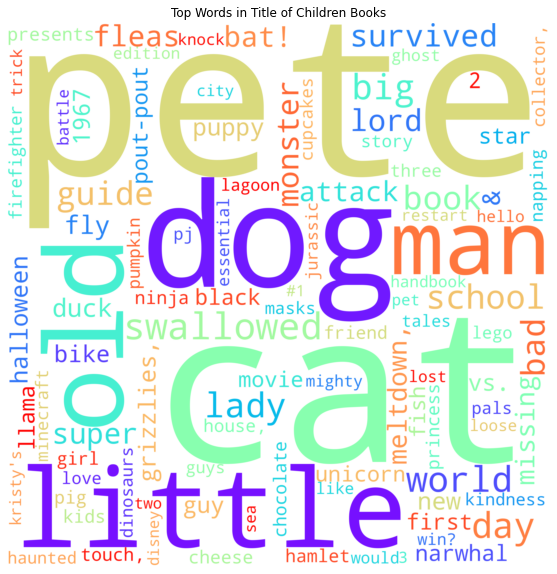

In [0]:
# create the WordCloud object
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt 

wordcloud = WordCloud(width=3500,height=3500,normalize_plurals=False, background_color='white',colormap='rainbow')

# generate the word cloud
result_dict=dict(zip(pd["word"], pd['frequency']))
wordcloud.generate_from_frequencies(result_dict)

#plot
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Top Words in Title of Children Books")
plt.axis('off')
plt.show()